# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [1]:
!pip install pysentimiento
import pandas as pd
from pysentimiento import create_analyzer #
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Variables globales

In [2]:
DATASETS_NAME = {
    'IBEREVAL_MISOGYNY_2018_TRAIN':'ibereval_misogyny2018_es_train.csv',
    'IBEREVAL_MISOGYNY_2018_TEST':'ibereval_misogyny2018_es_test.csv',
}
DATASETS_DELIMITERS = {
    'IBEREVAL_MISOGYNY_2018':','
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### IBEREVAL MISOGYNY 2018

In [3]:
df_ibereval = pd.read_csv ( DATASETS_NAME['IBEREVAL_MISOGYNY_2018_TRAIN'],
        skiprows=1,
        header=None,
        names = ["_", "id", "text", "misogynous", "misogyny_category", "target"],
        delimiter=DATASETS_DELIMITERS['IBEREVAL_MISOGYNY_2018'])
df_ibereval = df_ibereval.drop('_', axis=1)

----------------------------

## Irony Analysis


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [4]:
df_ibereval.head()

,id,text,misogynous,misogyny_category,target
0,1,Módulo 01 Invitados Directivos del Sindicato '...,0,0,0
1,2,"@Causafiebres Claro, es que ha puesto imbécil ...",0,0,0
2,3,@Nanchinho A ver si haces algo que sirva para ...,1,discredit,active
3,4,@Rafhyta86 @ElDesmadre__ Habe pasame el video ...,1,discredit,passive
4,5,@Otb_35 Que te calles so guarra.,1,dominance,active


In [5]:
irony_analyzer = create_analyzer("irony", lang="es")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/915 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

In [6]:
#Ejemplo
irony_analyzer.predict("¿De qué color es el caballo blanco de Santiago? Obviamente negro")

AnalyzerOutput(output=ironic, probas={ironic: 0.976, not ironic: 0.024})

In [7]:
def analyze_irony(text):
    result = irony_analyzer.predict(text.lower())
    irony = result.output
    probabilities = result.probas

    print("\n-----------------------")
    print(f"Texto analizado: {text}")
    print(f"Ironía detectado: {irony}")
    print(f"Probabilidades: {probabilities}")

    return irony, probabilities, text

In [8]:
text_data = df_ibereval['text'].tolist()
results = [analyze_irony(text) for text in tqdm(text_data)]

  0%|          | 5/3307 [00:00<01:25, 38.49it/s]


-----------------------
Texto analizado: Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998156726360321, 'ironic': 0.0018432347569614649}

-----------------------
Texto analizado: @Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994854927062988, 'ironic': 0.000514428480528295}

-----------------------
Texto analizado: @Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9672826528549194, 'ironic': 0.03271733224391937}

-----------------------
Texto analizado: @Rafhyta86 @ElDesmadre__ Habe pasame el video donde adan diga puta a las mujeres sevillistas...'MI NOVIA ES SEVILLISTA',no dice TODAS LAS SEVILLI

  1%|          | 17/3307 [00:00<01:04, 51.20it/s]


-----------------------
Texto analizado: -Mujer: Bésame una vez y te pertenecere para siempre? -Hombre: Ostia! Gracias por la advertencia!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.014544784091413021, 'ironic': 0.9854552745819092}

-----------------------
Texto analizado: Miss perra: Valentinaaa amo mucho tu icon y header son re lindos,te mereces todo con tus ídolos y te mereces tanto abrazar a camila & ariana *al igual que todos tus ídolos*tu cuenta en general es perfecta y una de mis favoritas, eres una personita muy especial para mi+
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9924214482307434, 'ironic': 0.007578600663691759}

-----------------------
Texto analizado: @EdiiXI @lidiahdlgo Cállate tu !! Perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987844824790955, 'ironic': 0.001215564552694559}

-----------------------
Texto analizado: @LeticiaDolera Y digo yo... si se pretende dar un mensaje puramente político, por qué no se 

  1%|          | 31/3307 [00:00<00:56, 57.97it/s]


-----------------------
Texto analizado: @BedMM @NayBetania Tú eres la culpable, perra >:v
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.858148455619812, 'ironic': 0.14185157418251038}

-----------------------
Texto analizado: Yo no puedo creer que las propias mujeres naturalicen una violación o acoso y lo justifiquen con que la mujer es la que “provoca”. Que mente de mierda la puta madre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991655349731445, 'ironic': 0.0008345263195224106}

-----------------------
Texto analizado: Ahhh pero vaya y uno callada les acepte las cortesías sin ánimos de darles sexo que cuando se estrellen, de 'perra oportunista' no te bajan.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.665823757648468, 'ironic': 0.334176242351532}

-----------------------
Texto analizado: @KiraraPixel Ah no, ella no es zorra es libre, el que es imbécil es el que tiene pareja y no hace más que ir detrás de otros XD
Ironía detectado:

  1%|▏         | 45/3307 [00:00<00:57, 56.29it/s]


-----------------------
Texto analizado: Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4080663025379181, 'ironic': 0.5919336676597595}

-----------------------
Texto analizado: @vignaxnnayar No tenes nada que agradecer, te lo merecesssss blda !!! Te amo mas zorra💙💙
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9784391522407532, 'ironic': 0.0215607937425375}

-----------------------
Texto analizado: @SamuSG_ pues comemela
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7134448885917664, 'ironic': 0.28655514121055603}

-----------------------
Texto analizado: Lpm la perra no merecía eso :( https://t.co/H6AUh7BX8m
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.994929850101471, 'ironic': 0.005070153623819351}

-----------------------
Texto analizado: @AlexandGutiz Pues dispuesto a ser un amo muy exigente! empinarte a mi gusto y nalguearte como te lo mereces por p

  2%|▏         | 58/3307 [00:01<00:54, 59.50it/s]


-----------------------
Texto analizado: @pauli_lovagnini JAJAJAJAJAJAJA cállate perra 😂. Lo que debe ser ese video 🤢, we
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.977939784526825, 'ironic': 0.022060276940464973}

-----------------------
Texto analizado: @AgathaBribli Te lo mereces, por usar uñas de GUARRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6883187294006348, 'ironic': 0.3116813004016876}

-----------------------
Texto analizado: @palopascalee paloma cállate la boca que sos de flaca hija de perra una envidia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9794350862503052, 'ironic': 0.020564915612339973}

-----------------------
Texto analizado: Me maman esos casos en los que el hombre es el enculado y la mujer es bien perra, es como ver el otro lado de la moneda 🤔
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.023414798080921173, 'ironic': 0.9765852093696594}

-----------------------
Texto analizado: dicen que los

  2%|▏         | 73/3307 [00:01<00:50, 63.68it/s]


-----------------------
Texto analizado: Entiendo que el acoso puede terminar en violación o muerte (en el peor de los casos) y las drogas normalmente dañan al que las consume. Uno es un daño infligido y el otro daño es autoinducido. https://t.co/BRv1dUD71r
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993184804916382, 'ironic': 0.0006815480883233249}

-----------------------
Texto analizado: Soy caga palos y que! Pagame a la madre y callate el pinche osico perra ,antes que te valla peor hija de puta 🇲🇽😈
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989323019981384, 'ironic': 0.001067688106559217}

-----------------------
Texto analizado: @alaniscristalv Cállate, pa' interés cualquiera so perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9890509843826294, 'ironic': 0.010949090123176575}

-----------------------
Texto analizado: @Barbijaputa Por culpa de los petardos tengo unos amigos locos por encontrar a su perrita. Se les escapó y 

  3%|▎         | 87/3307 [00:01<00:56, 57.49it/s]


-----------------------
Texto analizado: @Barbijaputa De mí se rieron por relacionarlo con el veganismo: 'mirad a esta loca las tonterías que dice, lo que me faltaba por oír.' Mi hermana les miró como si fueran mierda, no entendieron por qué eran los únicos que se reían en la mesa.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.24512973427772522, 'ironic': 0.7548702359199524}

-----------------------
Texto analizado: A esto se le llama falta de vergüenza https://t.co/BxZckxF9xQ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982348680496216, 'ironic': 0.0017650829395279288}

-----------------------
Texto analizado: Exacto! #puralata #feminazis #HombreAbusado https://t.co/zTEvaftxcd
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994151592254639, 'ironic': 0.0005848081782460213}

-----------------------
Texto analizado: @FaunaFeminazi Ayúdanos a promover el Movimiento SEMEN!! Un RT!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9

  3%|▎         | 93/3307 [00:01<00:56, 57.25it/s]


-----------------------
Texto analizado: @OneforAllDeku_ @xkingxexplosion ¡Tú no me das ordenes imbécil voy a destruirle la polla a ese maldito subnormal y voy hacer las cosas a mi maldita manera! ¡Apártate parásito!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983322024345398, 'ironic': 0.00166779023129493}

-----------------------
Texto analizado: Morgan Spurlock, director de ‘Super size me’, se autoinculpa de acoso sexual y violación https://t.co/xxihQICczk
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9746930599212646, 'ironic': 0.02530694752931595}

-----------------------
Texto analizado: Jajajajaja le tengo que enseñar eso a mi perra😂 https://t.co/rlTRFU3Dx0
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02595961093902588, 'ironic': 0.9740403890609741}

-----------------------
Texto analizado: Me encantaria darte unas nalgadas ricas ❤ — A mí me encantaría pegarte una hostia en la cara https://t.co/rUKwwVXlxm
Ironía detectado: not iro

  3%|▎         | 105/3307 [00:01<01:01, 52.03it/s]


-----------------------
Texto analizado: @HuxGeneraI « hijo de perra. Por supuesto no lo haría, solo el muy bastardo se lo merecía por intentar siempre menospreciarle .... Si los golpes no funcionaban, habría de intimidarlo aún de la manera más repugnante —
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997028708457947, 'ironic': 0.00029715141863562167}

-----------------------
Texto analizado: @erreleny @Fel_blan Buena descripción, aunque se te ha olvidado decir la puta moralina. Todos tienen que ENSEÑARTE y EDUCARTE con su puta moralina de los cojones. Es una serie muy milenial.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.040353916585445404, 'ironic': 0.9596461057662964}

-----------------------
Texto analizado: Esa gente insultando y condenando al asesino de Diana Quer pero que luego le quitan importancia al acoso, violación y maltrato a la mujer...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997660517692566, 'ironic': 0.000234000588

  4%|▎         | 117/3307 [00:02<01:02, 50.90it/s]


-----------------------
Texto analizado: ¿Cuál es la peor desgracia para una mujer? Parir un varón, porque después de tener un cerebro dentro durante 9 meses, van y se lo sacan.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9681714177131653, 'ironic': 0.03182853385806084}

-----------------------
Texto analizado: @anaisbernal La Mariló Montero es una hija de puta machista!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997546076774597, 'ironic': 0.00024542564642615616}

-----------------------
Texto analizado: @come_hombres Agrega puta zorra yo te uso como te mereces y te ago mas puta de lo que ya eres
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987403750419617, 'ironic': 0.001259683514945209}

-----------------------
Texto analizado: @IrantzuVarela Encuentro fascinante como los tíos cogen una prueba de su inutilidad (frígida, mal follada, coño reseco) y tratan de hacerlo pasar por un insulto hacia nosotras
Ironía detectado: ironic
Pr

  4%|▍         | 132/3307 [00:02<00:53, 59.38it/s]


-----------------------
Texto analizado: @erices16_ Cállate vos wacha trola deja de confundir las hormonas puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9868521094322205, 'ironic': 0.013147884979844093}

-----------------------
Texto analizado: YA CALLATE PUTA PERRA ME TIENES CANSADO CON TUS PENDEJADAS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988821148872375, 'ironic': 0.0011178326094523072}

-----------------------
Texto analizado: @jovencito9797 Comemela a mi jejeje
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.129777193069458, 'ironic': 0.8702228665351868}

-----------------------
Texto analizado: Te odio Lidia, no te mereces a Francisco, #perra #LasChicasDelCable2
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982622265815735, 'ironic': 0.001737842452712357}

-----------------------
Texto analizado: @GustavoOrozcoH No le enseñaron modales a esa antifujimorista perra mermelera del foro de sao paulodebretch?esta 

  5%|▍         | 151/3307 [00:02<00:42, 73.66it/s]


-----------------------
Texto analizado: Lo estoy contando a sara lo que me pasó el 28/12 y me está llamando zorra, no es culpa mía ok JAJSAJAKSJAKSAKJSKJ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8878104090690613, 'ironic': 0.11218956857919693}

-----------------------
Texto analizado: @Alba_fcb14 Qué haces puta, cállate ya
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9951634407043457, 'ironic': 0.004836540203541517}

-----------------------
Texto analizado: @Laura99CM Ahora que me has faltado el respeto te lo puedo decir por fin: ¡A fregar puta!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7685497403144836, 'ironic': 0.23145030438899994}

-----------------------
Texto analizado: @A3Noticias Esta tiene que ser una 'fake new' porque las mujeres son siempre las víctimas, no las hijas de puta maltratadoras. Eso o el chaval es un machista que se lo ha merecido (machete al machote).
Ironía detectado: not ironic
Probabilidades: {'not ir

  5%|▌         | 168/3307 [00:02<00:40, 77.78it/s]


-----------------------
Texto analizado: ¿cual es el dia de la mujer? -El dia menos pensado-
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6966855525970459, 'ironic': 0.3033145070075989}

-----------------------
Texto analizado: #TITULAESNACIONALES: Interpol captura a deportado salvadoreño que es acusado por los delitos de violación y acosos sexual
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987514019012451, 'ironic': 0.00124858517665416}

-----------------------
Texto analizado: @SamuelMarinRuiz Por desgracia tengo 4 pelos polla en la cara y es toh muy sad Encima de Panchito y parguela...imberbe https://t.co/CQm0ZwcPGa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9944580793380737, 'ironic': 0.0055419569835066795}

-----------------------
Texto analizado: Porque las mujeres ven las peliculas porno enteras? -Porque se creen que al final se van a casar o algo.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0975458174943924, 

  6%|▌         | 185/3307 [00:02<00:38, 80.28it/s]


-----------------------
Texto analizado: @HdzJaleny Cállate perra por qué yo tq
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9870026111602783, 'ironic': 0.012997371144592762}

-----------------------
Texto analizado: El biribiri de las estupidas adolescentes manipuladas por la #femimoda aburre a la sociedad y enoja a los abusadores. #feminazis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994361996650696, 'ironic': 0.0005637417198158801}

-----------------------
Texto analizado: @anto07ro Siempre te hago el aguante callate, mña si perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9513573050498962, 'ironic': 0.048642754554748535}

-----------------------
Texto analizado: @Marta04104594 Embestir te con fuerza q chilles al sentir mi.polla en tu coño humedo
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.23940704762935638, 'ironic': 0.7605929970741272}

-----------------------
Texto analizado: @DeboraGarrido15 Cállate perra del

  6%|▌         | 203/3307 [00:03<00:38, 80.85it/s]


-----------------------
Texto analizado: @TimoFARC @ONU_es @antonioguterres Cinico hijo de puta lo unico que te mereces es indumil corrido
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996442794799805, 'ironic': 0.0003556780575308949}

-----------------------
Texto analizado: @KobaML Claro, es un hoyo(coño) que se abre con una tuneladora(polla) sin consentimiento de la naturaleza. Una macabra violación de libro.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9846919178962708, 'ironic': 0.015308109112083912}

-----------------------
Texto analizado: Mira estoy hasta los cojones de que por enseñar una teta y no ser tío me llamen guarra,por enseñar el culo me digan que solo lo hago para calentar,tronco tanto os cuesta ver una teta de una tía como algo normal?Es un cuerpo al igual que el del hombre,amo enseñar mi cuerpo!!! https://t.co/3DLCmgKc88
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957199692726135, 'ironic': 0.004280110355466604}


  7%|▋         | 221/3307 [00:03<00:37, 82.77it/s]


-----------------------
Texto analizado: Cardi B se ve que como novia es súper perra. Soy su fan
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8141841888427734, 'ironic': 0.18581584095954895}

-----------------------
Texto analizado: @cobaiabaia Al menos en 13rsw, creo que no idealizan el suicidio ni el acoso o la violación y dan un mensaje, sin embargo en esta serie me da la sensación de que pintan como super guay ser un psicópata.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9911711812019348, 'ironic': 0.008828749880194664}

-----------------------
Texto analizado: @DeluxeSabado @gusgonzalves Un imbécil que dice ahora el payaso este la zarigueña y gema de las infidelidades de Kiko Rivera eh sois escoria
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999288022518158, 'ironic': 0.0007120465743355453}

-----------------------
Texto analizado: @AnaMari54039993 @anthony_j17 @Lenin Cállate perra igual entendiste el mensaje anda a pintarte la

  7%|▋         | 239/3307 [00:03<00:36, 83.19it/s]


-----------------------
Texto analizado: @anaisbernal Esta es la justicia en españa para estos indeseables una puta verguenza
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997556805610657, 'ironic': 0.0002443190023768693}

-----------------------
Texto analizado: @lortegadiaz Cállate perra que a ti te espera el mismo destino de maduro y cabello ahora se la tira de correcta porque no lo hicistes aquí corrupta de mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995808005332947, 'ironic': 0.00041917330236174166}

-----------------------
Texto analizado: Pq la canción esta bien puta y tu eres tan puta que la cambias https://t.co/sKeH55PaIq
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9712222814559937, 'ironic': 0.028777681291103363}

-----------------------
Texto analizado: feliz año zorra, te amo imbécil :( @poetswonho
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.991107165813446, 'ironic': 0.008892885409295559}

----

  7%|▋         | 248/3307 [00:03<00:36, 83.99it/s]


-----------------------
Texto analizado: @modadulce Y su padre no es acusado por intento de violación y acoso sexual y otras agresiones sexuales? Las mujeres que lo denuncian más 5
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995326995849609, 'ironic': 0.00046726566506549716}

-----------------------
Texto analizado: @ciudad_magazine Malísimo el comentario, no tiene respeto por todas las mujeres que sufren acoso o violación y no se lee cree. Lastima por que ella llega a un montón de niños y su mensaje no está bueno ni es normal.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998200535774231, 'ironic': 0.00018001032003667206}

-----------------------
Texto analizado: @VidalSieteDiez Tú eres la perra, no te dejes engañar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9851564168930054, 'ironic': 0.014843547716736794}

-----------------------
Texto analizado: @lagarder81 Ya tengo claro q tu eres tonto y ya está ..eres como un loro todo lo 

  8%|▊         | 266/3307 [00:03<00:37, 80.96it/s]


-----------------------
Texto analizado: @GingerJoker25 Jajajaja que perra mi amiga, si a esas nos vamos tú eres 5to dan en putería
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02614808827638626, 'ironic': 0.9738518595695496}

-----------------------
Texto analizado: mi novia es una puta merienda😍🤯😛💦
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.023864923045039177, 'ironic': 0.9761350750923157}

-----------------------
Texto analizado: @PhilipMarlowe10 @quimforn Tu eres un poco bastante hijo de la gran puta no? Y no es una pregunta cabronazo. Es una jodida afirmación #alertaporhijodeputa #alertacabronazo #alertatuputamadre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9819371104240417, 'ironic': 0.01806287281215191}

-----------------------
Texto analizado: La puta escena en la que la asiática salva a Finn? Pero tu eres subnormal o como va?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.816618800163269, 'ironic': 0.18338124454021

  9%|▊         | 284/3307 [00:04<00:36, 81.90it/s]


-----------------------
Texto analizado: @ladivaza Vamos DIVAZA TU PUEDES 💝👑 TU ERES LA MAS PERRA ❤🎆👑
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6520912647247314, 'ironic': 0.34790876507759094}

-----------------------
Texto analizado: @anaisbernal Merecían que se le cortase la polla a él y al juez que dictó su inocencia ...y los abogados que asumieron su defensa al horno con sus huevos el la boca 😡😡😡
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.985988438129425, 'ironic': 0.014011528342962265}

-----------------------
Texto analizado: 'te voy a enseñar política de una forma objetivCRISTINA ES UNA HIJA DE RE MIL PUTA'
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9955052137374878, 'ironic': 0.004494716878980398}

-----------------------
Texto analizado: @kolderiu19 Pero decir que entras a un barrio y que te meten una polla en la garganta jajajaja
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.023014821112155914, 'ironic': 0

  9%|▉         | 302/3307 [00:04<00:35, 84.08it/s]


-----------------------
Texto analizado: 'Y ésta canción se la dedico a mi perra (Laika) . Tú eres mi Laiki Mi Laiki , Laiki , Laiki . Mi Laiki , Laiki , Laiki Perra perra perra Lai Lai ' Ahr lo que es estar al pedo. ' :v https://t.co/fN6Mj5tRQt
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.004203828517347574, 'ironic': 0.9957962036132812}

-----------------------
Texto analizado: me estresa que me hablen mientras escucho música CALLATE LA PUTA MADRE CALLATE NO ME HABLES MAS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9842116236686707, 'ironic': 0.015788346529006958}

-----------------------
Texto analizado: esas jotillas ridículas de biografías pedorras de #twitter y fotos enseñando la panochita de perra sucia deberían adjuntarle: jota, inventada y posona; pinches guangas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9774529933929443, 'ironic': 0.022547069936990738}

-----------------------
Texto analizado: Le estoy enseñando a árabes de

 10%|▉         | 320/3307 [00:04<00:35, 83.89it/s]


-----------------------
Texto analizado: Y mis primas calladas pq saben que aquí la perra de la familia soy yo y que con un mensaje les arruino la vida perfecta que aparentan, a parte las dos me caen bien 🙄
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7996715903282166, 'ironic': 0.20032840967178345}

-----------------------
Texto analizado: @tamaraasavio jajajajajaj soy imbecil tremeno acoso a tu tuiti pobre ajajajjaa yo + <3
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.45884016156196594, 'ironic': 0.5411598682403564}

-----------------------
Texto analizado: Otra puta vez enseñando prioridades.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9862385988235474, 'ironic': 0.013761373236775398}

-----------------------
Texto analizado: Antonio Caballero y como ser de mal gusto e ignorante a la vez. Claro que no es lo mismo acoso sexual y violación pero hay varias conductas que componen la violencia sexual.
Ironía detectado: not ironic
Probabili

 10%|█         | 338/3307 [00:04<00:36, 82.42it/s]


-----------------------
Texto analizado: como me caga que me digan te recomiendo una pelicula y me la empiecen a contar. si te pregunto adelante si no callate la puta boca!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974768757820129, 'ironic': 0.0025230676401406527}

-----------------------
Texto analizado: -Mamá, mamá, ¿por qué la novia va vestida de blanco? -Porque es el día más feliz de su vida. -¿Y por qué el novio va vestido de negro?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03344253450632095, 'ironic': 0.9665574431419373}

-----------------------
Texto analizado: La puta madre qe buena novia es esta piba Quiero una novia asi, esos regalos enamoran
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8586639165878296, 'ironic': 0.141336128115654}

-----------------------
Texto analizado: Fav si eres bien puta para meterte al nuevo grupo de dm que crearé donde nos enseñaras las tetas guarra desgrac
Ironía detectado: not ironic
Probabili

 11%|█         | 356/3307 [00:05<00:36, 81.55it/s]


-----------------------
Texto analizado: Tanta denuncia de acoso sexual y violación y yo tengo un año sin coger.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9053175449371338, 'ironic': 0.09468245506286621}

-----------------------
Texto analizado: @Mzavalagc @RicardoAnayaC @lopezobrador_ Callate perra no tienes ningún derecho a ladrar, pudrete.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991694688796997, 'ironic': 0.0008305177325382829}

-----------------------
Texto analizado: @tinaletina Pero yo no quiero arriesgarme a que sea de ese 10% restante.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8725000619888306, 'ironic': 0.12749995291233063}

-----------------------
Texto analizado: Ahora resulta que la mujer es una bruja que lo trataba fatal y la otra es una guarra, feminismo marca Patiño and Cia.... #masqueamigus
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9827028512954712, 'ironic': 0.017297111451625824}

-----

 11%|█▏        | 376/3307 [00:05<00:33, 86.62it/s]


-----------------------
Texto analizado: @ValeriaGV0222 @ibaewhore Oye oye, le enseñaré esto a mi mamá, perra
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02510063163936138, 'ironic': 0.9748993515968323}

-----------------------
Texto analizado: Te quiero comer toda la polla — Pos eso hay que ganarselo primero almadepollo, soy el tipo de imbecil al que le pone que se lo pi... https://t.co/CKUjG9KmTV
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6436862945556641, 'ironic': 0.35631370544433594}

-----------------------
Texto analizado: Minimo denuncia por acoso sexual e intento de violacion telepatica https://t.co/ToVK3NlOtH
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989374279975891, 'ironic': 0.0010625922586768866}

-----------------------
Texto analizado: Como me matas cuando te mueves así de lento, siento todo el recorrido y la presión de tu coño alrededor de mi polla, acaricias mi pecho, sientes mi respiración agitada, me voy a correr

 12%|█▏        | 394/3307 [00:05<00:33, 86.18it/s]


-----------------------
Texto analizado: @vikidonda Cállate Tilinga atorranta vergüenza da q x ser hija de puta,digo de montonera ocupes un cargo de diputada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994356036186218, 'ironic': 0.0005643488839268684}

-----------------------
Texto analizado: @IrantzuVarela Hay dictadores que han hecho menos daño a la sociedad que tú, con tu pensamiento nazi. Coño ya! muy buen argumento
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989435076713562, 'ironic': 0.0010565288830548525}

-----------------------
Texto analizado: @enbocadetodosof Ptm que hace ese Seudo conductor dizque de Santi. Escoria de ATV. Cómo jalaron a ese imbecil que hablo mal de Guerrero y la selección !!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999468982219696, 'ironic': 0.0005309853004291654}

-----------------------
Texto analizado: Y tenes la cara para decir “se lo merecía” PERRA DEJAME NO DECIRTE LO QUE TE MERECES PORQUE N

 12%|█▏        | 413/3307 [00:05<00:33, 87.60it/s]


-----------------------
Texto analizado: Al dueño borracho d este coche q m acabo d encontrar abandonado en una cuneta: mereces lo q t ha pasado hijo d puta. X suerte nadie se cruzó en tu camino. https://t.co/YlGaDuRUGw
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992319345474243, 'ironic': 0.0007680631242692471}

-----------------------
Texto analizado: -¿Que le compraste a tu mujer por San Valentín? -Un collar espectacular, y tu? -Nada, yo todavía la dejo suelta
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04055086523294449, 'ironic': 0.9594491720199585}

-----------------------
Texto analizado: @HowToSnorlax @s0ymia Diego me caguen tu puta madre callate ya ostia puta me caguen diso
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9769111275672913, 'ironic': 0.02308887057006359}

-----------------------
Texto analizado: @_Brix__ @LopezNahulo Lo unico que vas a tener en tu culo es mi polla
Ironía detectado: ironic
Probabilidades: {'not iron

 13%|█▎        | 431/3307 [00:05<00:35, 81.55it/s]


-----------------------
Texto analizado: @infobae CALLATE HIJA DE PUTA !!!!! LADRONA Q QUERES LA PLATA DE LOS JUBILADOS PARA TUS OBRAS PARA USAR EN TU PROXIMA CAMPAÑA Y LA DE MUGRICIO
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994520545005798, 'ironic': 0.0005479459650814533}

-----------------------
Texto analizado: @hezmick @pegaso6038 Zorra tu eres el dolor y se Le va a poner remedio no te preocupes
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5527808666229248, 'ironic': 0.4472191631793976}

-----------------------
Texto analizado: @laSextaTV Muchos violadores ven en la violación la intimidación el acoso o los golpes su realización de fantasía sexual que la víctima cese tras no encontrar salida ni opción de salvación
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996635913848877, 'ironic': 0.0003363845171406865}

-----------------------
Texto analizado: @Guayabeirho @Uber_MEX tendría que ser responsable en el caso que se les acus

 14%|█▎        | 450/3307 [00:06<00:33, 85.46it/s]


-----------------------
Texto analizado: #RAWCL puta la wea, Cesaro merecia terminar el año campeon
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9970967769622803, 'ironic': 0.0029031920712441206}

-----------------------
Texto analizado: Y tu eres Perra, ládrame. Ay, qué perra mi amiga. 🐶🐶
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.27353665232658386, 'ironic': 0.7264633774757385}

-----------------------
Texto analizado: Me parece mal que veáis cultura de violación por ahí y hasta os parezca gracioso que violen a mujeres. Soys escoria.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990347623825073, 'ironic': 0.0009652472217567265}

-----------------------
Texto analizado: Las personas feministas solo se dedican a expandir mierda sobre la cara de los hombre y despues realmente lo que buscan es igualdad
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996297359466553, 'ironic': 0.00037026178324595094}

-----------------------

 14%|█▍        | 459/3307 [00:06<00:33, 85.09it/s]


-----------------------
Texto analizado: @Absolute_Zero23 @IrantzuVarela @enlafronteratv Coño reseco vuelve a la carga. La reina del vaginesil.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0005079194670543075, 'ironic': 0.9994920492172241}

-----------------------
Texto analizado: @Zurine3 Joder, menuda escoria de persona, ¿no? ¿Cómo narices se puede ir así por la vida? Vomito...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993359446525574, 'ironic': 0.000664019666146487}

-----------------------
Texto analizado: mi primo me está enseñando los videos donde sale todo pedo restregándole el culo a otro vato memeo que perra me salió, lo amo a la verga
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8977194428443909, 'ironic': 0.10228053480386734}

-----------------------
Texto analizado: @riveraingrith @sofiaamtz5 JAJAJAJAJAJAJAJA ya sé, pero tú eres una perra, yo soy bien buena y Sofía se aprovecha de mi nobleza
Ironía detectado: ironic
Probab

 14%|█▍        | 478/3307 [00:06<00:32, 85.86it/s]


-----------------------
Texto analizado: @sr_hater_ Yo por eso es una guarra? Hay tios marcando paquete y enseñando to, pero tu instinto retrasado te dice que al ser tio no pasa na pero si es una tia la que enseña su cuerpo es una guarra. Ve al psicologo mas cercano anda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990339279174805, 'ironic': 0.0009661212679930031}

-----------------------
Texto analizado: @GladysP53066784 @lilianasirne @AmericaTV Callate la boca, tilinga perra frígida castrada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985190033912659, 'ironic': 0.0014810425927862525}

-----------------------
Texto analizado: @drmtorres @Barbijaputa @CloeStein @SusanaST96 @raquelejerique Ni puta idea de la que hablas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9851371049880981, 'ironic': 0.014862910844385624}

-----------------------
Texto analizado: @josesinito @LeaderDeus @NewSchool_CL Cállate vo si Eri mi perra
Ironía detect

 15%|█▍        | 496/3307 [00:06<00:32, 85.64it/s]


-----------------------
Texto analizado: Soy un hombre descompuesto cállate perra puta y déjame explicar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.848816454410553, 'ironic': 0.15118350088596344}

-----------------------
Texto analizado: @PabloAgustin @barbarammzz @MicaSuarez12 CÁLLATE...PERRA https://t.co/Qm6enxgxls
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9936068058013916, 'ironic': 0.006393153220415115}

-----------------------
Texto analizado: Mis padres tienen 30 años de casados y 4 hijos y yo ni siquiera puedo enseñarle a mi perra que haga del baño en un sólo lugar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9938921928405762, 'ironic': 0.006107852794229984}

-----------------------
Texto analizado: yo - me picó un animal wey. mi hermana - te lo mereces por zorra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9664421677589417, 'ironic': 0.03355778008699417}

-----------------------
Texto analizado: Y llega

 16%|█▌        | 514/3307 [00:06<00:34, 81.89it/s]


-----------------------
Texto analizado: ¿por qué Dios hizo a las mujeres con los pies más pequeños? Para que puedan acercarse más al fregadero.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03438271954655647, 'ironic': 0.965617299079895}

-----------------------
Texto analizado: Os voy a enseñar una foto muy guarra mia
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.43849897384643555, 'ironic': 0.5615010857582092}

-----------------------
Texto analizado: Subiendo y bajando por mi polla, tu coño estrechito y jugoso, siempre apretado, haciendo una presión que me asfixia y me da placer, quiero correrme dentro de ti https://t.co/oe2JBGcr4Q
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.21916022896766663, 'ironic': 0.7808398008346558}

-----------------------
Texto analizado: @chrisgatico CALLATE YEGUA, MALDITA PERRA AHRE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9919095635414124, 'ironic': 0.008090434595942497}

----------------------

 16%|█▌        | 532/3307 [00:07<00:33, 81.85it/s]


-----------------------
Texto analizado: @juanfecid Soy pejezombie animal, si soy el lider de los pendejos y tu eres mi perra, eso que te hace a tí? 😂😂😂😂😂😂
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07182643562555313, 'ironic': 0.9281735420227051}

-----------------------
Texto analizado: Que Las Mujeres Son Perras🐶 o.O ? No Parcero No Hay Mujer Perra🐶 Sino Cansada De Que Un Hombre No Le Demuestre... https://t.co/ScXTRGZHdn
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4108681380748749, 'ironic': 0.5891318321228027}

-----------------------
Texto analizado: @keyawnce @manicalvie Cállate puta barata
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987112283706665, 'ironic': 0.0012887254124507308}

-----------------------
Texto analizado: 'Todas las mujeres son fuertes' Dicen las que lloran porque un tipo gordo en una pantalla la llamo puta, pero dejando eso de lado, hay que ser muy rastrera para usar las violaciones y el maltrato para ganar en u

 17%|█▋        | 550/3307 [00:07<00:34, 79.25it/s]


-----------------------
Texto analizado: @TowandaRebels Justamente los violadores son la escoria de los hombres, la forma más baja de vida animal
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997170567512512, 'ironic': 0.0002828788128681481}

-----------------------
Texto analizado: @Relatofeminista Hay que ser un verdadero imbécil para hacer 'bromas' con un asunto tan serio como el acoso callejero, y encima se creerá gracioso y todo pfff
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989204406738281, 'ironic': 0.0010795616544783115}

-----------------------
Texto analizado: Ahhh claro, captas eso pero no todos los malditos palos que te tiro y andas con el que 'te boludean', te pego o lo hace alguien más?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9952131509780884, 'ironic': 0.0047868164256215096}

-----------------------
Texto analizado: Matt Damon critica campaña contra el acoso y la violación sexual - La Prensa de Honduras https:/

 17%|█▋        | 566/3307 [00:07<00:35, 78.05it/s]


-----------------------
Texto analizado: @HenriFalconLara No digas nada que tú eres cómplice de lo que está pasando... y recuerda seguirás siendo la perra más perra de Venezuela
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986398816108704, 'ironic': 0.001360080554150045}

-----------------------
Texto analizado: @ElInformanteMX @Cabify_Mexico Pinche bastardo ojalá un dia me lo tope para enseñarle a no ser un hijo de su puta madre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978836178779602, 'ironic': 0.0021163306664675474}

-----------------------
Texto analizado: @diegobranca Cállate pedazo de hijo de puta lacras como me gustaría encontrarte Sorete mal cagado esta noche te busco por América bancatela Cagon
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994798302650452, 'ironic': 0.0005202313186600804}

-----------------------
Texto analizado: @jcastle1995 mejor cállate perra lmao
Ironía detectado: not ironic
Probabilidades: {'not ir

 18%|█▊        | 582/3307 [00:07<00:36, 74.84it/s]


-----------------------
Texto analizado: @Ainsuca @Camilochaparro_ @DanielSamperO «El mejor y la mejor amigo o amiga del hombreo la mujer es el perro o la perra»
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9068058729171753, 'ironic': 0.09319409728050232}

-----------------------
Texto analizado: @fedevigevani Cuando te conozca te pego un chicle en la cara a ver si te ves algún día bien
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.030344218015670776, 'ironic': 0.9696558117866516}

-----------------------
Texto analizado: @LUCIANA_LEON_R No metas a Víctor Raúl en tu perra das, ya la jodiste , ahora callate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997504353523254, 'ironic': 0.0002495511434972286}

-----------------------
Texto analizado: @MandiocaTeFoka si.. comemela a mi
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.49422547221183777, 'ironic': 0.5057745575904846}

-----------------------
Texto analizado: @sofiavetrano cal

 18%|█▊        | 598/3307 [00:08<00:36, 74.10it/s]


-----------------------
Texto analizado: Jejeje 'Puta Madre .... No me lo saques' jejeje tú eres lo máximo Kendall https://t.co/8cDbJPVYJq
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006665473338216543, 'ironic': 0.9933345317840576}

-----------------------
Texto analizado: Merecido después de dos semanas enseñando la ruta más perra en busca la historia de fedex 😌😌😌 https://t.co/b1rwNUrA4o
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0042355735786259174, 'ironic': 0.9957643747329712}

-----------------------
Texto analizado: @anaisbernal Sigo pensando con el vómito en la garganta a punto de echarlo que a estos hay que gastarlos y al juez también. Por muy bruta que quede en este momento hasta la castración me parece poco
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9681882858276367, 'ironic': 0.031811751425266266}

-----------------------
Texto analizado: @hydrasitoo Mira hydrox de los cojones se me está inflando la puta panocha ya cállate un

 19%|█▊        | 614/3307 [00:08<00:35, 76.08it/s]


-----------------------
Texto analizado: @Miawrta no es culpa tuya, es culpa de esa escoria de persona y punto
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997363686561584, 'ironic': 0.0002636683639138937}

-----------------------
Texto analizado: @martii_belen10 hija de puta cállate te vas a un crucero deja de quejarte
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9844059944152832, 'ironic': 0.015594030730426311}

-----------------------
Texto analizado: 'Me pegó un puñetazo en la cara y acabé en el suel', así ha contado Esther, profesora, el acoso que sufrió. Escúchalo con @ExpositoCOPE https://t.co/JtEQ0FpwjN
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993485808372498, 'ironic': 0.0006514041451737285}

-----------------------
Texto analizado: @alyzaid_duarte Callate perra la amaneciiii
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9075414538383484, 'ironic': 0.09245853126049042}

-----------------------
Texto anal

 19%|█▉        | 630/3307 [00:08<00:34, 76.83it/s]


-----------------------
Texto analizado: @salvameoficial Esto es lo que os merecéis en la puta boca los de salvame? https://t.co/DbYLJIkwhz
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9947888851165771, 'ironic': 0.005211105570197105}

-----------------------
Texto analizado: @CutieMoon_ CÁLLATE, ERES PERFECTO MALDITA SEA NO LE HAGAS CASO A LA PERRA ZORRA DE TITÁN, QUE TE VALGA PUTA VERGA LO QUE DIGA, AAAAAAAAH
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9472243189811707, 'ironic': 0.052775681018829346}

-----------------------
Texto analizado: @CFKArgentina Cállate ladrona hija de puta... Caraduras
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995890259742737, 'ironic': 0.00041103147668763995}

-----------------------
Texto analizado: @IaraPicatto1 Callate que yo tmb te extraño perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9863313436508179, 'ironic': 0.013668620027601719}

-----------------------
Texto analizad

 20%|█▉        | 648/3307 [00:08<00:32, 81.20it/s]


-----------------------
Texto analizado: COMO LE VAN A ENSEÑAR A UNA BEBE DE 2/ 3 AÑOS QUR CANTE UNA CANCIÓN QUE DICE 'PUTA BOLUDA, ZORRA', ENCIMA LA CANCIÓN LS TOMAN A CHISTE Y ES HORRIBLE TE DAS CUENTA A LO QUE LLEGAN LOS CELOS? HAY GENTE ESTÚPIDA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985406398773193, 'ironic': 0.0014594189124181867}

-----------------------
Texto analizado: @nikolas79jf Imbécil nivel escoria de alcantarilla
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994148015975952, 'ironic': 0.0005852654576301575}

-----------------------
Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997726082801819, 'ironic': 0.00022736417304258794}

-------------

 20%|██        | 666/3307 [00:08<00:32, 81.35it/s]


-----------------------
Texto analizado: Que te vv mi puta vida, cállate, alejate ptm
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981472492218018, 'ironic': 0.0018527666106820107}

-----------------------
Texto analizado: @xIvan_lhdp -Azoto tu cara- Comemela
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.32487770915031433, 'ironic': 0.6751223206520081}

-----------------------
Texto analizado: @jxshstalker Mi polla en tu culo es lo que hay Pero no porque no soy activa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9295954704284668, 'ironic': 0.07040458172559738}

-----------------------
Texto analizado: Pueden dejar de decir que una mujer es una puta por disfrutar de su sexualidad o subir fotos en bikini/ropa interior. Me dan ganas de revolearles una motosierra por la cabeza
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983660578727722, 'ironic': 0.0016339593566954136}

-----------------------
Texto analizado: @LeticiaDoler

 21%|██        | 684/3307 [00:09<00:32, 81.86it/s]


-----------------------
Texto analizado: RT SEMEN!! Una ayuda para expandir un movimiento necesario @ElMachistaQamas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9930752515792847, 'ironic': 0.006924750749021769}

-----------------------
Texto analizado: @juanbrujox @darias171 @TSJ_Legitimo @CybernetVzla @jcsosazpurua Dr. En que materia lo enseñaron ese vocabulario de perra de burdel?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05086590349674225, 'ironic': 0.9491340517997742}

-----------------------
Texto analizado: @krmenph5 @pibesevillista1 @babushasogordo @Sevillismo Calla,guarra española
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8978338241577148, 'ironic': 0.10216616839170456}

-----------------------
Texto analizado: Los exjugadores de la #Arandina acusados de un delito de #abuso #sexual conocían la edad de la menor. Ninguno ha reconocido su participación en los hechos https://t.co/3cF0wfAEe8
Ironía detectado: not ironic
Probabil

 21%|██        | 702/3307 [00:09<00:31, 82.58it/s]


-----------------------
Texto analizado: @huerguita5 @EnLuchaMujeres @Relatofeminista Vaya pelis te montas, mírate la puta cabeza primero y preocúpate de los demás después. Abusar y explotar no entran dentro de hacer lo q quiera y ser libre. Ale! A fregar!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990887641906738, 'ironic': 0.0009112231200560927}

-----------------------
Texto analizado: @WilfredoNc @diegobuenavent1 @dcabellor @alejabolivarian @chavezcandanga Que hijo de perra eres cállate idiota
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977973699569702, 'ironic': 0.002202662406489253}

-----------------------
Texto analizado: @Esmexcnco @uggzo Hola reyna tu eres cncowers y apoyas a esta uggly zorra no lo puedo crerr
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9964476823806763, 'ironic': 0.0035523439291864634}

-----------------------
Texto analizado: Voy a enseñar a la perra Celia a arremeter el edredón. Hoy está para ello.


 21%|██▏       | 711/3307 [00:09<00:32, 80.69it/s]


-----------------------
Texto analizado: Perra, tú eres un ángel que por la manzana peca
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13258883357048035, 'ironic': 0.867411196231842}

-----------------------
Texto analizado: 'No es lo mismo una violación -que es un crimen- a un acoso a un piropo en la calle que puede incomodar a alguna y hace todo un pedo de eso' Martha Lamas, la antropóloga feminista más famosa de México.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996817111968994, 'ironic': 0.0003182989312335849}

-----------------------
Texto analizado: Alooo, pero tu eres perra, obvio se iba a convertir en perro para que le gustaras duh https://t.co/HmpTDHYkWN
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2048107087612152, 'ironic': 0.7951893210411072}

-----------------------
Texto analizado: @medelcami01 Tu eres mi perra cierto
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8801255822181702, 'ironic': 0.11987444013357162}

 22%|██▏       | 729/3307 [00:09<00:31, 81.93it/s]


-----------------------
Texto analizado: @_raindancer2 TU ERES LA AMIGA QUE SE METE LAS POLLAS DOBLÁS POR EL COÑO ZORRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9778956770896912, 'ironic': 0.02210439369082451}

-----------------------
Texto analizado: @Luis050876 @EspanaTovio @CeDemocratico mmmmm ese es el argumento cínico que usan algunos para justificar una violación o acoso
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989551305770874, 'ironic': 0.0010448233224451542}

-----------------------
Texto analizado: @Flowypanda Pero Flow, las mujeres son seres de luz! Gracias, lo peor de todo es que la gente le da rt a su puta mierda de tweet manipulador...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7856009006500244, 'ironic': 0.21439911425113678}

-----------------------
Texto analizado: @CaccoL Tú eres más puta jijijiji
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.035374965518713, 'ironic': 0.9646250605583191}

------

 23%|██▎       | 747/3307 [00:09<00:31, 81.29it/s]


-----------------------
Texto analizado: @LoreniaCarr Cállate perra si todas tus conversaciones son spanglish 😂😂😂 te evitarias las correcciones a español 🙄
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.24987134337425232, 'ironic': 0.7501286864280701}

-----------------------
Texto analizado: @LeticiaDolera Educar en igualdad. Nada más. Enseñar a respetar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987547397613525, 'ironic': 0.001245269668288529}

-----------------------
Texto analizado: Tengo el Twitter de Celeste en mi celular y yo no puedo creer que con poner 'Milton callate' se llene de favs, la puta madre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7984722256660461, 'ironic': 0.20152774453163147}

-----------------------
Texto analizado: @takenbypilots EL DE LA IZQUIERDA TE PEGO UNA PATADA EN LA CARA QUE COSITA MONA AHRSJLSV
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.24340009689331055, 'ironic': 0.7565999031066895}



 23%|██▎       | 765/3307 [00:10<00:31, 80.61it/s]


-----------------------
Texto analizado: me encanta lo guarra que eres, te follaria hasta provocarte un nuevo desgarro vaginal — si provocas un desgarro vaginal follando follas bastante mal https://t.co/j8U6umdicd
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03891134262084961, 'ironic': 0.9610887169837952}

-----------------------
Texto analizado: @Metapodsin eres un imbécil de mierda nos tienes envidia pq somos la polla es eso verdad metapod lo sabia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7368875741958618, 'ironic': 0.2631123960018158}

-----------------------
Texto analizado: @AidenMockingjay @Daniel_Bugby Aiden creo que ves las mismas lagunas lógicas q yo. ¿Por qué el feminismo es lo bueno y el machismo lo malo?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995216131210327, 'ironic': 0.0004784530319739133}

-----------------------
Texto analizado: @LuzSalgado_R calláte perra sarnosa tú hablando de corrupción...y se te olvido la s

 24%|██▎       | 783/3307 [00:10<00:30, 83.13it/s]


-----------------------
Texto analizado: Es como 'maldita sea cállate ese maldito hocico perra de mierda' https://t.co/cdca5TXBnk
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9964457154273987, 'ironic': 0.0035542547702789307}

-----------------------
Texto analizado: @mariogigasanche Tu eres mi perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8418075442314148, 'ironic': 0.1581924706697464}

-----------------------
Texto analizado: Vamos la puta madre, te lo mereces flor 💖
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.955247700214386, 'ironic': 0.044752348214387894}

-----------------------
Texto analizado: Si nunca has sido víctima de acoso, abuso o violación es complicadísimo que entiendas el dolor, miedo e impotencia que te invaden. Y no, callarse no es la solución.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996232986450195, 'ironic': 0.00037668977165594697}

-----------------------
Texto analizado: Cada puta pr

 24%|██▍       | 801/3307 [00:10<00:29, 84.60it/s]


-----------------------
Texto analizado: @JoaquinPrietito vení pero a vos no te pego en la cara pq sos muy lindo jajaja<3
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5422176718711853, 'ironic': 0.4577823281288147}

-----------------------
Texto analizado: El acoso cibernético y la violación a la intimidad son faltas graves. #DENÚNCIALO
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999703586101532, 'ironic': 0.00029638971318490803}

-----------------------
Texto analizado: Ahora soplar verdades y evidencias en la cara de los homeópatas es acoso y violencia. https://t.co/XC0Bz4beFO Pobrechitos que han vendido un 14% menos de sus “medicamentos INVENT” y ahora se quejan... #STOPBullyingHomeopático ⚪️
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9938068985939026, 'ironic': 0.006193054374307394}

-----------------------
Texto analizado: @madridistadever @SiempreCasillas Cállate la puta boca, borrego.
Ironía detectado: not ironic
Probabilida

 25%|██▍       | 819/3307 [00:10<00:29, 85.58it/s]


-----------------------
Texto analizado: @spreadxngirl AH, YO SOY AKI, ENCANTADA FUMIKO. //comemela
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.08001869916915894, 'ironic': 0.9199812412261963}

-----------------------
Texto analizado: Hombres de España. Que no os frene el voto femenino. Somos más y nuestra opinión sigue contando más. ¡TodOs a las urnas!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992111921310425, 'ironic': 0.0007887896499596536}

-----------------------
Texto analizado: @ximeeacuna @liveforlouisx Sobre un político que tiene denuncias por violación y acoso sexual a menores
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993273019790649, 'ironic': 0.0006727323052473366}

-----------------------
Texto analizado: @A24COM Callate hijo de puta! Chorro corrupto.uds.empezaron la violencia como siempre.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996709823608398, 'ironic': 0.00032897861092351377}

-------------

 25%|██▌       | 837/3307 [00:10<00:29, 82.80it/s]


-----------------------
Texto analizado: @tinaletina Llevar esa prenda de vestir puede suponer un riesgo de muerte para toda la gente que esté en un radio de 30 m de esa persona.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992188215255737, 'ironic': 0.0007812027470208704}

-----------------------
Texto analizado: 3 estoy hasta la polla que para la prensa @MichelGonzalez hasta cuando se nos caga en la cara nos está dando una lección de humildad y saber estar y 4 si algún día ahí una manifestación por algo importante de verdad (sanidad, educación o derechos laborales) espero que no vaya...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997850060462952, 'ironic': 0.0002150310028810054}

-----------------------
Texto analizado: @finger_pies @Martattack88 @Relatofeminista @selenamanero14 Las mujeres son mujeres tengan polla o no, no son mujeres atrapadas en cuerpos de hombre ni hombres q se sienten mujeres, por dios que me están sangrando los ojos de leer

 26%|██▌       | 855/3307 [00:11<00:29, 81.82it/s]


-----------------------
Texto analizado: @iAmGuillin @laimarie30 *Entra Héctor El Father al chat* ¡Si tú eres una perra pues yo soy más perro! y que se joda. 😂
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006862055044621229, 'ironic': 0.9931378960609436}

-----------------------
Texto analizado: Mi novia es hermosa hijos de perra https://t.co/zyf0z9IHAi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9938437938690186, 'ironic': 0.006156247109174728}

-----------------------
Texto analizado: A las mujeres víctimas de violencia se les culpa de su propia fatalidad, no importa si es acoso, violación o... https://t.co/PvMuGkzvXZ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997690320014954, 'ironic': 0.0002309823757968843}

-----------------------
Texto analizado: ¡Cállate!, ella era una zorra, bien se lo merecía. https://t.co/40qonLBExR
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983457326889038, 'ironic': 0.001654315390624106

 26%|██▋       | 873/3307 [00:11<00:29, 83.23it/s]


-----------------------
Texto analizado: @iescolar @HiginiaRoig Tu eres tonto y no tienes ni puta idea. Todo el mundo sabia donde tenía que votar. El.que no fue es porque no quiso. O sea 2300000 personas y los 700000 que nos robaron los fascistas, pero como tenían miedo a la.democracia, prefirie
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997013211250305, 'ironic': 0.0002985908940900117}

-----------------------
Texto analizado: @Dqnigamer @SoyPapho hijo de perra no me estes hablando asi tu eres mi puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.990798830986023, 'ironic': 0.009201220236718655}

-----------------------
Texto analizado: @zaiira_sanchez Callate hija de perra que te llueven los pibes
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9950096607208252, 'ironic': 0.004990389570593834}

-----------------------
Texto analizado: Que alguien le meta un pene a la boca a esa perra a ver si se queda callada
Ironía detectado: not iro

 27%|██▋       | 891/3307 [00:11<00:28, 83.84it/s]


-----------------------
Texto analizado: @pixurraa de puta madre chaval notable se lo boy a enseñar a mi madre
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06725571304559708, 'ironic': 0.9327443242073059}

-----------------------
Texto analizado: @DaniBalmaceda98 Cállate perra, nunca más nos juntamos (?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9666236042976379, 'ironic': 0.03337641432881355}

-----------------------
Texto analizado: Cuando decís que una mujer es guarra en la cama me la imagino lanzádoos caca y haciendo pis en vuestra cara y me río mucho.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1338469237089157, 'ironic': 0.8661531209945679}

-----------------------
Texto analizado: creo que mi perra más chica es lesbiana, se la quiere dar a cada rato a la más grande
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8461583852767944, 'ironic': 0.1538415402173996}

-----------------------
Texto analizado: #SePudreTodoSi no 

 27%|██▋       | 909/3307 [00:11<00:30, 79.46it/s]


-----------------------
Texto analizado: @Madeleine_ng14 @dagmarrmuniz cállate estúpida perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9917688369750977, 'ironic': 0.00823116023093462}

-----------------------
Texto analizado: @MikaBroglio @conilazarte16 @EveOcampos1 Cállate que te hable y te puse que estaban para las pelis puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9819055795669556, 'ironic': 0.01809437945485115}

-----------------------
Texto analizado: Mira si llega a las 1000 visualizaciones me pinto una polla en la cara y lo subo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6330093145370483, 'ironic': 0.36699071526527405}

-----------------------
Texto analizado: Princesa tu puta madre, trae a mi conejita, no te mereces mis mimos ni mis besos. https://t.co/Qtz6vvTqWo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9432954788208008, 'ironic': 0.05670453980565071}

-----------------------
Texto analizado: Me

 28%|██▊       | 926/3307 [00:12<00:29, 79.71it/s]


-----------------------
Texto analizado: Por algo ser la polla es bueno y un coñazo es malo
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.15367403626441956, 'ironic': 0.8463259935379028}

-----------------------
Texto analizado: @zabdiarrechame CALLATE ANA TOY MAL CONTIGO PERRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979760050773621, 'ironic': 0.0020239893347024918}

-----------------------
Texto analizado: Feliz cumple a vos amiga, espero que la pases hermoso por que te lo mereces, 18 no son nada perra😝 te amo tonta @keymailen1 https://t.co/0lvMiYB9rc
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9373902678489685, 'ironic': 0.0626097172498703}

-----------------------
Texto analizado: @Zurine3 Qué COÑO es eso? ... ... ... No! la camisa de fuerza no!!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.39542657136917114, 'ironic': 0.6045734286308289}

-----------------------
Texto analizado: O sea si el culo es de una tía que n

 29%|██▊       | 943/3307 [00:12<00:29, 79.81it/s]


-----------------------
Texto analizado: @Hitler__Braun Busca por diccionario. Q es lo siguiente después de guapa? Exacto, guarra
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.004701521713286638, 'ironic': 0.995298445224762}

-----------------------
Texto analizado: Desde el New York Times y The New Yorker publicó por primera vez las acusaciones de acoso sexual y violación contra Harvey Weinstein por Rose McGowan, Gwyneth Paltrow, Ashley Judd y docenas de otros, el productor desgracia ha sido despedido de su empresa y fiscal d ...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991278052330017, 'ironic': 0.0008722313214093447}

-----------------------
Texto analizado: «Q paso mi lic no lo veo desde el año pasado jejeje» Sí sí cállate hijo de perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5525600910186768, 'ironic': 0.44743990898132324}

-----------------------
Texto analizado: Chaval equipos que piensan con la parte imbécil de la polla c

 29%|██▉       | 951/3307 [00:12<00:35, 66.90it/s]


-----------------------
Texto analizado: @ppkamigo Cállate judío yankee hijo de perra, FUERA DE NUESTRO PAÍS.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994990825653076, 'ironic': 0.0005008549778722227}

-----------------------
Texto analizado: @Antoniuruizd @Relatofeminista Es super emponderante ser puta , es un trabajo, no lo sabias?? Y vender tu cuerpo y a tu hijo, ya ni te cuento! Empodera la hostia!! Y ser gender fluid la rehostia!! Es el nuevo pack neoliberal! Tres en uno!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0015452861553058028, 'ironic': 0.9984546899795532}

-----------------------
Texto analizado: @solci_cordoba15 @CandeAcunia Callate sol puta, cande no se dio cuenta por q sabe que estudió
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9626851081848145, 'ironic': 0.037314895540475845}

-----------------------
Texto analizado: @danielanatt Callate que ni me contestaste, ahora te voy a ignorar puta
Ironía detectado: not i

 29%|██▉       | 966/3307 [00:12<00:37, 61.96it/s]


-----------------------
Texto analizado: @acciomalfxy JAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJA LA PUTA MADRE TE LO MERECES POR USARME COMO MEME SIEMPRE
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.09215528517961502, 'ironic': 0.9078447222709656}

-----------------------
Texto analizado: Y tú eres una perra como dice Joss Stone https://t.co/cDRan4DaSa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9942163228988647, 'ironic': 0.005783592816442251}

-----------------------
Texto analizado: Q va tener otra q lo hacen mejor, te traigo la perra de la vecina garcha pero callate lpm
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7873668670654297, 'ironic': 0.2126331776380539}

-----------------------
Texto analizado: @samantavillar @dicaro101 @cielikolindo @TradxAbolicion @NIKITALY_FM @1620emaraa @Abolicion_Prost El siendo puta por un día, pa cuándo?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.11641194671392441, 'ironic': 

 29%|██▉       | 973/3307 [00:12<00:39, 59.18it/s]


-----------------------
Texto analizado: @KelvexM @JessiiJG @zDeprooz_ @JenniferELM1 tú eres mi oveja puta
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.026671811938285828, 'ironic': 0.9733282327651978}

-----------------------
Texto analizado: @jamp____16 Eso ya se sabe amiga y también el que dice que una mujer es una puta Eso segnfica que el es narigón y puto asco Pero yo respeto a todas las mujeres
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998118281364441, 'ironic': 0.00018820200057234615}

-----------------------
Texto analizado: @DVDFRRP @niluspc @sextaNoticias Imbécil dice!! Luego vais de educados y pacíficos y sois auténtica escoria....basura
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997474730014801, 'ironic': 0.0025252250488847494}

-----------------------
Texto analizado: @EliBazzini @candelaberango CÁLLATE QUE NO VAS A SER ASÍ LA RE PUTA QUE TE PARIO TAS RE FLACA LOCA QUIERO TU CUERPO
Ironía detectado: not ironic
Probabili

 30%|██▉       | 987/3307 [00:13<00:39, 59.39it/s]


-----------------------
Texto analizado: ¿Por que las mujeres se casan de blanco? Para hacer juego con el refrigerador, la cocina y la lavadora. #Humor
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006923347245901823, 'ironic': 0.9930766820907593}

-----------------------
Texto analizado: Vieron que las feministas son re violentas pero cuando es contra la mujer es como 'no, terrible hijo de puta no pueden ser tan violentos' xd
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9670450091362, 'ironic': 0.03295499458909035}

-----------------------
Texto analizado: @psicohongo Eres escoria, vergüenza me daria ser tu o tener que ver algo con una persona tan imbecil como tu, fuese o no un idol no quita que fuese una persona y merece tu respeto igual que  cualquier otra asique haznos a todos un favor y borra el tweet o
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997053742408752, 'ironic': 0.0002945605665445328}

-----------------------
Texto analiz

 30%|███       | 1001/3307 [00:13<00:39, 58.30it/s]


-----------------------
Texto analizado: @michelle_sexxx eres mi maldito juguete preferido mmm. Me encanta llenar tu coño de mi leche espesa mi perra en celo
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06296723335981369, 'ironic': 0.9370327591896057}

-----------------------
Texto analizado: Pero: -Todas son unas guarras. -Todas son unas putas. -Las mujeres a la cocina jaj -Las mujeres son el sexo débil Vete a llorar a tu jodida casa, trozomierda. https://t.co/OQrW0Pa7NQ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9871701598167419, 'ironic': 0.012829847633838654}

-----------------------
Texto analizado: Mi amor, ¿crees en el amor a primera vista? - ¡Claro! Si te hubiera mirado dos veces no me habría casado. #Humor
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.007200278807431459, 'ironic': 0.9927997589111328}

-----------------------
Texto analizado: ¿Cuándo viajará la mujer a la Luna? Cuando se tenga que limpiar.
Ironía detectado: ironic
Pr

 31%|███       | 1015/3307 [00:13<00:37, 60.65it/s]


-----------------------
Texto analizado: -¿Por que las mujeres tienen Un sexto sentodo? -Porque no usan los otros cinco
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006683312822133303, 'ironic': 0.993316650390625}

-----------------------
Texto analizado: Igual no me la baja nada porque me estoy re perra está imbécil me va a venir a decir algo toca de acá
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9960657954216003, 'ironic': 0.003934261854737997}

-----------------------
Texto analizado: jajajajajaja me bloqueó la hija de perra esa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9938994646072388, 'ironic': 0.006100530736148357}

-----------------------
Texto analizado: @JamieFerreira10 tu novia es una zorra, me la folle las veces que yo quise
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975838661193848, 'ironic': 0.002416168339550495}

-----------------------
Texto analizado: Ayer me estaba muriendo de una perra infecció

 31%|███       | 1022/3307 [00:13<00:37, 60.96it/s]


-----------------------
Texto analizado: @jordi_canyas @ZARA @barcelona_cat Menudo imbécil eres, de lo que cobran los trabajadores te importa una mierda. Menuda escoria...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996953010559082, 'ironic': 0.00030474545201286674}

-----------------------
Texto analizado: @ash_london mas odio asi ti aunque intentes ignorarlo hija de fruta te metiste con nuestro bebé ahora jodete perra y deja tu hipocresía
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997045397758484, 'ironic': 0.0002953950024675578}

-----------------------
Texto analizado: Ahí esta mi hermosa perra enseñando el culo a todos https://t.co/xMPojsEqMi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8357665538787842, 'ironic': 0.16423346102237701}

-----------------------
Texto analizado: @SrLunatik ¿A que me suda la polla tu opinión? Eres imbécil y hay que decírtelo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99936705

 31%|███▏      | 1035/3307 [00:13<00:40, 55.83it/s]


-----------------------
Texto analizado: @_mel0coton Claro coño, pero no todos los ligues son a la primera dice si, se supone que algo de insistir, acoso es acoso.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9964075684547424, 'ironic': 0.0035923905670642853}

-----------------------
Texto analizado: @Hugo_Gutierrez_ Te mereces que te agarremos a patas en la zorra, gargajos y combos en el hocico viejo culiao, ojalá no te cruces en mi camino
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985964894294739, 'ironic': 0.0014035534113645554}

-----------------------
Texto analizado: Zaira Navas: Este año se realizó una reforma a la legislación sobre acoso sexual y violación en contra de la niñez y adolescencia. @CONNA_ES https://t.co/SoAFDcO9YY
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995957016944885, 'ironic': 0.00040432767127640545}

-----------------------
Texto analizado: @mlagvaz callate guarra
Ironía detectado: not ironic
Probabil

 32%|███▏      | 1047/3307 [00:14<00:42, 53.80it/s]


-----------------------
Texto analizado: @gliclazida @dotfanny @el_pais Pero el escenario que describe no es de acoso. Es de violación y asesinos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997493624687195, 'ironic': 0.0002506647724658251}

-----------------------
Texto analizado: @timethyheller Kyc el ocico Si es ridiculo pero te lo mereces pinche zorra >:D
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998134195804596, 'ironic': 0.0018658220069482923}

-----------------------
Texto analizado: @EternoBlanco_ Cállate perra por un partido no hay vergüenza para alguien que lleva 5 titulos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999546229839325, 'ironic': 0.0004537524364423007}

-----------------------
Texto analizado: @Barbijaputa bloquea a usuarios que le llaman PUTA. Él puede llamar puta a su madre pero nadie puede llamarle puta a él. https://t.co/GK5924mOnz
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993290901

 32%|███▏      | 1059/3307 [00:14<00:44, 50.88it/s]


-----------------------
Texto analizado: Voy a enseñarle a mi perra a hacer esto para que me las sujete. https://t.co/MU3htiMYRu
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.018270527943968773, 'ironic': 0.9817294478416443}

-----------------------
Texto analizado: Iusport: << El israelí Gilady seguirá en el COI pese a las acusaciones de acoso y violación https://t.co/bW9ogxSuz3 >> https://t.co/pDTlcX2V77
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993847608566284, 'ironic': 0.0006151651032269001}

-----------------------
Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985402822494507, 'ironic': 0.0014597643166780472}

-----------------------
Texto analizado: @Pantolomeo Si no tuviéramos probabilidades de ser víctimas de acoso y violación NO TENDRÍAMOS MIEDO! Es un atentado contra 

 32%|███▏      | 1065/3307 [00:14<00:47, 46.88it/s]


-----------------------
Texto analizado: @letra_escarlata @Pepe_Tron_B_M @anaisbernal @20m Y estos son los hijos de puta que van a luchar contra la violencia que ejercen contra las mujeres. Es que no me troncho porque NO TIENE NI PUTA GRACIA 😡😡😡
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9784866571426392, 'ironic': 0.021513396874070168}

-----------------------
Texto analizado: Decirle la verdad en la cara a un idiota y que esa verdad le duela tanto que llegue al punto de pegarte un puño es de las cosas más satisfactorias que hice esta semana. #SorryNotSorry.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4476741552352905, 'ironic': 0.5523258447647095}

-----------------------
Texto analizado: Operadores de Pick Me App denuncian acoso y violación a derechos https://t.co/WSI7sj114h https://t.co/KpwNSyO9np
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999646782875061, 'ironic': 0.00035320044844411314}

-----------------------
Texto analizado

 33%|███▎      | 1077/3307 [00:14<00:44, 50.27it/s]


-----------------------
Texto analizado: @IrantzuVarela A mi lo que digas tú me importa una puta mierda la verdad.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9951707720756531, 'ironic': 0.004829254001379013}

-----------------------
Texto analizado: @ChrisPortvgal No! puedes con ese papel para ser SANTANA se requiere ser una PERRA!! desde nacimiento y tu eres demasiado Quinn Fabray es decir mosquita muerta. 😘 https://t.co/n7fjVtswRZ
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.026860423386096954, 'ironic': 0.9731395840644836}

-----------------------
Texto analizado: 28: te amodio, odio a la perra de tu amiga ☺️☺️pero tú eres mi vida *tijerazo*
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9902480244636536, 'ironic': 0.009751973673701286}

-----------------------
Texto analizado: @AlemanS_ jajajajaj cállate perra, cumplime y súmale que me debes ir 1’ al Tasty Rails ‘conmigo’ 🤨
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.004

 33%|███▎      | 1093/3307 [00:14<00:34, 63.31it/s]


-----------------------
Texto analizado: Estoy de Cataluña y de los catalanes hasta la polla por culpa de los independentistas, dicho esto: ICETA PRESIDENT
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990291595458984, 'ironic': 0.0009707919089123607}

-----------------------
Texto analizado: @Zurine3 Como pueden permitir eso? Si fuera una hermana o hija de agun manifestante. Tambien se manifestarian para sacar a ese violador de la carcel?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997959733009338, 'ironic': 0.00020407643751241267}

-----------------------
Texto analizado: Quería reírme, puse Riaño en Netflix, lo toleré hasta el minuto 18, bromas sobre acoso, violación y estereotipos femeninos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9944104552268982, 'ironic': 0.005589482374489307}

-----------------------
Texto analizado: @MarinaAlbiol Tu eres una perra comunista!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0

 34%|███▎      | 1110/3307 [00:15<00:30, 72.36it/s]


-----------------------
Texto analizado: @suso_linares @Mishaki @Visentico @MrDonZea @earthblues No la he visto todavía. #todasputas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9590739011764526, 'ironic': 0.040926143527030945}

-----------------------
Texto analizado: No te pego un sillazo en la cara por respeto a la silla... https://t.co/EVIWYHR67A
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957842230796814, 'ironic': 0.004215694032609463}

-----------------------
Texto analizado: @infobae Yo te prenderia fuego por perra !!! Q culpa tiene ese angelito q estes tan cagada de la cabeza !! No mereces ser madre !
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993334412574768, 'ironic': 0.0006665107794106007}

-----------------------
Texto analizado: tener una polla en la cara de jessi en un pony al decir que era brony o
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.023593800142407417, 'ironic': 0.9764061570167542}

---------

 34%|███▍      | 1127/3307 [00:15<00:28, 75.46it/s]


-----------------------
Texto analizado: Rafa Hernando ojalá mi polla en tu culo sonando.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.20040678977966309, 'ironic': 0.7995932698249817}

-----------------------
Texto analizado: @mentallycamila Mira Sara mejor cállate puta. Si la gente que trabaja en aeropuerto tiene un trabajo que hacer y si no lo hacen. Todos tenemos derecho de usar nuestras voces para que oigan hagan su trabajo bien.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996336698532104, 'ironic': 0.00036634167190641165}

-----------------------
Texto analizado: #FinalGH hijos de puta tongazo hasta el final.....Yang no merecía esto
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996218681335449, 'ironic': 0.0003780975821428001}

-----------------------
Texto analizado: Mi mejor amiga me defendió sin agredirle verbalmente, él respondió con comentarios del estilo 'Callate, puta guarra zorra asquerosa'
Ironía detectado: not ironic
Prob

 35%|███▍      | 1144/3307 [00:15<00:27, 78.97it/s]


-----------------------
Texto analizado: @milualarcon_ Cállate que ves a mi perra y te alejas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9352261424064636, 'ironic': 0.06477384269237518}

-----------------------
Texto analizado: ▶️ VIDEO: Golpean en la cara a #HarveyWeinstein, acusado de acoso sexual, tras salir de restaurante https://t.co/k3u9b2spKR https://t.co/10icQr0dqc
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987988471984863, 'ironic': 0.0012011360377073288}

-----------------------
Texto analizado: -¿Porque los gallos no tienen manos? -Porque las gallinas no tienen tetas
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.009905281476676464, 'ironic': 0.9900947213172913}

-----------------------
Texto analizado: Agos te voy a extrañar bocha perra pero te mereces el mejor viaje de todos t amo mil, te voy a extrañar mucho mucho enserio https://t.co/PhRKFBNuYb
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.994354963302612

 35%|███▌      | 1162/3307 [00:15<00:26, 79.88it/s]


-----------------------
Texto analizado: tengo que enseñarle a mi perra a que solo se acueste en un lado del sillón donde tiene una manta. estoy preparada para sufrir y escucharla gruñir cuando la saque del otro. no había un trabajo más fácil?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.009595145471394062, 'ironic': 0.9904048442840576}

-----------------------
Texto analizado: Con mis manos en tu culo sintiendo el recorrido de mi polla dentro de ti, despacio entrando y saliendo, mis venas s… https://t.co/exSo05cYON
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.060353849083185196, 'ironic': 0.9396461248397827}

-----------------------
Texto analizado: AY YA CÁLLATE HIJA DE TODA TU PUTA MADRE. APARTE DE PUTA, ARGUENDERA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999090313911438, 'ironic': 0.0009096477879211307}

-----------------------
Texto analizado: @elchiringuitotv @As_TomasRoncero #ChiringuitoKepa tu eres gilipollas roncero!! Donde está 

 36%|███▌      | 1180/3307 [00:16<00:26, 80.46it/s]


-----------------------
Texto analizado: Mi amigo que veía las Muñecas de la Mafia la terminó y me dijo: 'We ahora entiendo, tú eres Lucrecia, la perra mayor que experiencia tiene, todos los que quisieron ser cómo tú fracasaron' Se los juró que me hizo la noche.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.014052464626729488, 'ironic': 0.9859474897384644}

-----------------------
Texto analizado: @hugo_gonzalez1 @orgullorayado @Rayados @PUMAmexico @pumafootball CÀLLATE EL PUTO HOCICO HIJO DE TU PERRA MADRE PINCHE MANOS GUANGAS, LÀRGO DE MI EQUIPO PERRO! ..hoy ganamos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980517625808716, 'ironic': 0.001948242774233222}

-----------------------
Texto analizado: Nunca pensé que un capitulo de Dr. House me iba a hacer llorar tanto 💔 Amber eras una perra pero no merecías eso 😞
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9277512431144714, 'ironic': 0.07224871218204498}

-----------------------
Texto 

 36%|███▌      | 1197/3307 [00:16<00:26, 79.03it/s]


-----------------------
Texto analizado: @YaniraVazquez3 Y coño también, asi que imagínate prencas del coño y comemelas 🤔🤔
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.003884795820340514, 'ironic': 0.9961152076721191}

-----------------------
Texto analizado: ¿Cómo le digo a mi hermano que su novia es una zorra? 😐
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.41080889105796814, 'ironic': 0.5891911387443542}

-----------------------
Texto analizado: Esto es posesión, machismo, acoso, violación a la intimidad de la persona, y nadie cae en la cuenta que están así por “un cariño” que acaba siendo una tortura. https://t.co/owf0retc4c
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998149275779724, 'ironic': 0.00018515458214096725}

-----------------------
Texto analizado: @abril9979 Cállate pelotuda imbécil si sos hermosa la próxima te pego te amo bye
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9858862161636353, 'ironic': 0.01411380

 37%|███▋      | 1215/3307 [00:16<00:25, 81.65it/s]


-----------------------
Texto analizado: Mientras no te afecte, cállate la puta boca, que os la sude lo que haga la gente, pesaos, cansinos, callad ya uf
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999588668346405, 'ironic': 0.0004112877941224724}

-----------------------
Texto analizado: @PabloFonta86 @TowandaRebels pero tu eres un auténtico imbécil y un potencial machista? ideología de izquierdas? Tú eres una vergüenza.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996923208236694, 'ironic': 0.0003077521687373519}

-----------------------
Texto analizado: @GrPepe tu novia es una perra Tiene las mismas tetas que una perra preñada JAAJJAAJA Que asco Tanto Ego que tienes mmgvo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979234933853149, 'ironic': 0.002076486824080348}

-----------------------
Texto analizado: @Duune_ @Juan3256426 @Emocristo CALLATE TU HIJO DE PERRA ay las mayus
Ironía detectado: not ironic
Probabilidades: {'not iron

 37%|███▋      | 1233/3307 [00:16<00:25, 82.60it/s]


-----------------------
Texto analizado: @TxeisoBF @ian554 @oslaru @23Raczynski @ciudhast @GirautaOficial @policia @guardiacivil Tú eres la PERRA BASTARDA que justificó el asesinato de un Patriota porque era falangista. Eres una mierda SECESIONISTA, y una basura MARXISTA ¿y te atreves a califica
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996126294136047, 'ironic': 0.00038734980626031756}

-----------------------
Texto analizado: @AranzaOrtizMt Cállate perra, yo fui una pionera en ver GG
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8378157019615173, 'ironic': 0.16218429803848267}

-----------------------
Texto analizado: @pilarbertolo @el_pais Porque no tiene la menor empatía con víctimas de acoso ni de violación y porque defiende un derecho autoinventado del hombre de hacer con las mujeres lo que les dé la gana.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998093247413635, 'ironic': 0.0001907524128910154}

-----------------------


 38%|███▊      | 1242/3307 [00:16<00:25, 80.47it/s]


-----------------------
Texto analizado: 7- Skam, Noora sætre Se merecía ser feliz con William, aveces puede ser una perra sin darse cuenta pero en el fondo es un amor de persona, me enamoré de ella antes de ver la serie https://t.co/vFqtumdKIb
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.986240804195404, 'ironic': 0.013759192079305649}

-----------------------
Texto analizado: Entre brisas me llega la voz de alguien cantando y solo pienso: cállate perra
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1573060005903244, 'ironic': 0.8426940441131592}

-----------------------
Texto analizado: @InanimadaBarra subnormal cállate la boca ,escoria es tu padre que es yonky se follo a una zorra y saliste tu puta basura es lo que eres .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997838139533997, 'ironic': 0.00021619023755192757}

-----------------------
Texto analizado: Me quiero dormir y el vecino de aca puso musica para toda la cuadra, encima cant

 38%|███▊      | 1260/3307 [00:17<00:24, 83.22it/s]


-----------------------
Texto analizado: @nazaretfuertes callate no quiero cumplir 20 😭😭😭😭😭😭😭😭😭😭 dejame disfrutar este año guarra🤫
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5920904278755188, 'ironic': 0.4079095721244812}

-----------------------
Texto analizado: @ablacas15 @YuNoe_bg Pues comemela
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.363756000995636, 'ironic': 0.6362439393997192}

-----------------------
Texto analizado: Difundamos Movimiento SEMEN! @CaptainPingas Un RT de ayuda!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9863308668136597, 'ironic': 0.013669135048985481}

-----------------------
Texto analizado: @Milagrosfe Vos extrañas solo a tus amigas perra. Callate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9941741824150085, 'ironic': 0.0058258892968297005}

-----------------------
Texto analizado: Hoy he tenido que aguantar en clase a mi compañero de enfrente mirando toda la puta hora coños y tetas y en

 39%|███▊      | 1278/3307 [00:17<00:23, 84.70it/s]


-----------------------
Texto analizado: @Barbijaputa @lorenagm7 Wow, es que tienes el PRIVILEGIO de no poder enseñar la cara porque te han amenazado de muerte centenares de veces, vaya morro, qué vidorra, ¿eh? En fin.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6070052981376648, 'ironic': 0.3929946720600128}

-----------------------
Texto analizado: Que decía la de la izquierda que la de la derecha era una 'perra asquerosa' y que merecía que 'la violaran en grupo'. En psicología eso se llama 'proyección' https://t.co/asbVIV3h1I
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.986461341381073, 'ironic': 0.013538681901991367}

-----------------------
Texto analizado: Jajaja jaja volvieron y la dejaron y ahí si me busca jajaja esa mujer es la puta cagada
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4622495770454407, 'ironic': 0.5377503633499146}

-----------------------
Texto analizado: cuando no tengo a nico mi novia es mi perra https://t.co/

 39%|███▉      | 1296/3307 [00:17<00:24, 82.00it/s]


-----------------------
Texto analizado: @BoffeGoals CALLATE QUE MAÑANA NOS VEMOS PERRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.967434287071228, 'ironic': 0.03256569802761078}

-----------------------
Texto analizado: Hasta para enseñar el culo hay que ser perra.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.27042803168296814, 'ironic': 0.7295719385147095}

-----------------------
Texto analizado: @danneo @Manualcom @CercaniasMadrid @fomentogob La perra gorda pa ti. Y x esa regla de 3 tu eres culpable de la caja b del pp, las privatizaciones y la precariedad laboral junto con educación q sufre España, xq tienes tu la culpa, sencillo, xq lo digo yo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99782794713974, 'ironic': 0.0021720807999372482}

-----------------------
Texto analizado: Perro que perra y cobarde que eres pedacito de mierda es lo que tu eres VI O LA DOR.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99945217

 40%|███▉      | 1314/3307 [00:17<00:24, 82.45it/s]


-----------------------
Texto analizado: @javi_nolasquez Haha ay cállate si aquí el que es la perra sexual de los profes eres tú! Y 20 pero en la cola ojete !
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9698761105537415, 'ironic': 0.030123822391033173}

-----------------------
Texto analizado: @SpoilerFailman @LostEthereal Emmm si llamar 'perra' a una MUJER es con cariño, yo me hago monje budista 😂😂
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0007352626998908818, 'ironic': 0.9992647767066956}

-----------------------
Texto analizado: @david__maranon Y tú eres la Ana Guarra, robachicos
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2565438747406006, 'ironic': 0.7434561252593994}

-----------------------
Texto analizado: @vayakuadro pero tú eres un poco zorra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9434913396835327, 'ironic': 0.05650869756937027}

-----------------------
Texto analizado: Decirle 'zorra', ' perra', 'puta' a

 40%|████      | 1332/3307 [00:17<00:23, 82.58it/s]


-----------------------
Texto analizado: — No hay nada más lento que un caracol. — Cállate hijo de puta, eso lo dices porque no tienes Blackberry.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3305131793022156, 'ironic': 0.6694868803024292}

-----------------------
Texto analizado: Una mujer va a una biblioteca: -¿Por favor, los derechos de la mujer? -¡Ah, sí. Por la sección de ciencia ficción
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0037094445433467627, 'ironic': 0.9962905645370483}

-----------------------
Texto analizado: @JuanitoSay Pero cállate hijo de puta debe de paliar más que vos el
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980598092079163, 'ironic': 0.0019401957979425788}

-----------------------
Texto analizado: @EccehomoSetrina ¡¡si no me haces caso te pego en la cara marica!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.460658460855484, 'ironic': 0.5393415093421936}

-----------------------
Texto analizado: Nu

 41%|████      | 1350/3307 [00:18<00:23, 84.06it/s]


-----------------------
Texto analizado: Y esta es la parte que mi perra no para de torear y mi papá le grita 'cloe callate' y así hasta las 4 am
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8172112107276917, 'ironic': 0.18278880417346954}

-----------------------
Texto analizado: @Alechaschas 12 años jugando a la Play le enseñaron bastante. Que hijo de remil puta!!!!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9780118465423584, 'ironic': 0.021988170221447945}

-----------------------
Texto analizado: @DonniPuppo JAJJAJAJ cállate perra , me lo dijo por otra cosa no x eso
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9911506175994873, 'ironic': 0.008849358186125755}

-----------------------
Texto analizado: Felices 15 a la mas puta💗 espero que la estes pasando re lindo porque te lo re mereces, te amo un monnnnton !!! @XimeGatter https://t.co/onlbzJO13K
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9065803289413452, 'i

 41%|████▏     | 1368/3307 [00:18<00:23, 82.22it/s]


-----------------------
Texto analizado: @Andrea_Mush Mami ellas son pendejas tú eres fabulosa (léase en tono de soy bien perra)
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.007239868864417076, 'ironic': 0.992760181427002}

-----------------------
Texto analizado: @rouco64 @BauviJc @okdiario Esta lo hace para dar en la cara que sale con las sullas ....toda la escoria le viene bien
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994837045669556, 'ironic': 0.0005162853049114347}

-----------------------
Texto analizado: @Stolbizer @mainesCyN Callate la boca perra siberiana metiendo a CFK en esto! Sos tan pelotuda podes ser! Nunca seras nada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995042085647583, 'ironic': 0.0004958038334734738}

-----------------------
Texto analizado: ¿Por que si a una mujer le pegan un tiro en la cabeza dura tres dias en morirse? Porque a los tres dias la bala encuentra el cerebro.
Ironía detectado: not ironic
Probab

 42%|████▏     | 1386/3307 [00:18<00:23, 82.09it/s]


-----------------------
Texto analizado: -En que se parece una mujer a una foca ? -En que una es gorda, tiene bigote y huele a pescado y la otra vive en el mar
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.022159365937113762, 'ironic': 0.9778406023979187}

-----------------------
Texto analizado: @Ndemoniado @Zurine3 Que coño que vivan las putas libres
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.10882996767759323, 'ironic': 0.8911699652671814}

-----------------------
Texto analizado: @eloyalvidrez10 Tu eres mi lady zorra barata
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13535258173942566, 'ironic': 0.8646474480628967}

-----------------------
Texto analizado: @NalgonaTw1 Deliciosa tetas para comemela a besoo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6032694578170776, 'ironic': 0.39673054218292236}

-----------------------
Texto analizado: @Ializar @lauradlcalle @VenACenarTV Es incierto! Te olvidaste lo de ZORRA! Pero bueno 

 42%|████▏     | 1404/3307 [00:18<00:22, 82.97it/s]


-----------------------
Texto analizado: @RJHG17 Ya salió este hijo de puta jala bola cállate mejor y anda a decir eso en la vega a ver cagon mamaguevo rodilla en tierra y sigue mamando putoo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991123080253601, 'ironic': 0.0008876399369910359}

-----------------------
Texto analizado: ¿Ya les he contado que si fuera rica/millonaria sería toda una PERRA?, Yisus me está enseñando humildad... Y no he aprendido mucho ldvdd.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0005092863575555384, 'ironic': 0.9994907379150391}

-----------------------
Texto analizado: @NetflixES Una serie genial, que habla de tabús que poco a poco dejan de serlo: el suicidio, la violación y el acoso escolar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9943327903747559, 'ironic': 0.005667268764227629}

-----------------------
Texto analizado: @pichula_sad weón la perra que tengo se puso a ladrar y ahora está callada, tengo m

 43%|████▎     | 1422/3307 [00:19<00:22, 83.29it/s]


-----------------------
Texto analizado: [13/12 19:53] Maga Zorra💘: Amiga te mereces esto y más, ojala este pibe valga la pena y te llene de sonrisas [13/12 19:53] Maga Zorra💘: Q te corra la tanga y no el RIMMEL NO LA PUEDO NO AMAR
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.30929243564605713, 'ironic': 0.6907075643539429}

-----------------------
Texto analizado: @Jota_linares En Argentina pasa lo mismo la mujer es una puta.investigan la familia.y nunca al agresor.en 2017 moría una mujer cada 23 horas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998045563697815, 'ironic': 0.00019550070283003151}

-----------------------
Texto analizado: Me ha parecido una puta mierda que no se cumpla esto,porque se merecian cantar esto. Si,lo digo. https://t.co/jQXulXOf7i
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9917508959770203, 'ironic': 0.00824914500117302}

-----------------------
Texto analizado: Señores, esa ES la definición de acoso sexual. 

 44%|████▎     | 1440/3307 [00:19<00:22, 84.21it/s]


-----------------------
Texto analizado: GRAVISIMO, PERSECUCION Y ACOSO, VIOLACION DE DDHH. REGIMEN IMPIDE SALIDA DE NIÑOS VENEZOLANOS A REENCONTRARSE CON SUS PADRES EN EL PERU. LOS DETIENE. https://t.co/NmcZdipCDL @TAMARA_SUJU @alfredoromero
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997151494026184, 'ironic': 0.0002848433796316385}

-----------------------
Texto analizado: @Lud_Army @TeamVChile @KCA_2018 @CNCOmusic @BTS_twt Mejor callate basura las mierdas como tu no deberian de existir perra tu y tu familia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995520710945129, 'ironic': 0.00044789808453060687}

-----------------------
Texto analizado: Casi lloré en esta parte del capítulo. Fue perra pero no merecía tanto. https://t.co/A9aaecTVpx
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9954759478569031, 'ironic': 0.0045240698382258415}

-----------------------
Texto analizado: @ValdebenitoNata Eres las mas intolerante repugnante que

 44%|████▍     | 1449/3307 [00:19<00:23, 79.86it/s]


-----------------------
Texto analizado: @Zurine3 @protestona1 Por dioss que puta vergüenza es esta! 😠
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9918761253356934, 'ironic': 0.008123832754790783}

-----------------------
Texto analizado: @Nayra_mex @blacknavi420 @escortsnat @Nayrazd1 Tu eres mi perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6221282482147217, 'ironic': 0.3778717517852783}

-----------------------
Texto analizado: @ResetG123 Tu eres más directo y habrías sido en plan: + oye si te meto la puntita ? - no +TARDE ZORRA.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1346539556980133, 'ironic': 0.8653460741043091}

-----------------------
Texto analizado: Guarra buscando a un abuelo por la ventana https://t.co/A21y8EVnUA https://t.co/emkE1Ub5JA
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.12892122566699982, 'ironic': 0.8710787892341614}

-----------------------
Texto analizado: @MarcelaOjeda__ Todos sabemos que 

 44%|████▍     | 1467/3307 [00:19<00:22, 80.85it/s]


-----------------------
Texto analizado: @sonoeduardo no seas pinche hijo de puta mejor callate y retira tus comentarios pendejo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995287656784058, 'ironic': 0.00047128985170274973}

-----------------------
Texto analizado: @Trolasodemierda el empujón en plan cállate la puta bocaaa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8640170097351074, 'ironic': 0.13598304986953735}

-----------------------
Texto analizado: @Humbert8204 Publica una foto con una polla metida en tu culo bb
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8985874652862549, 'ironic': 0.10141246765851974}

-----------------------
Texto analizado: @MarioJuarezR Cállate perra, es un rolon! Perdón por no poner tweets todos emos 😡
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9692511558532715, 'ironic': 0.030748868361115456}

-----------------------
Texto analizado: @IrantzuVarela @Fourty35 estás muy mal de la put

 45%|████▍     | 1485/3307 [00:19<00:23, 77.43it/s]


-----------------------
Texto analizado: @Cr7Fran4ever y le puso la polla en la cara al camp nou en el supercopa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8805679082870483, 'ironic': 0.11943203210830688}

-----------------------
Texto analizado: ¿Alguien le puede enseñar a superar a esa perra de mierda?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9702553153038025, 'ironic': 0.02974475361406803}

-----------------------
Texto analizado: @salvameoficial Tu eres el ser humano mas malo que hay en la tierra GUARRA CERDA SUCIA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991389513015747, 'ironic': 0.0008610482909716666}

-----------------------
Texto analizado: Comemela —Es lo único que dice porque no puede tirarle. Le borrara esas fotos en cuanto tenga la mínima oportunidad.—
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99965500831604, 'ironic': 0.00034495280124247074}

-----------------------
Texto analizado: ¿Que ha

 45%|████▌     | 1503/3307 [00:20<00:21, 82.07it/s]


-----------------------
Texto analizado: @Relatofeminista El es un cabron y la otra una zorra dependiendo de si sabía o no la situación del tio
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993925094604492, 'ironic': 0.0006075340206734836}

-----------------------
Texto analizado: Ah que perra decepción. Ni pedo, me lo merecía supongo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8349961042404175, 'ironic': 0.16500389575958252}

-----------------------
Texto analizado: Acoso sexual e intentos de violación a masajistas en España: 'Estoy harta de que me pidan un 'final feliz'' https://t.co/CkOOL2zwFI https://t.co/NoBqUZG9kZ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999568521976471, 'ironic': 0.00043146612006239593}

-----------------------
Texto analizado: OLIMPISMO | Pese a las acusaciones de acoso y violación en su país, el israelí Alex Gilady seguirá trabajando en Comisión de Coordinación para @Tokyo2020, informó @Olympics https:/

 46%|████▌     | 1521/3307 [00:20<00:21, 83.69it/s]


-----------------------
Texto analizado: @ValencianosHoy @DrodriguezVen Delci es una puta,pero tu eres una prepago de 5 pesos piaso mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990198612213135, 'ironic': 0.0009801193373277783}

-----------------------
Texto analizado: @Untrust666 Cállate ok? Se aman déjalos, vida solo hay una perra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977515339851379, 'ironic': 0.002248430158942938}

-----------------------
Texto analizado: @AgusMariano17 @astrobrix @saintlean asi le digo a tu mami callate perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9604381322860718, 'ironic': 0.03956182673573494}

-----------------------
Texto analizado: @lopezdoriga @aurelionuno @lopezobrador_ @Radio_Formula Tu eres la puta del PRI pinche mierda mal parida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994378685951233, 'ironic': 0.0005620550946332514}

-----------------------
Texto analizado:

 47%|████▋     | 1539/3307 [00:20<00:21, 81.89it/s]


-----------------------
Texto analizado: -Un corte en la garganta y se dejaba de dramas. Pero como es una zorra dramática... 🙄🙄🙄🙄- https://t.co/YiqS05R5c8
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5879025459289551, 'ironic': 0.4120974540710449}

-----------------------
Texto analizado: Callate ya guarra anda, que das pena, aparte de fea tu comic ese es una puta mierda, te lo comprarán por pena porque es feisimo — Uyyyy los 12 años cómo se notan... Qué pasa, que estás rebotao porque anoche tus papis no te deja... https://t.co/4uFbaPzwpa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976969361305237, 'ironic': 0.002303066896274686}

-----------------------
Texto analizado: @PogbaKing6 @CampoyYT @LMDshw @KNekro @DjMaRiiO_90 Joder tío callate que soy un puto adolescente de mierda queriendo llamar la puta atención
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9699203968048096, 'ironic': 0.030079588294029236}

-----------------------
Texto

 47%|████▋     | 1557/3307 [00:20<00:21, 82.00it/s]


-----------------------
Texto analizado: @LeticiaDolera @garrido_aura No puedo creer que esto sea verdad. No entiendo que coño pasa en el mundo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987826943397522, 'ironic': 0.001217283890582621}

-----------------------
Texto analizado: yo creoque mereces un castigo por zorra no? *con el cigarro en la mano*(md) https://t.co/yH1uBFPbFl
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.032250672578811646, 'ironic': 0.9677493572235107}

-----------------------
Texto analizado: Vía TuAutoCorrector: RT DeboRecordarQue: Mi novia es una perra (Pluto)
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.32031455636024475, 'ironic': 0.6796854138374329}

-----------------------
Texto analizado: LA CONCHA DE SUS MADRES LOCO AGUANTE FEDE Y LAURITA PROGRAMA DEL ORTO LA PUTA AUW TE PARIO MERECÍAN GANAR FORROS DEL ORTO LOS ODIO NO LOS VUELVO A MIRAR NUNCA MÁS EN MI VIDA NO PUEDE SER QUE SEAN TAN GILES PROGRAMA MÁS ARREGLADO QU

 48%|████▊     | 1575/3307 [00:20<00:21, 81.88it/s]


-----------------------
Texto analizado: -Le he comprado un collar a mi esposa. +Coño, pues yo todavía la tengo suelta.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0020251499954611063, 'ironic': 0.9979748129844666}

-----------------------
Texto analizado: —Donde deja huella una leona, no deja huella una gatita. —Oe, pero si tú eres perra. jaja v :v
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03824755176901817, 'ironic': 0.9617524743080139}

-----------------------
Texto analizado: @ricardodeulsa @lopezobrador_ CALLATE HIJO DE PERRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991329312324524, 'ironic': 0.0008671146933920681}

-----------------------
Texto analizado: @JulioBorges Tu también rata asquerosa vendido hijo de perra mereces otros cońazos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997109770774841, 'ironic': 0.00028897568699903786}

-----------------------
Texto analizado: Mi mamá está dándole la callada de hoc

 48%|████▊     | 1593/3307 [00:21<00:20, 82.56it/s]


-----------------------
Texto analizado: @Juliococo eso es falso. a Assange lo acusan de violación y acoso sexual.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997208714485168, 'ironic': 0.00027912735822610557}

-----------------------
Texto analizado: @Will_SFC1912 @Arielitoedlp @EdelpOficial Cállate brazuca hijo de re mil puta !!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9956014156341553, 'ironic': 0.004398568999022245}

-----------------------
Texto analizado: @Esteban12297663 Gracias. 🐶 Pues comemela. 😏
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.069947749376297, 'ironic': 0.9300522208213806}

-----------------------
Texto analizado: Soy español, así que cállate la boca. Jake está diciendo que dejes de hablar en francés, perra, esto es español, aprende tus idiomas antes de hablar conmigo, compañero.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9675054550170898, 'ironic': 0.032494548708200455}

------------------

 49%|████▊     | 1611/3307 [00:21<00:20, 82.93it/s]


-----------------------
Texto analizado: Mi goals mujer es tener una vajilla súper súper súper súper perra con oro ylm.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00602403050288558, 'ironic': 0.9939760565757751}

-----------------------
Texto analizado: A mí no me mires con esos ojos que te como toda la boca. — Comemela. https://t.co/7L2yeCsIMN
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.09558804333209991, 'ironic': 0.9044119715690613}

-----------------------
Texto analizado: @jotavicio Jajajajaja, yo sé que tú eres la perra pero en está ocasión hablaba de tu hermana.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6426026225090027, 'ironic': 0.3573973774909973}

-----------------------
Texto analizado: ¿Que es una mujer inteligente? -un travesti.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.045412156730890274, 'ironic': 0.9545878767967224}

-----------------------
Texto analizado: @JxstAnAngel No eres aburrido, eres sincero. No

 49%|████▉     | 1620/3307 [00:21<00:21, 78.93it/s]


-----------------------
Texto analizado: La #Arandina leerá un manifiesto el sábado para mostrar su repulsa a la violencia y contra los abusos sexuales al hilo de las denuncia contra tres de sus ya exjugadores, uno de ellos berciano. #Bierzo https://t.co/BMkv5xxpNQ https://t.co/KLLGS68R8P
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9970894455909729, 'ironic': 0.002910605864599347}

-----------------------
Texto analizado: @CLAUDIABAVEL @AmarnaMiller Pues claro... Porque el tío es un 'triunfador' y ella... ¡Ella una guarra busca fama! Lamentable...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9917328357696533, 'ironic': 0.008267191238701344}

-----------------------
Texto analizado: Comemela — Solo buscaba algo de paz, me despierto cada día en medio de un huracán https://t.co/zu5bNhG6A7
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.14766034483909607, 'ironic': 0.8523396253585815}

-----------------------
Texto analizado: Luego de las acusa

 50%|████▉     | 1638/3307 [00:21<00:20, 81.86it/s]


-----------------------
Texto analizado: Por que las mujeres van de a 2 al baño? por mientras una caga la otra le aprieta la cabeza para que salga toda la mierda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6465164422988892, 'ironic': 0.3534835875034332}

-----------------------
Texto analizado: @PeyejitoStyle @Zeildoux y tu eres un hijo de la gran puta y tu novia una guarra jajaja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.738883912563324, 'ironic': 0.2611161470413208}

-----------------------
Texto analizado: Por que no se mueren manga de boludos. Acoso es acoso aca y en tu culo chau https://t.co/RnvqHQ59zE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993091821670532, 'ironic': 0.0006908403011038899}

-----------------------
Texto analizado: @ojvr__ Acho cállate jodía perra 🙄
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9961913824081421, 'ironic': 0.003808653447777033}

-----------------------
Texto analizado: M

 50%|█████     | 1656/3307 [00:21<00:20, 81.61it/s]


-----------------------
Texto analizado: @inmasug @FarrePuri @KRLS Claro,ha servido para darle en la cara al PP una ostia.Ahora empieza el acoso y derribo del PP contra la Arrambada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9960681200027466, 'ironic': 0.0039318217895925045}

-----------------------
Texto analizado: @everian777 @Zurine3 @karlitosway41 Puf. Vale. Para ti la perra gorda. Matar está mal.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.17147405445575714, 'ironic': 0.828525960445404}

-----------------------
Texto analizado: @sofialorennzo Ya, ni los hombres somos todos malos, ni las mujeres son todas una putas, simplemente hay muchas putas y muchos hijos de puta pero no todos somos así, creo que concordamos en eso jaja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9259931445121765, 'ironic': 0.0740068256855011}

-----------------------
Texto analizado: Esta chica denuncia una violación invisibilizada y lo que os preocupa es qu

 51%|█████     | 1674/3307 [00:22<00:19, 83.28it/s]


-----------------------
Texto analizado: como puede ser que justifiquen un acoso o una violación porque 'estaba borracho' loco yo también el finde estaba borracha y no por eso viole a una mina DEJEN DE JUSTIFICAR MACHITOS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995766282081604, 'ironic': 0.0004233121289871633}

-----------------------
Texto analizado: 5. El típico gilipollas que te grita puta y de todo por llevar un escote o ir enseñando un poco las nalgas. VOY A VESTIR COMO YO QUIERA SUBNORMAL DE MIERDA.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990919828414917, 'ironic': 0.0009080756572075188}

-----------------------
Texto analizado: @prssrx yo podría ser un terrorista e ir facilmente en burkini por la playa sin ser detectado, acercarme a tu familia mataros a todos.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.01255091093480587, 'ironic': 0.987449049949646}

-----------------------
Texto analizado: @AlejoIgoa @igoaftbau BIAN 

 51%|█████     | 1692/3307 [00:22<00:19, 84.30it/s]


-----------------------
Texto analizado: @anaisbernal Puta envidia de la juventud y de la libertad.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.14839985966682434, 'ironic': 0.851600170135498}

-----------------------
Texto analizado: @Relatofeminista Mucho imbécil suelto por el mundo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977418184280396, 'ironic': 0.002258237451314926}

-----------------------
Texto analizado: La casa de mi novia es la puta leche, vecinos streamers, casa del porno, lo tiene todo!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.457884281873703, 'ironic': 0.5421157479286194}

-----------------------
Texto analizado: Que hace una mujer fuera de la cama? Turismo Y fuera de la casa? Turismo internacional Y en el supermercado? Turismo comercial
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8554748892784119, 'ironic': 0.14452514052391052}

-----------------------
Texto analizado: 'Nel, perro. Cállate. Vete a l

 52%|█████▏    | 1710/3307 [00:22<00:19, 82.31it/s]


-----------------------
Texto analizado: Lo de ir al game es para las Origin cards estas de polla porque no todos disponemos de una tarjeta de credito para comprar nuestras mierdas EH BURGUESES DE MIERDA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9101430177688599, 'ironic': 0.08985701948404312}

-----------------------
Texto analizado: Antonin anda de zorra regalada y seguro hasta hace gritar de placer a su 'mejor amigo'. Cariño, tú mereces mucho más que eso, ¿... — Porque soy un idiota, pero un idiota feliz por el momento. Siempre optimista, anónimo, siempre op... https://t.co/UPyYDQKEC4
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.002849276876077056, 'ironic': 0.997150719165802}

-----------------------
Texto analizado: Loba callada antes que la perra ladrando
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.40265461802482605, 'ironic': 0.5973454117774963}

-----------------------
Texto analizado: Hoy, en cosas que se leen por twitter, presen

 52%|█████▏    | 1728/3307 [00:22<00:19, 82.11it/s]


-----------------------
Texto analizado: Me despierto con mi vieja gritandome 'Se murio el perro', la puta madre, esta mujer es peor que yo con las bromas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5289393663406372, 'ironic': 0.4710606038570404}

-----------------------
Texto analizado: @perfilcom @CFKArgentina Esto te mereces hija de puta https://t.co/mcvYYHvJg8
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9970501661300659, 'ironic': 0.0029497588984668255}

-----------------------
Texto analizado: @EdBatiPoeta Cómo le hacen, yo no puedo ni enseñar a dar la patita a mi perra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9878801703453064, 'ironic': 0.012119902297854424}

-----------------------
Texto analizado: @Albiitanolove @JRuizOrtiz96 Una de dos, o dices que todas las mujeres son tontas, o no tienes ni zorra idea del significado de las palabras que usas, Por otro lado, 'maricón' es muy despectivo, a ver si vigilias un poco esa h

 53%|█████▎    | 1746/3307 [00:22<00:18, 83.20it/s]


-----------------------
Texto analizado: @julipozzi33 @Iruustevenot7 Cállate puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9959942102432251, 'ironic': 0.004005755297839642}

-----------------------
Texto analizado: @Barbijaputa Cómo que no? El mítico 'y mi coño lo disfruta' jajajaja.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.020281855016946793, 'ironic': 0.9797180891036987}

-----------------------
Texto analizado: @ClaseObreraSXX @PayLark4 @Relatofeminista Si no estoy apoyando su ideologia soy un machista hijo de puta asesino resentido social
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996728897094727, 'ironic': 0.0003270968154538423}

-----------------------
Texto analizado: @fidgetspintana callate perra tonta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973384737968445, 'ironic': 0.002661470789462328}

-----------------------
Texto analizado: @carolgrillito @marcelaguinaga @MashiRafael cállate perra
Ironía de

 53%|█████▎    | 1764/3307 [00:23<00:18, 81.24it/s]


-----------------------
Texto analizado: Si me da arrechera una mujer doble moral diciéndole perra a otra y la mardeta también es alta perra. Cállate mmgva que tambien le metes a la puteria pero te la das de santa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991790652275085, 'ironic': 0.0008208912913687527}

-----------------------
Texto analizado: @RickyJavier2001 @sofiavianeylh @davidpepi00 Cállate perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9909040331840515, 'ironic': 0.009096016176044941}

-----------------------
Texto analizado: Artistas francesas critican el 'puritanismo' de la campaña contra el acoso.'La violación es un crimen. Pero el flirteo insistente o torpe no es un delito, ni la caballerosidad una agresión machista' https://t.co/HIetXJEJiU vía @Elperiodico
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998260140419006, 'ironic': 0.00017401191871613264}

-----------------------
Texto analizado: @__rpl21 😂 tú eres m

 54%|█████▍    | 1782/3307 [00:23<00:18, 82.38it/s]


-----------------------
Texto analizado: 'Lavar los platos reduce el estrés' http://t.co/YXDqWsdx4Z Les vendrá bien después de pensar más de 10 min seguidos (Tampoco hará milagros)
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005822539795190096, 'ironic': 0.9941774606704712}

-----------------------
Texto analizado: @davidpepi00 Cállate perra que estás igual
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9894281029701233, 'ironic': 0.010571946389973164}

-----------------------
Texto analizado: Una ayuda para promover el movimiento!! RT SEMEN!! @mcolmenerro Gracias, hombre!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.31049787998199463, 'ironic': 0.6895021796226501}

-----------------------
Texto analizado: @MASCOTASDECALLE @TeranNathalie Si de verdad dejaste asi a la perra eres una porquería de persona y mereces lo peor pana. Das asco.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995556473731995, 'ironic': 0.0004443687794264

 54%|█████▍    | 1800/3307 [00:23<00:18, 80.64it/s]


-----------------------
Texto analizado: buen decia mi abuelo ... la mas callada y la que dice que no es la mas puta https://t.co/ULtqZfVmTh
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9926409125328064, 'ironic': 0.007359012495726347}

-----------------------
Texto analizado: @PauCastorena Mejor escúpeme en la cara maldita escoria
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977721571922302, 'ironic': 0.0022278353571891785}

-----------------------
Texto analizado: Si esa perra no te valora botala mereces alguien mejor
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989153146743774, 'ironic': 0.0010847450466826558}

-----------------------
Texto analizado: 'Te mereces lo mejor de todo' MENTIRA >:V ELLA ES UNA ZORRA QUE SE METIÓ CON EL OTRO ARRUINA PAREJAS(?)
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9644163250923157, 'ironic': 0.035583700984716415}

-----------------------
Texto analizado: @Brigitte_Grey Perra /\ t

 55%|█████▍    | 1818/3307 [00:23<00:18, 80.47it/s]


-----------------------
Texto analizado: JAJAJAJAJAJAJAJAJJAJA TU ERES UN HIJO DE PUTA 😹 https://t.co/FzzN2triMR
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9894170165061951, 'ironic': 0.01058296300470829}

-----------------------
Texto analizado: Igual vas a recibir lo que mereces. Perra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987418055534363, 'ironic': 0.0012582638300955296}

-----------------------
Texto analizado: #JUGONES Pedrerol, tienes la polla de Guardiola atravesada en la garganta y no puedes ni respirar de la tirria que le tienes.Mira que Guardiola no es santo de mi devoción, pero pasar de puntillas por el descomunal trabajo que está haciendo con el City te convierte en un mediocre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991809725761414, 'ironic': 0.000818964617792517}

-----------------------
Texto analizado: @danielanatt Callate perra traicionera, encima q te cuento algo, ahora menos te cuento lo otro Habla 

 56%|█████▌    | 1836/3307 [00:24<00:17, 82.48it/s]


-----------------------
Texto analizado: @BeeluArzola hay miles de maneras para educar y vos lo haces revoliando a una de los pelos? sos una hija de puta te mereces lo peor LACRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996919631958008, 'ironic': 0.000308066577417776}

-----------------------
Texto analizado: @detailiant no mereces entrar a mi choza perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9938570857048035, 'ironic': 0.006142943631857634}

-----------------------
Texto analizado: @ever_ferreyra Jajajaja callate perra incada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.911689281463623, 'ironic': 0.08831077069044113}

-----------------------
Texto analizado: @Gbarr26 Jajajaja callate!! Lo q digo es q es increible q se convirtió de una perra a un above the average Starter
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.020733464509248734, 'ironic': 0.9792665839195251}

-----------------------
Texto analizado: @Vi

 56%|█████▌    | 1854/3307 [00:24<00:17, 83.55it/s]


-----------------------
Texto analizado: @Natsumi_muscle ━ No es nada y también mi verga estará dentro de ti atravesando tu útero ❤. Tu eres la zorra y el saco de semen preferido de todos, me encantaría masacrarla sin ningún límite, que bonita perra eres. https://t.co/Si5ev8eVY2
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.22761844098567963, 'ironic': 0.772381603717804}

-----------------------
Texto analizado: @leonelabeleenn ah callate puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9442406296730042, 'ironic': 0.055759359151124954}

-----------------------
Texto analizado: @MaiiiiraIb 😱 noo callate perra que estoy buscando algo para poder dormir jajaj
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.008606933988630772, 'ironic': 0.9913930892944336}

-----------------------
Texto analizado: @Zurine3 @robotronk1 Así no me como yo un coño ni de coña.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9437902569770813, 'ironic': 0.0562

 56%|█████▋    | 1863/3307 [00:24<00:17, 83.98it/s]


-----------------------
Texto analizado: Desearte la muerte mas horrible se queda corto con lo que te mereces, maldito hijo de perra. https://t.co/D7MZUrRLim
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997188448905945, 'ironic': 0.0002811757440213114}

-----------------------
Texto analizado: Vamos a tirarte un hueso para que te calles de una buena vez perra maldita
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991331696510315, 'ironic': 0.0008668945520184934}

-----------------------
Texto analizado: Vais a publicar también ese vídeo en el que canta adan: mi novia es sevillista y es una puta más?? https://t.co/hiza6qzM7S
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3386630117893219, 'ironic': 0.6613369584083557}

-----------------------
Texto analizado: @andygallego1 tu eres d siempre zorra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9968982934951782, 'ironic': 0.0031016524881124496}

-----------------------
Texto ana

 57%|█████▋    | 1881/3307 [00:24<00:17, 79.23it/s]


-----------------------
Texto analizado: @TowandaRebels Genial eso de reíros en la cara de las prostitutas que hayan elegido, libremente, ser lo que son. Sabíais que hasta se han asociado? Y algunas hasta tienen estudios y deciden igualmente ejercer! Qué cosas!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.031239869073033333, 'ironic': 0.968760073184967}

-----------------------
Texto analizado: @RoBazanJS Pero no te despetabas, HASTA EL PERRO TE PEGO EN LA CARA CLN LAS PATAS Y SEGUISTE DURMIENDO
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8756014704704285, 'ironic': 0.12439852207899094}

-----------------------
Texto analizado: Iba a decir TOMA LA ZORRA MANIPULADORA ASQUEROSA SE MERECÍA MORIR POR REPUGNANTE pero entonces me he acordado de que es la madre de Allison y de que se va a liar la de la hostia entre Allison y Scott
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9740930795669556, 'ironic': 0.025906888768076897}

-------------------

 57%|█████▋    | 1890/3307 [00:24<00:20, 69.70it/s]


-----------------------
Texto analizado: La vida es puta Y la mujer es una señora
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2797059416770935, 'ironic': 0.7202940583229065}

-----------------------
Texto analizado: @InesVelo Ay ya callate mejor perra ve a decir eso afuera de Twitter https://t.co/YpqgWtzB07
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.994544267654419, 'ironic': 0.005455773323774338}

-----------------------
Texto analizado: Hoy mis tías me criticaron por tomarme dos chelas, no sé en qué semestre de su 🗣PERRA CARRERA TRUNCA, les enseñaron a ser tan metiches
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9625241756439209, 'ironic': 0.0374758318066597}

-----------------------
Texto analizado: ¡Ya ridículas! Parece que nunca en su perra vida han comido #RoscadeReyes
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9726179242134094, 'ironic': 0.02738209068775177}

-----------------------
Texto analizado: @JuliGts9

 58%|█████▊    | 1905/3307 [00:25<00:23, 58.46it/s]


-----------------------
Texto analizado: Sabes porque las mujeres van vestidas de blanco el dia de la boda ; para hacer juego con el microondas,la nevera,la lavadora...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.024012910202145576, 'ironic': 0.9759870767593384}

-----------------------
Texto analizado: @JeromeGarffer A la verdad q tu eres bien HIJOEPUTA con este comentario. Salchicha so CABRON? Eso ni tu puta MADRE SE LO CREE! Que muerto de hambre es este Garfferito. @ricardorossello @jayfonsecapr @NotiUno @normandoh @riverasaniel @CNNEE @FEMAespanol @E
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976708292961121, 'ironic': 0.0023291613906621933}

-----------------------
Texto analizado: hay santi el no se la robo. ella se fue encantada, ya para de llorar por esa zorra que ni se lo merecia #CaerEnTentacion
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974435567855835, 'ironic': 0.0025563996750861406}

-----------------------
Texto anal

 58%|█████▊    | 1918/3307 [00:25<00:24, 56.46it/s]


-----------------------
Texto analizado: Querida tú eres una puta sin llenadero.. que dicen tus hijos de tu nuevo amor? Sigues siendo su ejemplo 🤣🤣🤣
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06925565749406815, 'ironic': 0.9307443499565125}

-----------------------
Texto analizado: No es o era sueco, si no, australiano. En Suecia la policía lo acusa de violación y acoso sexual a dos mujeres. https://t.co/TQEKM0KSkF
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994350075721741, 'ironic': 0.0005649632657878101}

-----------------------
Texto analizado: @TiaFeminazi Movimiento SEMEN! A fregar todas! http://t.co/u9WvI5Fr18
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.14419294893741608, 'ironic': 0.8558070659637451}

-----------------------
Texto analizado: Pero en serio se la comerias? O sea si te dicen tu comemela — Hombre pues en el medio de la calle no, pero vamos obvio JAJAJAJDJAJ https://t.co/YC6vhMlKRT
Ironía detectado: ironic
Probabilida

 58%|█████▊    | 1930/3307 [00:25<00:25, 54.48it/s]


-----------------------
Texto analizado: Jugar adc en duel da asco pero los que jugáis lokis merecéis que os entren enfermedades venéreas hijos de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9946500658988953, 'ironic': 0.0053499299101531506}

-----------------------
Texto analizado: @JSark09 @guardiacivil @policia @interiorgob @_mariaps Mereces q te pase lo mismo zorra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977299571037292, 'ironic': 0.0022700855042785406}

-----------------------
Texto analizado: @TorakitoJ y una polla JAJJAJAAJAJAJAJ esa es mia imbecil que me pongo nervioso (en serio)
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3844832181930542, 'ironic': 0.615516722202301}

-----------------------
Texto analizado: @patty_m_i Jajajajajaja que perra cállate // resolución de 2018 poner atención
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4318650960922241, 'ironic': 0.5681349635124207}

-----------------------
T

 59%|█████▊    | 1942/3307 [00:25<00:24, 56.21it/s]


-----------------------
Texto analizado: Le grité a mi vieja y me contesta 'HIJA, CALLATE QUE HAY UN HOMBREEEE' jajajajajaja la puta madreeeeeeeee
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.34199488162994385, 'ironic': 0.6580050587654114}

-----------------------
Texto analizado: @ActualidadRT Esa mujer es la clásica hija de perra a la cual al final nada le sale bien.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9282111525535583, 'ironic': 0.07178886979818344}

-----------------------
Texto analizado: @ShawnMendessArg Y bueno mamita no es culpa de nosotras que la tomemos con zorra cuando la vemos con cameron shawn y ahora con jack en modo cariñoso :v
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.052195318043231964, 'ironic': 0.9478046894073486}

-----------------------
Texto analizado: @letra_escarlata @Zurine3 Pero qué coño está pasando con los hombres, algunos deben creer q la veda está abierta. Exigiimos MANO DURA!!!
Ironía detectado: not

 59%|█████▉    | 1955/3307 [00:26<00:23, 58.24it/s]


-----------------------
Texto analizado: un chabon me dijo, muy confiado cabe aclarar, que en las situaciones de acoso, abuso, violacion y violencia machista las mujeres podemos ir a la policia que ellos se encargan de todo y problema solucionado. No sabia si reirme o llorar https://t.co/kuMCZJOye5
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9896067976951599, 'ironic': 0.0103931725025177}

-----------------------
Texto analizado: @Fraanpereyra_ No es culpa miiiia uooo, la zorra de tu novia quiere arrancar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6997178196907043, 'ironic': 0.30028215050697327}

-----------------------
Texto analizado: Frases sin sentido: Adriana Lastra 'Soy una mujer, no me interrumpas' https://t.co/dGCM2WbHKb
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976186156272888, 'ironic': 0.0023813205771148205}

-----------------------
Texto analizado: @As_TomasRoncero @diarioas Pero cállate hijo de la gran puta,si no t

 60%|█████▉    | 1968/3307 [00:26<00:22, 58.79it/s]


-----------------------
Texto analizado: GRACIOSO VER A TANTAS #FEMINAZIS ALARMADAS CON LA COLUMNA DE ANTONIO CABALLERO MIENTRAS CALLAN ANTE TODOS LOS ABUSOS SEXUALES DE LAS FARC #VocesUnidasONU #FINALLIGAAGUILAxWIN https://t.co/eCuntisW3J
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989773035049438, 'ironic': 0.001022699405439198}

-----------------------
Texto analizado: @IrantzuVarela Claro porque todo lo que hace un pene esta mal y todo lo que hace un coño es maravilloso... A ver si te tropiezas con todas tus generalizaciones
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5748742818832397, 'ironic': 0.42512574791908264}

-----------------------
Texto analizado: Los niños que en vez de ponerte la polla en tu culo para q bailes, bailan contigo y bailan bien me encantaan
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6894588470458984, 'ironic': 0.3105411231517792}

-----------------------
Texto analizado: Lo que más me sorprende cuando 

 60%|█████▉    | 1974/3307 [00:26<00:23, 56.33it/s]


-----------------------
Texto analizado: somos lo que comemos, tu eres lo que bailas, eres una puta guarra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.96802818775177, 'ironic': 0.031971827149391174}

-----------------------
Texto analizado: @JuanZepeda_ @Ale_BarralesM Cállate mi perra https://t.co/3nWSOKUwxG
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.922705888748169, 'ironic': 0.07729413360357285}

-----------------------
Texto analizado: Yo pensé que llevaba a mi sobrinito a clases de karate pero había un pinche doctor que ni para enseñar karate se quita la puta bata.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8032835125923157, 'ironic': 0.19671647250652313}

-----------------------
Texto analizado: @Csanchezberzain @DLasAmericas Callate hijo de perra no soy masista. Tu eres de la misma calaña q quintana. Hijo de puta no toenes moral para reclamar nada. !!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997310042

 60%|██████    | 1986/3307 [00:26<00:25, 52.23it/s]


-----------------------
Texto analizado: 'Para ti la perra gorda', si es que Noemí está hasta el toto de tonterías, y con razón! #otdirecto12d
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9865648746490479, 'ironic': 0.013435174711048603}

-----------------------
Texto analizado: @anaisbernal @EmswilerLluci @20m Son escoria y la gente les vota.. Panda de borregos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994857311248779, 'ironic': 0.0005142167210578918}

-----------------------
Texto analizado: @BreenDLP @ChumelTorres @Juandedios_P @KimberlyLoaiza_ Cállate Perra mal parida de Juan y kim no hables😠😡😡
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9813076257705688, 'ironic': 0.01869235932826996}

-----------------------
Texto analizado: De esto que estás escribiendo y te preguntas lo callada que está la perra. Miras hacia atrás y te encuentras esto. https://t.co/LkdwUVHgaJ
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.08700

 60%|██████    | 1998/3307 [00:26<00:25, 50.45it/s]


-----------------------
Texto analizado: Voy a provocar a la perra del hijo del jefe a ver si me muerde una pata u lo que sea, y así me incapaciten, y no vengo a trabajar en estos días no tan bonitos.🌚😂
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0007074528839439154, 'ironic': 0.9992924928665161}

-----------------------
Texto analizado: @Relatofeminista Hasta el coño xD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9815726280212402, 'ironic': 0.01842743344604969}

-----------------------
Texto analizado: Una perra, se llama Laika ahre TE MERECES TODO KEVSHO https://t.co/lkzbeP455A
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5745405554771423, 'ironic': 0.42545947432518005}

-----------------------
Texto analizado: @ReniiiT cállate perra... te sigo dónde quiera....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972833395004272, 'ironic': 0.002716595772653818}

-----------------------
Texto analizado: A veces me da ganas de

 61%|██████    | 2009/3307 [00:27<00:27, 48.07it/s]


-----------------------
Texto analizado: ¿Qué tiene una mujer de 40 entre las tetas que no tiene una de 20? El ombligo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.877833902835846, 'ironic': 0.12216611206531525}

-----------------------
Texto analizado: Maldita perra desalmada, el sufrimiento te lo merecías tú 😡😡
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994651675224304, 'ironic': 0.0005348569829948246}

-----------------------
Texto analizado: Los cuestionamientos a las denuncias de acoso, abuso sexual, violación y al movimiento #MeToo - El Mostrador vía... https://t.co/mJ0D0gjpIk
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999233603477478, 'ironic': 0.0007663909927941859}

-----------------------
Texto analizado: KAMIIIIIIIIGAAAAAA TU ERES LA AMIGA QUE SE METE LAS POLLAS DOBLÁS EN EL COOOOOOÑOOOOOOO ZORRA VETE A TOMAR POR CULOOOOO PEAZO PUTA ANDA ZORRAAAAA *i sing it like Camina*
Ironía detectado: ironic
Probabilidades: {'not 

 61%|██████    | 2022/3307 [00:27<00:23, 53.86it/s]


-----------------------
Texto analizado: @anaisbernal Hijo de puta en vena.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7535569071769714, 'ironic': 0.24644313752651215}

-----------------------
Texto analizado: Al menos si queres provocar a pibes con tu cuerpo QUE NO SE NOTE QUE QUERES MOSTRAR LAS TETAS LA PUTA QUE TE PARIO NDEAHRE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.996485710144043, 'ironic': 0.003514334326609969}

-----------------------
Texto analizado: Si la suerte me abandona y ves que estoy un poco triste, es que tú eres una zorra y un buitre no come alpiste.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.017622029408812523, 'ironic': 0.9823779463768005}

-----------------------
Texto analizado: @carmelojorda Con esa cara de polla que tiene ya solo encuentra consuelo haciendo el imbécil por aquí
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0534009113907814, 'ironic': 0.9465991258621216}

-----------------------


 62%|██████▏   | 2039/3307 [00:27<00:18, 66.94it/s]


-----------------------
Texto analizado: @hectorguimarey Lo unico que quiero es que te calles hijo de puta flequillos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985456466674805, 'ironic': 0.0014543370343744755}

-----------------------
Texto analizado: @RafaelVazquez21 te hice un dibujo pero la verdad me da puta pena enseñarlo xD Es horrible xDDD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9939367175102234, 'ironic': 0.006063251756131649}

-----------------------
Texto analizado: @RanguGamer Tú puedes rangu si pudiste con la zorra de Dahlia podrás con esta tú eres el phoniex de la vida real
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.061968039721250534, 'ironic': 0.9380319714546204}

-----------------------
Texto analizado: @R9Soldado @CiudadanosCs @InesArrimadas Cállate la puta boca y dedícate a lo tuyo, aunque se te da igual de mal que la politica
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994677901268005, 'iron

 62%|██████▏   | 2055/3307 [00:27<00:17, 73.49it/s]


-----------------------
Texto analizado: vicente fuentes callate la puta boca solo queremos oir a jl
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989504814147949, 'ironic': 0.0010495006572455168}

-----------------------
Texto analizado: @zhorro4 tu no eres artista, tu eres una puta buscando enchufado, con el perdón de las putas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984872341156006, 'ironic': 0.0015127742663025856}

-----------------------
Texto analizado: Como odio cuando están comiendo y hacen ruido CALLATE UN POCO ME PONES NERVIOSA LA PUTA QUE TE PARIO NO PODES COMER EN SILENCIO LA CONCHA DE TU MADRE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9901366233825684, 'ironic': 0.009863318875432014}

-----------------------
Texto analizado: En verdad yo no se porque tu eres así... DE UNA PUTA ME ENAMORE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9524152874946594, 'ironic': 0.047584760934114456}

-------------

 63%|██████▎   | 2072/3307 [00:27<00:15, 78.16it/s]


-----------------------
Texto analizado: Las voces de las mujeres son mi puta debilidad 😍 ( Obvio que no cualquiera )
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06583495438098907, 'ironic': 0.9341650605201721}

-----------------------
Texto analizado: Vos brasilero de mierda t mereces lo peor como podes burlarte del submarino hijo de puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990839958190918, 'ironic': 0.0009160396293736994}

-----------------------
Texto analizado: Me tienen arta con decirme puta, que no disfruten el sexo no es un drama mío ridículas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988150596618652, 'ironic': 0.0011849728180095553}

-----------------------
Texto analizado: -pero Ivar mató a Sigurd y Björn quiere hacer honor a Rag- -PERO CALLATE LA PUTA MADRE QUE NO SABES DECIR OTRA COSA https://t.co/i0OUFlx0M1
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5425726175308228, 'ironic': 0.4574274122714

 63%|██████▎   | 2090/3307 [00:28<00:14, 81.51it/s]


-----------------------
Texto analizado: wey fíjate primero en lo que hace tu fandom y/u otros fandoms para que te calles la puta boca de una vez.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995170831680298, 'ironic': 0.0004829374374821782}

-----------------------
Texto analizado: @Fukensito Y por que Miriam y no Mireya? Ana se merecía la salvación por que hizo una actuación de puta madre. #OTDirecto13D
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9912041425704956, 'ironic': 0.008795922622084618}

-----------------------
Texto analizado: SALES EN FOTO ENSEÑANDO PERO NO ME PASAS NUDE. SO PUTA. FEMINISTA DE MIERDA. TE REPORTO. Os juro que me lo creo 100%
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99944669008255, 'ironic': 0.0005533178918994963}

-----------------------
Texto analizado: Tu puta madre pinche chamaco, mejor cállate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989138841629028, 'ironic': 0.001086148666

 64%|██████▎   | 2108/3307 [00:28<00:14, 83.87it/s]


-----------------------
Texto analizado: @IaaraaSilva Callate, puta. Sos mas vueltera para dormir.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9317225813865662, 'ironic': 0.06827740371227264}

-----------------------
Texto analizado: @lovinovak ERES EL AMOR DE MI VIDA TU ERES FOTOGÉNICA SIEMPRE PEAZO PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6626865267753601, 'ironic': 0.33731353282928467}

-----------------------
Texto analizado: Asi que tu eres la ex arrancar numero 3 eh?... eres una sucia puta traidora te dare lo que te mereces! https://t.co/z8hgYmsk3c
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984757304191589, 'ironic': 0.0015243167290464044}

-----------------------
Texto analizado: @EliasACastillo @mhp1604 @JCTapiaLMB Cállate corrupto!!! Hijo de puta apuesto que vas a mandar a tu suplente para que vote a favor de las magistradas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994465708732605, 'ironic'

 64%|██████▍   | 2126/3307 [00:28<00:14, 84.08it/s]


-----------------------
Texto analizado: @soyMelinna_2013 maldita tu eres puta o das el culo gratis o aceptas cesta ticket
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9512437582015991, 'ironic': 0.04875624552369118}

-----------------------
Texto analizado: @ebichuh @PotiPotiInLove El hombre que pega a una mujer es igual de hijo de puta que la mujer que pega a un hombre. Yo jamás pegaría a mi mujer y ella a mí tampoco. Porque somos personas cuerdas y no dementes acomplejadas como tú.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997276663780212, 'ironic': 0.0002723570796661079}

-----------------------
Texto analizado: Y el sapoconcho salvado. Que puta mierda. Para mi se lo merecia mas Miriam #OTGala9 Gracias al de las gafitas verdes se acaban mas chorradas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981716871261597, 'ironic': 0.0018283538520336151}

-----------------------
Texto analizado: Que pesadilla mi padre contandoles mi vid

 65%|██████▍   | 2144/3307 [00:28<00:14, 79.09it/s]


-----------------------
Texto analizado: @iiPoK3 @AmazingKily No juego al FIFA como tú pedazo de hijo de puta hazte youtuber de fortnite y callate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996205568313599, 'ironic': 0.00037944986252114177}

-----------------------
Texto analizado: Lo más que me gusta es que tú eres bien puta y te trepas a la cama con retros
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005475302692502737, 'ironic': 0.9945247173309326}

-----------------------
Texto analizado: @hardbambi_ @NaiaDolan encima por una puta nominación que no se merecía. Si por lo menos fuera una nominación merecida...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982159733772278, 'ironic': 0.001783995539881289}

-----------------------
Texto analizado: @KRLS Cállate de una puta vez , Don nadie.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993171691894531, 'ironic': 0.0006828741170465946}

-----------------------
Texto anali

 65%|██████▌   | 2161/3307 [00:29<00:14, 80.76it/s]


-----------------------
Texto analizado: La vida es una puta mierda a veces... Justo acaba de regresar, se merecia lo mejor despues de toda la mierda que paso... Se me parte el corazon... #AnimoPaige #ThankYouPaige https://t.co/dO4ZUubUgf
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9862072467803955, 'ironic': 0.013792678713798523}

-----------------------
Texto analizado: Sabes provocar eructos aposta sin necesidad de beber cocacola ni nada con gas? — Sois una puta pesadilla. https://t.co/e8arK9voDg
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0009235149482265115, 'ironic': 0.9990764856338501}

-----------------------
Texto analizado: @andahazi Un buen cáncer en los huevos te mereces revenido hijo de puta. De intelectual nada, sólo un ignorante
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999413251876831, 'ironic': 0.0005867897416464984}

-----------------------
Texto analizado: @thebossniki Tu eres un imbécil maleducado que no tienes ni

 66%|██████▌   | 2179/3307 [00:29<00:13, 82.82it/s]


-----------------------
Texto analizado: @Martinpdisalvo tu eres lo mejor que le paso a la humanidad pero eres lo peor que le paso a el hijo de puta de yao camierda porque porque somos la coscu army y el ojete a viral le vamos a romper
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973799586296082, 'ironic': 0.0026200576685369015}

-----------------------
Texto analizado: @juanma_rguez Tu eres imbecil, HIJO DE PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996713399887085, 'ironic': 0.00032866481342352927}

-----------------------
Texto analizado: @sandrita_ank @Uber_Chile Hijo de puta. Se merecía una pateadura.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989010095596313, 'ironic': 0.001099007437005639}

-----------------------
Texto analizado: Puta, deja de enseñarme el tenedor. Hacía apenas cinco minutos había tenido fuerza suficiente para clavárselo y ahora no la tenía ni para mirarlo. ¿Qué hacíamos? Me echo a reír entre dient

 66%|██████▋   | 2197/3307 [00:29<00:13, 83.45it/s]


-----------------------
Texto analizado: @juncosCataa Ninguna mujer es puta y el que lo diga es un rancio 😁
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989022016525269, 'ironic': 0.0010977433994412422}

-----------------------
Texto analizado: @nerayu3107 Cállate la puta boca que me muero de la risa again
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7938554883003235, 'ironic': 0.2061445116996765}

-----------------------
Texto analizado: HARTA ME TIENEN CON EL “mi artista no se banco años de burlas” QUE IMPORTA LA PUTA MADRE CÁLLATE LA BOCA QUE TÚ TWEET NO VA HACER QUE CAMBIEN DE OPINIÓN.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993199110031128, 'ironic': 0.0006801215349696577}

-----------------------
Texto analizado: Puta que le gusta provocar al CSM de KKKast
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9610081911087036, 'ironic': 0.03899184614419937}

-----------------------
Texto analizado: @AjoyAgua45 @cr

 67%|██████▋   | 2206/3307 [00:29<00:13, 81.71it/s]


-----------------------
Texto analizado: Si las mujeres son unas ”hijas de puta” los hombres lo son el triple.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9908299446105957, 'ironic': 0.009170007891952991}

-----------------------
Texto analizado: Que bronca cuando te despertas de la siesta pq estan hablando muy fuerte en el living, callate la puta boca plissssss
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9867565631866455, 'ironic': 0.013243420049548149}

-----------------------
Texto analizado: @aaguscastillo Callate hija de puta que siempre q hacemos algo VOS SOS LA QUE NO ESTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989398121833801, 'ironic': 0.001060169655829668}

-----------------------
Texto analizado: Por que puta solo por ser mujer te vas a quedar callada y dejar que tu superior te trate como no debe solo porque es tu superior? Me tiene muy sin cuidado este cabron 👹 call me that way one more time and catch at reporting

 67%|██████▋   | 2223/3307 [00:29<00:13, 78.77it/s]


-----------------------
Texto analizado: Inés arrimadas cállate la puta boca de una vez me dijo el mundo estaba kung fu bailando
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9267306327819824, 'ironic': 0.07326934486627579}

-----------------------
Texto analizado: @celesteborghi5 callate q le paso a mili, m paso ami, faltas vos gorda puta todo es posible
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7912691831588745, 'ironic': 0.2087308019399643}

-----------------------
Texto analizado: @ArmadaEspaola TU ERES UNA PUTA DE NOM GUARRA.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9960545301437378, 'ironic': 0.003945495001971722}

-----------------------
Texto analizado: Jajajaja! Qué tíos cachondos los albañiles: https://t.co/bbRkSBowj7 Cómo bromean.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006581006105989218, 'ironic': 0.9934189915657043}

-----------------------
Texto analizado: ESTA MUJER ES LA MACANADA PERSONIFICADA 

 68%|██████▊   | 2241/3307 [00:30<00:13, 80.04it/s]


-----------------------
Texto analizado: @radiomitre Callate negra puta! ya te va a llegar el día que pagues por todo esto.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993630051612854, 'ironic': 0.0006370425107888877}

-----------------------
Texto analizado: @SuspendemeeEsta @femitana Haz un favor a las mujeres y DESAPARECE. Deja de respirar, no te mereces el aire que respiras, hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993643164634705, 'ironic': 0.000635736680123955}

-----------------------
Texto analizado: Esta tarde me dan un regalo de reyes que aún no había llegado. Ya os enseñaré la puta pasada...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005065171979367733, 'ironic': 0.9949348568916321}

-----------------------
Texto analizado: Jajajajajajjajajajajajajjaa ay Dios la mujer es maldad me voy de aqui, que puta pavera.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9827835559844971, 'ironic': 0.01721

 68%|██████▊   | 2259/3307 [00:30<00:13, 80.47it/s]


-----------------------
Texto analizado: @dparamooficial Eres un hijo de puta! tú eres el que nos crees tontos, todos tus comentarios son vendidos. Déjate de mamadas y mejor dinos que todos los políticos están mal menos los del PRI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996532201766968, 'ironic': 0.00034683343255892396}

-----------------------
Texto analizado: 1ro De Enero Accidentado Hmanito Y Familia PREOCUpaDos...Hay Q Ser Muy HIJOS DE PUTA PARA PROVOCAR UN ACCIDENTE Y ABANDONAR A LOS DAÑADOS...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9924407005310059, 'ironic': 0.007559283170849085}

-----------------------
Texto analizado: pero callate puta no nos vemos hace meses y ahora que me voy me querés ver ME CAES MAL AGUSTINA https://t.co/PnQkCwktmY
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.989032506942749, 'ironic': 0.010967499576508999}

-----------------------
Texto analizado: @osorio_nicoo Cállate perra, me contestas a

 69%|██████▉   | 2277/3307 [00:30<00:12, 81.77it/s]


-----------------------
Texto analizado: @MQuevedoF tú eres un pedofilo y eres un burro dirigiendo a burros y tú madre es una puta arrastrada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997602105140686, 'ironic': 0.00023978423268999904}

-----------------------
Texto analizado: Solo me encanta provocarlo. ser su puta especial. ser su niña en sus piernas. ser tan dama cuando gime. ser tan esencial en su vida ser su señora mi señor. Natacha https://t.co/LGv12FGWaV
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02342776581645012, 'ironic': 0.9765722155570984}

-----------------------
Texto analizado: @todonoticias Callate ladrona hija de puta! Anda a dar catedra a otro lado...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993988275527954, 'ironic': 0.0006011499790474772}

-----------------------
Texto analizado: @nanuvignistalov @jiminvodka Piba tu eres pendeja alv callate la puta madre te gustaría que alguien le deseara la muerte a tu madre

 69%|██████▉   | 2295/3307 [00:30<00:12, 83.20it/s]


-----------------------
Texto analizado: @chechechacon Tu eres una puta sentenciada y estas con concha en el congreso. Mentiste en tu cv y a las justas terminaste primaria. No te hagas la santa hipocrita de cuarta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997732043266296, 'ironic': 0.0002268412645207718}

-----------------------
Texto analizado: CREO QUE LA FRASE QUE HE DICHO MÁS EN ESTE 2017 HA SIDO: 'MÍRATE THE OFFICE ' SEGUIDA POR ' QUE TE CALLES LA PUTA BOCA; Y MIRES THE OFFICE'
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0025151348672807217, 'ironic': 0.9974848031997681}

-----------------------
Texto analizado: @snchvic Te lo mereces... Por puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9846770167350769, 'ironic': 0.015323023311793804}

-----------------------
Texto analizado: bueno, qué necesidad hay de quitarse la puta camiseta para enseñar abs pREGUNTO https://t.co/KBgI5YLhpB
Ironía detectado: not ironic
Probabilidades: {

 70%|██████▉   | 2313/3307 [00:30<00:12, 80.43it/s]


-----------------------
Texto analizado: @lniestismoFCB Callate ya puta basura humana.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999649167060852, 'ironic': 0.00035080360248684883}

-----------------------
Texto analizado: @luciia1906 @iFerryUHC callate perra malparida >:v ok no
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9899965524673462, 'ironic': 0.01000343170017004}

-----------------------
Texto analizado: @MashiRafael Vergüenza mundial dan ! Ratas! 🐀 y vos correa hijo de puta no te mereces la ciudadanía ecuatoriana igual q ese Jorge Glas! Repudio total a la mañoseria y caretucada de tu gobierno!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996235370635986, 'ironic': 0.0003764682915061712}

-----------------------
Texto analizado: @Anilinda007 Callate bot hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999363362789154, 'ironic': 0.000636595708783716}

-----------------------
Texto analizado: @PatoBu

 70%|███████   | 2331/3307 [00:31<00:12, 81.30it/s]


-----------------------
Texto analizado: @Queraltmt @JComajuncosa @numer344 Ni puta idea tienes d nada como todos pq os enseñaron lo q les dio la gana para haceros indepes y perpetuar a pujol y cyu en el poder Yo estudie en Alemania pq soy hijo d emigrantes y por eso tengo una visión neutral. Y 
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995903372764587, 'ironic': 0.0004097144992556423}

-----------------------
Texto analizado: @Sebastian12X @COOLshyra Callate imbécil, Ojalá le pase lo mismo pero s tu puta madre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999631404876709, 'ironic': 0.0003685841802507639}

-----------------------
Texto analizado: @vigalondo No hay nada como empezar una conversación con un 'qué cojones dices tú, listo?' o con un 'tú cállate que no tienes ni puta idea'.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06610797345638275, 'ironic': 0.9338920712471008}

-----------------------
Texto analizado: Mi primito insult

 71%|███████   | 2349/3307 [00:31<00:12, 79.24it/s]


-----------------------
Texto analizado: y tú eres mayorcita para meterte en tu puta vida y no insultar a la gente que come lo que les sale de la punta del nabo (vegano) https://t.co/ipAAuAEoaN
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994114637374878, 'ironic': 0.0005885697901248932}

-----------------------
Texto analizado: me pone MUY nerviosa la gente que hace unboxings de álbumes y se queda media hora enseñando la portada y cada puta página colega
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985176920890808, 'ironic': 0.0014823130331933498}

-----------------------
Texto analizado: La puta madre no quiero parar de llorar cuando Mica escribe algo o cuando veo el vídeo de ayer, se merecía demasiado llegar a la final no puedo creer lo q paso
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980840682983398, 'ironic': 0.0019159246003255248}

-----------------------
Texto analizado: No mereces vivir hija de un gran puta y la concha b

 72%|███████▏  | 2365/3307 [00:31<00:12, 76.88it/s]


-----------------------
Texto analizado: @ertenembaum @flandivar Callate hijo de puta, sos el primero en justificar y promover esta mierda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996724128723145, 'ironic': 0.00032761116744950414}

-----------------------
Texto analizado: @paco_sanz Ostia tio, si tienes tuister. Tú eres un auténtico sinvergüenza y un hijo de la gran puta jeta. Los que de verdad hemos sufrido tumores cerebrales te deseamos un tormentoso 2018. La policía te jodió tu repugnante negocio.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996525049209595, 'ironic': 0.0003475155681371689}

-----------------------
Texto analizado: “Mi novia es sevillista y es una puta más”: el polémico cántico del portero del Betis https://t.co/nwWUJuZtqO https://t.co/Ba5fcySx7L
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995840191841125, 'ironic': 0.0004159826203249395}

-----------------------
Texto analizado: Que tal otro aporte anónim

 72%|███████▏  | 2381/3307 [00:31<00:12, 74.34it/s]


-----------------------
Texto analizado: @cesarcstt JAJAJAJ CALLATE ALV NO ME HABLE NADIE PUTA VERGA GADAMADRE ALV ALV ALV
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8334327340126038, 'ironic': 0.16656729578971863}

-----------------------
Texto analizado: Si leo una vez más que Victoria Donda se merecía que la repriman por PUTA salgo a los tiros.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9881296157836914, 'ironic': 0.011870329268276691}

-----------------------
Texto analizado: Estimado @tonialba, los catalanes no tenemos genes franceses. Los tenemos alemanes y tú eres un hijo de puta. Documento cedido por el Institut Nova Historia o como yo los llamo: 1984. La imagen es una coña, lo hijo de puta que eres, no. https://t.co/DZB9I12vMo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9965677261352539, 'ironic': 0.003432217286899686}

-----------------------
Texto analizado: @La_Gr0sera Si vas a enseñar Enséña bien hija de tu puta madr

 73%|███████▎  | 2398/3307 [00:32<00:11, 76.98it/s]


-----------------------
Texto analizado: @lopezdoriga Cállate puta! https://t.co/RO41NM4OQm
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978019595146179, 'ironic': 0.0021980174351483583}

-----------------------
Texto analizado: ¿Ha subido una foto suya enseñando un poco su cuerpo? Qué forma de denigrar a la mujer, y encima no me la follaré jamás, puta asquerosa....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997401833534241, 'ironic': 0.00025984409148804843}

-----------------------
Texto analizado: ¿Que es lo último que se oyo en el Titanic? -!!!NO LE DEJES EL TIMON A ELLA ¡¡¡
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0107222069054842, 'ironic': 0.9892778396606445}

-----------------------
Texto analizado: @Sabbatella Cállate ladrón hijo de puta si durante muchos años ustedes se cagaron en el pueblo se le terminó la impugnidad lacra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996542930603027, 'ironic': 0.0003457

 73%|███████▎  | 2415/3307 [00:32<00:11, 77.82it/s]


-----------------------
Texto analizado: Y tú eres una puta mierda que solo sirves para decir gilipollas y q gente como tú te den la razón, que vivan las fiestas y más las d pueblo https://t.co/FlfTcshHQD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997053742408752, 'ironic': 0.0002946007589343935}

-----------------------
Texto analizado: @stevelean4real pues no te voy a engañar mis tuits son una puta mierda pero pa q pueda enseñárselo a mis colegas y fardar de q me sigues la verdad
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975000023841858, 'ironic': 0.0025000423192977905}

-----------------------
Texto analizado: Te gusta cuando te lo mete y por eso me pide que cuando se lo meta le entre completo, tu eres bien puta y te suba con retros y eso que te gustan los retos, a tu novio que se quede quieto pa darle 50 tengo un peine completo y pa darte en el toto tengo un bicho prietooo
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2148401588

 74%|███████▎  | 2432/3307 [00:32<00:10, 79.68it/s]


-----------------------
Texto analizado: @anaisbernal Si me dejas te voy a hacer la vida imposible, te voy a dejar en la ruina, te quemaré la clinica, eres una hija de puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978400468826294, 'ironic': 0.002159892115741968}

-----------------------
Texto analizado: A la mujer búscala delgada y limpia que gorda y guarra ella se volverá.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9289795160293579, 'ironic': 0.07102048397064209}

-----------------------
Texto analizado: @SuspendemeeEsta @ReplicantGirl Ni siquiera puedes entender la puta ironía, en serio cállate ya anda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9963854551315308, 'ironic': 0.0036145239137113094}

-----------------------
Texto analizado: Esta pendeja me esta trabando la cabeza. CALLATE LA PUTA MADRE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977483153343201, 'ironic': 0.0022516963072121143}

-------------

 74%|███████▍  | 2449/3307 [00:32<00:10, 79.19it/s]


-----------------------
Texto analizado: Si cualquier cosa es violación o acoso, se minimizan la violación y el acoso. Por lo tanto, pierden las víctimas de las mierdas que se dedican a violar y/o acosar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998154044151306, 'ironic': 0.0001846797822508961}

-----------------------
Texto analizado: seniel deja de decir tonterias de una puta vez vale gracias
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9915380477905273, 'ironic': 0.008461978286504745}

-----------------------
Texto analizado: @ana_garcia____ @TowandaRebels No es incompatible ser puta con follar por placer. Las putas también tenemos vida privada y amantes. ¿O pensabas que éramos esa caricatura siniestra de la que habla el abolicionismo?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9526000022888184, 'ironic': 0.04739999771118164}

-----------------------
Texto analizado: Que nadie le compre entradas a estos hijos de la gran puta

 74%|███████▍  | 2457/3307 [00:32<00:11, 73.67it/s]


-----------------------
Texto analizado: @fantunezg @Sesteante La d Aranburu fue top. Como merecía. Lo q es una puta verguenza es q una leyenda como Darko no lo haya recibido todavía.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984976053237915, 'ironic': 0.0015024221502244473}

-----------------------
Texto analizado: @DarkPunisher00 @mauriciomacri CALLATE BOLIVIANO K ,LA RECONCHA DE TU PUTA MADRE ,UDS QUISIERON QUEBRAR Y HACER MIERDA EL PAIS . AHORA TU KCHORRA LE SACAN LOS FUEROS Y VAN EN CANA .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995899796485901, 'ironic': 0.0004100687219761312}

-----------------------
Texto analizado: @Relatofeminista ¡HIJO/A DE PUTA HAY QUE DEJAR DE DECIRLO YA!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991315007209778, 'ironic': 0.0008685402572154999}

-----------------------
Texto analizado: — Yo soy un espíritu libre. — Tú eres un poco puta.
Ironía detectado: ironic
Probabilidades: {'not ironic'

 75%|███████▍  | 2475/3307 [00:33<00:10, 78.18it/s]


-----------------------
Texto analizado: @Andreu_andre @DakkuMusic HIJO DE LA GRAN PUTA CALLATE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992073178291321, 'ironic': 0.0007926909602247179}

-----------------------
Texto analizado: @YazElias Callate que vos ni rollos tienes che puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9942206144332886, 'ironic': 0.0057794274762272835}

-----------------------
Texto analizado: Cepeda es el que peor lo hace de toda la puta academia. Hace muchas semanas que merecía estar fuera.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996452331542969, 'ironic': 0.0003547525848262012}

-----------------------
Texto analizado: Me mata cuando en el celular te sale 'alarma pérdida' cuando te quedas dormido YA SE QUE ME QUEDÉ DORMIDA HIJO DE PUTA CALLATE
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0378231443464756, 'ironic': 0.9621768593788147}

-----------------------
Texto analizado: -Hey Fonsi

 75%|███████▌  | 2492/3307 [00:33<00:10, 78.44it/s]


-----------------------
Texto analizado: @ManuelBartual Chica CÁLLATE la puta boca ya y vuelve al anonimato con dignidad.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989621639251709, 'ironic': 0.0010378402657806873}

-----------------------
Texto analizado: @todonoticias @jorgejorge68 Callate hijo de puta golpista.!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995282888412476, 'ironic': 0.000471750769065693}

-----------------------
Texto analizado: @julihavas @miabreaur callate puta gorriada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989357590675354, 'ironic': 0.0010642299894243479}

-----------------------
Texto analizado: Y con dos monjas diciendote que te calles la puta jeta JAJAJAJAJA ay 2017 fuiste mi mejor año xDD https://t.co/T8cL7kZKHc
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0587187297642231, 'ironic': 0.941281259059906}

-----------------------
Texto analizado: @abc_es Hijos de puta! Que en la tierr

 76%|███████▌  | 2508/3307 [00:33<00:10, 74.96it/s]


-----------------------
Texto analizado: ¿Quién les dijo qué una mujer es puta por tener una vida sexual activa? ¿En qué pinche siglo viven?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9955470561981201, 'ironic': 0.004452973138540983}

-----------------------
Texto analizado: MIRA TODO LO QUE DESPERDICIASTE LA PUTA QUE TE PARIO NO TE MERECES VIVIR https://t.co/dorE3WkpCZ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993544220924377, 'ironic': 0.000645535415969789}

-----------------------
Texto analizado: Fui buena con un montón de personas que no se lo merecian, a partir de hoy voy a ser mucho más hija de puta con todos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972583055496216, 'ironic': 0.002741659991443157}

-----------------------
Texto analizado: #LasMalcriadas @LasMalcriadasTV 'Me vas a decir que tu eres solo un cliente y yo una puta' Ah que boquita tienes Laura 😂😂😱
Ironía detectado: not ironic
Probabilidades: {'not ironic'

 76%|███████▋  | 2524/3307 [00:33<00:10, 74.49it/s]


-----------------------
Texto analizado: @luz_darks wall-e me conmovio , tu eres una perra gelida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5931085348129272, 'ironic': 0.40689149498939514}

-----------------------
Texto analizado: @ROCKYBOLUD4 @clau_benedito @Santiagoignac8o @yaoecabrera Callate puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.992845356464386, 'ironic': 0.0071546887047588825}

-----------------------
Texto analizado: Grabenselo en la cabeza Baekhyun no es ninguna gata ni puta ni zorra ni es mujer es hombre saben gracias
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973527193069458, 'ironic': 0.0026472832541912794}

-----------------------
Texto analizado: 17. tú eres un hijo de la gran puta la vd, haces cosas muy feas con motivos que más vale que sean de peso (confío que sí) pero luego hablo contigo y se me pasa todo porque sueltas una tontería y ya me alegras?? me veo reflejada o algo, en fin tu sangre es sucia 

 77%|███████▋  | 2540/3307 [00:33<00:10, 69.76it/s]


-----------------------
Texto analizado: yo me fumo porrazos y tus vines son mas cutres que mi puta abuela cantando villancicos callate hostia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8543750643730164, 'ironic': 0.14562490582466125}

-----------------------
Texto analizado: mi viejo acaba de decir “negros de mierda vayan a laburar” CALLATE HIJO DE RE MIL PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967992305755615, 'ironic': 0.003200734732672572}

-----------------------
Texto analizado: La que dijo me encargaré de que tengas hijos de puta tranquila Dios te preparará tu sitio donde mereces😊aqui y aĺli
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13529422879219055, 'ironic': 0.8647058010101318}

-----------------------
Texto analizado: @Slow_Dancer_ No te lo mereces perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9958557486534119, 'ironic': 0.004144173115491867}

-----------------------
Texto analizado: @Diput

 77%|███████▋  | 2556/3307 [00:34<00:10, 71.41it/s]


-----------------------
Texto analizado: LA PUTA MADRE POR QUE TÚ ERES MAJA Y LA MIERDA DE TU PERSONAJE NO ME TIENES HARTO https://t.co/Kn3gGE25gJ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990382194519043, 'ironic': 0.0009618597105145454}

-----------------------
Texto analizado: ojalá poder pegarle un puñetazo a mi cerebro y decirle que me deje ya en paz macho que insistente eres cállate ya la puta boca joder
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9891527891159058, 'ironic': 0.010847204364836216}

-----------------------
Texto analizado: @doblepesexual tu eres lindísima puta anormal de mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9573173522949219, 'ironic': 0.0426827073097229}

-----------------------
Texto analizado: Que pena que haya gente tan hija de puta capaz de abandonar a un perro en plena calle. Un tiro en la cabeza es lo que mereceis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996291399002

 78%|███████▊  | 2564/3307 [00:34<00:10, 70.54it/s]


-----------------------
Texto analizado: no hace falta q haya violación o casos extremos para q haya acoso, lamentablemente es algo muy común hoy en día, si todas las sufrimos es pq la mayoría de los hombres lo hace
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999816358089447, 'ironic': 0.00018360975082032382}

-----------------------
Texto analizado: @CocotePR @ashleyhonohan callate puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9971669316291809, 'ironic': 0.002833072328940034}

-----------------------
Texto analizado: Mi madre: dios como me doe a garganta Mi padre: come mel Mi madre: ComeMELa Nada más que añadir
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03085893578827381, 'ironic': 0.9691410660743713}

-----------------------
Texto analizado: @SIENCIOU @guachicolon ay la puta madre que hermoso gesto, q amor eres lloré, felicidades Luji, te mereces esto tanto
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.96988445520

 78%|███████▊  | 2580/3307 [00:34<00:10, 70.61it/s]


-----------------------
Texto analizado: @alicia_sebastia @AresCases CALLATE PUTA FACHAA!!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983847141265869, 'ironic': 0.0016153129981830716}

-----------------------
Texto analizado: Quiero que el pibe me diga “ tu eres mi puta la mejor que mama “ jaaja ahre
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.010215561836957932, 'ironic': 0.9897844195365906}

-----------------------
Texto analizado: @DanyanCatSQ Sos alta puta igual que arigameplays, solo quieren vistas enseñando el culo y tetas, asco de mujeres
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995715022087097, 'ironic': 0.00042849223245866597}

-----------------------
Texto analizado: @aaronscoot @Laura99CM @NiDarrak Es que aunque no lo creas responder eso suena a 'no llevas razón cállate la puta boca porque no quiero escuchar una verdad', aunque no sea lo que quieras expresar.
Ironía detectado: not ironic
Probabilidades: {'not ironic'

 79%|███████▊  | 2597/3307 [00:34<00:09, 74.85it/s]


-----------------------
Texto analizado: Con todo y sin todo el respeto que me mereces que pinche puta buena estas https://t.co/Rnpq8ZDB2G
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.973869264125824, 'ironic': 0.026130719110369682}

-----------------------
Texto analizado: @PabloHiriart Tú eres hijo de puta no de Dios
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9930723309516907, 'ironic': 0.006927725858986378}

-----------------------
Texto analizado: Leandro groffoy la re concha de tu puta madre mereces morirte por pelotudo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980103373527527, 'ironic': 0.0019897439051419497}

-----------------------
Texto analizado: En serio Seokjin no esta entre los rostros mas guapos??? Me quieren ver la cara de estúpida EL MERECIA EL PUESTO NÚMERO UNO HIJOS DE PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.976803183555603, 'ironic': 0.023196855559945107}

-----------------------
Tex

 79%|███████▉  | 2613/3307 [00:34<00:09, 72.64it/s]


-----------------------
Texto analizado: @JorgeCalixHN Safate perro hijuelagranputa q putas hablas mierda perro basura bastardo son los pocos adjetivos q te mereces escoria
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996519088745117, 'ironic': 0.0003480968007352203}

-----------------------
Texto analizado: ODIAME ERO AL MIRARTE A UN ESPEJO RECUERDA YO SOY AGIL Y ATRACTIVA TU ERES UNA PUTA CERDA😁😁😁
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1851690411567688, 'ironic': 0.8148309588432312}

-----------------------
Texto analizado: SI SOLO ME DESPERTARON PARA PROVOCARME UN PUTO ATAQUE DE ANSIEDAD MEJOR ME HUBIERAN ASFIXIADO CON LA PUTA ALMOHADA
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.21004049479961395, 'ironic': 0.7899594902992249}

-----------------------
Texto analizado: Puta es puta y se trata como puta mujer es mujer y se trata como mujer😴💪
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.11376619338989258, 'ironic': 0.8862

 80%|███████▉  | 2630/3307 [00:35<00:08, 76.39it/s]


-----------------------
Texto analizado: @HimeNoSex Con mi verga te enseñaré lo que es ser una puta de verdad sin valor,que solo piense en chupar vergas y beber semen espeso y caliente
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5596628785133362, 'ironic': 0.4403371512889862}

-----------------------
Texto analizado: Que bien se siente flamear, se lo merecía la hija de re mil puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9446811676025391, 'ironic': 0.05531887337565422}

-----------------------
Texto analizado: @gabicerru Anda a la puta q te pario. Quien te pensas q sos para enseñar a la militancia? Te la das de sobradora encima jaja . En breve terminas como sanguchito Bossio.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9904417991638184, 'ironic': 0.009558252058923244}

-----------------------
Texto analizado: @VTVcanal8 Maduro tu eres un maldito a ti lo que te sale es vala hijo de puta
Ironía detectado: not ironic
Probabilidades

 80%|████████  | 2647/3307 [00:35<00:08, 79.56it/s]


-----------------------
Texto analizado: Ej2: es que es bien puta anda enseñando su cuerpo y eso en que le ayuda a ser feminista?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991515874862671, 'ironic': 0.0008483745041303337}

-----------------------
Texto analizado: Yo con alguien tóxico>>> “Mira, hacemos como que tú eres 2017, y te vas muy para la gran puta mierda...”
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3958001136779785, 'ironic': 0.6041999459266663}

-----------------------
Texto analizado: Adan: mi novia es sevillista, y es una puta mas..ahi claro que sii el señorio y la caballerosidad que le enseñaron en la cantera del Real de Madrid. Eso se mama desde chiquitito jeje⚽👍
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.014467243105173111, 'ironic': 0.9855327010154724}

-----------------------
Texto analizado: @Epic339YT DAME MI PUTA CUENTAAAA!!!!!! TU ERES EL MENTIROSO TUS SORTEOS SON FAKE
Ironía detectado: not ironic
Probabilidades:

 81%|████████  | 2664/3307 [00:35<00:08, 80.00it/s]


-----------------------
Texto analizado: @jarid_pereira @maria_lejandra6 jarid callate brothal ella era puta pero aurelio es tan santo verdad. ella sabia con quien acostarse pa tener las cone
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.007467055227607489, 'ironic': 0.9925329685211182}

-----------------------
Texto analizado: Tu novia es pelotuda o se le descarrilaron los dientes? La puta madre esa inseguridaad mamita
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.918117880821228, 'ironic': 0.08188208937644958}

-----------------------
Texto analizado: Lo vuelvo a mencionar porque es que me cabrea mucho que por gilipollas que tienen que hacer putas tonterías, se mueran animales sin necesidad y las familias tengan que pasar por eso; porque es que le pasa a mi perra y os pego yo el petardazo en la cara hijos de puta. https://t.co/hQV68mqHiX
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995993971824646, 'ironic': 0.00040066364454105496}

----

 81%|████████  | 2681/3307 [00:35<00:07, 78.32it/s]


-----------------------
Texto analizado: @M99BARRET @Jodete_K @mauriciomacri Callate hijo de re mil puta . La concha de tu puta madre sos un enfermito . Cuanto te pagan por mensajes . Puto lame culo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995972514152527, 'ironic': 0.00040276849176734686}

-----------------------
Texto analizado: Hijo de perra no mereces vivir, tu cara es el símbolo diablo en la tierra https://t.co/iYUV46UI6U
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992501139640808, 'ironic': 0.0007498551276512444}

-----------------------
Texto analizado: mi novia es demasiado hermosa puta vida nojoda culo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9083015322685242, 'ironic': 0.09169846028089523}

-----------------------
Texto analizado: @Sora_Rubiuh I:Por que se lo merecía y por hijo de puta Esa no es una respuesta subnormal de mierda I:Vale,le pegue por Dani,porque lo hizo sentir mal,y porqué le estaba haciendo daño po

 82%|████████▏ | 2698/3307 [00:36<00:07, 77.86it/s]


-----------------------
Texto analizado: @Jaack Mirá que tú no lo sepas apreciar no te da el puto derecho de insultarle ok? Así que cállate la puta boca que él es mucho mejor persona que tú, Imbécil.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993226528167725, 'ironic': 0.0006773452623747289}

-----------------------
Texto analizado: @BayasFb Cállate mmvg, hoy te saco la puta 🖕
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990004897117615, 'ironic': 0.0009995269356295466}

-----------------------
Texto analizado: @realmadrid @Benzema Ya retirate hijo de tu puta madre solo das pena en el campo no mereces estar en este equipo solo por que te ha de cojer el pelón de entrenador
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996175765991211, 'ironic': 0.0003824328014161438}

-----------------------
Texto analizado: @pgmenorca @paulagonu Tal vez te suena dice la hija de la gran puta si te conoce hasta sin gafas mira callate
Ironía detectad

 82%|████████▏ | 2715/3307 [00:36<00:07, 80.31it/s]


-----------------------
Texto analizado: FELIZ AÑO ESPERO QUE OS VAYA DE PUTA MADRE PORQUE OS LO MERECÉIS HOSTIAAAAAAAAAAA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8612546920776367, 'ironic': 0.13874530792236328}

-----------------------
Texto analizado: @Ark_antos Y por qué el.peor insulto que se te ocurre contra una mujer es puta?? Es mucho peor ser violador y/o asesino. Siendo putas sólo perdemos nosotras... Pero, ahí está, el machismo cultural. 'Eh, q yo no soy racista, q tengo un amigo negro'.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9966356158256531, 'ironic': 0.0033644549548625946}

-----------------------
Texto analizado: LOCO LA PUTA MADRE,NO TODO TIENE Q VER CON MI NOVIA ES LA LETRA DE UNA CANCIÓN
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9951907396316528, 'ironic': 0.004809216130524874}

-----------------------
Texto analizado: @BeaVMBelieber Cada uno va como quiera, cállate la puta boca.
Ironía detectado: not ir

 83%|████████▎ | 2732/3307 [00:36<00:07, 77.38it/s]


-----------------------
Texto analizado: @Kiikemartinez96 Pasalo de puta madre niño, a disfrutala que te lo mereces!!!...no me eches de menos jajajajaja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5350965261459351, 'ironic': 0.46490344405174255}

-----------------------
Texto analizado: De verdad hay gente tan ruin y tan hija de puta capaz de inventarse que tiene cáncer y que se esta muriendo?, pero con que fin?, es que no logro entender que ganan diciendo eso... https://t.co/NtgnfdBZ9V
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995447993278503, 'ironic': 0.0004552239552140236}

-----------------------
Texto analizado: Tu novia es más puta que se sacó un ojo para tener otro hueco, son pajeros😅😅
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6859411001205444, 'ironic': 0.31405895948410034}

-----------------------
Texto analizado: @SergioMassa @GracielaCamano @PatoBullrich CALLATE FORRO ALCAHUETE Y ARRASTRADO DE LA KRETINA HIJA DE MI

 83%|████████▎ | 2748/3307 [00:36<00:07, 74.86it/s]


-----------------------
Texto analizado: “Nena tú eres de lo más linda. Tienes cara de puta” QUEEEEEE JAHAJAJAJAJAJAJAJJAJAJAJAHAJAJAHAHAHAHAHAHAJAJ
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06155642122030258, 'ironic': 0.9384435415267944}

-----------------------
Texto analizado: @kmiiturria Cállate la boca y hablame hija de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987766146659851, 'ironic': 0.0012233859160915017}

-----------------------
Texto analizado: Una mujer denuncia acoso, abuso o violación y la mandan a la casa. Despues quieren parar los femicidios poniendoles mas pena. Cuando no te da, no te da.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993628859519958, 'ironic': 0.0006371323252096772}

-----------------------
Texto analizado: les juro que no me creí al ver ese puto vídeo de logan paul, wacho, vos no mereces ni vivir, no sos un ser humano, eres una puta mierda.
Ironía detectado: not ironic
Probabilidades: {'not

 83%|████████▎ | 2756/3307 [00:36<00:07, 70.42it/s]


-----------------------
Texto analizado: @IrantzuVarela @HormingAtomica Del genero se saldrá, lo de ser un imbécil se arrastra, como la sombra, para siempre.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.990084171295166, 'ironic': 0.00991578958928585}

-----------------------
Texto analizado: @Vilgefortz_ Me enseñaron que a los hijos de puta como tú hay que dejarlos bien muertos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9955177903175354, 'ironic': 0.0044821822084486485}

-----------------------
Texto analizado: @humbertotweets Ya me doy cuenta tu eres un gran hijo de PUTA? O NO? MMMMMM
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8113700151443481, 'ironic': 0.18862999975681305}

-----------------------
Texto analizado: Manuel Bartual cállate la boca de una puta vez, pesado de los cojones.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989789724349976, 'ironic': 0.0010210055625066161}

-----------------------
Texto a

 84%|████████▍ | 2772/3307 [00:37<00:07, 70.62it/s]


-----------------------
Texto analizado: @cinta16_ C I N T A QUE TE CALLES LA PUTA BOCA SI NO ME VAS A ENSEÑAR NADA QUE LO PASO MUY MAL JODER
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976207613945007, 'ironic': 0.0023792237043380737}

-----------------------
Texto analizado: Amo a mi sobrina pero no puede tener esa voz de pito la puta madre. Callate un poquito o habla en modo mute no se. Igual te estimo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9830597639083862, 'ironic': 0.016940241679549217}

-----------------------
Texto analizado: @diegobossio CALLATE CINICO HIJO DE PUTA...YO TE VI APLAUDIR CUANDO LA KRETINA LOS LLAMABA CARANCHOS!!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993610978126526, 'ironic': 0.0006389499176293612}

-----------------------
Texto analizado: @AndreiusArdilla Me flipa😍 Me tienes que enseñar a hacer pelo me cago en la puta JAJAJA
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02220239862

 84%|████████▍ | 2789/3307 [00:37<00:06, 75.11it/s]


-----------------------
Texto analizado: @mrtceb @benjiscola55 Pero vamos mi novia es Sevillista y es una puta más .... SI LO ES SE DICE Y NO PASA NADA , es que disfruto más contigo que con mi mujer 👋👋👋👋👋
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9636934995651245, 'ironic': 0.03630649670958519}

-----------------------
Texto analizado: @hunterxkylie A Barranquilla no a mi puta casa, cállate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9966129660606384, 'ironic': 0.0033870008774101734}

-----------------------
Texto analizado: @Ikana_Kami @franco_esca Tu si puta. Tu eres diferente. ❤️ Felícita navidad, Año Nuevo y Reyes wey! Ya no te dejas ver.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8598536252975464, 'ironic': 0.14014634490013123}

-----------------------
Texto analizado: @manuelrosalesg Cállate la jeta Hijo de la Gran Puta!!! Si te veo te doy un solo coñazo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994758

 85%|████████▍ | 2797/3307 [00:37<00:07, 63.90it/s]


-----------------------
Texto analizado: @pimpiruleta cállate, puta herniosa que estás chocheando ya con la ciática jajjaa te jode? ME ALEGRO jajaj jódete jajajajaja JÓDETE me oyes? JÓDETE JAJAJAJAJAJAJAJA este es mi regalo de Santa jajajajaj jódete jajajajaj te duele? malegro, debería dolerte m
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9731728434562683, 'ironic': 0.026827160269021988}

-----------------------
Texto analizado: @Sucubo25 Ven ami MD, te enseñaré lo que es placer puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.968529462814331, 'ironic': 0.03147052600979805}

-----------------------
Texto analizado: Si tu eres San Puto, no quiere decir que ella sea una puta.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.43974071741104126, 'ironic': 0.5602592825889587}

-----------------------
Texto analizado: AY LOCO CALLATE, NO ATOMICES MAS LA PUTA MADRE PELOTUDO DEL ORTO
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989

 85%|████████▌ | 2811/3307 [00:37<00:08, 57.33it/s]


-----------------------
Texto analizado: Ahora llamar machista al que canta: “Mi novia es sevillista y es una puta más” es mezclar cosas y no tener ni idea.... tela lo peor es ver la foto que encabeza tu biografía. https://t.co/UzWuItvnZC
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996788501739502, 'ironic': 0.00032116426154971123}

-----------------------
Texto analizado: @ecstasyst callate la boca hija de rre mil puta. ahporqueeeeeeeeeeeeeeeeee,io t kero
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9742745161056519, 'ironic': 0.025725433602929115}

-----------------------
Texto analizado: @JMLugones @arielholan_DT @Independiente Cállate caradura hijo de puta! Vos tenés q cuidar al hincha de independiente no pegarle a la salida de la cancha
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994907379150391, 'ironic': 0.0005092215724289417}

-----------------------
Texto analizado: @AngieDeviluke Lo unico que te mereces por ser una puta 

 85%|████████▌ | 2823/3307 [00:37<00:08, 55.66it/s]


-----------------------
Texto analizado: @lizardoponce Cállate la puta madreee, ENVÍA BAILA FLOR AL 13013
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.972532331943512, 'ironic': 0.027467647567391396}

-----------------------
Texto analizado: @FlalaU_ @UnJoseHabla Callate puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9971669316291809, 'ironic': 0.002833072328940034}

-----------------------
Texto analizado: @_nerearivas_ Vos callate que por vos puse el 'tiene que ver al novio' puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8889102935791016, 'ironic': 0.11108973622322083}

-----------------------
Texto analizado: @ximeenavega Puta siempre oe' No te olvides lo que siempre me has querido enseñar y por mensa no aprendo jaja
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3259347081184387, 'ironic': 0.6740652322769165}

-----------------------
Texto analizado: K pesao eres hostia puta no ves la hora k esssss???? Callateeee 

 86%|████████▌ | 2836/3307 [00:38<00:08, 57.14it/s]


-----------------------
Texto analizado: #AlCongresoPorLosJubilados carrio no sirve lo que decis hija de puta!!! Callate gorda pendonrchaa!!! Caguenla a palos!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994981288909912, 'ironic': 0.0005019140662625432}

-----------------------
Texto analizado: @YoSoyAntrax el juego de puta madre tio te lodigo y el video la risa te tendria que enseñaryoajjaja mentira <3 cuidate bro
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9468651413917542, 'ironic': 0.05313488841056824}

-----------------------
Texto analizado: me estoy echando #ELCHISMESITO (porque mi puta tableta fallo) y NO ES POSIBLE EL DRAMA QUE PUEDE PROVOCAR UN PUTO DIBUJO, DIOSITO.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.024096114560961723, 'ironic': 0.9759038686752319}

-----------------------
Texto analizado: No me viste borracha, no me viste loca por nadie, simplemente no me viste. Así que cállate la puta boca.
Ironía detectado: not

 86%|████████▌ | 2848/3307 [00:38<00:07, 58.31it/s]


-----------------------
Texto analizado: AAAAH vale vale, ya me he aclarado jajajajajaja Pues ojalá, que me pareces un tío de puta madre y te mereces lo mejor. ¿Y porq... — Son monisimos porque un ente superior los diseñó el uno para el otro, porque voy a ser su padrino... https://t.co/2SQ864Jj4t
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.007791783194988966, 'ironic': 0.9922081828117371}

-----------------------
Texto analizado: 'Mi novia es sevillista y es una puta más'. Una muestra más para corroborar que no hace falta tener cerebro para jugar al fútbol (y de nuevo el Betis...) #KickOffMachirulos @Zurine3 @alejandrosanmo @ZCelemin @JuanyGar63 @fanetin @carnecrudaradio https://t.co/XXFAXOsijk
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9641832113265991, 'ironic': 0.03581676632165909}

-----------------------
Texto analizado: @LittleMissJoan puta madre que envidia y en la playa :,(, mereces un poco de odio pero al mismo tiempo mereces la labie.
Ironía 

 87%|████████▋ | 2861/3307 [00:38<00:07, 61.57it/s]


-----------------------
Texto analizado: Te mereces q vuelva y te escupa en la cara y le de un bofetón al otro... un poco de humildad hija de la gran puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9955589771270752, 'ironic': 0.004441003315150738}

-----------------------
Texto analizado: @MalachinaChiara CALLATE HIJA DE PUTA NO TE PERMITO NI QUE DIGAS EL NOMBRE HASTA QUE LA TERMINE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991348385810852, 'ironic': 0.0008651628158986568}

-----------------------
Texto analizado: -siempre yendo en contramano -Son todas diagonales la puta que lo parió Carla cállate Ya estaba re caliente papucho
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.11361214518547058, 'ironic': 0.886387825012207}

-----------------------
Texto analizado: @IgnCaceres87 @andresocanacope @eldesmarque_rbb Llamar 'puta' a una mujer es algo más que desafortunado pero allá vosotros...
Ironía detectado: not ironic
Probabilidades: {'no

 87%|████████▋ | 2875/3307 [00:38<00:07, 56.95it/s]


-----------------------
Texto analizado: Okeyy puta envíame una enseñando un poco mas y te tradeo en Ebay por una nintendo switch que tengo ganas de jugar al super mario ( eso es que tienes mucho valor para mi) https://t.co/5yNotSLhmu
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06487096846103668, 'ironic': 0.9351290464401245}

-----------------------
Texto analizado: @diarioas @As_TomasRoncero Llora,puto gordo.Es lo que te mereces,mierdoso hijo de puta,siuuuuuuuuubnormallllll
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991624355316162, 'ironic': 0.000837567902635783}

-----------------------
Texto analizado: @PatricioMery @Pontifex_es Callate bobo hijo de puta bestia humana lacra asquerosa izquierdistas rateros mal paridos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995293617248535, 'ironic': 0.00047068693675100803}

-----------------------
Texto analizado: @Danti64_ @jaz_f45 jajaja cállate hijo de puta, como vas a decir esa Burrada 

 87%|████████▋ | 2888/3307 [00:39<00:07, 56.16it/s]


-----------------------
Texto analizado: — Yo prefiero mandar audios de dos minutos por whatssap en vez de escribir. — Tú eres un hijo de puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987611770629883, 'ironic': 0.001238832133822143}

-----------------------
Texto analizado: @pabloiria @focusings Pablo callate de una puta vez. Te has ganado otro strike.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989067316055298, 'ironic': 0.0010932685108855367}

-----------------------
Texto analizado: @MChelowsky @zayndebnm Pero qué dices de hatear? Si no tienes ni puta idea cállate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990654587745667, 'ironic': 0.0009345038561150432}

-----------------------
Texto analizado: Me enseñaron todos los modales habidos y por haber, PERO TENGO MIOPIA LA PUTA QUE TE PARIO. https://t.co/oZP0fYVpPn
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9849029183387756, 'ironic': 0.015097126364707947}


 88%|████████▊ | 2894/3307 [00:39<00:07, 53.77it/s]


-----------------------
Texto analizado: @_Moroncito_ Callate la boca! Subnormal, que no tienes ni puta idea de fútbol
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995597004890442, 'ironic': 0.00044031572178937495}

-----------------------
Texto analizado: Despacio sobre mi, mirándome cachonda, besándome sin deejar de moverte, tu coño aprieta fuerte mi polla que entra y… https://t.co/VWtKyQAEyj
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.058936603367328644, 'ironic': 0.941063404083252}

-----------------------
Texto analizado: @irreductibleUS Vale crack, defenderé a quien me salga de la polla no todos vamos a ser tan ignorantes como tú, hez.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9953190684318542, 'ironic': 0.004680924583226442}

-----------------------
Texto analizado: Este 2018 les he tuiteado como la puta verga que soy, ya se merecían mi regreso.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8717027306556702, 'i

 88%|████████▊ | 2906/3307 [00:39<00:07, 51.94it/s]


-----------------------
Texto analizado: Mami no es que yo te quiera decir puta pero si tu eres bien putaputaputaputaputaputaaa 💣🎊
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06800269335508347, 'ironic': 0.9319973587989807}

-----------------------
Texto analizado: @3gerardpique Tú eres lo más hijo de puta que ha pisado la tierra. Fuera de la selección cabrón!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995254278182983, 'ironic': 0.00047458885819651186}

-----------------------
Texto analizado: @JovesSCC @guardiacivil Estos miserables q pueden enseñar más q su puta basura nazionalista... No tienen mas nada q enseñar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994483590126038, 'ironic': 0.0005516751552931964}

-----------------------
Texto analizado: @Guardiolinhoo Callate payaso.Puta Barça.Puta Catalunya.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994935989379883, 'ironic': 0.0005064401775598526}

----------------

 88%|████████▊ | 2918/3307 [00:39<00:07, 52.73it/s]


-----------------------
Texto analizado: Que por poco lo NOMINAN os voy a matar!!!!!!! HIJOS DE PUTA! NO OS MERECÉIS MIS RESPETOS CABRONES LOSS QUE HABÉIS FALLADO HOY A ALFRED. CABRONES DE MIERDA!!!! #OTGala7
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.991575300693512, 'ironic': 0.008424729108810425}

-----------------------
Texto analizado: Adán: Mi novia es Sevillista y es una Puta más!!!! 👍👌 esto confirma que de pequeño te hicieron una lobotomía y claro, así quedó el niño https://t.co/wHL0bULu0L
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4555805027484894, 'ironic': 0.544419527053833}

-----------------------
Texto analizado: @CastelliJonesA @BumperCrop1 Pero cállate! Dejá de justificar las cagadas de ese hijo de puta que fundió la economía de un país. Y sácate el casete de los peronchos y los k y toda la mar en coche y agarrá un libro de historia y economía porque estás pasan
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.913775324821

 89%|████████▊ | 2929/3307 [00:39<00:07, 47.82it/s]


-----------------------
Texto analizado: Jorge, cállate la puta boca xddd Dices eso de que lo de Rubén lo ha beneficiado como si hubiese quedado como víctima y haya ganado por eso cuando si ha ganado ha sido por lo genial concursante que fue en todo momento, no jodas. #FinalGH
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988460540771484, 'ironic': 0.0011538786347955465}

-----------------------
Texto analizado: @Yolandamar3 Los musulmanes no tienen ni puta idea de lo que es una mujer. Para ellos las mujeres son esclavas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995299577713013, 'ironic': 0.00047009819536469877}

-----------------------
Texto analizado: @noah_schnapp se merecía una nominación, estuvo de puta madre está temporada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9501560926437378, 'ironic': 0.049843929708004}

-----------------------
Texto analizado: Si no tienes ni puta idea, callate, y si sabes algo, trata de discuti

 89%|████████▉ | 2943/3307 [00:40<00:06, 57.43it/s]


-----------------------
Texto analizado: - Callaté Visto Que Te Dejo En Puta🎤🎶
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.011878296732902527, 'ironic': 0.988121747970581}

-----------------------
Texto analizado: Esto no es provocacion, esto es ser un total hijo de puta, no se trata de River y Boca, ni Independiente, nos insulta a todo el pais https://t.co/9sCbS5Nahu
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998328685760498, 'ironic': 0.00016714738740120083}

-----------------------
Texto analizado: Hay una chica que grita como la puta madre CALLATE POR DIOS #CNCOConSG
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9882196187973022, 'ironic': 0.011780419386923313}

-----------------------
Texto analizado: @amparolasheras @gabrielrufian Amparo un porro Amparo po zi😂😂😂era bastante mejor persona q tú pq tú eres una perra sarnosa ponte el chip por si te escapas https://t.co/aoxLoYaW95
Ironía detectado: ironic
Probabilidades: {'not ironic'

 90%|████████▉ | 2960/3307 [00:40<00:05, 68.90it/s]


-----------------------
Texto analizado: Tiene lo que te mereces jodida rata. Eres un analfabeto y una lacra para la raza humana @Albiol_XG a tu puta casa con la cara de lagarto que tienes, PERDEDOR
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996084570884705, 'ironic': 0.0003916150308214128}

-----------------------
Texto analizado: @AlanGarciaPeru DIRAS AHORA Q ES UNA PATRAÑA Q TU ERES UN DIOS Q ERES INCORRUTIBLE CPNCHA DE TU PUTA MADRE LADRON PRESO TU KEIIKO Y PPK https://t.co/MQOqxNqktp
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982172846794128, 'ironic': 0.0017826911062002182}

-----------------------
Texto analizado: @DanielUrresti1 IMBECERRIL KENYI TE LA METIO SECO Y CON ARENA Y.. TE LO MERECES PUES IMBECIL DE MRD TARADO, IGNOTO, FUJIRRATA HIJO DE PUTA.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995884299278259, 'ironic': 0.00041153724305331707}

-----------------------
Texto analizado: Dios llevo toda la puta mañana esc

 90%|█████████ | 2977/3307 [00:40<00:04, 75.45it/s]


-----------------------
Texto analizado: @anaisbernal Si eres imbécil ahora te jodes.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9930471777915955, 'ironic': 0.006952813360840082}

-----------------------
Texto analizado: ya cállate puta ni eres oficial @exponatumachomx
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982396364212036, 'ironic': 0.0017603279557079077}

-----------------------
Texto analizado: @fibertel le podrías enseñar a @TelefonicaComAr como dar un buen servicio? HACE DOS SEMANAS ESTOY SIN INTERNET LA PUTA MADRE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9904234409332275, 'ironic': 0.00957653857767582}

-----------------------
Texto analizado: @K3RIIZMA @skrapzg @Bance @GiantsGaming Que si que te calles mono, a la puta selva a llorar basura
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9627081751823425, 'ironic': 0.03729180619120598}

-----------------------
Texto analizado: Encima callada porque cla

 91%|█████████ | 2994/3307 [00:40<00:04, 78.05it/s]


-----------------------
Texto analizado: Miki nadal callate la puta ducha de los cojones del papa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989109039306641, 'ironic': 0.0010891025885939598}

-----------------------
Texto analizado: No te veia del año... CÁLLATE CONCHETUMADRE FOME RECULIAO MUERETE LUEGO HIJO DE PUTA.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976824522018433, 'ironic': 0.002317513106390834}

-----------------------
Texto analizado: @MissManias_ @_Soletita Pero si sois las dos rubias, qué os voy a enseñar? Jajaja. Hijas de puta.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.010852450504899025, 'ironic': 0.9891475439071655}

-----------------------
Texto analizado: @TarekWiliamSaab Y tu eres una PUTA muy util a maduro y la banda de delincuentes...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994695782661438, 'ironic': 0.0005303980433382094}

-----------------------
Texto analizado: #parejainfelizSDP l

 91%|█████████ | 3011/3307 [00:40<00:03, 78.01it/s]


-----------------------
Texto analizado: @carlosj_almon Cállate perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9943130016326904, 'ironic': 0.005686987657099962}

-----------------------
Texto analizado: @el_pais Tu te as ido por que no tienes ni puta idea de lo que es un hombre de idea tu eres un chaquetero fascista naci
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997568726539612, 'ironic': 0.0002431055618217215}

-----------------------
Texto analizado: Iros a la PUTA MIERDA Mireya se merecía más quedarse #OTGala7
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985253214836121, 'ironic': 0.00147475884296}

-----------------------
Texto analizado: @mishelleha00 Ya cállate pinche marrana, ya corrieron a tu papá por tus pendejadas y sigues y sigues en tu puta vida entenderás la grandeza de este club
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991165995597839, 'ironic': 0.0008834106847643852}

---------------------

 92%|█████████▏| 3027/3307 [00:41<00:03, 76.29it/s]


-----------------------
Texto analizado: No es justificable pero... sufre el acoso de independentistas enseñándole lazos amarillos y dice que 'no se puede permitir' que eso pase en campaña... y ¿que haya candidatos encarcelados sí se puede permitir? https://t.co/HEj89QYm4T
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998154044151306, 'ironic': 0.00018461143190506846}

-----------------------
Texto analizado: @pelotazo Jajajaja... a veces me dan unas ganas de contestarte 'cállate zorra' solo para hinchar, pero nunca olvido que eres de los chunchos más piola y objetivos que habrá jamás en este cuático planeta Fútbol. ¡Saludos!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.10032115876674652, 'ironic': 0.8996788263320923}

-----------------------
Texto analizado: Ayyyyyyyyyy ya cállate pendejo chismoso, a nadie le importa a qué puta escuela fuiste 🙄
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975546002388, 'ironic': 0.0024454635567963123}



 92%|█████████▏| 3044/3307 [00:41<00:03, 76.77it/s]


-----------------------
Texto analizado: @Aixaa_OK @Desivalen_ Dale zorra cállate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9774397611618042, 'ironic': 0.022560246288776398}

-----------------------
Texto analizado: @SandSuarez En serio qué imbéciles! Como si el acoso se acabara a punta de clases pedagógicas en un bus rojo que todo el mundo detesta usar sin importar la hora! Los acosos pasan 24/7 y en todas partes y solo la educación y cultura acabará con semejante c
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998520612716675, 'ironic': 0.00014797598123550415}

-----------------------
Texto analizado: Cansado de la puta vida, tu eres el unico motivo por el que sigo en ella
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974057078361511, 'ironic': 0.0025942751672118902}

-----------------------
Texto analizado: @ohmxrvel Si lo merecía, estar en la piel de alguien que sufrió acoso no es fácil. Hay que darle oportunidad a nuevas actri

 93%|█████████▎| 3061/3307 [00:41<00:03, 78.31it/s]


-----------------------
Texto analizado: Callate zorra de Piñera https://t.co/66Z764I6Jw
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992343187332153, 'ironic': 0.0007657249225303531}

-----------------------
Texto analizado: @ragaazza Pollaícas = polladas, tonterías, sinsentidos 😂😂
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.23147308826446533, 'ironic': 0.7685269117355347}

-----------------------
Texto analizado: @ludmi526 Cállate zorra, me haces acordar a nuestro soldado caído @VickyDeamicis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5857993960380554, 'ironic': 0.4142006039619446}

-----------------------
Texto analizado: A todas mis primitas les enseñaron a decirme TIA! Es mi prima la puta madre, PRIMA
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.16111908853054047, 'ironic': 0.8388809561729431}

-----------------------
Texto analizado: @CaballoLyL YA CÁLLATE HIJO DE TU PUTA MADRE https://t.co/Kg1eLDviQ4
Ironía detecta

 93%|█████████▎| 3069/3307 [00:41<00:03, 77.04it/s]


-----------------------
Texto analizado: QUE LE QUERIAN NOMINAR FIJO POR LA PUTA LISTA DE PRODUCCION TOMA JODERSEEEEEEEEEE TODOS A NOMINAR A QUIEN LO MEREZCA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9679141640663147, 'ironic': 0.03208582475781441}

-----------------------
Texto analizado: Eso, y que la existencia de Internet también ha motivado a muchos imbéciles a extender su acoso. No es tan simple como «apagar la computadora». https://t.co/cyQgveuDSV
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997918009757996, 'ironic': 0.00020822745864279568}

-----------------------
Texto analizado: MÓNICA CÁLLATE YA LA PUTA BOCA #OTGala7
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982352256774902, 'ironic': 0.0017647779313847423}

-----------------------
Texto analizado: Alfred esta en plan, tu eres gilipollas y no tienes ni puta idea de lo que dices
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984052777290344, 'ironic'

 93%|█████████▎| 3085/3307 [00:41<00:02, 75.63it/s]


-----------------------
Texto analizado: Ya te dije que te calles puta prra sucia de panocha apestosa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989733695983887, 'ironic': 0.0010266153840348125}

-----------------------
Texto analizado: @martinezludu No lo necesitas porque los hombres (no todos) no sufren de la opresión y acoso que reciben las mujeres mi vida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985395669937134, 'ironic': 0.0014604366151615977}

-----------------------
Texto analizado: @mjossandon @guillier Cállate hijo de puta vendido!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994810223579407, 'ironic': 0.0005189935909584165}

-----------------------
Texto analizado: Sonya porque tuviste que morir ptmr te odio pendeja, tenías que quedarte callada zorra sin alma https://t.co/vDTRILdW6U
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.995363712310791, 'ironic': 0.004636229015886784}

---------------------

 94%|█████████▍| 3102/3307 [00:42<00:02, 74.89it/s]


-----------------------
Texto analizado: @gekike ¡Cállate! Zorra insensible.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987610578536987, 'ironic': 0.0012389671755954623}

-----------------------
Texto analizado: Sinceramente si tienes un perro y le cortas las orejas y cola ADREDE por puta 'estética' no mereces tener ese animal y espero que te las corten a ti también
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984610080718994, 'ironic': 0.0015390547923743725}

-----------------------
Texto analizado: Follar esta bien y mola, pero no dejes que tu coño/polla controle tu vida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982669353485107, 'ironic': 0.001733011333271861}

-----------------------
Texto analizado: @gabrielrufian @perezreverte @AdaColau Tú,como siempre, dices tonterías. Lo del acoso escolar lo habéis mencionado vosotros. Manipular se te da bien. Y tonto, eres, mucho. Renuncia a tu acta de diputado del parlamento de Españ

 94%|█████████▍| 3119/3307 [00:42<00:02, 76.62it/s]


-----------------------
Texto analizado: @Billyermo @borjagalvan este no me ha gustado, puta mierda... TU ERES CAPAZ DE ALGO MEJOR GUILLERMO.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9900476932525635, 'ironic': 0.009952258318662643}

-----------------------
Texto analizado: @LynaVallejosFan tu eres puta aquí , si no te gusta lyna tampoco para andarla insultando por el mundo estupida de mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996774196624756, 'ironic': 0.0003226514672860503}

-----------------------
Texto analizado: @Piany_23 @flor_vigna @GonzaloGerber @LanziCarla La puta madre. “me dejaste callada, perdida enamorada, por eso quiero más quiero más quiero maaaaas...tu mirada ay ay ayyy tan solo en un segundo...” soy fan de este tema JAJAJAJAJ
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00402009068056941, 'ironic': 0.995979905128479}

-----------------------
Texto analizado: @TituuStampfli A la gilada ni cabida, callate zor

 95%|█████████▍| 3135/3307 [00:42<00:02, 75.79it/s]


-----------------------
Texto analizado: @ileeerc Callate vos zorra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967231154441833, 'ironic': 0.0032769066747277975}

-----------------------
Texto analizado: @MaivePerez Llora te lo.mereces por zorra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983896017074585, 'ironic': 0.0016104216920211911}

-----------------------
Texto analizado: Ninguna mujer es tan santa como para no aprender a coger bien, ni tan puta como para no aprender a amar.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.18394410610198975, 'ironic': 0.8160558938980103}

-----------------------
Texto analizado: @120_0823 @PerroMariguano_ Tú eres la más pendeja y espantosa sirvienta provinciana.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975759387016296, 'ironic': 0.002424012403935194}

-----------------------
Texto analizado: @Paola5Navarro @UniPolitica @UniNoticias @TelemundoNews Cállate zorra narcotraficante 

 95%|█████████▌| 3151/3307 [00:42<00:02, 74.38it/s]


-----------------------
Texto analizado: @troncomachin Que te calles puta de mierda https://t.co/65oVOwG1by
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991471767425537, 'ironic': 0.000852781580761075}

-----------------------
Texto analizado: Esta imbécil esta buscando piña, zorra de mierda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985515475273132, 'ironic': 0.0014484594576060772}

-----------------------
Texto analizado: @mangelrogel Cállate puta etiqueta dejamos a nosotros los mortales y ve a jugar con tus números...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9930880665779114, 'ironic': 0.006911901757121086}

-----------------------
Texto analizado: Tengo una sobrina que estaba re mal en química, tenía que dar una prueba global y fui a enseñarle y le fue la zorra, me siento tan bien
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7750535011291504, 'ironic': 0.22494646906852722}

-----------------------
Texto a

 96%|█████████▌| 3167/3307 [00:43<00:01, 75.13it/s]


-----------------------
Texto analizado: @AlciraArgumedo @marielaluca Esta mujer es escoria, es la peor de todas, se traiciona a sí misma en cada opinión. Está muy cuerda la malnacida es una REAL HDP.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997665286064148, 'ironic': 0.00023344035435002297}

-----------------------
Texto analizado: @Slut_Of_Paals @DxddySR Si ya de por si me lo paso bien, imagínate con otra polla en tu culo.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0176656786352396, 'ironic': 0.9823343753814697}

-----------------------
Texto analizado: @elisacarrio Callate gorda borracha hija de mil puta sos lo peor de la politica argentina ya lo dijo don Raul Alfonsin
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995976090431213, 'ironic': 0.00040235635242424905}

-----------------------
Texto analizado: Porque no las mereces. Tch. — Mira, puta... te reviento la vida, cojones. https://t.co/crmg9j2KeG
Ironía detectado: not ironi

 96%|█████████▋| 3183/3307 [00:43<00:01, 71.83it/s]


-----------------------
Texto analizado: Que la vaca Carrio no opine mejor callate vos sos la que no quiere a la Republica hija de puta todo vuelve algún día vas a pagar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997100234031677, 'ironic': 0.0002899716782849282}

-----------------------
Texto analizado: @juliamengo Callate imbécil infradotada de mierda y escribí bien. ESCRIBÍ BIEN QUE TE HACÉS LLAMAR COMUNICADORA SOCIAL HIJA DE PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991866946220398, 'ironic': 0.0008133527007885277}

-----------------------
Texto analizado: @Night_D_S Callate la boca pendeja de 14 años con delirios de madurez y la puta que te pario
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9934199452400208, 'ironic': 0.006580005399882793}

-----------------------
Texto analizado: @Ceci_fer21 humm si me gusta tu vulva mi polla duro follar fuerte tu cono mi puta https://t.co/pSHWzkyxaY
Ironía detectado: ironic
Probabili

 97%|█████████▋| 3200/3307 [00:43<00:01, 74.76it/s]


-----------------------
Texto analizado: @jubarrientoss Cállate puta que vos sos cómplice
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994115829467773, 'ironic': 0.0005884026177227497}

-----------------------
Texto analizado: @infobae CALLATE PUTA CHORRA ASESINA TRAIDORA A LA ´PATRIA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996157884597778, 'ironic': 0.00038418459007516503}

-----------------------
Texto analizado: [15/12 14:38] Mili La Zorra: no veo la hora de enseñarte denuevo [15/12 14:38] Mili La Zorra: de los pelos te voy a agarrar Es amor
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.18837328255176544, 'ironic': 0.811626672744751}

-----------------------
Texto analizado: Señora, si no tiene ni zorra de lo que está hablando cierre la boca... Y así, no quedará como una autentica imbecil
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992907047271729, 'ironic': 0.0007092173909768462}

-----------------------
Texto

 97%|█████████▋| 3217/3307 [00:43<00:01, 77.65it/s]


-----------------------
Texto analizado: @HdYurii Cállate y agregame de amigo zorra x2
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9881417155265808, 'ironic': 0.011858305893838406}

-----------------------
Texto analizado: @Phoebe_Grey50 - me acerco quitándome los vaqueros, y me siento en el suelo dejando mi polla bajo tu coño- veamos si te excita mojarme - tomo mi polla con una mano maaturbandome y con la otra comienzo a jugar en la pantalla del celular -
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03144976124167442, 'ironic': 0.9685502648353577}

-----------------------
Texto analizado: @DolarToday Esa mujer es otra escoria humana mas del Gobierno
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996337890625, 'ironic': 0.00036623814958147705}

-----------------------
Texto analizado: @chochos Pero tú eres puta del PRI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9840796589851379, 'ironic': 0.01592036336660385}

---------

 98%|█████████▊| 3233/3307 [00:43<00:00, 76.01it/s]


-----------------------
Texto analizado: no me importa, cállate zorra quita novias
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9950709342956543, 'ironic': 0.004929045680910349}

-----------------------
Texto analizado: @JDanceInTheDark no puta levanta tu coño puta busca trabajo puta consigue un negocio puta chupa una polla puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9674893021583557, 'ironic': 0.032510749995708466}

-----------------------
Texto analizado: @xiuvoice CÁLLATE ZORRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.994243323802948, 'ironic': 0.005756689701229334}

-----------------------
Texto analizado: @descifradocom @DrodriguezVen Esa mujer es una diabla un reptil humano una plasta de estiércol se va a hundir en el infierno Escoria Infern
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992052912712097, 'ironic': 0.0007947792764753103}

-----------------------
Texto analizado: @Soypeneco ven aqui no ma

 98%|█████████▊| 3250/3307 [00:44<00:00, 76.42it/s]


-----------------------
Texto analizado: Lo mismo que sintió Miare y muchas chicas más que sufrieron tu acoso y tus mentiras. Imbécil. Puto asco https://t.co/o7DO7euRsp
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997528195381165, 'ironic': 0.0002471876214258373}

-----------------------
Texto analizado: @trujeflowers Cállate zorra jajaja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9780741930007935, 'ironic': 0.02192581258714199}

-----------------------
Texto analizado: @aguscrisalidee @elisacarrio Callate negra puta. Segui choripaneando.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988641738891602, 'ironic': 0.0011358476476743817}

-----------------------
Texto analizado: @rossi_delfina Cállate hija de puta. Se les va a acabar la fiesta, el pueblo en las urnas los está castigando
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995959401130676, 'ironic': 0.00040410918882116675}

-----------------------
Texto analiza

 99%|█████████▉| 3266/3307 [00:44<00:00, 73.02it/s]


-----------------------
Texto analizado: @MeelFernandez8 Jajajajajaja lpm Callate que vos sos la zorra número 1
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3031110465526581, 'ironic': 0.6968889832496643}

-----------------------
Texto analizado: @desoir2525 Cállate rata MUDera.eres escoria.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995710253715515, 'ironic': 0.00042898941319435835}

-----------------------
Texto analizado: @RodrigoUprimny Si un hombre persigue a una mujer es acoso; si la mujer acosa al hombre, está enamorada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978969097137451, 'ironic': 0.0021031107753515244}

-----------------------
Texto analizado: me muero por decirte que te calles la puta boca de una puta jodida vez pero voy a pasar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978508949279785, 'ironic': 0.002149116015061736}

-----------------------
Texto analizado: @nanyfe @echarripablo1 Sabes que hij

 99%|█████████▉| 3274/3307 [00:44<00:00, 68.40it/s]


-----------------------
Texto analizado: @alvhann La mujer conoce bien la debilidad del hombre, y cada día le sube más la falda y posteriormente se queja de acoso...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9920945763587952, 'ironic': 0.00790539849549532}

-----------------------
Texto analizado: @BrisaSilva142 vos callate puta del orto 😂
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9786367416381836, 'ironic': 0.021363263949751854}

-----------------------
Texto analizado: Jajajajajajaa sea puta o santa eso no nos importa es una mujer con preparación y estudios, tú eres por lo que veo una sin oficio que la envidia y siente idolatría, si no te montaron cachos pues cual es tu dolor y afoque con ella? https://t.co/3pBVW6Q2Nm
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996404647827148, 'ironic': 0.000359553552698344}

-----------------------
Texto analizado: @yaniimansilla14 No seas puta y deja de enseñarle eso a la chica 😂😂
Ironía 

 99%|█████████▉| 3289/3307 [00:44<00:00, 69.86it/s]


-----------------------
Texto analizado: @genesismys1985 Me gustaría abrirte las piernas y clavarte toda mi polla en tu culo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6518993377685547, 'ironic': 0.3481007218360901}

-----------------------
Texto analizado: Y la remata el padre enseñandole a la hija a sacar plata puta madreeeee
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2981962263584137, 'ironic': 0.7018038034439087}

-----------------------
Texto analizado: @ureelan @TELMEXSoluciona Tú cállate, maldita sirvienta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9798092842102051, 'ironic': 0.020190691575407982}

-----------------------
Texto analizado: Pinche bebé pendejo cállate el hocico, nomás te están cortando el pelo. Puta chillona
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980929493904114, 'ironic': 0.00190699752420187}

-----------------------
Texto analizado: @lortegadiaz Hay vieja loca rana platanera zorra de

100%|██████████| 3307/3307 [00:44<00:00, 73.53it/s]


-----------------------
Texto analizado: @xxitoo_ Poreso es mejo perde la esperanza, no vas a estar como con una persona pero to la alegria depende de tu coño/polla xd
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8151068091392517, 'ironic': 0.1848931908607483}

-----------------------
Texto analizado: Baby Yo Se Que Tu Eres Bien Puta Yo Lo Se Hace Toas Las Poses La Puse En 4 Pero Nunca La Bese 😈
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8956014513969421, 'ironic': 0.10439858585596085}

-----------------------
Texto analizado: le gritó a un viejo que iba manejando rápido y el señor le respondió callate vieja puta q agradable sujeto
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5880753397941589, 'ironic': 0.41192469000816345}

-----------------------
Texto analizado: @YooaRamirez Callate zorra y deja de cagarme los tw
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976969361305237, 'ironic': 0.0023030214942991734}

----

In [9]:
print(results[56])

('ironic', {'not ironic': 0.00764782028272748, 'ironic': 0.9923521876335144}, 'En que se parece una mujer a un cientifico? En que al cientifico le pasan cosas por la cabeza, y a la mujer le pasan cabezas por la cosa')


In [10]:
total_irony_counts = Counter()
examples_per_irony = defaultdict(list)

In [11]:
for result in tqdm(results):
  if len(result) == 3:
    irony, probabilities, text = result
  else:
    continue

  total_irony_counts[irony] += 1

  if len(examples_per_irony[irony]) < 10:
    examples_per_irony[irony].append(text)

total_texts = sum(total_irony_counts.values())
overall_irony_percentages = {sent: (count / total_texts) * 100 for sent, count in total_irony_counts.items()}

print("\nDistribución de Ironías en los textos analizados:")
for irony, percentage in overall_irony_percentages.items():
    print(f"{irony}: {percentage:.2f}%")

100%|██████████| 3307/3307 [00:00<00:00, 549546.88it/s]


Distribución de Ironías en los textos analizados:
not ironic: 80.47%
ironic: 19.53%


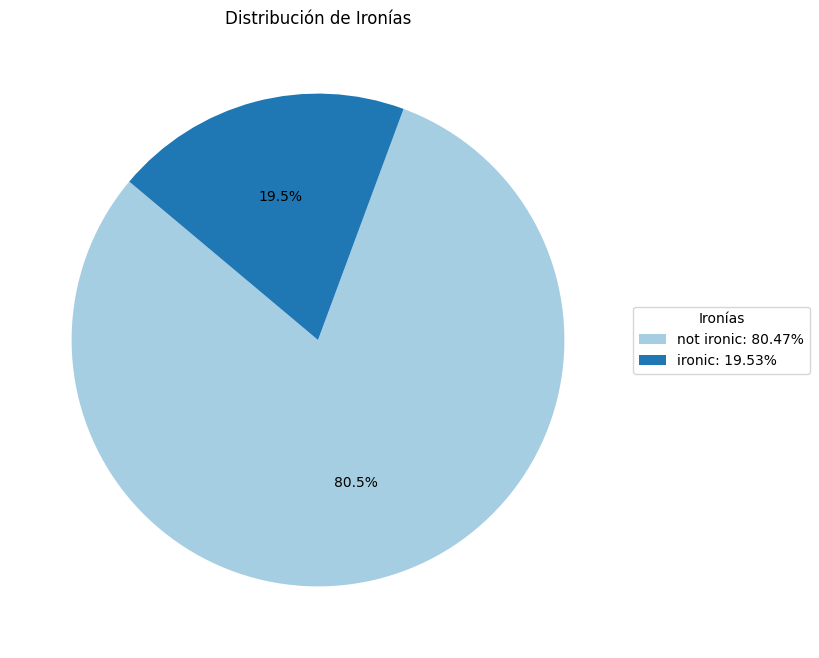

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_irony_percentages.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Ironías")
legend_labels = [f"{irony}: {percentage:.2f}%" for irony, percentage in overall_irony_percentages.items()]
ax.legend(wedges, legend_labels, title="Ironías", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [13]:
print("\nEjemplos de cada tipo de Ironía:")
for sent_type, example in examples_per_irony.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de Ironía:
not ironic: ["Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3", '@Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.', '@Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa', '@Otb_35 Que te calles so guarra.', 'Quiero pegarte pq estás bien imbécil y después darte un besito. 🙂', '@AngeAlvarez7 Callate perra, re despierta estoy', '@PoderFeminazi Eso es! Cojones!', '@ian_delaCalva @IrantzuVarela @pikaramagazine Oye por qué no molestas a tu puta madre?', 'Miss perra: Valentinaaa amo mucho tu icon y header son re lindos,te mereces todo con tus ídolos y te mereces tanto abrazar a camila & ariana *al igual que todos tus ídolos*tu cuenta en general es perfecta y una de mis favoritas, eres una personita muy especial para mi+', '@EdiiXI @lidiahdlgo Cállate tu !! Per

--------------------------------------------


-----------------------------------------------

### Tweets de misogynous

-----------------------------------------------


In [14]:
text_misogynous = [text for text in df_ibereval[df_ibereval["misogynous"] == 1]["text"].tolist()]
results_irony_analysis_misogynous = [analyze_irony(text) for text in tqdm(text_misogynous)]

  0%|          | 8/1649 [00:00<00:20, 79.24it/s]


-----------------------
Texto analizado: @Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9672826528549194, 'ironic': 0.03271733224391937}

-----------------------
Texto analizado: @Rafhyta86 @ElDesmadre__ Habe pasame el video donde adan diga puta a las mujeres sevillistas...'MI NOVIA ES SEVILLISTA',no dice TODAS LAS SEVILLISTAS.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.38623473048210144, 'ironic': 0.6137652397155762}

-----------------------
Texto analizado: @Otb_35 Que te calles so guarra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982818365097046, 'ironic': 0.001718171057291329}

-----------------------
Texto analizado: L- El mejor luegar para tener mi polla ahora mismo es en la garganta de Wicca, llenándome de babas
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006676228251308203, 'ironic': 0.9933237433433533}

--------------------

  1%|          | 17/1649 [00:00<00:20, 80.33it/s]


-----------------------
Texto analizado: Y yo atorado en el tráfico, claramente tu eres la perra de esta relación. https://t.co/2CaxQqwHqQ
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.28509703278541565, 'ironic': 0.7149029970169067}

-----------------------
Texto analizado: Nada más vulgar y de mala educación entrar a mi casa y gritarme sin saber de que me habla. TE MERECES EL INFIERNO PERRA.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996553659439087, 'ironic': 0.00034457514993846416}

-----------------------
Texto analizado: @birarxs nono claro que no, callate q mientras tenga alcohol vos tragas perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5770069360733032, 'ironic': 0.4229930639266968}


  2%|▏         | 26/1649 [00:00<00:20, 79.98it/s]


-----------------------
Texto analizado: Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4080663025379181, 'ironic': 0.5919336676597595}

-----------------------
Texto analizado: @AlexandGutiz Pues dispuesto a ser un amo muy exigente! empinarte a mi gusto y nalguearte como te lo mereces por puta cachonda y zorra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6725085973739624, 'ironic': 0.3274913728237152}

-----------------------
Texto analizado: @fxbianna Y tu eres la amiga perra que me lo va mamar a espaldas de ella, estupida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975444674491882, 'ironic': 0.0024554829578846693}

-----------------------
Texto analizado: @Mariiana1478 @vca99 @laura9909_ @mejiaosorio_ Tú eres la perra mayor JAJAJAJAJAJA con manes de carros
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.022015536203980446, 'ironic': 0.9779844880104065}

--

  2%|▏         | 34/1649 [00:00<00:20, 79.52it/s]


-----------------------
Texto analizado: @alaniscristalv Cállate, pa' interés cualquiera so perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9890509843826294, 'ironic': 0.010949090123176575}

-----------------------
Texto analizado: @ERROR14501 @BIZARROMAN09 Callate perra y no
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9887229204177856, 'ironic': 0.011277062818408012}

-----------------------
Texto analizado: @PoderFeminazi Cállate y hazme la cena.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.24002207815647125, 'ironic': 0.7599779963493347}


  3%|▎         | 42/1649 [00:00<00:21, 73.38it/s]


-----------------------
Texto analizado: @Anita_Romi Cállate la puta boca challenge no eres una mierda de persona y si te draggean pues las cogemos y las matamos https://t.co/uZThUJRoPD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996460676193237, 'ironic': 0.0003539827011991292}

-----------------------
Texto analizado: @mariajoarga @Paugalindo Ay cállate perra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9419551491737366, 'ironic': 0.05804487317800522}

-----------------------
Texto analizado: @beleeeennnn_ sos más perra vos que ella callate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.968779444694519, 'ironic': 0.031220514327287674}

-----------------------
Texto analizado: Cinder eres una hija de la grandísima puta y te mereces lo peor. Y te lo vas a llevar, zorra de mierda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995612502098083, 'ironic': 0.0004387332301121205}

-----------------------
Texto analizado: E

  4%|▎         | 58/1649 [00:00<00:20, 76.03it/s]


-----------------------
Texto analizado: @MiaVasile Callate y mira como la perra muerte toda la alfombra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9905779361724854, 'ironic': 0.009422036819159985}

-----------------------
Texto analizado: @KPLong4 @cuenta_C @A3Noticias que te calles la puta boca esa de sapo que tienes
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979133009910583, 'ironic': 0.0020866612903773785}

-----------------------
Texto analizado: Que es una Mujer embarazada de dos nenas y un varon? Un kit de limpieza con instrucciones.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957656860351562, 'ironic': 0.004234316758811474}

-----------------------
Texto analizado: ¿Cuál es la peor desgracia para una mujer? Parir un varón, porque después de tener un cerebro dentro durante 9 meses, van y se lo sacan.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9681714177131653, 'ironic': 0.03182853385806084}

----------

  4%|▍         | 74/1649 [00:00<00:21, 74.38it/s]


-----------------------
Texto analizado: Gracias Twitter por enseñarme que el truco para ser famosa es estar bien buena y ser bien puta
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.016430573537945747, 'ironic': 0.9835694432258606}

-----------------------
Texto analizado: Cuando no opinas como las #feminazis quieren sos acosador/abusador/violador.... 80% de las denuncias de mujeres victimizadas son falsas. #Femimoda https://t.co/PkqOGkjziV
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997382760047913, 'ironic': 0.00026173453079536557}

-----------------------
Texto analizado: @abc_es @HiginiaRoig Ya está la niña del exorcista diciendo tonterías. Has visto lo que a hecho la guarra de tú hija.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9768112897872925, 'ironic': 0.023188680410385132}

-----------------------
Texto analizado: Lo estoy contando a sara lo que me pasó el 28/12 y me está llamando zorra, no es culpa mía ok JAJSAJAKSJAKSAKJSKJ


  6%|▌         | 92/1649 [00:01<00:19, 78.40it/s]


-----------------------
Texto analizado: ¿cual es el dia de la mujer? -El dia menos pensado-
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6966855525970459, 'ironic': 0.3033145070075989}

-----------------------
Texto analizado: Porque las mujeres ven las peliculas porno enteras? -Porque se creen que al final se van a casar o algo.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0975458174943924, 'ironic': 0.9024541974067688}

-----------------------
Texto analizado: @Sucedaneosdesal @recap001 Pero cállate perra, que lo lo había visto xD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9618961811065674, 'ironic': 0.03810387849807739}

-----------------------
Texto analizado: Pero a ver tú eres más puta que las gallinas contigo no hay virtud que proteger #nv
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0022545596584677696, 'ironic': 0.9977454543113708}

-----------------------
Texto analizado: @clarialvarez15 AH NO q hija d puta sos, 

  7%|▋         | 109/1649 [00:01<00:19, 78.39it/s]


-----------------------
Texto analizado: ONLINE EN https://t.co/wkT9BMovtL Thalia peliroja canchonda en busca de una polla bien guarra ...#sexo por #webcam 🚨 https://t.co/YEVmgJXLgD
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3556954264640808, 'ironic': 0.6443045139312744}

-----------------------
Texto analizado: No entiendo por qué no te gusta mi perra si tú eres más perra q ella
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9945353269577026, 'ironic': 0.005464667454361916}

-----------------------
Texto analizado: @ami_abud callate gorda babosa igual q tu perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989839196205139, 'ironic': 0.001016000984236598}

-----------------------
Texto analizado: Porque ladra tanto mi perra? La puta madre cállate un poco
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9763122797012329, 'ironic': 0.02368772402405739}

-----------------------
Texto analizado: @SrtoAdriGH abusaba de él, es un

  8%|▊         | 126/1649 [00:01<00:19, 78.50it/s]


-----------------------
Texto analizado: @laLauusrobles Tu eres zorra amiga jajajajajajajaja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9685446619987488, 'ironic': 0.03145532310009003}

-----------------------
Texto analizado: @qweenbellaC callate de una vez perra en celo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997724711894989, 'ironic': 0.002275231759995222}

-----------------------
Texto analizado: Si por rechazar, enseñar el culo, enseñar las tetas, follar, liarme con quien me salga dl coño o etc soy una guarra, tranquil@s, seré aún más guarra todavía. Pero lo que realmente soy, es libre, libre de hacer con mi cuerpo y con mi vida lo que YO quiera, no lo que a ti te guste.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9882120490074158, 'ironic': 0.011787885800004005}

-----------------------
Texto analizado: O Panamá es muy chico, o tu eres muy perra.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.08217950165271759

  9%|▊         | 144/1649 [00:01<00:18, 82.07it/s]


-----------------------
Texto analizado: @CamiIa_CabeIIof Me olvidé un millón de cosas, pero bueno, tu novia es muy doris. TE AMO MUCHO, ZORRA. ME ENCANTAS DEMASIADO.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5951435565948486, 'ironic': 0.40485644340515137}

-----------------------
Texto analizado: @laurandzukic @Castol0 Tu eres la novia de la otra zorra https://t.co/oMU8Wr955f
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.616309404373169, 'ironic': 0.38369062542915344}

-----------------------
Texto analizado: Ay pero ojo el chabon se coge a una casada y es un crack y ella una zorra, no?? Imbécil https://t.co/C8NHuo7D8T
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9830736517906189, 'ironic': 0.016926294192671776}

-----------------------
Texto analizado: @VidalSieteDiez Tú eres la perra, no te dejes engañar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9851564168930054, 'ironic': 0.014843547716736794}

------------

  9%|▉         | 153/1649 [00:01<00:18, 81.68it/s]


-----------------------
Texto analizado: Voy a hacer un compilado de videitos con todas las cosas que le digo a mi perra, eso les va a provocar multiples acv y van a morir todos. Que goma que soy la puta madre.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.015164574608206749, 'ironic': 0.9848355054855347}

-----------------------
Texto analizado: @LuciaAvelino3 pero cállate vos perra (hoy no estoy creativo para putear)
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.73405921459198, 'ironic': 0.26594078540802}

-----------------------
Texto analizado: 'te voy a enseñar política de una forma objetivCRISTINA ES UNA HIJA DE RE MIL PUTA'
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9955052137374878, 'ironic': 0.004494716878980398}

-----------------------
Texto analizado: La chica de diamons me dice 'ay si tenes una cintura re chiquita' hija de puta no ves que estoy gorda, t voy a comprar igual pero cállate
Ironía detectado: not ironic
Probabilida

 10%|▉         | 162/1649 [00:02<00:18, 79.64it/s]


-----------------------
Texto analizado: esas jotillas ridículas de biografías pedorras de #twitter y fotos enseñando la panochita de perra sucia deberían adjuntarle: jota, inventada y posona; pinches guangas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9774529933929443, 'ironic': 0.022547069936990738}

-----------------------
Texto analizado: @BIoodyCountess < cuando porque poco más puede hacer maldita zorra tetona. No mereces el apellido Bathory.-
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.027758009731769562, 'ironic': 0.972241997718811}

-----------------------
Texto analizado: @aguus_nanni Aaaaa callate maldita perra que vos tambien me tenes abandonada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9802566170692444, 'ironic': 0.019743384793400764}

-----------------------
Texto analizado: // Hostia puta, si tú eres del Fake Danganronpa, si mal no recuerdo¿ https://t.co/vqFg6j4QKx
Ironía detectado: ironic
Probabilidades: {'not ironic'

 10%|█         | 171/1649 [00:02<00:18, 81.82it/s]


-----------------------
Texto analizado: @lizbethsm19 Cállate perra si ahorita te tomaste una ultra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8767625689506531, 'ironic': 0.1232374832034111}

-----------------------
Texto analizado: La chica es puta. El chico es un hijo de puta. Las putas nosotras siempre no? https://t.co/PfzLPx4SEU
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9195595979690552, 'ironic': 0.08044037967920303}

-----------------------
Texto analizado: @AgusCussinolpda Jajajajaa y vos ? Cállate queres que ahora se acuerdan de mi perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6745792031288147, 'ironic': 0.3254208266735077}

-----------------------
Texto analizado: Y mis primas calladas pq saben que aquí la perra de la familia soy yo y que con un mensaje les arruino la vida perfecta que aparentan, a parte las dos me caen bien 🙄
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7996715903282166, 'ironic': 

 11%|█         | 180/1649 [00:02<00:17, 83.15it/s]


-----------------------
Texto analizado: @XxkirtsxX @keepingaIex callate la puta boca pesado
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993496537208557, 'ironic': 0.0006503533804789186}

-----------------------
Texto analizado: Fav si eres bien puta para meterte al nuevo grupo de dm que crearé donde nos enseñaras las tetas guarra desgrac
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8292405605316162, 'ironic': 0.17075946927070618}

-----------------------
Texto analizado: Cuando el coreano se pone caliente pero tu eres una perra fria mas fria que rusia gil culiao nomas https://t.co/qFF6eunZLt
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7596681118011475, 'ironic': 0.24033191800117493}

-----------------------
Texto analizado: CALLATE GUARRA https://t.co/sNQF9mdeyG
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990739822387695, 'ironic': 0.0009260490187443793}

-----------------------
Texto analizado: Alguien le quier

 11%|█▏        | 189/1649 [00:02<00:17, 84.31it/s]


-----------------------
Texto analizado: @elisacarrio La concha de tu madre hija de mil puta!!! Nada más, no lo mereces
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988395571708679, 'ironic': 0.0011604848550632596}

-----------------------
Texto analizado: @Yuki_prostituta yo lo que quiero es tu coño y que tú quieras mi polla~
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.15756550431251526, 'ironic': 0.8424344658851624}

-----------------------
Texto analizado: “Que tú eres perra,miau,miau,miau”. –Valentina 17 años,mientras piensa para que nació JAJSJAJAJAJAJA.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.008009151555597782, 'ironic': 0.991990864276886}

-----------------------
Texto analizado: @AquiCorroVrgara Porque tú eres más perra todavía. 💅👄👅👑💄
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04134384170174599, 'ironic': 0.9586561918258667}

-----------------------
Texto analizado: @Mzavalagc @RicardoAnayaC @lopezobrador_ Calla

 12%|█▏        | 198/1649 [00:02<00:17, 81.85it/s]


-----------------------
Texto analizado: '¿La mitad de sueldo por ser mujer?' http://t.co/HXOVOaiOuj Así es, porque aguantarlas cuesta el doble. #TomaDosTazas
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04038753733038902, 'ironic': 0.9596124887466431}

-----------------------
Texto analizado: @lauraburrel missin pegarte en la cara con lonchas de queso vecina https://t.co/67PdyfJRFW
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.034909553825855255, 'ironic': 0.9650905132293701}

-----------------------
Texto analizado: @antu_cerevin @BornetVane Callate perra jajajajajajajajajaja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8850790858268738, 'ironic': 0.11492091417312622}

-----------------------
Texto analizado: @julianpineiro Callate, decís eso porque tu perra no llora porque ESTÁ CASI SORDA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9902132153511047, 'ironic': 0.009786778129637241}

-----------------------
Texto analizado: 

 13%|█▎        | 207/1649 [00:02<00:17, 83.44it/s]


-----------------------
Texto analizado: @ValeriaGV0222 @ibaewhore Oye oye, le enseñaré esto a mi mamá, perra
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02510063163936138, 'ironic': 0.9748993515968323}

-----------------------
Texto analizado: Como me matas cuando te mueves así de lento, siento todo el recorrido y la presión de tu coño alrededor de mi polla, acaricias mi pecho, sientes mi respiración agitada, me voy a correr nena https://t.co/32P0qrpcPi
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0813034176826477, 'ironic': 0.9186966419219971}

-----------------------
Texto analizado: @TamiFS_art comeme los cojones puto imbécil de la polla
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994543194770813, 'ironic': 0.0005456780199892819}

-----------------------
Texto analizado: @MRMaureraVen ¿Para que me sigues maldita chavista hija de puta? Sal de mi TL perra asquerosa. Tu eres culpable de la desgracia de Venezuela. Mil veces maldita tu y to

 13%|█▎        | 216/1649 [00:02<00:17, 84.09it/s]


-----------------------
Texto analizado: @nahimachoura @SanCadilla Ya cállate pinche perra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9954824447631836, 'ironic': 0.004517583176493645}

-----------------------
Texto analizado: Apartar tu tanga a un lado y frotar la punta de mi polla por tu coño mojándola con tus flujos calientes, resbalan y me ponen cachondo, un empujón más y ya estaré dentro de ti https://t.co/jO9qcCn4yu
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0890389010310173, 'ironic': 0.9109610915184021}

-----------------------
Texto analizado: ¿Por qué una mujer no puede ser guapa e inteligente? Porque sería un hombre.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6406556367874146, 'ironic': 0.35934436321258545}

-----------------------
Texto analizado: @NatachaJaitt @ulisesjaitt @MarceloPolino Como no te mato por hija de puta y por puta provocadora , perra , mereces la muerte sucia HDP
Ironía detectado: not ironic
Probabilida

 14%|█▎        | 225/1649 [00:02<00:16, 85.08it/s]


-----------------------
Texto analizado: Eres la vieja mas osicona y zorra del mundo que no te mereces andar con mi amigo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993732571601868, 'ironic': 0.0006267485441640019}

-----------------------
Texto analizado: *tells my grandma me and Daniel are fighting “ayyyyy pobrecito mi hijo, tú eres la perra desgraciada” https://t.co/7cDzbuouGO
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.34110912680625916, 'ironic': 0.6588908433914185}

-----------------------
Texto analizado: Mi perra es lo más insoportable del mundo chabon. QUIERO DORMIR CALLATE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9808894991874695, 'ironic': 0.019110506400465965}

-----------------------
Texto analizado: -¿Que le compraste a tu mujer por San Valentín? -Un collar espectacular, y tu? -Nada, yo todavía la dejo suelta
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04055086523294449, 'ironic': 0.9594491720199585}

-

 14%|█▍        | 234/1649 [00:02<00:16, 86.02it/s]


-----------------------
Texto analizado: @hezmick @pegaso6038 Zorra tu eres el dolor y se Le va a poner remedio no te preocupes
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5527808666229248, 'ironic': 0.4472191631793976}

-----------------------
Texto analizado: @Varela_Nat Cállate perra que sos si me habré tenido que esperar que te arregles
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9591200947761536, 'ironic': 0.04087989777326584}

-----------------------
Texto analizado: Que cuza antes la calle, una mujer inteligente o una tortuga vieja? Una tortuga vieja porque las mujeres inteligentes no existen ...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0010001070331782103, 'ironic': 0.9989998936653137}

-----------------------
Texto analizado: @AlexiaBiava Jajajajajaj zorra imbecil mi idola
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9427980780601501, 'ironic': 0.05720188841223717}

-----------------------
Texto analizado: 

 15%|█▍        | 243/1649 [00:03<00:16, 84.81it/s]


-----------------------
Texto analizado: #RAWCL puta la wea, Cesaro merecia terminar el año campeon
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9970967769622803, 'ironic': 0.0029031920712441206}

-----------------------
Texto analizado: Y tu eres Perra, ládrame. Ay, qué perra mi amiga. 🐶🐶
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.27353665232658386, 'ironic': 0.7264633774757385}

-----------------------
Texto analizado: Las personas feministas solo se dedican a expandir mierda sobre la cara de los hombre y despues realmente lo que buscan es igualdad
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996297359466553, 'ironic': 0.00037026178324595094}

-----------------------
Texto analizado: @majohcampos ay cállate no mames estás divina puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6622636914253235, 'ironic': 0.3377363085746765}

-----------------------
Texto analizado: @Aprosex @anagailo1 @DoctoraGlas @TowandaRebels De 

 15%|█▌        | 252/1649 [00:03<00:16, 84.72it/s]


-----------------------
Texto analizado: Hoy quiero denunciaaaaaaar A LA GENTE PUTO GUARRA QUE HUELE A SUDOR Y CHORIZO Y SE SUBE AL BUS DEJANDO A TOL MUNDO KO. Shame on you 🤬
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999087929725647, 'ironic': 0.0009121309267356992}

-----------------------
Texto analizado: Eso y más mereces por perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9947370886802673, 'ironic': 0.0052629560232162476}

-----------------------
Texto analizado: @riveraingrith @sofiaamtz5 JAJAJAJAJAJAJAJA ya sé, pero tú eres una perra, yo soy bien buena y Sofía se aprovecha de mi nobleza
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.22194606065750122, 'ironic': 0.7780539393424988}

-----------------------
Texto analizado: Si te ponen una polla en la cara tu primer instinto es chuparla
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.08243750035762787, 'ironic': 0.9175625443458557}

-----------------------
Texto analizad

 16%|█▌        | 261/1649 [00:03<00:16, 84.59it/s]


-----------------------
Texto analizado: Guarra se folla a Papá Noel en un autobús https://t.co/YUseYMe6ss https://t.co/jGhp8RBRUo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6052591800689697, 'ironic': 0.3947407901287079}

-----------------------
Texto analizado: @PoderFeminazi Y luego tendrías que fregar toda la sangre y demás, como mujer que eres.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9493162035942078, 'ironic': 0.05068377032876015}

-----------------------
Texto analizado: harassand Pepe querido no te merecías el maltrato de esta puta… https://t.co/PupvavRFpF
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993177652359009, 'ironic': 0.0006822847062721848}

-----------------------
Texto analizado: Y tú eres perra, ladrame JAJAJAJAJAJAJAJAJAAJJAJAJA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9808776378631592, 'ironic': 0.019122309982776642}

-----------------------
Texto analizado: Para él tu eres la perra y

 16%|█▋        | 270/1649 [00:03<00:16, 84.13it/s]


-----------------------
Texto analizado: @Soy_Elena_Sin_H @LeticiaDolera No tienes puta idea, está claro.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7064609527587891, 'ironic': 0.29353898763656616}

-----------------------
Texto analizado: @CerGamer_ @DewcesUhc Bueno tú eres su perra, no yo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6115389466285706, 'ironic': 0.38846105337142944}

-----------------------
Texto analizado: Porque las mujeres pierden la regla a los 50? Porque necesitan la sangre para las varices.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6069566607475281, 'ironic': 0.3930433392524719}

-----------------------
Texto analizado: Que horrible verte así Sofi, como te voy a extrañar mi perra loca! Espero que estes en un lugar mejor, y tengas todo lo que mereces!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977232813835144, 'ironic': 0.0022767186164855957}

-----------------------
Texto analizado: Soy

 17%|█▋        | 279/1649 [00:03<00:16, 82.75it/s]


-----------------------
Texto analizado: @PabloAgustin @barbarammzz @MicaSuarez12 CÁLLATE...PERRA https://t.co/Qm6enxgxls
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9936068058013916, 'ironic': 0.006393153220415115}

-----------------------
Texto analizado: Mis padres tienen 30 años de casados y 4 hijos y yo ni siquiera puedo enseñarle a mi perra que haga del baño en un sólo lugar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9938921928405762, 'ironic': 0.006107852794229984}

-----------------------
Texto analizado: yo - me picó un animal wey. mi hermana - te lo mereces por zorra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9664421677589417, 'ironic': 0.03355778008699417}

-----------------------
Texto analizado: @JorgeUrielPeal2 @JAIMEXELPINGU7 @YixGamingXD @leandronahuelv5 @AdairGT Tu eres solo mia zorra >:'v💔
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7886053323745728, 'ironic': 0.21139465272426605}

----------

 17%|█▋        | 288/1649 [00:03<00:16, 81.87it/s]


-----------------------
Texto analizado: Miriam se merecía una canción decente para bordarlo y es que la perra lo ha bordado y se ha quedado tan tranqui! #OTGala8
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.43880194425582886, 'ironic': 0.5611980557441711}

-----------------------
Texto analizado: La zorra de @laufer4 riéndose en la cara de mica mientras lloraba hay la tienen ala careta esa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9956133365631104, 'ironic': 0.004386657848954201}

-----------------------
Texto analizado: @_omarm58 Callate Perra. Toda con el nopal en la frente 😂🙄
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.775750994682312, 'ironic': 0.22424905002117157}

-----------------------
Texto analizado: @ValenARG_tina Sii bb comemela t la meto hasta la garganta y que no puedas respurar por unos segundos
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.27785012125968933, 'ironic': 0.7221499085426331}

-----------------

 18%|█▊        | 297/1649 [00:03<00:16, 83.08it/s]


-----------------------
Texto analizado: O sea que aquí normalizas la violación y el acoso y aún así te crees el puto amo? Lo peor de todo es saber que tienes miles de seguidores que te aplauden
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9959266185760498, 'ironic': 0.004073370713740587}

-----------------------
Texto analizado: Citar un tuit no es acoso Decirle a alguien lo imbécil que es cuando dice una tontería tampoco Hacerle una cuenta parodia para reirse de ella todos lo días pues un poco si la verdad
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992859959602356, 'ironic': 0.0007140167872421443}

-----------------------
Texto analizado: @azofeminazi Un buen azote! Ayuda RT Movimiento SEMEN. Difundámoslo!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7321575880050659, 'ironic': 0.2678423523902893}

-----------------------
Texto analizado: Sacas mi polla de tu coño y me acabas con tu mano, me tienes a mil y me corro de una forma 

 19%|█▊        | 306/1649 [00:03<00:16, 83.79it/s]


-----------------------
Texto analizado: @Emily_Guadiana1 @PPTeamKaren YA CALLATE PERRA PLIS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9899981617927551, 'ironic': 0.01000183541327715}

-----------------------
Texto analizado: “Voy a enseñarle a esta perra como se trata a un hombre” LMAO IN LOVE WITH EL TITI 😂
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.023490171879529953, 'ironic': 0.9765098094940186}

-----------------------
Texto analizado: ¿Ves que tu coño me importe? Cómete mi polla, basura https://t.co/ht02KyYWZh
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988096952438354, 'ironic': 0.0011903533013537526}

-----------------------
Texto analizado: toda la razón,tatita. Las mujeres son minoría (sucias perras) y el acoso es irrelevante (sucias feminazis) 🙄🤦 https://t.co/p73b0gasou
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997346043586731, 'ironic': 0.0026539380196481943}

-----------------------
Texto analizado

 19%|█▉        | 315/1649 [00:03<00:15, 84.03it/s]


-----------------------
Texto analizado: @jcastle1995 mejor cállate perra lmao
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9928215146064758, 'ironic': 0.007178544066846371}

-----------------------
Texto analizado: Ven, comemela y cállate ya
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8920381665229797, 'ironic': 0.10796183347702026}

-----------------------
Texto analizado: DEJA DE TUITEAR HIJA DE PUTA ESCUCHA LOS ARGUMENTOS QUE LUEGO TE VAS A QUEDAR CALLADA FUJIMIERDA DEL CARAJO https://t.co/np9RAv5auI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996410608291626, 'ironic': 0.0003589576226659119}

-----------------------
Texto analizado: @Ahrizorrita9 Mmm... Cuidarte y follarte con ganas y llenar tu coño con harto semen
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.18406742811203003, 'ironic': 0.8159326314926147}

-----------------------
Texto analizado: @mykingdoblas Como si tu hubieras echo eso callate la puta boca
Ir

 20%|█▉        | 324/1649 [00:03<00:15, 85.18it/s]


-----------------------
Texto analizado: @AgusssLarrosa callate perra q t haces llamar mejor amiga zorra del orto aprende a escribir chau
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9965128302574158, 'ironic': 0.0034871737007051706}

-----------------------
Texto analizado: @pauvillarreal9 Callate cara d perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9969698786735535, 'ironic': 0.0030301332008093596}

-----------------------
Texto analizado: Yo el otro día vi que estaba leyendo junto a Aitana y soltó 'esta chica es un poco zorra no??' y me mosqueó la vd https://t.co/dusLohr3un
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8199325799942017, 'ironic': 0.18006742000579834}

-----------------------
Texto analizado: Por qué las mujeres tienen el agujero del culo y el del coño tan juntos?Para poder agarrarlas como un pack de cerveza.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006708186585456133, 'ironic': 0.99329185485839

 20%|██        | 333/1649 [00:04<00:15, 82.64it/s]


-----------------------
Texto analizado: @AdrianVG__ Hola soy Savic, perdona pero tengo ni polla en tu culo y no la puedo sacar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.955333411693573, 'ironic': 0.044666554778814316}

-----------------------
Texto analizado: Y tú eres la perra mayor, Hux. No te muerdas la lengua. —Rueda los ojos, colocándose aquel gorro y quitándole el polvo de encima, deteniéndose de golpe frente a el.— Y he acabado mi entrenamiento de hoy, así que, no. https://t.co/CM2pbnNCc4
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2003416270017624, 'ironic': 0.7996583580970764}

-----------------------
Texto analizado: @mraubreygrey @sweetskipp asi me gusta amor bien rica enseñando las tetas ricas que tienes perra rica
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.49400511384010315, 'ironic': 0.5059949159622192}

-----------------------
Texto analizado: @LuceroAndraade Nany tú eres bien perra básica
Ironía detectado: not ironic
P

 21%|██▏       | 351/1649 [00:04<00:15, 84.05it/s]


-----------------------
Texto analizado: @CFKArgentina Cállate ladrona hija de puta... Caraduras
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995890259742737, 'ironic': 0.00041103147668763995}

-----------------------
Texto analizado: @rocioquirogaaa @AlbaaRocio Vos tambien callate y contestame los wpp perra 😑
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9335523247718811, 'ironic': 0.06644763052463531}

-----------------------
Texto analizado: Tu chica es un poco guarra 😊 — Quién se supone que es mi chica https://t.co/bmgezed3wY
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9884874820709229, 'ironic': 0.011512587778270245}

-----------------------
Texto analizado: @__Irenelazaro26 Pero porque tu eres una perra con el corazón de hielo, a mi me gusta el cariño humano 🙆
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.681572437286377, 'ironic': 0.31842756271362305}

-----------------------
Texto analizado: @marita_hidalgo CA

 22%|██▏       | 369/1649 [00:04<00:15, 81.52it/s]


-----------------------
Texto analizado: @AzulOKey Jajaja callate gila, inviame y voy perra !!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6623263359069824, 'ironic': 0.3376736342906952}

-----------------------
Texto analizado: @Ibi_hotmidori por que no me los muestras, me gustaria poder meter mi polla en tu culo y tu concha
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9548177719116211, 'ironic': 0.0451822467148304}

-----------------------
Texto analizado: @laurabozzo Callate la boca vieja loca ven lame mi axila perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982829093933105, 'ironic': 0.001717092702165246}

-----------------------
Texto analizado: Vendida, @IndiraHuilca, tienes cara para demostrar tu hipocresía, mejor cállate, perra. https://t.co/mLwCXla1nn
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999573290348053, 'ironic': 0.00042669629328884184}

-----------------------
Texto analizado: @juanbrujox @dari

 23%|██▎       | 378/1649 [00:04<00:15, 81.75it/s]


-----------------------
Texto analizado: @Agstinaramos5 Cállate, vos porque ya estás casada maldita perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9918228983879089, 'ironic': 0.008177148178219795}

-----------------------
Texto analizado: ¿Que por qué me encanta @mermise ? Pues porque es la puta ama, ahora cállate q me tienes hasta el kiwi.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9530118107795715, 'ironic': 0.046988263726234436}

-----------------------
Texto analizado: Aborto de ardilla — Jaja callate aborto de perra sarnosa https://t.co/tHql0k8kpc
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8493906259536743, 'ironic': 0.15060941874980927}

-----------------------
Texto analizado: @MikeDeLioncourt @carloscramz Mike tu eres una zorra 😊
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.71326744556427, 'ironic': 0.2867325246334076}

-----------------------
Texto analizado: @JakyMemes Si tu eres tan perra que te com

 23%|██▎       | 387/1649 [00:04<00:18, 69.90it/s]


-----------------------
Texto analizado: sé mi dopamina.. dejame drogarme en tu coño y follarte en la cocina..
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005535392556339502, 'ironic': 0.9944645762443542}

-----------------------
Texto analizado: no me va a dar rabia porque me di la inyección callate estúpida no me muerdas vos que sos perra https://t.co/VetY24HKjG
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9298583269119263, 'ironic': 0.07014164328575134}

-----------------------
Texto analizado: @MarisaGlave callate perra de mierda... anda preparando tus maletas, te vas presa junto con la ratera villaran, la otra ratera heredia y la terruca veronika mendoza.... NADIE TE CREE..sigues con el floro de la matanza y secuentros?? jajajaja lo mismo que 
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985313415527344, 'ironic': 0.0014686916256323457}


 24%|██▍       | 395/1649 [00:04<00:19, 64.79it/s]


-----------------------
Texto analizado: @jenniferhaythes @ActualidadRT Cállate perra fascista hija de puta, seguro eres una muerta de hambre.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993910789489746, 'ironic': 0.0006089386879466474}

-----------------------
Texto analizado: Tú eres de los 70’ Y yo soy una zorra de los 90’
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.045062530785799026, 'ironic': 0.9549374580383301}

-----------------------
Texto analizado: TE LO MERECES POR PERRA. —Lo arrastra por la academia de las greñas y le da unos chanclazos. https://t.co/9GwmLte4BU
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9576165676116943, 'ironic': 0.04238341376185417}

-----------------------
Texto analizado: @PabloTinoco Cállate perra y ven a calentarme que hace frío. PD. Te extraño.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6213335990905762, 'ironic': 0.37866640090942383}

-----------------------
Texto analizado: No

 24%|██▍       | 402/1649 [00:05<00:20, 60.87it/s]


-----------------------
Texto analizado: @ash_london CALLATE PERRA LOCA CON METERTE CON LOUIS YA ES MUCHO . TE METES CON BARDERAS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991139769554138, 'ironic': 0.0008859774679876864}

-----------------------
Texto analizado: @xDeputyGrimes Pero si tú eres la perra.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.423907995223999, 'ironic': 0.576092004776001}

-----------------------
Texto analizado: Pasear a la perra en tacones es #glamour y el resto son tonterías
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.021344097331166267, 'ironic': 0.9786559343338013}

-----------------------
Texto analizado: @LoreniaCarr Cállate perra si todas tus conversaciones son spanglish 😂😂😂 te evitarias las correcciones a español 🙄
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.24987134337425232, 'ironic': 0.7501286864280701}

-----------------------
Texto analizado: ¿Qué hacer para que a una mujer le brillen los 

 25%|██▍       | 409/1649 [00:05<00:20, 60.19it/s]


-----------------------
Texto analizado: Se acaba de reir jijiji CALLATE PERRA ME ESTRESAS
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3054272532463074, 'ironic': 0.6945727467536926}

-----------------------
Texto analizado: me encanta lo guarra que eres, te follaria hasta provocarte un nuevo desgarro vaginal — si provocas un desgarro vaginal follando follas bastante mal https://t.co/j8U6umdicd
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03891134262084961, 'ironic': 0.9610887169837952}


 25%|██▌       | 416/1649 [00:05<00:20, 61.32it/s]


-----------------------
Texto analizado: @Metapodsin eres un imbécil de mierda nos tienes envidia pq somos la polla es eso verdad metapod lo sabia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7368875741958618, 'ironic': 0.2631123960018158}

-----------------------
Texto analizado: @AidenMockingjay @Daniel_Bugby Aiden creo que ves las mismas lagunas lógicas q yo. ¿Por qué el feminismo es lo bueno y el machismo lo malo?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995216131210327, 'ironic': 0.0004784530319739133}

-----------------------
Texto analizado: @LuzSalgado_R calláte perra sarnosa tú hablando de corrupción...y se te olvido la salita del SIN con tu cach....montesinos??
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9913172721862793, 'ironic': 0.00868269708007574}

-----------------------
Texto analizado: @GarayCeci Jajajaja cállate perra y hace un bebe
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5565521717071533

 26%|██▌       | 423/1649 [00:05<00:20, 60.92it/s]


-----------------------
Texto analizado: ush esa perra si que me cae re mal, se cree la verga y not mk, no eres nadie, cállate que a nadie le importa tu vida boba hp
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994957447052002, 'ironic': 0.0005042304401285946}


 26%|██▌       | 430/1649 [00:05<00:21, 57.82it/s]


-----------------------
Texto analizado: @PaolaruizR02 @mery_1502 Lo mereces pero quedando con nosotras perra mala
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977664947509766, 'ironic': 0.0022335078101605177}

-----------------------
Texto analizado: @parejamadrid31 Uuiifffff me encanta cómo me gustaría follarte bien tu coño y culo
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07363004982471466, 'ironic': 0.9263699650764465}

-----------------------
Texto analizado: @marbellalga ESA PERRA NO LO MERECÍA 😭😭😭
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9857962131500244, 'ironic': 0.014203819446265697}

-----------------------
Texto analizado: perra cállate la boca y continúa tu desafío 😘 https://t.co/jKWSPZvQED
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.991306722164154, 'ironic': 0.008693334646522999}

-----------------------
Texto analizado: @madridistadever @SiempreCasillas Cállate la puta boca, borrego.
Ironía detecta

 27%|██▋       | 443/1649 [00:05<00:19, 61.15it/s]


-----------------------
Texto analizado: Perdón Chofi pero a mi me diste a entender que la mujer es una perra ajajajajajjajajajaja https://t.co/0T6sKarW9Z
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8216240406036377, 'ironic': 0.1783759593963623}

-----------------------
Texto analizado: Hombres de España. Que no os frene el voto femenino. Somos más y nuestra opinión sigue contando más. ¡TodOs a las urnas!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992111921310425, 'ironic': 0.0007887896499596536}

-----------------------
Texto analizado: A fregar guarra @Barbijaputa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980807304382324, 'ironic': 0.0019192391773685813}

-----------------------
Texto analizado: Hola soy TraedRuffles tu novia es una puta me acabo de pasar el Tekken con Casemiro reídme las gracias por favor
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.07862217724323273, 'ironic': 0.9213778376579285}

-----------

 28%|██▊       | 458/1649 [00:06<00:18, 65.20it/s]


-----------------------
Texto analizado: @Placedalia1 Tu eres mas de Estar guarra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9908989667892456, 'ironic': 0.009101033210754395}

-----------------------
Texto analizado: @iduvina Zorra terrorista, imbécil e ignorante sos vos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995456337928772, 'ironic': 0.0004543765971902758}

-----------------------
Texto analizado: si te llamo puta es porque tu eres mi puta pero habrá problemas si alguien más te llama puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.987793505191803, 'ironic': 0.012206533923745155}

-----------------------
Texto analizado: @iAmGuillin @laimarie30 *Entra Héctor El Father al chat* ¡Si tú eres una perra pues yo soy más perro! y que se joda. 😂
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006862055044621229, 'ironic': 0.9931378960609436}

-----------------------
Texto analizado: ¡Cállate!, ella era una zorra, bien s

 29%|██▊       | 471/1649 [00:06<00:20, 57.12it/s]


-----------------------
Texto analizado: @Barbijaputa Pues sí. Debe ser que en el mundo-mierda de este gilipollas ser puta es un insulto. Seguro que él es un putero baboso
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9730949401855469, 'ironic': 0.026905087754130363}

-----------------------
Texto analizado: @ernestog_v Cállate el hocico perra, básica tu gfa y otras ciertas personas que conocemos jeje, lo puse por cosas que me han pasado y ahora finalmente me han hecho pensar así, mejor ve a joder a tu minion fav ok, d antemano grax
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987416863441467, 'ironic': 0.0012583475327119231}

-----------------------
Texto analizado: bitch, tu eres la perra' atte reb
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9277422428131104, 'ironic': 0.07225783169269562}

-----------------------
Texto analizado: @Dqnigamer @SoyPapho hijo de perra no me estes hablando asi tu eres mi puta
Ironía detectado: not iron

 29%|██▉       | 477/1649 [00:06<00:20, 56.53it/s]


-----------------------
Texto analizado: @DaniBalmaceda98 Cállate perra, nunca más nos juntamos (?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9666236042976379, 'ironic': 0.03337641432881355}

-----------------------
Texto analizado: Cuando decís que una mujer es guarra en la cama me la imagino lanzádoos caca y haciendo pis en vuestra cara y me río mucho.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1338469237089157, 'ironic': 0.8661531209945679}

-----------------------
Texto analizado: @joeldavid26 On tu eres muy perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8532730340957642, 'ironic': 0.14672701060771942}

-----------------------
Texto analizado: @CorpoRosaBlanca @paulitagarciag @BluRadioCo Alias el paisa, te mereces es una carcel debajo de la tierra. Hijo de perra, chanda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983938336372375, 'ironic': 0.0016061922069638968}

-----------------------
Texto analizado: @ca

 29%|██▉       | 483/1649 [00:06<00:22, 52.51it/s]


-----------------------
Texto analizado: @Madeleine_ng14 @dagmarrmuniz cállate estúpida perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9917688369750977, 'ironic': 0.00823116023093462}


 30%|██▉       | 489/1649 [00:06<00:21, 53.63it/s]


-----------------------
Texto analizado: @MikaBroglio @conilazarte16 @EveOcampos1 Cállate que te hable y te puse que estaban para las pelis puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9819055795669556, 'ironic': 0.01809437945485115}

-----------------------
Texto analizado: Princesa tu puta madre, trae a mi conejita, no te mereces mis mimos ni mis besos. https://t.co/Qtz6vvTqWo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9432954788208008, 'ironic': 0.05670453980565071}

-----------------------
Texto analizado: @CasftSamu CALLATE PUTA EJEJAJ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9002279043197632, 'ironic': 0.09977215528488159}

-----------------------
Texto analizado: Por las mujeres tienen cuatro neuronas??? Una para cada fogon
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006264969240874052, 'ironic': 0.9937350153923035}

-----------------------
Texto analizado: Si eres de los que piensas que una mujer es un

 30%|███       | 495/1649 [00:06<00:21, 53.07it/s]


-----------------------
Texto analizado: @Hitler__Braun Busca por diccionario. Q es lo siguiente después de guapa? Exacto, guarra
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.004701521713286638, 'ironic': 0.995298445224762}


 30%|███       | 501/1649 [00:06<00:22, 51.37it/s]


-----------------------
Texto analizado: @Pushsy_Herem @April_Gamer *.* me podes enseñar de como miércoles dibujas tan bien? Enseñame chamaca perra Ahre esta emosho uwu
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04808757081627846, 'ironic': 0.9519124031066895}

-----------------------
Texto analizado: Baby yo sé, que tú eres bien puta yo lo sé 🎶 La puse en cuatro pero nunca la besé 🎶😂😂😂😂
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06225791573524475, 'ironic': 0.9377420544624329}

-----------------------
Texto analizado: @croftarpiaa Cállate y deja a Lola en paz perra 🐕
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9323351383209229, 'ironic': 0.06766491383314133}

-----------------------
Texto analizado: -Veis chicas? Nunca hay que tener piedad con estas putas. Hay que educarlas en todo momento y enseñarles para lo que sirven: para nuestra diversión. Le voy a reventar su culo de puta mientras te lo come, y por su bien, espero que se esfuerce

 31%|███▏      | 516/1649 [00:07<00:18, 60.60it/s]


-----------------------
Texto analizado: que no¿? por que eres tan puta zorra mentirosa¿ cualquier user chica es mas juguetona que tu, puta monja — Bueno, suele pasar yo no busco ser juguetona ^^ https://t.co/k8D4HmBwzb
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03487337380647659, 'ironic': 0.9651265740394592}

-----------------------
Texto analizado: Y tú eres una perra como dice Joss Stone https://t.co/cDRan4DaSa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9942163228988647, 'ironic': 0.005783592816442251}

-----------------------
Texto analizado: Q va tener otra q lo hacen mejor, te traigo la perra de la vecina garcha pero callate lpm
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7873668670654297, 'ironic': 0.2126331776380539}

-----------------------
Texto analizado: @maritehgoldst @info7mty Cállate pinche perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967548251152039, 'ironic': 0.0032451488077640533}

---------

 32%|███▏      | 533/1649 [00:07<00:15, 70.67it/s]


-----------------------
Texto analizado: ¿Por que las mujeres se casan de blanco? Para hacer juego con el refrigerador, la cocina y la lavadora. #Humor
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006923347245901823, 'ironic': 0.9930766820907593}

-----------------------
Texto analizado: Vieron que las feministas son re violentas pero cuando es contra la mujer es como 'no, terrible hijo de puta no pueden ser tan violentos' xd
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9670450091362, 'ironic': 0.03295499458909035}

-----------------------
Texto analizado: @vntiat Maldita la puta que la parió, que es esta asquerosidad perra sucia. Debería sacarse la mierda que tiene en la cabeza hija de puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994068145751953, 'ironic': 0.0005932197673246264}

-----------------------
Texto analizado: Si se dijera que las mujeres son totalmente diferentes, pero no, son igual de hijas de la gran puta
Ironía detec

 33%|███▎      | 550/1649 [00:07<00:14, 75.39it/s]


-----------------------
Texto analizado: jajajajajaja me bloqueó la hija de perra esa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9938994646072388, 'ironic': 0.006100530736148357}

-----------------------
Texto analizado: @JamieFerreira10 tu novia es una zorra, me la folle las veces que yo quise
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975838661193848, 'ironic': 0.002416168339550495}

-----------------------
Texto analizado: @exitosape Que tal hija de puta está perra, para ir de acusete con un superior e infringiendo la ley.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995617270469666, 'ironic': 0.00043827365152537823}

-----------------------
Texto analizado: Deja de estar chingando, estúpida. Tú eres la zorra que se acuesta con quien sea aunque le den diez centavos. https://t.co/yCe73qIbmE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9942877888679504, 'ironic': 0.0057122246362268925}

-----------------------

 34%|███▍      | 568/1649 [00:07<00:13, 80.05it/s]


-----------------------
Texto analizado: vos me haces eso te pego una patada en la cara https://t.co/2drqUu5Rwc
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997066080570221, 'ironic': 0.0029339096508920193}

-----------------------
Texto analizado: @CanalusHeresy @Fourty35 @IrantzuVarela A, que la zorra está va de matona por la vida? Jajajaja. Pero si de un soplido la desgracias al adefesio ese!😂
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.025594694539904594, 'ironic': 0.9744052290916443}

-----------------------
Texto analizado: @Ryogure @Papelicioso Esa zorra se merecia todo lo que le pasò. De hecho, en la parte del juego donde tenes una cita con una de las dos, a mi me aparecio Tifa. Chere: playing otomes even if it's not an otome.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1956668645143509, 'ironic': 0.8043330907821655}

-----------------------
Texto analizado: @ivan4bolivar Cállate que asustas a la perra. (Y a mí también me das miedo)

 36%|███▌      | 586/1649 [00:07<00:12, 82.15it/s]


-----------------------
Texto analizado: @BeeluArzola Sos una hija de puta mala.madre pobre ángel todo x una tablet perra mal parida no te mereces nada vos presa tenes que ir no al sicólogo .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999667763710022, 'ironic': 0.00033229144173674285}

-----------------------
Texto analizado: @ChrisPortvgal No! puedes con ese papel para ser SANTANA se requiere ser una PERRA!! desde nacimiento y tu eres demasiado Quinn Fabray es decir mosquita muerta. 😘 https://t.co/n7fjVtswRZ
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.026860423386096954, 'ironic': 0.9731395840644836}

-----------------------
Texto analizado: 28: te amodio, odio a la perra de tu amiga ☺️☺️pero tú eres mi vida *tijerazo*
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9902480244636536, 'ironic': 0.009751973673701286}

-----------------------
Texto analizado: @AlemanS_ jajajajaj cállate perra, cumplime y súmale que me debes ir 1’ al Tasty R

 37%|███▋      | 604/1649 [00:08<00:12, 84.03it/s]


-----------------------
Texto analizado: 'Los huracanes con nombre de mujer son más letales' https://t.co/Wql6F2Em2U
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9274753928184509, 'ironic': 0.07252456247806549}

-----------------------
Texto analizado: @Asleerr @MIAREsproject callate la puta boca y vete a una biblioteca buscas una seccion donde haya feminismo y te quedas callado y lees y dejas de soltar gilipolleces comparable a la tierra es plana en cuanto a retroceso en los debates
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978381991386414, 'ironic': 0.0021618662867695093}

-----------------------
Texto analizado: @AlvaroUribeVel Pa’ pegarte en la cara MARICA.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.996821403503418, 'ironic': 0.0031786151230335236}

-----------------------
Texto analizado: @tresaaad Te lo mereces perra asquerosa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984220266342163, 'ironic': 0.00157

 38%|███▊      | 622/1649 [00:08<00:12, 83.07it/s]


-----------------------
Texto analizado: Olé perra hijueputa @Andreeaa_05 enseñarle que usted si sabe:3
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.539581835269928, 'ironic': 0.460418164730072}

-----------------------
Texto analizado: No fue acoso nada más, fue intento de violación a un menor de edad. 😫 Todo lo que dice Marta Lamas bien lo pudo haber repetido un machiprogre y abre la puerta a que usen su opinión 'calificada' para justificar abusos. https://t.co/gUq0cd2oKX
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998090863227844, 'ironic': 0.00019090760906692594}

-----------------------
Texto analizado: RECIÉN A LAS 4:17 SE QUEDO CALLADA LA PERRA DE LOS VECINOS. La re putísima madre, me voy a dormir antes de que empiece a joder de nuevo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5743486881256104, 'ironic': 0.42565131187438965}

-----------------------
Texto analizado: Tú eres la zorra Antoniaaaaaaaa
Ironía detectado: not iron

 39%|███▉      | 640/1649 [00:08<00:12, 81.29it/s]


-----------------------
Texto analizado: @Enana_miceli Jajajaja gracias amor, y callate que vos también estás re perra😍
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.21399064362049103, 'ironic': 0.7860093712806702}

-----------------------
Texto analizado: me: ay el peor enemigo de una mujer es otra mujer also me: esa vieja es bn zorra me again: deberíamos respetarnos entre nosotras
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9962890148162842, 'ironic': 0.003710956545546651}

-----------------------
Texto analizado: @YaniraVazquez3 Y coño también, asi que imagínate prencas del coño y comemelas 🤔🤔
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.003884795820340514, 'ironic': 0.9961152076721191}

-----------------------
Texto analizado: ¿Cómo le digo a mi hermano que su novia es una zorra? 😐
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.41080889105796814, 'ironic': 0.5891911387443542}

-----------------------
Texto analizado: Esto es po

 40%|███▉      | 658/1649 [00:08<00:11, 84.31it/s]


-----------------------
Texto analizado: Placer morboso posar la punta de mi polla en tu coño y empujar despacio, sentir como se amolda a mis venas, la presión al pasar, ese calor húmedo que me pone tan cachondo https://t.co/vvktEApjnG
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.21375107765197754, 'ironic': 0.7862489223480225}

-----------------------
Texto analizado: Somos animales: tú eres una perra y yo la ladilla que no se quiere despegar de esa totona.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06086200103163719, 'ironic': 0.9391379952430725}

-----------------------
Texto analizado: Ya hice copy-paste del mismo mensaje a toda la gente que se merecía un saludito en este año con mi perra a upa aullando como un lobo, así que me voy a ir a dormir. Saludos a todos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.679040253162384, 'ironic': 0.32095974683761597}

-----------------------
Texto analizado: @multimediostv Que por cierto Danna Paola

 41%|████      | 676/1649 [00:09<00:11, 85.55it/s]


-----------------------
Texto analizado: @InanimadaBarra subnormal cállate la boca ,escoria es tu padre que es yonky se follo a una zorra y saliste tu puta basura es lo que eres .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997838139533997, 'ironic': 0.00021619023755192757}

-----------------------
Texto analizado: @Ojo_Publico @YeniVilcatoma2 Que PERRA ERES! ni un perro se porta como tu! No mereces ser mujer! el pais te repudia! y te pasará la factura!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997065663337708, 'ironic': 0.00029341873596422374}

-----------------------
Texto analizado: @jocksan51 @MemoTorresL Cállate perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9949187636375427, 'ironic': 0.005081196315586567}

-----------------------
Texto analizado: Que te mientan en la cara mientras que ya sabes la verdad es la polla jajajajajajajajaj
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3000953793525696, 'ironic': 

 42%|████▏     | 694/1649 [00:09<00:11, 80.98it/s]


-----------------------
Texto analizado: cuando no tengo a nico mi novia es mi perra https://t.co/29fdEJWVjN
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2069043070077896, 'ironic': 0.7930957078933716}

-----------------------
Texto analizado: 'Lena Dunham prepara una serie sobre feminismo para HBO' Afirman que se rodará integramente en una cocina. #NewCine http://t.co/xJcFGo61c4
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967492818832397, 'ironic': 0.003250757697969675}

-----------------------
Texto analizado: @Merii2193 Tu callate que esa horita te la has comido por tu cara bonita... puta!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7949264049530029, 'ironic': 0.20507356524467468}

-----------------------
Texto analizado: @AlanGarciaPeru Los otros se venden. Ja. Tú eres la puta política mayor. Eres la Madame ! Vergüenza ajena das. Pobres tus hijos. Habrán aprendido de tu cinismo?
Ironía detectado: not ironic
Probabilidades: {'not ir

 43%|████▎     | 712/1649 [00:09<00:11, 79.72it/s]


-----------------------
Texto analizado: @SErikasex Ya deseo castigarte de una buena vez perra de mierda, mereces que te rellene una y otra vez de muchos chorros de semen hasta dejarte preñada!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.994549572467804, 'ironic': 0.005450399126857519}

-----------------------
Texto analizado: VOY A PUBLICAR TU FOTO EN LA PRENSA PA QUE LA GENTE LO SEPA QUE TU ERES TREMENDA PERRA HIJUEPUTAAAAAAAA.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999066174030304, 'ironic': 0.0009338693344034255}

-----------------------
Texto analizado: @_yxko @realDazhDeMicy te pego un ca;aso en la cara prra >:v
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9708239436149597, 'ironic': 0.029176050797104836}

-----------------------
Texto analizado: @javi_nolasquez Haha ay cállate si aquí el que es la perra sexual de los profes eres tú! Y 20 pero en la cola ojete !
Ironía detectado: not ironic
Probabilidades: {'not ironic': 

 44%|████▎     | 721/1649 [00:09<00:11, 79.19it/s]


-----------------------
Texto analizado: Felices 15 a la mas puta💗 espero que la estes pasando re lindo porque te lo re mereces, te amo un monnnnton !!! @XimeGatter https://t.co/onlbzJO13K
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9065803289413452, 'ironic': 0.09341967105865479}

-----------------------
Texto analizado: @ainoatundidor3 Callate, q tu si q t presenta. Pedazo d perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994592070579529, 'ironic': 0.0005408339784480631}

-----------------------
Texto analizado: Lloré como una estúpida después de pegarle a mi perra pero como rompió la pared se lo merecía
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9962199330329895, 'ironic': 0.0037801384460181}

-----------------------
Texto analizado: @eride91 Es que somos muy inocentes y ya enseñar un pezón es ser una guarra 😂
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.09276573359966278, 'ironic': 0.907234251499176}

---------

 45%|████▍     | 738/1649 [00:09<00:11, 79.25it/s]


-----------------------
Texto analizado: Le tengo que enseñar a la perra que cuando entré a la pieza cierre la puerta ahrr
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.017907747998833656, 'ironic': 0.9820922613143921}

-----------------------
Texto analizado: -En que se parece una mujer a una foca ? -En que una es gorda, tiene bigote y huele a pescado y la otra vive en el mar
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.022159365937113762, 'ironic': 0.9778406023979187}

-----------------------
Texto analizado: @Ndemoniado @Zurine3 Que coño que vivan las putas libres
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.10882996767759323, 'ironic': 0.8911699652671814}

-----------------------
Texto analizado: @eloyalvidrez10 Tu eres mi lady zorra barata
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13535258173942566, 'ironic': 0.8646474480628967}

-----------------------
Texto analizado: @NalgonaTw1 Deliciosa tetas para comemela a besoo
Ironía 

 46%|████▌     | 755/1649 [00:10<00:11, 80.92it/s]


-----------------------
Texto analizado: @magihenriquez_ pero voy como a las 12:30 por ahi, puta zorra no te mereces que te lleve pizzas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9165719151496887, 'ironic': 0.08342811465263367}

-----------------------
Texto analizado: Qué hace una mujer cuando llega y.. Bah, a quién coño le importa? Si es una mujer...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9724553823471069, 'ironic': 0.027544589713215828}

-----------------------
Texto analizado: @Zeus197711 Jajaja pues soy bien puta provocarme y verás lo puta que puedo ser bb 😘
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1334277093410492, 'ironic': 0.8665723204612732}

-----------------------
Texto analizado: - El corazón de una Mujer es Un profundo mar de secretos... - Fuiste muy PERRA antes. ¿Cierto?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.039769869297742844, 'ironic': 0.9602301716804504}

-----------------------
Texto anal

 47%|████▋     | 773/1649 [00:10<00:10, 82.42it/s]


-----------------------
Texto analizado: @inspirationjin Callate perra😂😂😂 si no lo quieres apoyar no lo apoyes y ya Ahorrate tus comentarios
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975034594535828, 'ironic': 0.002496521221473813}

-----------------------
Texto analizado: @FeerChavela_ Obvio tu eres mi mejor amiga por siempre y para siempre, zorra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9644528031349182, 'ironic': 0.03554721921682358}

-----------------------
Texto analizado: @BamAlondra ya cállate perra loca, no son los nervios. Sólo no se me da ser cursi. #perroanimal
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.19268187880516052, 'ironic': 0.8073180913925171}

-----------------------
Texto analizado: @Nayra_mex @blacknavi420 @escortsnat @Nayrazd1 Tu eres mi perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6221282482147217, 'ironic': 0.3778717517852783}

-----------------------
Texto analizado: @ResetG123 Tu

 48%|████▊     | 791/1649 [00:10<00:10, 82.99it/s]


-----------------------
Texto analizado: ¿Alguien le puede enseñar a superar a esa perra de mierda?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9702553153038025, 'ironic': 0.02974475361406803}

-----------------------
Texto analizado: @salvameoficial Tu eres el ser humano mas malo que hay en la tierra GUARRA CERDA SUCIA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991389513015747, 'ironic': 0.0008610482909716666}

-----------------------
Texto analizado: ¿Que hace una mujer en una habitación redonda? - Buscarle las esquinas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8603007793426514, 'ironic': 0.13969920575618744}

-----------------------
Texto analizado: Ya cállate la puta voca perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997879147529602, 'ironic': 0.002120833843946457}

-----------------------
Texto analizado: #SabiasQue el cerebro de la mujer esta conectado al culo? Porque cada vez que piensan la cagan
Ir

 49%|████▉     | 809/1649 [00:10<00:10, 79.02it/s]


-----------------------
Texto analizado: @ValuGordon Ahre es mi perra tambien tomatela aparte le doy mas bola que vos callate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.982450008392334, 'ironic': 0.017550010234117508}

-----------------------
Texto analizado: A ver, yo no soy guarra –no que va–, es que si una tía así dice eso... no me puedo quedar callada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9919305443763733, 'ironic': 0.008069431409239769}

-----------------------
Texto analizado: @Maritza05484697 TÚ eres la super RE QUE IDIOTA ¡¡DIOS TE MALDIGA Y TE DESTRUYA ERES GRAN MIERDA PENDEJA PUTA JODIDA DEL RE PUTO MIERDA GOBIERNO, DIOS MALDIGA Y MANDE AL INFIERNO A TODOS LOS QUE FIRMARON ESA PUTA LEY, DIOS TE LLENE EL CULO DE CÁNCER RE MI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997830331325531, 'ironic': 0.002169698942452669}

-----------------------
Texto analizado: @MaraElenes @alv8609 @lopezdoriga Cállate perra
Ironía det

 50%|█████     | 827/1649 [00:10<00:09, 82.54it/s]


-----------------------
Texto analizado: @daniellemx_ Te mereces mas la portadabde la revista playboy.. Por zorra.. Y mentirosa..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994168281555176, 'ironic': 0.0005831500748172402}

-----------------------
Texto analizado: @EsperancitaUrib @iCharly_Co @Marianiniecheve Cállate perra hppp mamerta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973911046981812, 'ironic': 0.0026088766753673553}

-----------------------
Texto analizado: yo creoque mereces un castigo por zorra no? *con el cigarro en la mano*(md) https://t.co/yH1uBFPbFl
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.032250672578811646, 'ironic': 0.9677493572235107}

-----------------------
Texto analizado: Vía TuAutoCorrector: RT DeboRecordarQue: Mi novia es una perra (Pluto)
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.32031455636024475, 'ironic': 0.6796854138374329}

-----------------------
Texto analizado: A quien le dices

 51%|█████     | 845/1649 [00:11<00:10, 80.02it/s]


-----------------------
Texto analizado: ¿En què se diferencia un hombre de una mujer? En que el hombre es masculino, la mujer masculona.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8580145239830017, 'ironic': 0.14198550581932068}

-----------------------
Texto analizado: @MariaFPaternina Tu eres divina y perra también JAJAJAJAJJAAJA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5262243151664734, 'ironic': 0.4737756848335266}

-----------------------
Texto analizado: @httpsKxv_ Comemela entonces grr
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.17695778608322144, 'ironic': 0.8230421543121338}

-----------------------
Texto analizado: @TroyanovichD callate hijo de puta q vos te diste cuenta hace 5 meses máximo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999208390712738, 'ironic': 0.0007916651666164398}

-----------------------
Texto analizado: @LidiaInfanteM @dbravo Porque tú eres una Susana Griso, la típica imbécil crecid

 52%|█████▏    | 863/1649 [00:11<00:09, 80.61it/s]


-----------------------
Texto analizado: @caamibotella Callate puta , vamos a hacer algo q me aburro
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9929665327072144, 'ironic': 0.007033464964479208}

-----------------------
Texto analizado: @Pardobrrisa Te mereces eso y más, porque a mi no me dejas dormir zorra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8381210565567017, 'ironic': 0.16187897324562073}

-----------------------
Texto analizado: @demoniocaotico Es flipante lo que ha dicho, Es la típica persona que justifica cualquier violación o acoso. Pero lo más triste es que puede que detrás de su pj esté un due mujer.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995982050895691, 'ironic': 0.0004018304462078959}

-----------------------
Texto analizado: @CLAUDIABAVEL @AmarnaMiller Pues claro... Porque el tío es un 'triunfador' y ella... ¡Ella una guarra busca fama! Lamentable...
Ironía detectado: not ironic
Probabilidades: {'not ironi

 53%|█████▎    | 872/1649 [00:11<00:09, 80.77it/s]


-----------------------
Texto analizado: @Marialupe__ Si me pasó. La perra de la ex de mi novio hacia lo mismo lo chistoso es que el sabe que pongo & que no. Todas ridículas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992173910140991, 'ironic': 0.0007826131768524647}

-----------------------
Texto analizado: Hay varias paginas de feministas a las que deberia darles verguenza exponer sus ideas ya que no tienen ni pies ni cabeza
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997966885566711, 'ironic': 0.00020337928435765207}

-----------------------
Texto analizado: @Luiisspm @YouTube Cállate perra al rato empedamos 🤙🏼
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4162910580635071, 'ironic': 0.5837089419364929}

-----------------------
Texto analizado: ¿Mojigatas, moralinas? ¿Neta? ¿Por estar en contra del acoso sexual y la violación en el trabajo?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9941064119338989, 'ironic': 0.

 54%|█████▍    | 891/1649 [00:11<00:08, 84.27it/s]


-----------------------
Texto analizado: @MaEmiliaSoria: Sos una yegua! Tu viejo se afano todo! Un putañero y tu mafre una asesina! Por favor cállate encubridora de mafiosos!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995890259742737, 'ironic': 0.00041100289672613144}

-----------------------
Texto analizado: Pinche zorra — porque, tu eres puto https://t.co/WShh423ejM
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9970754384994507, 'ironic': 0.0029246010817587376}

-----------------------
Texto analizado: Que hace una mujer fuera de la cama? Turismo Y fuera de la casa? Turismo internacional Y en el supermercado? Turismo comercial
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8554748892784119, 'ironic': 0.14452514052391052}

-----------------------
Texto analizado: 'Nel, perro. Cállate. Vete a la verga. Voy a dirigir Star Wars, perra.' Y así es como con comentarios sobre su grandiosidad, Trevorrow defendía The Book of Henry y logro con

 55%|█████▌    | 909/1649 [00:11<00:08, 85.65it/s]


-----------------------
Texto analizado: @perfilcom @CFKArgentina Esto te mereces hija de puta https://t.co/mcvYYHvJg8
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9970501661300659, 'ironic': 0.0029497588984668255}

-----------------------
Texto analizado: @CandeCent Ute tranquila mí amiga me oio? Si querés que no te joda la vida te quedas callada perra hijaeputa y pásame el abon candesita! Cuale son tus cosquillas nene
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.044139645993709564, 'ironic': 0.955860435962677}

-----------------------
Texto analizado: En que se parece superman a una mujer lista: En que los dos son personajes de ciencia-ficción.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0013769639190286398, 'ironic': 0.9986230134963989}

-----------------------
Texto analizado: @TowandaRebels Soy puta y sois las mujeres más repugnantes que espero nunca tirarme a la cara nadie nos obliga y NO ME VIOLAN
Ironía detectado: not ironic
Probabil

 56%|█████▋    | 929/1649 [00:12<00:08, 87.65it/s]


-----------------------
Texto analizado: @alba_hm_ Ven aqui y comemela https://t.co/n1bGXxV0mu
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6969794631004333, 'ironic': 0.30302050709724426}

-----------------------
Texto analizado: -¿Por que una mujer se alegra al acabar en 6 meses un puzle de 4 piezas? -Porque en la caja ponia de 2 a 3 años.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.014752685092389584, 'ironic': 0.9852472543716431}

-----------------------
Texto analizado: Si me da arrechera una mujer doble moral diciéndole perra a otra y la mardeta también es alta perra. Cállate mmgva que tambien le metes a la puteria pero te la das de santa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991790652275085, 'ironic': 0.0008208912913687527}

-----------------------
Texto analizado: @RickyJavier2001 @sofiavianeylh @davidpepi00 Cállate perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9909040331840515, 'ironic': 0.00909601

 57%|█████▋    | 947/1649 [00:12<00:08, 85.35it/s]


-----------------------
Texto analizado: Me mandan esta mierda. Cultura de la violación en sus mejores pantallas. ESCORIA. Se puede hacer algo @policia ? https://t.co/vGmcVPSO7B
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997921586036682, 'ironic': 0.00020789538393728435}

-----------------------
Texto analizado: Que vas a hablar tu vieja hija de la grandísima perra !!!! Si TU ERES RESPONSABLE DIRECTA!!! De la desgracia que está pasando Venezuela !! Cállate o muérete pero no tienes Derecho de opinar !! https://t.co/XvN9jzvXOG
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999419093132019, 'ironic': 0.0005809798021800816}

-----------------------
Texto analizado: Jajajajajajajaja @MarianaaMercado te voy a abrazar y te pego en la cara https://t.co/RMuxFNnzNf
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.33481863141059875, 'ironic': 0.6651813983917236}

-----------------------
Texto analizado: @SombriXX @aixiNOOO @InesArrimadas Callaté perra,

 59%|█████▊    | 965/1649 [00:12<00:08, 83.77it/s]


-----------------------
Texto analizado: cuando camila le grita callate a la perra me estallo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7584564089775085, 'ironic': 0.24154359102249146}

-----------------------
Texto analizado: @anaisbernal @Barbijaputa Le llegará el karma , es lo que merece. Que la echen por coño y la pongan a recoger la sangre que derrama las mujeres que son asesinadas en este país, que tan orgullosos nos sentimos💩
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9960129261016846, 'ironic': 0.0039871204644441605}

-----------------------
Texto analizado: HAY COSAS QUE POR SABIDAS SE CALLAN PERO POR CALLADAS NOS OLVIDAMOS DE QUE EXISTEN PAGARAS PERRA Y CON LO QUE MAS TE DUELE TUS HIJOS AUNQUE TINES CARA DE LESBYCA https://t.co/fEjCFaBAHE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981812238693237, 'ironic': 0.0018187923124060035}

-----------------------
Texto analizado: @danieljadue @MarianaLaActriz Callate concha d

 60%|█████▉    | 983/1649 [00:12<00:08, 82.33it/s]


-----------------------
Texto analizado: @MaiiiiraIb 😱 noo callate perra que estoy buscando algo para poder dormir jajaj
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.008606933988630772, 'ironic': 0.9913930892944336}

-----------------------
Texto analizado: @Imvxlgez @zNeZTorL Ya callate un rato puta rata niña
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989566802978516, 'ironic': 0.0010433029383420944}

-----------------------
Texto analizado: Cuando un hombre mata a una mujer es un hijo de puta pero cuando una mujer mata a un hombre le tiran alagos solo por ser mujer y tener un buen cuerpo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994864463806152, 'ironic': 0.0005134780658408999}

-----------------------
Texto analizado: @abruchirinx cállate abril, te voy a pegar. Tas re perra💖
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7461177110671997, 'ironic': 0.2538823187351227}

-----------------------
Texto analizado: *Hol

 61%|██████    | 1001/1649 [00:12<00:07, 81.70it/s]


-----------------------
Texto analizado: @heavenskarIa Deja de provocarme maldita perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9852458834648132, 'ironic': 0.01475407276302576}

-----------------------
Texto analizado: Puto mentiroso de mierda te has acostado con chicas, maldito hijo de perra. Te mereces todo lo que te está pasando, @kingxfthieves .
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996618032455444, 'ironic': 0.0003382253635209054}

-----------------------
Texto analizado: ¿Por qué las modelos tienen una neurona más que los caballos? Para no cagarse en los desfiles.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0015068077482283115, 'ironic': 0.9984931945800781}

-----------------------
Texto analizado: 'No estas mal solo por mi, otras cosas también te tienen mal' 'viste, te digo que te calles y seguis' 'gran puta, estas loca vos' jajajajajaja basta https://t.co/Bft6X7ZQpe
Ironía detectado: not ironic
Probabilidades: {'not 

 62%|██████▏   | 1019/1649 [00:13<00:07, 83.66it/s]


-----------------------
Texto analizado: @William43591799 Tu eres una perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.982231855392456, 'ironic': 0.01776815392076969}

-----------------------
Texto analizado: @perraysex Solo a un ladito, en cuatro, penetrarte como te mereces puta, perra divina, la más zorra! Y después voltearte y echarte la leche en la garganta, casi sin poder respirar, que llores y goces mientras sientes la leche caliente bajando por tu garga
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.15824687480926514, 'ironic': 0.8417531251907349}

-----------------------
Texto analizado: ¿Tu sabes porque a las mujeres hay que enterralas en un atauld triangular? Porque cuando les tapas la luz se abren de piernas.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03170541673898697, 'ironic': 0.9682945609092712}

-----------------------
Texto analizado: @FacundoV_ @Imsitx cállate virgen chuggeaste como perra
Ironía detectado: not ironic
Proba

 63%|██████▎   | 1037/1649 [00:13<00:07, 81.87it/s]


-----------------------
Texto analizado: @JessicaAvilez1 Tú eres perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9574350118637085, 'ironic': 0.042564984411001205}

-----------------------
Texto analizado: @Brenda_boopp @ChrisDiamondx Pase buscando la noche un twit como este... Guarra que bien luces siempre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8909173607826233, 'ironic': 0.10908259451389313}

-----------------------
Texto analizado: JAJAJAJAAJAJAJAJAJAA CÁLLATE PENDEJA SHUACALE MUÉVALE PUTA https://t.co/29bEGqwAYO
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.972284734249115, 'ironic': 0.027715317904949188}

-----------------------
Texto analizado: @Fraanpereyra_ No es culpa miiiia uooo, la zorra de tu novia quiere arrancar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6997178196907043, 'ironic': 0.30028215050697327}

-----------------------
Texto analizado: Frases sin sentido: Adriana Lastra 'Soy una mujer, n

 64%|██████▍   | 1055/1649 [00:13<00:07, 82.00it/s]


-----------------------
Texto analizado: somos lo que comemos, tu eres lo que bailas, eres una puta guarra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.96802818775177, 'ironic': 0.031971827149391174}

-----------------------
Texto analizado: @JuanZepeda_ @Ale_BarralesM Cállate mi perra https://t.co/3nWSOKUwxG
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.922705888748169, 'ironic': 0.07729413360357285}

-----------------------
Texto analizado: @mujerlunabella No te enamores, esa chica es una maldita zorra, quien sabe cuántas enfermedades venereas tenga, mejor dale una patada en la concha y mándala directo a diablo que se joda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967220425605774, 'ironic': 0.00327798118814826}

-----------------------
Texto analizado: @lusiluu24 @SurgicalGolem @muriRooster Callate perra mira la foto de perfil que tienes tu quieres que te cojan y te olvidas de el
Ironía detectado: not ironic
Probabilidades: {'not

 65%|██████▌   | 1073/1649 [00:13<00:06, 83.66it/s]


-----------------------
Texto analizado: Los cuestionamientos a las denuncias de acoso, abuso sexual, violación y al movimiento #MeToo - El Mostrador vía... https://t.co/mJ0D0gjpIk
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999233603477478, 'ironic': 0.0007663909927941859}

-----------------------
Texto analizado: KAMIIIIIIIIGAAAAAA TU ERES LA AMIGA QUE SE METE LAS POLLAS DOBLÁS EN EL COOOOOOÑOOOOOOO ZORRA VETE A TOMAR POR CULOOOOO PEAZO PUTA ANDA ZORRAAAAA *i sing it like Camina*
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.22697842121124268, 'ironic': 0.7730215787887573}

-----------------------
Texto analizado: @anaisbernal Hijo de puta en vena.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7535569071769714, 'ironic': 0.24644313752651215}

-----------------------
Texto analizado: Al menos si queres provocar a pibes con tu cuerpo QUE NO SE NOTE QUE QUERES MOSTRAR LAS TETAS LA PUTA QUE TE PARIO NDEAHRE
Ironía detectado: not ironic
Proba

 66%|██████▌   | 1092/1649 [00:14<00:06, 85.96it/s]


-----------------------
Texto analizado: @_mariaps En la cárcel es donde mereces estar pedazo de mierda. Pero con las presas 'buenas' ya me entiendes hija de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9962071180343628, 'ironic': 0.003792893374338746}

-----------------------
Texto analizado: @atahirAraque @indianajoness07 @carlosmoreno1 Ah tu eres la puta barata del vestido rojo? Ven para que te pongan presa aqui por estar hechandole vaina al gobierno https://t.co/pl4qpvVfAu
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9769739508628845, 'ironic': 0.023026062175631523}

-----------------------
Texto analizado: @R_MR12 Tu eres mi puta tu no cuentas 🙄😂
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2123599350452423, 'ironic': 0.7876400947570801}

-----------------------
Texto analizado: @CremadeCrack ............. ' Te mereces una persona igual de puta culera que tu :) ... FELIZ PUTO AÑO 201_ ' Esa plantilla nunca falla
Ironía detectado

 67%|██████▋   | 1110/1649 [00:14<00:06, 86.50it/s]


-----------------------
Texto analizado: Zidane eres un grandísimo hijo de la gran puta. Y Benzema no mereces vestir un segundo más está camiseta. Ridículo ante un equipo patético
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996283054351807, 'ironic': 0.00037167055415920913}

-----------------------
Texto analizado: @Zurine3 @vmm7773 Sabeis de alquien q apruebe que su mujer, hij@, madre 'trabaje' de puta para poder pagar la hipoteca? Por saber.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9805363416671753, 'ironic': 0.019463643431663513}

-----------------------
Texto analizado: @IaaraaSilva Callate, puta. Sos mas vueltera para dormir.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9317225813865662, 'ironic': 0.06827740371227264}

-----------------------
Texto analizado: @lovinovak ERES EL AMOR DE MI VIDA TU ERES FOTOGÉNICA SIEMPRE PEAZO PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6626865267753601, 'ironic': 0.33

 68%|██████▊   | 1119/1649 [00:14<00:06, 82.11it/s]


-----------------------
Texto analizado: @PacoDelMazo PERRITA TU NOVIO NO TE MERECE EL ES TAN LINDO Y HERMOSO ES COMO UN OSITO DE PELUCHE MEDIO PENDEJO..PERO TU ERES UNA PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9931457042694092, 'ironic': 0.00685430271551013}

-----------------------
Texto analizado: @mimendalirenda @_SantosTrinidad Las hijas de puta no son conscientes que se les va a acabar enseñar las tetas en capillas/mezquitas, robar desnudas niños Jesús, procesiones del PUTO COÑO.....
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5814926624298096, 'ironic': 0.41850733757019043}

-----------------------
Texto analizado: @BeeluArzola Mereces Lo Peor Hija De Mil Puta! Ojalá Nunca Más Vuelvas Ah Ver Ah Tús Hijas Basura..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994943141937256, 'ironic': 0.0005056246882304549}

-----------------------
Texto analizado: @camibessnalian Callate porfavor ya atacaste a los dos hija de puta
Ir

 69%|██████▉   | 1137/1649 [00:14<00:06, 82.45it/s]


-----------------------
Texto analizado: @aaguscastillo Callate hija de puta que siempre q hacemos algo VOS SOS LA QUE NO ESTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989398121833801, 'ironic': 0.001060169655829668}

-----------------------
Texto analizado: @StayStrong2476 @SasuDep @Dellafuente_ tu que eres la comepollas groupie de dellafuente o que, callate la puta boca ya simio
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986288547515869, 'ironic': 0.001371148508042097}

-----------------------
Texto analizado: @andremarinpuig pobre pendejo ,,,la se merecía el recibimiento era tu puta madre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9469131827354431, 'ironic': 0.05308688059449196}

-----------------------
Texto analizado: @Daniela3313oksd Cállate troll imundo, defensora de corruptos, hija de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995655417442322, 'ironic': 0.0004344212939031422}

---------------

 70%|███████   | 1155/1649 [00:14<00:05, 84.64it/s]


-----------------------
Texto analizado: @perradesatan @iamjoseAM Pues tengo todo el día del señor libre. Y como tú eres una perra del ángel caído he pensado que podíamos hacerlo frente a una iglesia.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.002012932673096657, 'ironic': 0.9979870319366455}

-----------------------
Texto analizado: @MilenkaRo @cositodelabic Cállate hija de puta JAJAJJAJAJAJAJ DEJAME EN PAS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9091115593910217, 'ironic': 0.0908883810043335}

-----------------------
Texto analizado: pero callate puta no nos vemos hace meses y ahora que me voy me querés ver ME CAES MAL AGUSTINA https://t.co/PnQkCwktmY
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.989032506942749, 'ironic': 0.010967499576508999}

-----------------------
Texto analizado: @osorio_nicoo Cállate perra, me contestas a las 11 de la noche
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9787514805793762, 'iro

 71%|███████   | 1174/1649 [00:15<00:05, 86.52it/s]


-----------------------
Texto analizado: @PatoBullrich hija de puta, asesina, pará con la represión!! Hasta piedras tiran los gendarmes, mereces la muerte momia hija de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994688630104065, 'ironic': 0.0005311275599524379}

-----------------------
Texto analizado: @CandeeLucero_ @MLauttaro Cállate puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9959942102432251, 'ironic': 0.004005755297839642}

-----------------------
Texto analizado: @CaroPapaleo Cállate Yegua Puta Culiada hija de Montoneros Mal Paridos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993155002593994, 'ironic': 0.0006844543386250734}

-----------------------
Texto analizado: @dayaneishka_s TU ERES BIEN PUTA NO TE IMPORTA NAHH. 😂
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9360530376434326, 'ironic': 0.06394696980714798}

-----------------------
Texto analizado: Si algún día tengo una hija lo primero que 

 72%|███████▏  | 1192/1649 [00:15<00:05, 86.79it/s]


-----------------------
Texto analizado: @elisacarrio Cállate hija de puta!! Porque los jubilados tienen mucho tiempo para esperar??? Te pensas que somos idiotas!!?? La concha de tu madre loca de mierda!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986388087272644, 'ironic': 0.001361232716590166}

-----------------------
Texto analizado: @icmp_0 @lachicaperoncha @MaEmiliaSoria CALLATE PUTA DEL ORTO XQ NO TE VAS A LA RECALCADA CONCHA DE TU MADRE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973861575126648, 'ironic': 0.002613824326545}

-----------------------
Texto analizado: @_miarenesas Cállate quieres AAAAA NO TOMAN EL FEMINISMO EN SERIO Y COMO PUTA NOS LO VAMOS A TOMAR ENSERIO CON COSAS COMO ESTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994907379150391, 'ironic': 0.0005092757055535913}

-----------------------
Texto analizado: @lamambanegra17 @BreenDLP @ChumelTorres @Juandedios_P @KimberlyLoaiza_ Pinche estupida,pendeja y tu

 73%|███████▎  | 1210/1649 [00:15<00:05, 80.52it/s]


-----------------------
Texto analizado: Tu pinche voz de mustia me hace emputar aún más, cállate puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9935575127601624, 'ironic': 0.006442459765821695}

-----------------------
Texto analizado: Si leo una vez más que Victoria Donda se merecía que la repriman por PUTA salgo a los tiros.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9881296157836914, 'ironic': 0.011870329268276691}

-----------------------
Texto analizado: @La_Gr0sera Si vas a enseñar Enséña bien hija de tu puta madre siempre es la misma mierda... PENDEJA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9984725117683411, 'ironic': 0.001527478452771902}

-----------------------
Texto analizado: Yo no te discuto como sacar una muela así que cállate la puta madre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9969257712364197, 'ironic': 0.0030742415692657232}

-----------------------
Texto analizado: @RubnTjar Callat

 74%|███████▍  | 1228/1649 [00:15<00:05, 81.60it/s]


-----------------------
Texto analizado: @PPatriciamh @SUKOICRIOLLO Callate puta. A esa mierda la insulto cuando me da la gana. Y suerte que este podrido porque se lo samparia en la cara
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996329545974731, 'ironic': 0.000367079337593168}

-----------------------
Texto analizado: @Steffers__ Hija de puta. Callate pinche chismosa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989662170410156, 'ironic': 0.0010338393040001392}

-----------------------
Texto analizado: Y tú eres una puta mierda que solo sirves para decir gilipollas y q gente como tú te den la razón, que vivan las fiestas y más las d pueblo https://t.co/FlfTcshHQD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997053742408752, 'ironic': 0.0002946007589343935}

-----------------------
Texto analizado: Te gusta cuando te lo mete y por eso me pide que cuando se lo meta le entre completo, tu eres bien puta y te suba con retros y eso que

 76%|███████▌  | 1246/1649 [00:15<00:04, 82.93it/s]


-----------------------
Texto analizado: — Yo soy un espíritu libre. — Tú eres un poco puta.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.009684757329523563, 'ironic': 0.9903152585029602}

-----------------------
Texto analizado: A ver, pijoprogres,perriflauaas y demás basura roja...por que no metros a vuestra puta madre a enseñar el papo en una mezquita y dejáis de tocar los cojones a la iglesia y sus tradiciones?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.994717538356781, 'ironic': 0.00528246583417058}

-----------------------
Texto analizado: @Troi_2_Tata que puta novia??? tu eres mi novia!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5281573534011841, 'ironic': 0.47184261679649353}

-----------------------
Texto analizado: @YazElias Callate que vos ni rollos tienes che puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9942206144332886, 'ironic': 0.0057794274762272835}

-----------------------
Texto analizado: @Real

 77%|███████▋  | 1264/1649 [00:16<00:04, 83.53it/s]


-----------------------
Texto analizado: Tu mujer es una puta lliama al remicero fijate guanpudo tenes una mama puta jaja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6538910269737244, 'ironic': 0.34610894322395325}

-----------------------
Texto analizado: @luz_darks wall-e me conmovio , tu eres una perra gelida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5931085348129272, 'ironic': 0.40689149498939514}

-----------------------
Texto analizado: @ROCKYBOLUD4 @clau_benedito @Santiagoignac8o @yaoecabrera Callate puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.992845356464386, 'ironic': 0.0071546887047588825}

-----------------------
Texto analizado: @tromepe Tú eres la malagua celulitica puta barata https://t.co/tjDXyEKLzu
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9914543628692627, 'ironic': 0.008545631542801857}

-----------------------
Texto analizado: No, bola mongolica rellena de pudín, no, no, ¡NO! La flaca 

 78%|███████▊  | 1282/1649 [00:16<00:04, 84.25it/s]


-----------------------
Texto analizado: Si escucha tus gemidos obcenos seguro que si así que mejor cállate puta~ https://t.co/GCf6698vzb
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.26062434911727905, 'ironic': 0.7393755912780762}

-----------------------
Texto analizado: @BlankaRota @_vickygzz @leylamalenb @reggiierocket @Ludbre1 @paulidraper Callate puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9859965443611145, 'ironic': 0.01400352269411087}

-----------------------
Texto analizado: @lopezdoriga Tu eres la puta del gobierno y del @PRI_Nacional y no soy bot...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979583024978638, 'ironic': 0.0020417249761521816}

-----------------------
Texto analizado: @angelic07790105 @Rubiu5 Callate puta fea https://t.co/PPPoBTGu9a
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9923269152641296, 'ironic': 0.007673012558370829}

-----------------------
Texto analizado: @CocotePR @ashleyhon

 78%|███████▊  | 1291/1649 [00:16<00:04, 78.54it/s]


-----------------------
Texto analizado: Puta es puta y se trata como puta mujer es mujer y se trata como mujer😴💪
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.11376619338989258, 'ironic': 0.8862338066101074}

-----------------------
Texto analizado: dices que eres super puta porque le diste tu numero a un chamo que ni conocías ... cállate niña rata
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991232752799988, 'ironic': 0.0008767595863901079}

-----------------------
Texto analizado: @elisacarrio Que gorda hija de puta. Te mereces ser jubilada de la minima. Forra de mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999136745929718, 'ironic': 0.0008633388206362724}

-----------------------
Texto analizado: @floorperaalta @LeooAntonelli Cállate vos Puta de mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9969233870506287, 'ironic': 0.0030765775591135025}

-----------------------
Texto analizado: No os voy a enseñar lo 

 79%|███████▉  | 1308/1649 [00:16<00:04, 79.63it/s]


-----------------------
Texto analizado: Ej2: es que es bien puta anda enseñando su cuerpo y eso en que le ayuda a ser feminista?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991515874862671, 'ironic': 0.0008483745041303337}

-----------------------
Texto analizado: Adan: mi novia es sevillista, y es una puta mas..ahi claro que sii el señorio y la caballerosidad que le enseñaron en la cantera del Real de Madrid. Eso se mama desde chiquitito jeje⚽👍
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.014467243105173111, 'ironic': 0.9855327010154724}

-----------------------
Texto analizado: @jxrkthixf Nathan Drake es un buen polvo y tu eres una puta paja. -dicho eso escupió cerca de sus pies con em ceño fruncido-. Ojalá la avaricia acabe contigo, Rafe. -dicho eso le dio la espalda, haciendo amago de irse-.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9858625531196594, 'ironic': 0.014137432910501957}

-----------------------
Texto analizado: @ere_

 80%|████████  | 1326/1649 [00:16<00:03, 81.04it/s]


-----------------------
Texto analizado: @piazzaagustina @Flantasma1 JAJAJAJAJAJAJAJAJAJAJAJAJA por favor callate hija de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6431213021278381, 'ironic': 0.35687869787216187}

-----------------------
Texto analizado: Mira que su ex era una chica de puta madre pero esta mujer es muy pedante 🙃
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989657402038574, 'ironic': 0.001034202636219561}

-----------------------
Texto analizado: Puta este perro no te odia , es machista y bastanteo machirulo curioso . Tu eres tuya y ningún machito te tiene que poner la zarpa encima https://t.co/fh8haF5WNW
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994292855262756, 'ironic': 0.000570672913454473}

-----------------------
Texto analizado: El enojo de una mujer es como la luz de 'Check Engine'... no tienes ni puta idea qué está pasando y es mejor esperar a que se apague solo...
Ironía detectado: ironic
Probabi

 81%|████████  | 1335/1649 [00:17<00:04, 72.15it/s]


-----------------------
Texto analizado: @Miriamsexxx Me parece que sería bueno hacerte eso y más. Tu eres más caliente que esa puta.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.34171292185783386, 'ironic': 0.6582871079444885}

-----------------------
Texto analizado: @Relatofeminista @hartadcrisis Podéis decirle a la subnormala esta que para qué coño me deja aquí un mensaje si me va a bloquear xD. Ya hay que ser cobarde y cínica.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9935241937637329, 'ironic': 0.006475761998444796}

-----------------------
Texto analizado: @yungpichaku @3adawiyaaa tu eres mi problema puta x
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9884510040283203, 'ironic': 0.011548979207873344}

-----------------------
Texto analizado: Negra hija de puta. Vos si que te mereces q Maten a bollos https://t.co/iJKWodk33R
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994576573371887, 'ironic': 0.000542316702194

 82%|████████▏ | 1350/1649 [00:17<00:04, 62.35it/s]


-----------------------
Texto analizado: Weyy callate luego lloras porque te jalan el pelo psh puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987362027168274, 'ironic': 0.001263798912987113}

-----------------------
Texto analizado: Mi negrita es un qlito hermoso, puta es que esa mujer es bella💕 y tiene unos ojos que enculan 😌😌💕
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06667551398277283, 'ironic': 0.9333245158195496}

-----------------------
Texto analizado: No es a huevo venir con tus tops y enseñando en el gym pinche puta, vine a entrenar no a saber de qué manera te la puedo meter.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9958821535110474, 'ironic': 0.004117914009839296}

-----------------------
Texto analizado: @mrtceb @benjiscola55 Pero vamos mi novia es Sevillista y es una puta más .... SI LO ES SE DICE Y NO PASA NADA , es que disfruto más contigo que con mi mujer 👋👋👋👋👋
Ironía detectado: not ironic
Probabilidades: {'not i

 83%|████████▎ | 1363/1649 [00:17<00:05, 55.84it/s]


-----------------------
Texto analizado: La mina también bastante puta. Onda, la que esta de novia es ella no el 🙆🙆 https://t.co/cBYGWb6nty
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9660738110542297, 'ironic': 0.03392616659402847}

-----------------------
Texto analizado: @chechechacon @ElardMelgarV Y tu prosesada hija de PUTA, Callate,fujimoristas de mrd nunca Mas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996508359909058, 'ironic': 0.00034912407863885164}

-----------------------
Texto analizado: Ahora llamar machista al que canta: “Mi novia es sevillista y es una puta más” es mezclar cosas y no tener ni idea.... tela lo peor es ver la foto que encabeza tu biografía. https://t.co/UzWuItvnZC
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996788501739502, 'ironic': 0.00032116426154971123}

-----------------------
Texto analizado: @ecstasyst callate la boca hija de rre mil puta. ahporqueeeeeeeeeeeeeeeeee,io t kero
Ironía detectad

 83%|████████▎ | 1376/1649 [00:17<00:04, 57.71it/s]


-----------------------
Texto analizado: @AnntoIglesias HIJA DDE PUTA TE LO MERECES POR TOFAS LAS VECES QUE LO HICISTE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991501569747925, 'ironic': 0.0008497859816998243}

-----------------------
Texto analizado: Cristina ve cámaras y se descontrola. No es cadena, la puta madre callate ya.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9751855134963989, 'ironic': 0.02481447532773018}

-----------------------
Texto analizado: @boshe30 Callate puta cerda xao t odio puta chuky
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986627101898193, 'ironic': 0.0013373303227126598}

-----------------------
Texto analizado: Claro que sí: 'El feminismo ideológico es un paso en el proceso de deconstrucción de la persona' http://t.co/lKwmK9MtuQ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997095465660095, 'ironic': 0.0002904609136749059}

-----------------------
Texto analizado: #AlCongresoPor

 84%|████████▍ | 1390/1649 [00:18<00:04, 61.53it/s]


-----------------------
Texto analizado: @MalachinaChiara CALLATE HIJA DE PUTA NO TE PERMITO NI QUE DIGAS EL NOMBRE HASTA QUE LA TERMINE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991348385810852, 'ironic': 0.0008651628158986568}

-----------------------
Texto analizado: @_E_Villalva Jajajajajajajajajajajajajjajajajajajaja cállate puta reventada. En 4 años me recibo ahre yaki
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3334103226661682, 'ironic': 0.666589617729187}

-----------------------
Texto analizado: @OficialYuri De hecho Dios vomita a los tibios. Y tu eres tibia. Hipócrita. Puta a escondidas. Doble moral. Ya estas vomitada https://t.co/noOHOXP11u
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9868482947349548, 'ironic': 0.013151759281754494}

-----------------------
Texto analizado: @Edrick_ntz Tú eres mi puta.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4095971882343292, 'ironic': 0.5904028415679932}

-------------

 85%|████████▌ | 1404/1649 [00:18<00:03, 64.40it/s]


-----------------------
Texto analizado: Mami no es que yo te quiera decir puta pero si tu eres bien putaputaputaputaputaputaaa 💣🎊
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06800269335508347, 'ironic': 0.9319973587989807}

-----------------------
Texto analizado: Como odio la gente impuntual la puta madreeee y tu chica es impuntual encima
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9965270161628723, 'ironic': 0.003472968703135848}

-----------------------
Texto analizado: Y si obvio nada mas lindo q dormir, aparte callate puta https://t.co/TkZ4OulJ4g
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6622418761253357, 'ironic': 0.3377581238746643}

-----------------------
Texto analizado: @chrisdielshines @dimelozabdi_ Vos sos la puta ama callate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8477938175201416, 'ironic': 0.1522061973810196}

-----------------------
Texto analizado: Adán: Mi novia es Sevillista y es una Puta má

 86%|████████▌ | 1411/1649 [00:18<00:03, 65.55it/s]


-----------------------
Texto analizado: Dios llevo toda la puta mañana escuchando a la china de gran hermano cantar pq mi madre no lo quiere quitar CALLATE NENA QUE CANTAS FATAL PESADA QUE TE ECHEN YA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9851932525634766, 'ironic': 0.014806747436523438}

-----------------------
Texto analizado: Sois sucia y puta basura, se merecía ser favorita Amaia con toda la razón del mundo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995318651199341, 'ironic': 0.00046820423449389637}

-----------------------
Texto analizado: @vikidonda Cállate negra de mierda. Tu jefe político se cago en el los jubilados cuando fue jefe de gabinete. Flor de hija de puta Sos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996647834777832, 'ironic': 0.0003351816558279097}

-----------------------
Texto analizado: @Enriwhaaaaat @sofiafernanda29 CALLATE PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9971669

 86%|████████▋ | 1425/1649 [00:18<00:03, 57.34it/s]


-----------------------
Texto analizado: #parejainfelizSDP lq mujer es lesbiana puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9937841892242432, 'ironic': 0.006215737666934729}

-----------------------
Texto analizado: - El otro día me comí a Laura es muy fácil que guarra jajajaja - Laura también te comió a ti entonces tú eres igual de guarro e igual de fácil. - Puto feminazi putas modas eres feminista solo para ligar bien queda gilipollas - em, ok
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5168793201446533, 'ironic': 0.4831206500530243}

-----------------------
Texto analizado: @TaquitoDeCecina Cállate perra trolls forevaa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5516310334205627, 'ironic': 0.44836896657943726}

-----------------------
Texto analizado: @VicttoriaBianca Cállate puta que voy a ir ese día y te va a caber
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9864631295204163, 'ironic': 0.0135368732735514

 87%|████████▋ | 1438/1649 [00:18<00:03, 57.92it/s]


-----------------------
Texto analizado: @Taaaatiacosta Tatiana la puta q te parió, cállate las vas a sacar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9855995178222656, 'ironic': 0.01440049521625042}

-----------------------
Texto analizado: @pelotazo Jajajaja... a veces me dan unas ganas de contestarte 'cállate zorra' solo para hinchar, pero nunca olvido que eres de los chunchos más piola y objetivos que habrá jamás en este cuático planeta Fútbol. ¡Saludos!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.10032115876674652, 'ironic': 0.8996788263320923}

-----------------------
Texto analizado: ―Confundes reina con zorra, pf. Cállate antes de que te arranque la peluca.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.796241044998169, 'ironic': 0.20375894010066986}

-----------------------
Texto analizado: @avq_07 Que te calles so guarra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982818365097046, 'ironic': 0.001718171057291

 88%|████████▊ | 1450/1649 [00:19<00:03, 56.82it/s]


-----------------------
Texto analizado: tu eres lesbi Ana xk no as probaddo mi polla
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9628137350082397, 'ironic': 0.03718629106879234}

-----------------------
Texto analizado: Esta puta blanca no se calla! Ya cállate con tu chugar daddy! Puro pinche chugar daddy! A nadie le importa pendeja!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9913817048072815, 'ironic': 0.008618351072072983}

-----------------------
Texto analizado: @Valen_godoy565 vos sos una hija d puta , callate mejor
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987742304801941, 'ironic': 0.0012258144561201334}

-----------------------
Texto analizado: Ya te dije que te calles puta prra sucia de panocha apestosa.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989733695983887, 'ironic': 0.0010266153840348125}

-----------------------
Texto analizado: Sonya porque tuviste que morir ptmr te odio pendeja, tenías qu

 88%|████████▊ | 1456/1649 [00:19<00:03, 55.08it/s]


-----------------------
Texto analizado: @LynaVallejosFan tu eres puta aquí , si no te gusta lyna tampoco para andarla insultando por el mundo estupida de mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996774196624756, 'ironic': 0.0003226514672860503}

-----------------------
Texto analizado: @Piany_23 @flor_vigna @GonzaloGerber @LanziCarla La puta madre. “me dejaste callada, perdida enamorada, por eso quiero más quiero más quiero maaaaas...tu mirada ay ay ayyy tan solo en un segundo...” soy fan de este tema JAJAJAJAJ
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.00402009068056941, 'ironic': 0.995979905128479}

-----------------------
Texto analizado: @TituuStampfli A la gilada ni cabida, callate zorra si vos estas re movida (???????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957656860351562, 'ironic': 0.004234260879456997}

-----------------------
Texto analizado: @ash_london CÁLLATE LA PUTA BOCA ESTUPIDA DEJA DE ROMPER LAS PELOT

 89%|████████▉ | 1468/1649 [00:19<00:03, 53.14it/s]


-----------------------
Texto analizado: que hueva que hables de la gente asi, si tu eres mas puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999420166015625, 'ironic': 0.0005797970807179809}

-----------------------
Texto analizado: Jugando con tu coño, jugando con mi polla, dándonos placer mutuo mirándonos a los ojos, noto que estás cerca, yo estoy a punto de explotar, acabemos a la vez, llenémonos de nuestros flujos https://t.co/ZAr86Vwerr
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03495626896619797, 'ironic': 0.9650437235832214}

-----------------------
Texto analizado: conversaciones con mi hermana: - Nerea baja el volumen del móvil por favor. - Cállate zorra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7277541756629944, 'ironic': 0.27224576473236084}

-----------------------
Texto analizado: Que PELOTUDA que sos por Dios!!! La verdad te mereces todo lo que decís. Hija de puta malnacida sos vos. Mi mamá en 2015 cobraba la miseri

 90%|████████▉ | 1483/1649 [00:19<00:02, 61.48it/s]


-----------------------
Texto analizado: @CGurisattiNTN24 @n3l4cli El Presidente manda tu eres una sirvienta y eso te duele eres resentida. Tienes un problema desde tu niñez.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996788501739502, 'ironic': 0.0003211241273675114}

-----------------------
Texto analizado: @juliesart0rio JAJAJAJAJAJA cállate puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9045249819755554, 'ironic': 0.09547502547502518}

-----------------------
Texto analizado: @vickkysanchezz Cállate tu puta zorra 😒👅
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9933328032493591, 'ironic': 0.006667228881269693}

-----------------------
Texto analizado: @Cris__U mi vida ,decile a es Mamerto de compañero con anteojos que tenes.QUE DEJE DE INSULTAR A FLORENCIA..LA ZORRA SERÁ TU ABUELA IMBÉCIL🔫
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3501253128051758, 'ironic': 0.6498746275901794}

-----------------------
Texto an

 91%|█████████ | 1500/1649 [00:19<00:02, 72.63it/s]


-----------------------
Texto analizado: @NadiuReeb Vos callate zorra y devolveme la corona
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9264587759971619, 'ironic': 0.07354120910167694}

-----------------------
Texto analizado: Biennn rojoo la puta madreeeeeee!!!!! Felicidades a todos los diablos!!!! Se lo merecian con todo!!! @Independiente
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9046884775161743, 'ironic': 0.09531150013208389}

-----------------------
Texto analizado: Lo de Holan es increible, el más que nadie se merecia esto, vamos Independiente la puta madre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.989190936088562, 'ironic': 0.010809083469212055}

-----------------------
Texto analizado: @EnamorandonosTV Cada vez enseñando mas el culo la babosita y Carmen parece sirvienta con esos trapos jajaja
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.33335021138191223, 'ironic': 0.6666498184204102}

---------------------

 92%|█████████▏| 1519/1649 [00:20<00:01, 80.26it/s]


-----------------------
Texto analizado: O sea, si lo dice Harry Styles, no está mal, te callas, te callas TE DIJE QUE TE CALLES LA PUTA QUE TE PARIÓ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9869640469551086, 'ironic': 0.013035978190600872}

-----------------------
Texto analizado: @daleonardi Vos callate zorra!!!! Jajaja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8706660866737366, 'ironic': 0.129333958029747}

-----------------------
Texto analizado: @_ArianaBelen Jajajaja vos cállate puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.873382031917572, 'ironic': 0.12661798298358917}

-----------------------
Texto analizado: @Natjiusshka @vacomotrompada @Centrojas Cállate puta lesbiana peronista
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9823331236839294, 'ironic': 0.01766691729426384}

-----------------------
Texto analizado: Javier A: 'hay un vídeo que dice que si quieres comerte una polla...' Noemí: 'CÁLLATE

 93%|█████████▎| 1537/1649 [00:20<00:01, 83.83it/s]


-----------------------
Texto analizado: CALLATE MALDITA ZORRA. ESTOY MUY NERVIOSO. https://t.co/nQClCXBTTK
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976244568824768, 'ironic': 0.0023755852598696947}

-----------------------
Texto analizado: @jubarrientoss Cállate puta que vos sos cómplice
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994115829467773, 'ironic': 0.0005884026177227497}

-----------------------
Texto analizado: @infobae CALLATE PUTA CHORRA ASESINA TRAIDORA A LA ´PATRIA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996157884597778, 'ironic': 0.00038418459007516503}

-----------------------
Texto analizado: [15/12 14:38] Mili La Zorra: no veo la hora de enseñarte denuevo [15/12 14:38] Mili La Zorra: de los pelos te voy a agarrar Es amor
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.18837328255176544, 'ironic': 0.811626672744751}

-----------------------
Texto analizado: Señora, si no tiene ni zorra de lo qu

 94%|█████████▍| 1555/1649 [00:20<00:01, 83.15it/s]


-----------------------
Texto analizado: @HdYurii Cállate y agregame de amigo zorra x2
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9881417155265808, 'ironic': 0.011858305893838406}

-----------------------
Texto analizado: @Phoebe_Grey50 - me acerco quitándome los vaqueros, y me siento en el suelo dejando mi polla bajo tu coño- veamos si te excita mojarme - tomo mi polla con una mano maaturbandome y con la otra comienzo a jugar en la pantalla del celular -
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03144976124167442, 'ironic': 0.9685502648353577}

-----------------------
Texto analizado: @DolarToday Esa mujer es otra escoria humana mas del Gobierno
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996337890625, 'ironic': 0.00036623814958147705}

-----------------------
Texto analizado: @chochos Pero tú eres puta del PRI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9840796589851379, 'ironic': 0.01592036336660385}

---------

 95%|█████████▌| 1573/1649 [00:20<00:00, 82.01it/s]


-----------------------
Texto analizado: no me importa, cállate zorra quita novias
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9950709342956543, 'ironic': 0.004929045680910349}

-----------------------
Texto analizado: @JDanceInTheDark no puta levanta tu coño puta busca trabajo puta consigue un negocio puta chupa una polla puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9674893021583557, 'ironic': 0.032510749995708466}

-----------------------
Texto analizado: @xiuvoice CÁLLATE ZORRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.994243323802948, 'ironic': 0.005756689701229334}

-----------------------
Texto analizado: @descifradocom @DrodriguezVen Esa mujer es una diabla un reptil humano una plasta de estiércol se va a hundir en el infierno Escoria Infern
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992052912712097, 'ironic': 0.0007947792764753103}

-----------------------
Texto analizado: @Soypeneco ven aqui no ma

 96%|█████████▋| 1591/1649 [00:20<00:00, 83.15it/s]


-----------------------
Texto analizado: @trujeflowers Cállate zorra jajaja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9780741930007935, 'ironic': 0.02192581258714199}

-----------------------
Texto analizado: @aguscrisalidee @elisacarrio Callate negra puta. Segui choripaneando.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988641738891602, 'ironic': 0.0011358476476743817}

-----------------------
Texto analizado: @rossi_delfina Cállate hija de puta. Se les va a acabar la fiesta, el pueblo en las urnas los está castigando
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995959401130676, 'ironic': 0.00040410918882116675}

-----------------------
Texto analizado: @telefenoticias CALLATE VIEJA ZORRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988183379173279, 'ironic': 0.001181635889224708}

-----------------------
Texto analizado: @maylwino callate zorra maldita. supongo q estas celebrando en tu fundo o peor aun, en el

 98%|█████████▊| 1609/1649 [00:21<00:00, 84.74it/s]


-----------------------
Texto analizado: @RodrigoUprimny Si un hombre persigue a una mujer es acoso; si la mujer acosa al hombre, está enamorada
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978969097137451, 'ironic': 0.0021031107753515244}

-----------------------
Texto analizado: me muero por decirte que te calles la puta boca de una puta jodida vez pero voy a pasar
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978508949279785, 'ironic': 0.002149116015061736}

-----------------------
Texto analizado: @nanyfe @echarripablo1 Sabes que hija de puta?, te mereces que te pase a vos, que te agarre un gendarme enroscado, te vacie un gas pimienta en la cara, te manosee las tetas, el culo y la concha, y te tengan dos dias en cana mientras el juez allana tu domi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986315369606018, 'ironic': 0.0013684219447895885}

-----------------------
Texto analizado: Baby tu eres de verdad ninguno de esta puta so

 99%|█████████▊| 1628/1649 [00:21<00:00, 86.01it/s]


-----------------------
Texto analizado: @xSuzuHopkins @gimme5yens El de mi polla a granel. Que te calles, virgen.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9896631836891174, 'ironic': 0.010336772538721561}

-----------------------
Texto analizado: @juliamengo @leonvodoo Puta asquerosa cállate. Sino te gusta andate del pais
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996716976165771, 'ironic': 0.00032827522954903543}

-----------------------
Texto analizado: @sofiaarranz_ @carmela_garcia_ Callate zorra, ya tengo suficientes enemigos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9926497340202332, 'ironic': 0.007350215222686529}

-----------------------
Texto analizado: Plana de mierda aprende a corregir pruebas la concha de tu madre no merecía desaprobar pedazo de hija de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.996503472328186, 'ironic': 0.003496563294902444}

-----------------------
Texto analizado: @TH

100%|█████████▉| 1646/1649 [00:21<00:00, 81.25it/s]


-----------------------
Texto analizado: @mujerlunabella Para que la negra si tú eres bien puta no hagas promoción pa mi que lo único que quieres es un pinché trío
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8550143241882324, 'ironic': 0.14498566091060638}

-----------------------
Texto analizado: Algunas mujeres se quejan tanto del acoso, pero ahi tienen fotos enseñando y/o sacando el culo 🙄😑
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987249970436096, 'ironic': 0.0012750007444992661}

-----------------------
Texto analizado: @CamilaArvayo Cállate todo te queda bien zorra te amo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9929303526878357, 'ironic': 0.007069707848131657}

-----------------------
Texto analizado: @sexyany99 Te daria $1000 x puta eso te mereces amor a mí me encantan las putas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6151779890060425, 'ironic': 0.3848220407962799}

-----------------------
Texto 

100%|██████████| 1649/1649 [00:21<00:00, 76.13it/s]


-----------------------
Texto analizado: Pinches ridículas doble moral, primero dicen que odian la infidelidad pero andan defendiendo a otro que es igual de puta a ellos. NO MAMEN
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993517994880676, 'ironic': 0.0006482141907326877}

-----------------------
Texto analizado: @X0S0G0 deja ya de decir tonterías si la escoria de su exmujer hubiese estado mal.no saldría en las fotos riéndose
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997696280479431, 'ironic': 0.00023043027613312006}


In [15]:
total_irony_counts_misogynous = Counter()
examples_per_irony_misogynous = defaultdict(list)

In [16]:
for result in tqdm(results_irony_analysis_misogynous):
  if len(result) == 3:
    irony, probabilities, text = result
  else:
    continue

  total_irony_counts_misogynous[irony] += 1

  if len(examples_per_irony_misogynous[irony]) < 10:
    examples_per_irony_misogynous[irony].append(text)

total_texts_misogynous = sum(total_irony_counts_misogynous.values())
overall_irony_percentages_misogynous = {sent: (count / total_texts_misogynous) * 100 for sent, count in total_irony_counts_misogynous.items()}


print("\nDistribución de Ironías en los textos de misogynous:")
for irony, percentage in overall_irony_percentages_misogynous.items():
    print(f"{irony}: {percentage:.2f}%")

100%|██████████| 1649/1649 [00:00<00:00, 373880.06it/s]


Distribución de Ironías en los textos de misogynous:
not ironic: 77.99%
ironic: 22.01%


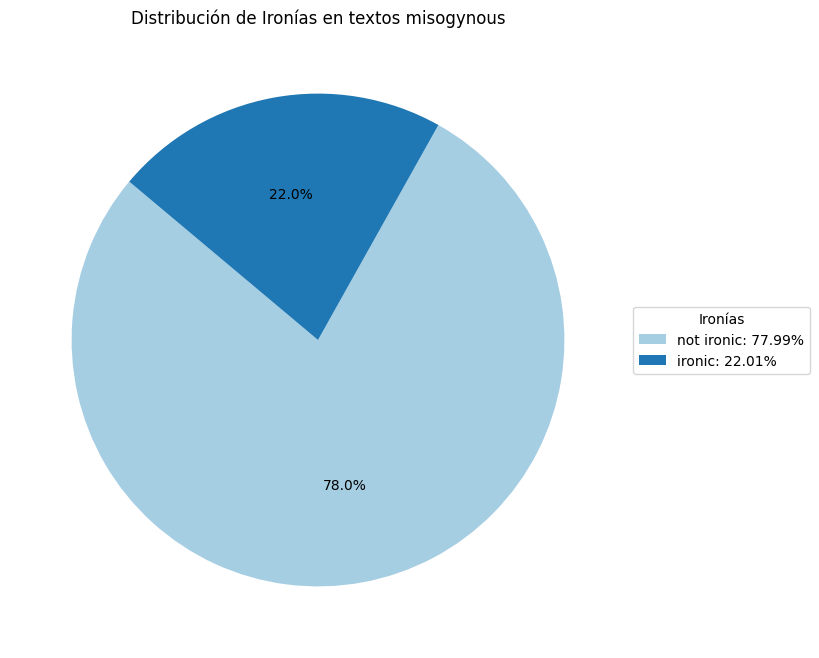

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_irony_percentages_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Ironías en textos misogynous")
legend_labels = [f"{irony}: {percentage:.2f}%" for irony, percentage in overall_irony_percentages_misogynous.items()]
ax.legend(wedges, legend_labels, title="Ironías", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [18]:
print("\nEjemplos de cada tipo de sentimiento en textos misogynous:")
for sent_type, example in examples_per_irony_misogynous.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos misogynous:
not ironic: ['@Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa', '@Otb_35 Que te calles so guarra.', '@AngeAlvarez7 Callate perra, re despierta estoy', '@ian_delaCalva @IrantzuVarela @pikaramagazine Oye por qué no molestas a tu puta madre?', '@EdiiXI @lidiahdlgo Cállate tu !! Perra', '@JeronimoWEB @Zurine3 @Juliotrumpet Es preocupante que todas las fantasías sean hacernos daños y follarte a tu hija, yo me lo miraría', '@BedMM @NayBetania Tú eres la culpable, perra >:v', 'Yo no puedo creer que las propias mujeres naturalicen una violación o acoso y lo justifiquen con que la mujer es la que “provoca”. Que mente de mierda la puta madre', 'LA MUJER ES MUY ZORRA,SABE COMO Y Q HACER,PARA CAGAR A UN TIPO,MAS SI EL TIPO ESTA ENAMORADO,o es un boludo,que le cree todo,le compra todo,le da todos los gustos,y termina cagado,,Yo solo quiero recuperar a mi hijo,,esa mina,se lo llevo,no me deja verlo,


-----------------------------------------------

### Tweets no misogynous

-----------------------------------------------


In [19]:
text_not_misogynous = [text for text in df_ibereval[df_ibereval["misogynous"] == 0]["text"].tolist()]
results_irony_analysis_not_misogynous = [analyze_irony(text) for text in tqdm(text_not_misogynous)]

  0%|          | 0/1658 [00:00<?, ?it/s]


-----------------------
Texto analizado: Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998156726360321, 'ironic': 0.0018432347569614649}

-----------------------
Texto analizado: @Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994854927062988, 'ironic': 0.000514428480528295}


  0%|          | 6/1658 [00:00<00:29, 56.71it/s]


-----------------------
Texto analizado: Quiero pegarte pq estás bien imbécil y después darte un besito. 🙂
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6278937458992004, 'ironic': 0.3721061944961548}

-----------------------
Texto analizado: @PoderFeminazi Eso es! Cojones!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9609168171882629, 'ironic': 0.039083126932382584}

-----------------------
Texto analizado: Miss perra: Valentinaaa amo mucho tu icon y header son re lindos,te mereces todo con tus ídolos y te mereces tanto abrazar a camila & ariana *al igual que todos tus ídolos*tu cuenta en general es perfecta y una de mis favoritas, eres una personita muy especial para mi+
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9924214482307434, 'ironic': 0.007578600663691759}

-----------------------
Texto analizado: @LeticiaDolera Y digo yo... si se pretende dar un mensaje puramente político, por qué no se lo escriben a un tío en la polla 😒😒
Ir

  1%|          | 14/1658 [00:00<00:23, 68.76it/s]


-----------------------
Texto analizado: @dsilvao Más que seguro que muchos nacieron producto de acoso y hasta violación 😒. Personalmente, nunca he tenido problemas para conquistar sin recurrir a la intimidación.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9934700727462769, 'ironic': 0.006529944017529488}

-----------------------
Texto analizado: Ahhh pero vaya y uno callada les acepte las cortesías sin ánimos de darles sexo que cuando se estrellen, de 'perra oportunista' no te bajan.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.665823757648468, 'ironic': 0.334176242351532}

-----------------------
Texto analizado: @KiraraPixel Ah no, ella no es zorra es libre, el que es imbécil es el que tiene pareja y no hace más que ir detrás de otros XD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9967705011367798, 'ironic': 0.0032294669654220343}

-----------------------
Texto analizado: @DalasReview @jk_rowling Hijo de puta muerete asqueroso no

  1%|▏         | 22/1658 [00:00<00:22, 73.06it/s]


-----------------------
Texto analizado: @ngelSnchezC1 @jfitzgerald_86 @JavaliVerruga @LeticiaDolera No son horas de estar tocándonos en coño a 1 de enero, caballeros, dispérsense.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7768159508705139, 'ironic': 0.22318406403064728}

-----------------------
Texto analizado: le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajajajajajjaja enseñandome como en los viejos tiempos perra
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3177303373813629, 'ironic': 0.6822696924209595}

-----------------------
Texto analizado: @Dlagox no sabes cuanto
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8810890316963196, 'ironic': 0.1189110055565834}

-----------------------
Texto analizado: @vignaxnnayar No tenes nada que agradecer, te lo merecesssss blda !!! Te amo mas zorra💙💙
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9784391522407532, 'ironic': 0.0215607937425375}

--------------

  2%|▏         | 31/1658 [00:00<00:20, 78.55it/s]


-----------------------
Texto analizado: @_BarbaraBlade Para mi una mujer es perra sólo si comete infidelidad; si la chica está soltera ¿qué diablos le impide acostarse con todos los manes del planeta? Un man lo hace y nadie dice nada, ¿quién les da el derecho de juzgar por lo mismo a una mujer?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997746348381042, 'ironic': 0.00022532565344590694}

-----------------------
Texto analizado: @vanessagirona @KRLS @mossos Vienes a las mías..., 'políticos' no España, con Franco eso no pasaba teníais lo que queríais, todos por igual, el fanatismo por la independencia llegó después con atontaos a los que votamos, yo soy de c's por innovar no por o
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999394416809082, 'ironic': 0.0006056170677766204}

-----------------------
Texto analizado: @Reforma @aurelionuno No seas hijo de puta Nuño según tu eres representante de la educación puto viejo chismoso chupate mi verga.....
Ir

  2%|▏         | 40/1658 [00:00<00:20, 79.79it/s]


-----------------------
Texto analizado: Pegarte en la cara con un sartén > ver Friends. https://t.co/HGNu2v8g7C
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13804903626441956, 'ironic': 0.8619509935379028}

-----------------------
Texto analizado: @tinaletina Ojalá no fuera así, pero tristemente lo es. Normalmente y gracias a Dios en el 90% de los casos son mujeres normales.+
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996076226234436, 'ironic': 0.0003923797921743244}

-----------------------
Texto analizado: @Guru_socket @joaquinbarucco La mejor forma de dormirte es pegarte un cachetazo, en la cara dormido... (Pensala) 😠 🙆...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005943505559116602, 'ironic': 0.9940564632415771}

-----------------------
Texto analizado: @Barbijaputa De mí se rieron por relacionarlo con el veganismo: 'mirad a esta loca las tonterías que dice, lo que me faltaba por oír.' Mi hermana les miró como si fueran mierda, no 

  3%|▎         | 48/1658 [00:00<00:20, 78.77it/s]


-----------------------
Texto analizado: Jajajajaja le tengo que enseñar eso a mi perra😂 https://t.co/rlTRFU3Dx0
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02595961093902588, 'ironic': 0.9740403890609741}

-----------------------
Texto analizado: Para el tal uranium ese todo el puto sol en la cara voy a autodestruir la polla
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13955435156822205, 'ironic': 0.8604456186294556}

-----------------------
Texto analizado: @OrgMujeresCI Estoy de acuerdo, pero no sé puede minimizar o relativizar la violación o el acoso sexual. Sea de rocas y famosas o no
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997867941856384, 'ironic': 0.0002132774388883263}

-----------------------
Texto analizado: @anaisbernal Pásalo muy bien,te lo mereces 😘😘
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8655029535293579, 'ironic': 0.1344970166683197}

-----------------------
Texto analizado: @HuxGeneraI « hijo de 

  3%|▎         | 56/1658 [00:00<00:21, 73.99it/s]


-----------------------
Texto analizado: @erreleny @Fel_blan Buena descripción, aunque se te ha olvidado decir la puta moralina. Todos tienen que ENSEÑARTE y EDUCARTE con su puta moralina de los cojones. Es una serie muy milenial.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.040353916585445404, 'ironic': 0.9596461057662964}

-----------------------
Texto analizado: Esa gente insultando y condenando al asesino de Diana Quer pero que luego le quitan importancia al acoso, violación y maltrato a la mujer...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997660517692566, 'ironic': 0.00023400058853439987}

-----------------------
Texto analizado: 2018 y 'vas provocando 2018 y 'te violan por guarra que te lo buscas' 2018 y si te resistes te matan, y si no te violan pero eh 'haberte resistido más' 2018 y 'pero había bebido? Dijo que no? Qué llevaba? Es ligona?' 2018 y la sociedad sigue dando asco Lets change that
Ironía detectado: not ironic
Probabilidades: {'not 

  4%|▍         | 64/1658 [00:00<00:21, 73.13it/s]


-----------------------
Texto analizado: @FreddyGuevaraC @NTN24 Callate q estas preso hijo de tu puta mae
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990763664245605, 'ironic': 0.0009235989418812096}

-----------------------
Texto analizado: Tengo frío en mis piernitas.... ahhh pero quería venir en perra enseñando pierna no?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.010411753319203854, 'ironic': 0.9895882606506348}

-----------------------
Texto analizado: Todos estan negados a enseñarme a manejar hijos de puta ya los voy a atropellar tarde o temprano
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987363219261169, 'ironic': 0.001263730344362557}

-----------------------
Texto analizado: Una violación cada 8 horas en españa Más de 1000 asesinatos machistas desde 2003 Todas hemos sufrido acoso callejero alguna vez Pero oye, son casos aislados y somos unas exageradas porque 'vivimos en uno de los mejores países del mundo' https://t.co/mc

  4%|▍         | 73/1658 [00:00<00:20, 76.35it/s]


-----------------------
Texto analizado: Hoy es lunes con l de LA PUTA MADRE KIRKMAN, CARL NO MERECIA MORIR
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9369937777519226, 'ironic': 0.06300624459981918}

-----------------------
Texto analizado: Ole tu, solo le falto decir que con Franco eso no pasaba https://t.co/27hVQOiL1K
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8534220457077026, 'ironic': 0.14657799899578094}

-----------------------
Texto analizado: A Benzema le va a nacer un embrión en la garganta de tanto chuparle la polla a Zidane
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3135368227958679, 'ironic': 0.6864631772041321}

-----------------------
Texto analizado: @effeditallup Star Wars: crea un personaje masculino complejo de puta madre La gente: *estas tonterías*
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2911834120750427, 'ironic': 0.7088165879249573}

-----------------------
Texto analizado: #TITULAESNACIONALE

  5%|▍         | 82/1658 [00:01<00:20, 78.30it/s]


-----------------------
Texto analizado: @MashiRafael Ya cállate rechucha de tu madre y traga de tu misma medicina hijo de la gran puta!!! Tirano cobarde y dictador
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986741542816162, 'ironic': 0.0013258157996460795}

-----------------------
Texto analizado: @JorgeCalabres Cállate hija de perra mongolo de mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995300769805908, 'ironic': 0.0004699203127529472}

-----------------------
Texto analizado: @Mzavalagc Oiga ¿y todas las victimas de acoso y violacion consecuencia de la espiral de violencia desatada por @FelipeCalderon para desviar la atención del fraude de 2006? Esas que no tienen voz por no ser figura pública ¿usted ahora sí las va a represen
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993607401847839, 'ironic': 0.0006393172079697251}

-----------------------
Texto analizado: Hijos de puta! Os merecéis lo peor... Q asco me dais! 😭😠 h

  5%|▌         | 91/1658 [00:01<00:19, 80.66it/s]


-----------------------
Texto analizado: @KobaML Claro, es un hoyo(coño) que se abre con una tuneladora(polla) sin consentimiento de la naturaleza. Una macabra violación de libro.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9846919178962708, 'ironic': 0.015308109112083912}

-----------------------
Texto analizado: Mira estoy hasta los cojones de que por enseñar una teta y no ser tío me llamen guarra,por enseñar el culo me digan que solo lo hago para calentar,tronco tanto os cuesta ver una teta de una tía como algo normal?Es un cuerpo al igual que el del hombre,amo enseñar mi cuerpo!!! https://t.co/3DLCmgKc88
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957199692726135, 'ironic': 0.004280110355466604}

-----------------------
Texto analizado: ¡MALPARIDO, DESGRACIADO HIJO DE PUTA! ¿SERÁ QUE TE PARIÓ UNA BURRA, QUE TU MUJER ES UNA HIENA Y TE HA PARIDO CHACALES EN VEZ DE NIÑAS? ¡CON EL PERDÓN DE ESE ZOOLÓGICO QUE NOMBRE, PORQUE LOS ANIMALES SON ESO, Y T

  6%|▌         | 100/1658 [00:01<00:19, 81.45it/s]


-----------------------
Texto analizado: @Barbijaputa este pequeñajo lleva dos días pegado a mi por culpa de los putos petardos https://t.co/4jBvYLFG3O
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9956108927726746, 'ironic': 0.004389090929180384}

-----------------------
Texto analizado: 'No eres una perra para advertir enseñando los dientes. Ahora, ven conmigo. Siéntate, observemos a los humanos celebrar su nuevo ciclo anual.'
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.031375959515571594, 'ironic': 0.9686240553855896}

-----------------------
Texto analizado: @cristinadevonne Ni tú eres perra ni yo soy un gato, mi corazón de repuesto, se muere por latir siempre a tu lado.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.03346594050526619, 'ironic': 0.9665340781211853}

-----------------------
Texto analizado: @anaisbernal Esta es la justicia en españa para estos indeseables una puta verguenza
Ironía detectado: not ironic
Probabilidades: {'not 

  7%|▋         | 109/1658 [00:01<00:18, 83.51it/s]


-----------------------
Texto analizado: @el_pais Más d 17 denuncias por acoso sexual incluyendo Una violacion a su propia esposa y una relación promiscua con su hija Ivanka.Universidad y fundación Trump en NY cerrados por fraude y lavado d dinero,Siete bancarrotas,este delincuente tiene d todo 
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995898604393005, 'ironic': 0.00041020478238351643}

-----------------------
Texto analizado: Esta página les puede decir si alguien del cast o crew de una movie ha sido acusado de acoso sexual o violación - - - > https://t.co/tokBGkXsye 💜
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9950022101402283, 'ironic': 0.004997824784368277}

-----------------------
Texto analizado: @JordiWild Que te calles ya pesao... ACEPTALO DE UNA PUTA VEZ Y dejalo ya en el pasado pide disculpas y ya conbio
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996585845947266, 'ironic': 0.00034141153446398675}

-----------------

  7%|▋         | 118/1658 [00:01<00:18, 83.99it/s]


-----------------------
Texto analizado: La puta escena en la que la asiática salva a Finn? Pero tu eres subnormal o como va?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.816618800163269, 'ironic': 0.18338124454021454}

-----------------------
Texto analizado: Y por la PEDERASTIA, VIOLACIÓN y ACOSO IMBÉCIL @SandovalIniguez?? Por esos PECADOS DEBERÍA TEMBLAR TU IGLESIA de VERGÜENZA!! @Pontifex_es Póngales un bozal a esos curas hocicones, lengua de diablos, machines, misóginos, homófobos, DENIGRAN su Iglesia y OFENDEN a la Sociedad #Asco https://t.co/96KjZa8rFq
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997996687889099, 'ironic': 0.00020032150496263057}

-----------------------
Texto analizado: Que guarra tienes que ser en el catre — Cuando quiero con quien quiero https://t.co/nBUSE7ejJb
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5270615220069885, 'ironic': 0.4729384779930115}

-----------------------
Texto analizado: @AndyToughCoo

  8%|▊         | 127/1658 [00:01<00:18, 83.95it/s]


-----------------------
Texto analizado: La perra les ladró a un grupo de adolescentes. Yo salí y le dije: 'Manu! callate! Dejá los gurises en paz!' Que vejez.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13907071948051453, 'ironic': 0.8609292507171631}

-----------------------
Texto analizado: Basta de victimizar a Cacho porque es de otra época!!!! Acoso y violación es lo mismo ahora y en 1970.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995577931404114, 'ironic': 0.0004422393685672432}

-----------------------
Texto analizado: @DalasReview #MeToo es por acoso y violacion por abuso de poder. Lo de Depp es acusación de supuesto maltrato en pareja. No son lo mismo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997684359550476, 'ironic': 0.00023160999990068376}

-----------------------
Texto analizado: @ladivaza Vamos DIVAZA TU PUEDES 💝👑 TU ERES LA MAS PERRA ❤🎆👑
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.652091264724731

  8%|▊         | 136/1658 [00:01<00:19, 79.86it/s]


-----------------------
Texto analizado: hijo de puta t dije q te iba a enseñar de sonido
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9938737154006958, 'ironic': 0.006126366555690765}

-----------------------
Texto analizado: 'Y ésta canción se la dedico a mi perra (Laika) . Tú eres mi Laiki Mi Laiki , Laiki , Laiki . Mi Laiki , Laiki , Laiki Perra perra perra Lai Lai ' Ahr lo que es estar al pedo. ' :v https://t.co/fN6Mj5tRQt
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.004203828517347574, 'ironic': 0.9957962036132812}

-----------------------
Texto analizado: me estresa que me hablen mientras escucho música CALLATE LA PUTA MADRE CALLATE NO ME HABLES MAS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9842116236686707, 'ironic': 0.015788346529006958}

-----------------------
Texto analizado: Le estoy enseñando a árabes decir “pinche puta” 😂😂😂😂 ¿En que momento me volví la mexicana que prometí jamás ser? 🤦🏾‍♀️😂
Ironía detectado: ironic
Proba

  9%|▊         | 145/1658 [00:01<00:18, 81.25it/s]


-----------------------
Texto analizado: @afrikaner Y está perfecto, hay muchos feminismos, pero se están peleando con la nada denunciando que violación no es lo mismo que acoso.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998314380645752, 'ironic': 0.0001685032621026039}

-----------------------
Texto analizado: En El Mundo Están Todos Locos Ahora el Tema Es Acoso Sexual Gente Cuenta 20años Para Atrás Sera O No Todos Son Acosados Vamos. https://t.co/CDX2fueSxD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994927644729614, 'ironic': 0.000507187913171947}

-----------------------
Texto analizado: No le encuentro la puta gracia a los memes y videos con la canción de movimiento naranja, todos mecos compartiendo esas tonterías 🙄🤭
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9527146816253662, 'ironic': 0.047285281121730804}

-----------------------
Texto analizado: @wikitetas_culos Movimiento SEMEN apoya esas tetas. Un RT para difundir l

 10%|▉         | 164/1658 [00:02<00:17, 83.38it/s]


-----------------------
Texto analizado: Literal vivimos en un mundo donde si una chica es violada es 'por perra', 'por descuidada', siempre tiene la culpa la chica agredida, nunca el que agrede... sinceramente la gente que piensa así me da un puto asco.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995473027229309, 'ironic': 0.0004526248958427459}

-----------------------
Texto analizado: La insistencia en flirsteo sin correspondencia es: Acoso - La violación es un delito- No admito otra interpretación que justifique estas situaciones- Ver video https://t.co/TVx2jFE2aM
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997802376747131, 'ironic': 0.00021982024190947413}

-----------------------
Texto analizado: @Mata974 @lorefeliz @iuandalucia @ciktricstrans @Barbijaputa @iunida @PSOE @ahorapodemos Zorra y puta no son machistas? Vaya hombre, el premio a la feminista del año ya tiene dueño
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0129293482

 11%|█         | 183/1658 [00:02<00:17, 85.32it/s]


-----------------------
Texto analizado: Se ha muerto mi perra y no estoy para aguantar tonterías.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992054104804993, 'ironic': 0.0007945974939502776}

-----------------------
Texto analizado: mi papá es un hijo de puta, mi mamá no se merecía una mierda así tantos años y el día que se separen me chupa un huevo lo 'económico' porque de ahí se agarra él, lo voy a escrachar porque las víctimas no tienen que sentir vergüenza, el victimario debería
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997531771659851, 'ironic': 0.00024680799106135964}

-----------------------
Texto analizado: @AlbertoRT51 Tengan por seguro que éste imbécil está dando cumplimiento a las órdenes de la escoria mayor del Caribe, el grandísimo Hijo de la gran P... Raúl Castro.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992727637290955, 'ironic': 0.0007272772490978241}

-----------------------
Texto analizado: - El tiempo n

 12%|█▏        | 192/1658 [00:02<00:17, 85.09it/s]


-----------------------
Texto analizado: @TitoHunterLoL A ver también te digo que no es por hacer acoso, que es por violacion y asesinato xddd
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9897441267967224, 'ironic': 0.010255839675664902}

-----------------------
Texto analizado: Mmm.. espera, ¿cómo dices? https://t.co/EqktqoDn6t
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3186894953250885, 'ironic': 0.6813105344772339}

-----------------------
Texto analizado: Espero que tengan un buen año y reciban lo que merezcan menos yo porque yo me jodería por puta JAJAJAJAJJAJAAJAJAJAJJAJAJAJA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9219737648963928, 'ironic': 0.07802622765302658}

-----------------------
Texto analizado: @miquelreyes23 miquel reyes ni puta idea de quien eres pero me estoy descoñando te mereces mi follow
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8358814716339111, 'ironic': 0.16411852836608887}

------------

 12%|█▏        | 202/1658 [00:02<00:16, 86.76it/s]


-----------------------
Texto analizado: @Zurine3 Joder, menuda escoria de persona, ¿no? ¿Cómo narices se puede ir así por la vida? Vomito...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993359446525574, 'ironic': 0.000664019666146487}

-----------------------
Texto analizado: mi primo me está enseñando los videos donde sale todo pedo restregándole el culo a otro vato memeo que perra me salió, lo amo a la verga
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8977194428443909, 'ironic': 0.10228053480386734}

-----------------------
Texto analizado: ¡¡SEMEN!! Movimiento machista internacional. Únete.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987865090370178, 'ironic': 0.0012134474236518145}

-----------------------
Texto analizado: @anaisbernal Claaaarooo como no le gritó estaba actuando de manera respetuosa... porque si yo te digo zorra mentirosa pero te lo digo suavecito no paaaasaaaa naaaadaaaa... que falta de empatía tan deleznabl

 13%|█▎        | 211/1658 [00:02<00:16, 85.88it/s]


-----------------------
Texto analizado: Sois unos farsantes hijos de puta que merecéis mi más profundo desprecio. Durante un año he sido vuestro bufón. ¡Me avergüenza no haber tenido el coraje de hacer esto mucho antes coño!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996110796928406, 'ironic': 0.000388953136280179}

-----------------------
Texto analizado: @drmtorres @Barbijaputa @CloeStein @SusanaST96 @raquelejerique Ni puta idea de la que hablas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9851371049880981, 'ironic': 0.014862910844385624}

-----------------------
Texto analizado: Orita mi perra me despertó para enseñarme su nuevo peluche fav💓
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06921592354774475, 'ironic': 0.9307841062545776}

-----------------------
Texto analizado: Comemela mientras te meto los dedos https://t.co/R1gEttjD4S
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.12828953564167023, 'ironic': 0.871710419

 13%|█▎        | 220/1658 [00:02<00:17, 82.75it/s]


-----------------------
Texto analizado: LA PUTA MADRE LO Q HABÍA LLORADO XQ ENCIMA LO RE AMABA A RAMA SE MERECÍA EL MUNDO https://t.co/zXG0vg0VgD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9517526626586914, 'ironic': 0.04824729263782501}

-----------------------
Texto analizado: @reuvenmx Ya càllate hijo de tu puta perra madre a nadie le importa culero!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995212554931641, 'ironic': 0.0004787650832440704}

-----------------------
Texto analizado: ¿Habéis votadoya a algún hombre del PP? ¡Aunque sea Esperanza el partido vela por nuestro machismo! ¡DALES TU VOTO! #CONFIA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989919066429138, 'ironic': 0.001008087070658803}

-----------------------
Texto analizado: En la perrera de mi corazón, tú eres la perra que más ladra. #BatiArjona
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.036154214292764664, 'ironic': 0.9638457894325256}

--------

 14%|█▍        | 229/1658 [00:02<00:17, 83.67it/s]


-----------------------
Texto analizado: Os voy a enseñar una foto muy guarra mia
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.43849897384643555, 'ironic': 0.5615010857582092}

-----------------------
Texto analizado: @AjitPaiFCC mereces morirte pedazo de mierda hijo de puta ojalá te entren un millón de tumores en el p uto cerebro hijo de la gran zorra.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999081015586853, 'ironic': 0.0009190172422677279}

-----------------------
Texto analizado: @LaDivinaDiva Callate maldita perra. O seguro eres un pobre marico detras de un user femenino. Chavista colaborador
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992485642433167, 'ironic': 0.0007513571763411164}

-----------------------
Texto analizado: Ya era hora coño una puta actuación como se merecía bravo Cepeda. #OTGala9
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9909909963607788, 'ironic': 0.009008982218801975}

-----------------

 14%|█▍        | 238/1658 [00:02<00:17, 79.86it/s]


-----------------------
Texto analizado: @TowandaRebels Justamente los violadores son la escoria de los hombres, la forma más baja de vida animal
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997170567512512, 'ironic': 0.0002828788128681481}

-----------------------
Texto analizado: @Relatofeminista Hay que ser un verdadero imbécil para hacer 'bromas' con un asunto tan serio como el acoso callejero, y encima se creerá gracioso y todo pfff
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989204406738281, 'ironic': 0.0010795616544783115}

-----------------------
Texto analizado: Ahhh claro, captas eso pero no todos los malditos palos que te tiro y andas con el que 'te boludean', te pego o lo hace alguien más?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9952131509780884, 'ironic': 0.0047868164256215096}


 15%|█▍        | 247/1658 [00:03<00:17, 81.43it/s]


-----------------------
Texto analizado: Matt Damon critica campaña contra el acoso y la violación sexual - La Prensa de Honduras https://t.co/GYtXQtZoj0
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995761513710022, 'ironic': 0.0004238588735461235}

-----------------------
Texto analizado: Lo malo del tema de acosos sexual que se da en TODOS lados… es simple… abuso físico, violación o coacción son un delito… PERO!!! El coqueteo insistente o torpe no lo es, ni es la caballerosidad una agresión machista… Pero la exageración sensacionalista es lo de hoy ¿no?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997028708457947, 'ironic': 0.00029711000388488173}

-----------------------
Texto analizado: Comemela XDDD y la cara también!! 🤣🤣🤣🤣🤣 — No nos pasemos 👀 https://t.co/t3o5yHY0zb
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.14509142935276031, 'ironic': 0.8549085259437561}

-----------------------
Texto analizado: -¿Porque la esatua de la libert

 15%|█▌        | 256/1658 [00:03<00:16, 83.16it/s]


-----------------------
Texto analizado: @MandiocaTeFoka si.. comemela a mi
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.49422547221183777, 'ironic': 0.5057745575904846}

-----------------------
Texto analizado: El arbol este es un pesao, por que tiene bigote? — Cállate la puta boca y disfruta del best gaem https://t.co/sOysnbMbGJ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978641867637634, 'ironic': 0.002135809510946274}

-----------------------
Texto analizado: @garciabanchs Tu eres un grandisimo hijo de puta!!! Porque no intervienes al coñosimo de la madre q te parió? A estas alturas los animales piensan q una guerra es la opción!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994532465934753, 'ironic': 0.0005467765731737018}


 16%|█▌        | 265/1658 [00:03<00:16, 84.01it/s]


-----------------------
Texto analizado: Vergüenza da cerrar el 2017 con el asesinato de Diana Quer, la violación de los San Fermines y el acoso que aun hay, ya es hora de pararlo, mujeres y hombres por el feminismo, por la IGUALDAD, porque locos hay pocos, pero han causado demasiada desgracia ya #noalaviolenciamachista
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998002648353577, 'ironic': 0.00019971159053966403}

-----------------------
Texto analizado: @joohexnlee // QUE NO TE PEGO UNA PEGATINA EN LA CARA NO MÁS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7085297703742981, 'ironic': 0.2914701998233795}

-----------------------
Texto analizado: Movimiento SEMEN! https://t.co/O9SInApXXR
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.2165592759847641, 'ironic': 0.7834407687187195}

-----------------------
Texto analizado: Jejeje 'Puta Madre .... No me lo saques' jejeje tú eres lo máximo Kendall https://t.co/8cDbJPVYJq
Ironía detectado: ir

 17%|█▋        | 274/1658 [00:03<00:16, 84.50it/s]


-----------------------
Texto analizado: @MaestroChuli A mi ponme la polla en la cara y ya veremos quien no ve nada.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9112623333930969, 'ironic': 0.08873771131038666}

-----------------------
Texto analizado: Nombre a buena perra hora se le ocurre a mi hermano mayor enseñarle a manejar a mi otro hermano:( adiós mundo cruel
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.015293365344405174, 'ironic': 0.9847065806388855}

-----------------------
Texto analizado: @salvameoficial Esto es lo que os merecéis en la puta boca los de salvame? https://t.co/DbYLJIkwhz
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9947888851165771, 'ironic': 0.005211105570197105}

-----------------------
Texto analizado: @IaraPicatto1 Callate que yo tmb te extraño perra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9863313436508179, 'ironic': 0.013668620027601719}


 17%|█▋        | 284/1658 [00:03<00:15, 86.36it/s]


-----------------------
Texto analizado: #HaceMuchoQue no te callas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9844900369644165, 'ironic': 0.015509974211454391}

-----------------------
Texto analizado: @anaisbernal Feliz año nuevo Ana te mereces lo mejor.😘
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9630029797554016, 'ironic': 0.03699708729982376}

-----------------------
Texto analizado: @RinconFortnite Me parece que si la foto gente ya es guarra usando los arbustos del mapa y no los de objetos ya con esto es el siguiente level para guarrear porque eres invisible y no se te oye
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.014938262291252613, 'ironic': 0.9850617051124573}

-----------------------
Texto analizado: @telecincoes @gusgonzalves Te mereces quedarte sin nada¡Tu crees que si a la mujer que yo quiero le llamaran puta yo no me iba a levantar....Y ADEMAS QUE MAS DA ,SU TRABAJO ,VAMOS A VER,ERES UN COBARDE Y UNA MIERDA DE TIO,Que

 18%|█▊        | 293/1658 [00:03<00:15, 85.73it/s]


-----------------------
Texto analizado: @LeticiaDolera El arte de la vida es aprender y enseñar y seguir aprendiendo,para seguir enseñando......
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04353589937090874, 'ironic': 0.9564641118049622}

-----------------------
Texto analizado: @Barbijaputa @alberbustos Esto es una puta mierda q da un asco insuperable. No me lo puedo creer, pero q clase de jueces y fiscales tenemos porque esto no va de partidos políticos, va de mentalidades y es insoportable
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998012185096741, 'ironic': 0.00019880724721588194}

-----------------------
Texto analizado: 'Puede tomar la forma del acoso, el tocamiento, el incesto, la violación o la explotación en prostitución o pornografía. Sucede en el hogar, las escuelas, las instituciones de atención, lugares de trabajo y dentro de comunidades en su conjunto.”(UNICEF) https://t.co/aG3MifLf7o v
Ironía detectado: not ironic
Probabilidades: {'not

 18%|█▊        | 302/1658 [00:03<00:16, 81.74it/s]


-----------------------
Texto analizado: Que te vv mi puta vida, cállate, alejate ptm
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981472492218018, 'ironic': 0.0018527666106820107}

-----------------------
Texto analizado: @jxshstalker Mi polla en tu culo es lo que hay Pero no porque no soy activa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9295954704284668, 'ironic': 0.07040458172559738}

-----------------------
Texto analizado: Pueden dejar de decir que una mujer es una puta por disfrutar de su sexualidad o subir fotos en bikini/ropa interior. Me dan ganas de revolearles una motosierra por la cabeza
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983660578727722, 'ironic': 0.0016339593566954136}

-----------------------
Texto analizado: @maxgamer3415 Que te calles mascota de mierda maldito fan boy de persona 5 que me cago en tu puta vida negro vete a tu país
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993548989295

 19%|█▉        | 311/1658 [00:03<00:16, 81.04it/s]


-----------------------
Texto analizado: @fullereno374 @Bcnisnotcat_ Tu eres gallego no? Pues tu a lo tuyo... verdad que yo no me meto en tu puta comunidad? Pues tu no te metad en la mía
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9971509575843811, 'ironic': 0.0028491050470620394}

-----------------------
Texto analizado: Mira, cállate un poco porque estás haciendo la pena, pedazo de hijo de la gran puta. Que los putos humoristas de los cojones siempre aprovecháis todas las desgracias para daros a conocer con vuestros lamentables y patéticos chistes. Madura un poco. https://t.co/qEIwP72KEM
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995386600494385, 'ironic': 0.00046132784336805344}

-----------------------
Texto analizado: ********Nuevo Video¡¡¡¡******* Muchos dicen que si sufres de acoso lo digas o hables, sin embargo no todos los acosadores tienen la misma reacción ante las consecuencias, unos simplemente nunca van a aprender y nunca van a enten

 19%|█▉        | 320/1658 [00:03<00:16, 79.44it/s]


-----------------------
Texto analizado: ¿Cuántas vidas son arruinadas por falsas acusaciones de violación y acoso? El caso del estudiante de psicología Liam Allan es sólo uno de muchos errores judiciales. https://t.co/Nl64oUt1VO
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999790370464325, 'ironic': 0.00020964929717592895}

-----------------------
Texto analizado: A mi amigo le dijo PUTA pero él no deja de enseñar el pito en Twitter! 🙄
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9880856275558472, 'ironic': 0.011914297007024288}

-----------------------
Texto analizado: @WilfredoNc @diegobuenavent1 @dcabellor @alejabolivarian @chavezcandanga Que hijo de perra eres cállate idiota
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977973699569702, 'ironic': 0.002202662406489253}

-----------------------
Texto analizado: No entiendo por que nunca me puedo quedar callada cuando me dicen algo la puta madre siempre tengo que insultar😡
Ironía de

 20%|██        | 337/1658 [00:04<00:16, 79.48it/s]


-----------------------
Texto analizado: @Flowypanda Pero Flow, las mujeres son seres de luz! Gracias, lo peor de todo es que la gente le da rt a su puta mierda de tweet manipulador...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7856009006500244, 'ironic': 0.21439911425113678}

-----------------------
Texto analizado: @perezcamilo0 @PauYornetOk ya callate te voy a bloquear hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989281296730042, 'ironic': 0.0010718394769355655}

-----------------------
Texto analizado: Claro pero luego el rap, los chavales q improvisan y rapean 'lo único q saben decir es tu novia es una zorra, tu madre es una puta', seguro q sí... no tenéis ni idea. @SmoothArkano eres ENORME. https://t.co/fSKLbVFxKS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5932307243347168, 'ironic': 0.4067692756652832}

-----------------------
Texto analizado: @abiaquino015 Callate jajaja si noooo dos pajaros de un tiro jaja s

 21%|██▏       | 354/1658 [00:04<00:15, 81.94it/s]


-----------------------
Texto analizado: Comemela — AQUI AQUI AQUI NI HAY QUIEN VIVA AQUI NO AQUI NO https://t.co/4b1kyvugxI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.614699125289917, 'ironic': 0.385300874710083}

-----------------------
Texto analizado: @Subaru_Saka5 @kingsonbra317 no es una zorra tu eres un maldito mocoso y un puto
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991351962089539, 'ironic': 0.0008647737558931112}

-----------------------
Texto analizado: Me costó un año, pero por fin pude enseñarle cómo dar la patita a tu perra... costumbre de ignorarme. 😭
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.29058605432510376, 'ironic': 0.7094139456748962}

-----------------------
Texto analizado: Con consentimiento expresa este Sr. , es menor de edad, directo a la carcel, esto es acoso violación y penado... https://t.co/eSSA21zY1P
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999734103679657, 'ironic': 0.0002658

 22%|██▏       | 372/1658 [00:04<00:15, 81.78it/s]


-----------------------
Texto analizado: @Martukkki @mividaconmi @yodominguez Es que la puta libre lucha denuncia la explotación sexual. No tiene nada que ver! Por la explotación laboral en la industria textil vamos a abolir la industria textil? No. Vamos a perseguir la explotación
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9872226119041443, 'ironic': 0.012777448631823063}

-----------------------
Texto analizado: Sólo dentro de los límites del humor, quizá es esta la solución compensatoria para ellas en el tema de la carne roja https://t.co/xKuiLibt9J
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9970265030860901, 'ironic': 0.002973484108224511}

-----------------------
Texto analizado: @JoaquinPrietito vení pero a vos no te pego en la cara pq sos muy lindo jajaja<3
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5422176718711853, 'ironic': 0.4577823281288147}

-----------------------
Texto analizado: El acoso cibernético y la violació

 23%|██▎       | 381/1658 [00:04<00:16, 77.37it/s]


-----------------------
Texto analizado: @HangryLesbian Pero en temas de Filosofía no tenenos ni puta idea Alicia está ahí para enseñarnos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5796845555305481, 'ironic': 0.4203155040740967}

-----------------------
Texto analizado: Hoy @ArandinaCF clama contra el #abusosexual tras el caso de los ex jugadores del club. #sucesos #Arandina https://t.co/yyg9ASxWlQ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996507167816162, 'ironic': 0.00034931953996419907}

-----------------------
Texto analizado: #Aranda se manifiesta contra los #abusos #sexuales en los prolegómenos del #partido entre el #Arandina y el #Numancia B https://t.co/lExhKT7dTg
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995999932289124, 'ironic': 0.0004000438202638179}

-----------------------
Texto analizado: encabezado: Sergio Sarmiento on Twitter: 'Faltas como la violación y el acoso d… https://t.co/DNSYsT53fj, see more https:/

 23%|██▎       | 389/1658 [00:04<00:16, 77.50it/s]


-----------------------
Texto analizado: Así son:VULGARES.No tienen más argumentos Aprendieron el legado aquel:'Te pego en la cara marica' del innombrable. @efrapotter @Infracer @gurozu @ELCOCODIAZ https://t.co/R1PUZDKif8
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9887099862098694, 'ironic': 0.011289969086647034}

-----------------------
Texto analizado: Fos Yo te pego en la cara si me echas humo en la cara alv https://t.co/uRdzzasX4E
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.610798716545105, 'ironic': 0.3892013430595398}

-----------------------
Texto analizado: Tras las acusaciones de violación y acoso sexual, #HarveyWeinstein es golpeado en #Arizona https://t.co/rRheX3cCMp
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988163709640503, 'ironic': 0.0011836980702355504}

-----------------------
Texto analizado: Mi novia es hermosa hijos de perra https://t.co/zyf0z9IHAi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0

 24%|██▍       | 398/1658 [00:04<00:16, 78.72it/s]


-----------------------
Texto analizado: @PatricioMery @JorgeGlas Callate Ivan el Tonto, No hay pruebas !!! Donde estabas hijo de perra cuando gente como bucaram, Lasso , baqueros, y oportunistas se comieron al Ecuador y se repartian en pedazos, cuando no habia ni carreteras ni hospitales, ni me
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986675977706909, 'ironic': 0.0013324432075023651}

-----------------------
Texto analizado: Mi perra rompió las pelotas toda la madrugada y ahora que me levanté está callada que perra hija de puta a quien habrá salido
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9760797619819641, 'ironic': 0.023920293897390366}

-----------------------
Texto analizado: @iescolar @HiginiaRoig Tu eres tonto y no tienes ni puta idea. Todo el mundo sabia donde tenía que votar. El.que no fue es porque no quiso. O sea 2300000 personas y los 700000 que nos robaron los fascistas, pero como tenían miedo a la.democracia, prefirie
Ironía dete

 24%|██▍       | 406/1658 [00:05<00:15, 78.42it/s]


-----------------------
Texto analizado: @NPamaguirre @todonoticias eso sería violación de la privacidad y alentaria a algunos a cometer acoso y crimenes. obviamente el hecho de que una persona se haya cagado en los derechos de una persona, no significa que tengamos que rebajarnos a su nivel par
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999849796295166, 'ironic': 0.00015012470248620957}

-----------------------
Texto analizado: @pixurraa de puta madre chaval notable se lo boy a enseñar a mi madre
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06725571304559708, 'ironic': 0.9327443242073059}

-----------------------
Texto analizado: creo que mi perra más chica es lesbiana, se la quiere dar a cada rato a la más grande
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8461583852767944, 'ironic': 0.1538415402173996}

-----------------------
Texto analizado: #SePudreTodoSi no te unes al Movimiento SEMEN.
Ironía detectado: not ironic
Probabilidades

 25%|██▌       | 415/1658 [00:05<00:15, 80.71it/s]


-----------------------
Texto analizado: Detienen a tres #jugadores de la #Arandina por presuntos #abusossexuales a una #menor https://t.co/vgkgFox4a5 #movimientojupsin #gentejupsin NO al #acoso
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.995606005191803, 'ironic': 0.004393921233713627}

-----------------------
Texto analizado: A estás niñas no le enseñaron que uno puede ser “dama” y “perra” a la vez ...
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04420141875743866, 'ironic': 0.9557985663414001}

-----------------------
Texto analizado: @joancach @DaleFiera @mauroboselli Toñito otra vez tu??? Ya cállate y disfuta el triunfo de nuestro equipo ta perra puta madre!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9832309484481812, 'ironic': 0.01676906645298004}

-----------------------
Texto analizado: Basura escoria energúmeno mierda podrido estúpido capullo imbécil soplapollas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9

 26%|██▌       | 424/1658 [00:05<00:14, 82.74it/s]


-----------------------
Texto analizado: @zabdiarrechame CALLATE ANA TOY MAL CONTIGO PERRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9979760050773621, 'ironic': 0.0020239893347024918}

-----------------------
Texto analizado: Feliz cumple a vos amiga, espero que la pases hermoso por que te lo mereces, 18 no son nada perra😝 te amo tonta @keymailen1 https://t.co/0lvMiYB9rc
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9373902678489685, 'ironic': 0.0626097172498703}

-----------------------
Texto analizado: @Zurine3 Qué COÑO es eso? ... ... ... No! la camisa de fuerza no!!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.39542657136917114, 'ironic': 0.6045734286308289}

-----------------------
Texto analizado: Creo que a partir de ahora empezare a subir videos a yt cagandome en la puta madre de todo el que se lo merezca, me voy a forrar con todo el subnormal que hay suelto. Empezare mañana.
Ironía detectado: not ironic
Probabilidades: {'not i

 26%|██▌       | 433/1658 [00:05<00:14, 83.09it/s]


-----------------------
Texto analizado: @yanina_rubia @LeticiaDolera Esta mierda de tío a la puta calle!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996715784072876, 'ironic': 0.00032846839167177677}

-----------------------
Texto analizado: #HaceMuchoQue no tienes derechos #Honey...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.974043071269989, 'ironic': 0.025956960394978523}

-----------------------
Texto analizado: Esta noche se sale de fiesta. Si alguno pretende ligar con alguna mujer ya sabéis el dicho: Sábado sabadete, un polvete y al garete.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.01071193441748619, 'ironic': 0.9892880916595459}

-----------------------
Texto analizado: @Felipez360 Pero tambien fue muy injusta y guarra esa desclasificacion, se preferia algo menos abusado
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992296695709229, 'ironic': 0.0007703548762947321}

-----------------------
Texto analizado: ¿

 27%|██▋       | 442/1658 [00:05<00:14, 83.70it/s]


-----------------------
Texto analizado: me he despertado con muchísimas ganas de: pedirme un happy meal y de pegarle a alguien en la cara o en la polla
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.038719989359378815, 'ironic': 0.9612799882888794}

-----------------------
Texto analizado: @LeticiaDolera @jaimeaja De puta pena al parecer
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9387553334236145, 'ironic': 0.06124464049935341}

-----------------------
Texto analizado: @Jhonqv13 Jajajajaja, tu eres loco? Luis nunca en la puta vida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7321963310241699, 'ironic': 0.2678036689758301}


 27%|██▋       | 451/1658 [00:05<00:14, 83.08it/s]


-----------------------
Texto analizado: @ppkamigo Cállate judío yankee hijo de perra, FUERA DE NUESTRO PAÍS.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994990825653076, 'ironic': 0.0005008549778722227}

-----------------------
Texto analizado: @IgnacioSena1 Callate hijo de perra , como estas amor?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.979154109954834, 'ironic': 0.020845932886004448}

-----------------------
Texto analizado: Yo se que puedo ser una perra pero solo cuando me hacen algo, hay cosas que de verdad no me merecía.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991058707237244, 'ironic': 0.0008940817206166685}

-----------------------
Texto analizado: @PrincipeVaron @_Brix__ @Re152005 @Barbijaputa @Yiyefly Coño eso parece un lobo xdios..donde esta el lazo del pelo ehhhh 😈😈😈😈😈
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.015737442299723625, 'ironic': 0.9842625856399536}

-----------------------
Texto anal

 28%|██▊       | 469/1658 [00:05<00:14, 80.47it/s]


-----------------------
Texto analizado: https://t.co/ItYktmuAh8 Pero eh, que las mujeres son unas santas y los hombres unos hijos de puta, machistas, opresores.. puto asco de sociedad, las leyes no son iguales para ambos generos.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989846348762512, 'ironic': 0.0010153488256037235}

-----------------------
Texto analizado: @Calvincandie69 Tanta berga q traen en el carrete y se espantan x el semen en la cara de la niña.. hijos de perra..
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9943410158157349, 'ironic': 0.005659022834151983}

-----------------------
Texto analizado: Siempre su hija preferida tiene que tener todo,pero por que no entras en tu culo hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9345390796661377, 'ironic': 0.06546087563037872}

-----------------------
Texto analizado: Mi amor, ¿crees en el amor a primera vista? - ¡Claro! Si te hubiera mirado dos veces no me habrí

 29%|██▉       | 487/1658 [00:06<00:15, 77.56it/s]


-----------------------
Texto analizado: @anaisbernal ¿¡Un debate!? No es sólo dar voz. Se ha de enseñar qué es un maltrato y por qué no se ha de cuestionar lo que es un maltrato. Las señales en la piel se ven, las que dejan en la mente no.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997970461845398, 'ironic': 0.00020292754925321788}

-----------------------
Texto analizado: Fav si te vienes a dormir conmigo y te pego una patada en la cara al despertarnos por la mañana.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0924738198518753, 'ironic': 0.9075261354446411}

-----------------------
Texto analizado: @gliclazida @dotfanny @el_pais Pero el escenario que describe no es de acoso. Es de violación y asesinos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997493624687195, 'ironic': 0.0002506647724658251}

-----------------------
Texto analizado: @EternoBlanco_ Cállate perra por un partido no hay vergüenza para alguien que lleva 5 titulos
Iro

 30%|███       | 503/1658 [00:06<00:15, 76.04it/s]


-----------------------
Texto analizado: La gente que opina sobre el aborto y que jamás ha sido madre, que no ha pasado por alguna violacion o acoso o... https://t.co/TWuzLRne8m
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997370839118958, 'ironic': 0.00026294984854757786}

-----------------------
Texto analizado: Vaaaaamos la puta madre,vamos Argentina!!! No van a poder! Nos enseñaron el camino ,a cuidar lo nuestro! Lo demás no importa! Buen viernes carajo,,,ánimo!!!!!! https://t.co/6iLegPbKYx
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9565653800964355, 'ironic': 0.043434612452983856}

-----------------------
Texto analizado: @IrantzuVarela A mi lo que digas tú me importa una puta mierda la verdad.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9951707720756531, 'ironic': 0.004829254001379013}

-----------------------
Texto analizado: @FlanaganMcPhee @Zurine3 Necesito pintarme el coño y salir con el al aire
Ironía detectado: ironic


 31%|███       | 511/1658 [00:06<00:15, 74.72it/s]


-----------------------
Texto analizado: @24_robledo @riverocalu Contame cuantos casos de abuso, acoso y violación son contados en el momento o en el mimo año que sucede el hecho, porque las estadísticas muestran que la víctima puede tardar meses, años y hasta callarse de por vida por sentir mie
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996658563613892, 'ironic': 0.00033416770747862756}

-----------------------
Texto analizado: @suso_linares @Mishaki @Visentico @MrDonZea @earthblues No la he visto todavía. #todasputas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9590739011764526, 'ironic': 0.040926143527030945}

-----------------------
Texto analizado: No te pego un sillazo en la cara por respeto a la silla... https://t.co/EVIWYHR67A
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9957842230796814, 'ironic': 0.004215694032609463}

-----------------------
Texto analizado: @TowandaRebels esto pasa cuando no tienes ni puta idea de lo qu

 31%|███▏      | 520/1658 [00:06<00:14, 76.24it/s]


-----------------------
Texto analizado: Tengo una memoria de puta madre para tonterías tipo acordarme de los libros mangas etc de cualquier mierda que pase. Pero después siempre me olvidó de las cosas que no son esas en 5 minutos
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0038787610828876495, 'ironic': 0.9961212277412415}

-----------------------
Texto analizado: Que sea un 2018 en el que de una puta vez traigamos la copa, por Argentina, por vos Lionel que te lo mereces más que nadie
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9834437370300293, 'ironic': 0.01655619777739048}

-----------------------
Texto analizado: Esto es algo de lo que quiero hablar porque sinceramente me da mucha rabia que penséis que una mujer es una guarra por ir vestida de “x” manera o por hablar de tal otra
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995806813240051, 'ironic': 0.0004193152126390487}

-----------------------
Texto analizado: @milualarcon_ Cál

 32%|███▏      | 528/1658 [00:06<00:14, 76.44it/s]


-----------------------
Texto analizado: ▶️ VIDEO: Golpean en la cara a #HarveyWeinstein, acusado de acoso sexual, tras salir de restaurante https://t.co/k3u9b2spKR https://t.co/10icQr0dqc
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987988471984863, 'ironic': 0.0012011360377073288}

-----------------------
Texto analizado: Agos te voy a extrañar bocha perra pero te mereces el mejor viaje de todos t amo mil, te voy a extrañar mucho mucho enserio https://t.co/PhRKFBNuYb
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9943549633026123, 'ironic': 0.0056450823321938515}

-----------------------
Texto analizado: ¡¡¡Ahora si!!! ¡¡Hoy empieza la lucha!! Esto es cosa de hombres!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8614674210548401, 'ironic': 0.13853256404399872}

-----------------------
Texto analizado: Alice Glass acusa a su ex compañero en Crystal Castles de violación y acoso https://t.co/2plla8m1zB vía @PlayGrounder https://t.co/je

 32%|███▏      | 536/1658 [00:06<00:15, 72.98it/s]


-----------------------
Texto analizado: @Tuizz_ Vamos a ver, 1 spy support pero no me meto tanto como un objetive y....HIJO DE PUTA QUE TU ERES LARGA LIMPIA PARA ENTRAR MAMONAZO 😂😂😂
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9191182851791382, 'ironic': 0.08088172972202301}

-----------------------
Texto analizado: @Kristian__Perry Jajajajajaj 😂 tu eres el que maneja, yo la copiloto y Ale la perra 🌚
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006430487614125013, 'ironic': 0.9935694932937622}

-----------------------
Texto analizado: @Silvanapeix @theladyshae @Barbijaputa Claro, y loca del coño también se refiere a un estado mental. Consejos vendo, que para mi no tengo.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.005954043008387089, 'ironic': 0.9940459728240967}

-----------------------
Texto analizado: @martasuarezesm Ni tú eres perra ni yo soy un gato!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.32322508096694946, 'ironic':

 33%|███▎      | 544/1658 [00:06<00:15, 73.72it/s]


-----------------------
Texto analizado: Venga si comemela xddd
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7826164364814758, 'ironic': 0.21738357841968536}

-----------------------
Texto analizado: el novio de mi hermanastra dijo que mi perra es muy tarada y después me dijo autista a mi y a mi señoro callate tincho que te voy a empalar 1er aviso
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9946064352989197, 'ironic': 0.005393597297370434}

-----------------------
Texto analizado: Mi amigo que veía las Muñecas de la Mafia la terminó y me dijo: 'We ahora entiendo, tú eres Lucrecia, la perra mayor que experiencia tiene, todos los que quisieron ser cómo tú fracasaron' Se los juró que me hizo la noche.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.014052464626729488, 'ironic': 0.9859474897384644}

-----------------------
Texto analizado: @hugo_gonzalez1 @orgullorayado @Rayados @PUMAmexico @pumafootball CÀLLATE EL PUTO HOCICO HIJO DE TU PERRA 

 33%|███▎      | 553/1658 [00:06<00:14, 76.28it/s]


-----------------------
Texto analizado: @cxwww @anaisbernal Sigo pensando lo mismo. Enseñar a las mujeres a pelear no acabará con el machismo y la violencia. Hay que acabar con el machismo desde la política y la educación y, empoderar a las mujeres para que estén en política
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998078942298889, 'ironic': 0.00019213149789720774}

-----------------------
Texto analizado: Para todos ustedes, los que votaron a este hijo de puta, por odio. Espero que reciban lo que merezcan. Porque ustedes son tan soretes como él
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996060729026794, 'ironic': 0.00039396408828906715}

-----------------------
Texto analizado: @DanieLaCevaLloG @juaneloayza49 Y ahora ??? Persecución, violacion de derechos humanos, hostigamiento, acoso sexual, envidia .... que mismo será ! Semejante tranquila y buena gente está chica del nuevo partido 35RC ( Ratas 🐀 corruptas), si son gente de h
Ironía detect

 34%|███▍      | 561/1658 [00:07<00:14, 75.41it/s]


-----------------------
Texto analizado: Justificó la violencia a los diputados diciendo que ellos fueron a provocar, podes ser tan hijo de puta marcos peña?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991884827613831, 'ironic': 0.0008115272503346205}

-----------------------
Texto analizado: @MichelGonzalez jodete!!!!estás donde mereces, EN LA PUTA CALLE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996918439865112, 'ironic': 0.00030823639826849103}

-----------------------
Texto analizado: Mientras no te afecte, cállate la puta boca, que os la sude lo que haga la gente, pesaos, cansinos, callad ya uf
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999588668346405, 'ironic': 0.0004112877941224724}

-----------------------
Texto analizado: @PabloFonta86 @TowandaRebels pero tu eres un auténtico imbécil y un potencial machista? ideología de izquierdas? Tú eres una vergüenza.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9

 34%|███▍      | 570/1658 [00:07<00:13, 77.92it/s]


-----------------------
Texto analizado: Es una pena que por unos ideales de mierda se vaya a extinguir toda la raza humana
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994902610778809, 'ironic': 0.0005097715766169131}

-----------------------
Texto analizado: Miguel por favor cállate de una puta vez
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990187883377075, 'ironic': 0.0009812579955905676}

-----------------------
Texto analizado: Por qué se desea feliz navidad? Es un puta semana de mierda, ya está bien de tonterías.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9981314539909363, 'ironic': 0.001868590246886015}

-----------------------
Texto analizado: Nudos en la garganta que sólo tu polla puede deshacer.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1996096819639206, 'ironic': 0.800390362739563}


 35%|███▍      | 579/1658 [00:07<00:13, 79.73it/s]


-----------------------
Texto analizado: @LeticiaDolera Pues una puta mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9969719648361206, 'ironic': 0.0030280451755970716}

-----------------------
Texto analizado: Entre brisas me llega la voz de alguien cantando y solo pienso: cállate perra
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1573060005903244, 'ironic': 0.8426940441131592}

-----------------------
Texto analizado: Me quiero dormir y el vecino de aca puso musica para toda la cuadra, encima canta. Callate hijo de puta quien te mintio y te dijo que cantas bien
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9790540933609009, 'ironic': 0.020945854485034943}

-----------------------
Texto analizado: - Deseo que los hombres se mueran por machirulos y opresores. + Y yo deseo pegarte una hostia con la mano abierta por imbécil y me contengo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9552851319313049, 'ironic': 0.04471485

 35%|███▌      | 588/1658 [00:07<00:13, 80.65it/s]


-----------------------
Texto analizado: Madura colombiana quiere leche en la cara - #TetasPequeñas tetillas, come mi polla, chupar las pollas, comiendosela, chupa la verga, comiendome la polla, chupa, gargantas, chicas https://t.co/t3mPuTiQDs
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04552711918950081, 'ironic': 0.9544728398323059}

-----------------------
Texto analizado: @RicardoPatinoEC @JorgeGlas Tú eres otro ladron hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995924830436707, 'ironic': 0.00040751733467914164}

-----------------------
Texto analizado: Como por ejemplo esto, me produce una sensación de ansiedad y ganas de ir a cortarle la polla al imbécil https://t.co/ByxbzTRNEM
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983726143836975, 'ironic': 0.0016273676883429289}


 36%|███▌      | 597/1658 [00:07<00:13, 80.18it/s]


-----------------------
Texto analizado: Acoso, violacion a la integridad de una persona, está siendo utilizada una persona para satisfacer el morbo de cientos , cochinada de canal doble moral https://t.co/fzZ72Ye89X
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997605681419373, 'ironic': 0.00023938629601616412}

-----------------------
Texto analizado: @kroketen Años llevo esperando el Winds of Winter y aquí estoy, callada como una perra.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.1304621547460556, 'ironic': 0.8695378303527832}

-----------------------
Texto analizado: @Barbijaputa @lorenagm7 Wow, es que tienes el PRIVILEGIO de no poder enseñar la cara porque te han amenazado de muerte centenares de veces, vaya morro, qué vidorra, ¿eh? En fin.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6070052981376648, 'ironic': 0.3929946720600128}

-----------------------
Texto analizado: 'COMO???? NO NO NO PUEDE SER QUE CARAJO NO MERECIA ESO QUE H

 37%|███▋      | 606/1658 [00:07<00:13, 78.05it/s]


-----------------------
Texto analizado: @Ndemoniado @Zurine3 Coño hay una GRAN cantidad de vídeos porno amateur y son bastante buscados la verdad, porque son chicas 'normales', la gente se imagina su vecina, su amiga, etc. Bueno, pero ¿que tiene que ver? Habláis del porno como tal no de sus cir
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9933904409408569, 'ironic': 0.00660952553153038}

-----------------------
Texto analizado: @diarioas Buaffff con la Iglesia hemos topado los que dicen que son periodistas sois la mayoría no todos sois escoria
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.995904266834259, 'ironic': 0.004095796030014753}

-----------------------
Texto analizado: @parejasexnovato Busca en https://t.co/l5H8kI9cz8. Pagina muy guarra. Talvez ahí
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13173501193523407, 'ironic': 0.8682650327682495}

-----------------------
Texto analizado: @Faitelson_ESPN Hijo de perra ya callate chingad

 37%|███▋      | 614/1658 [00:07<00:15, 66.01it/s]


-----------------------
Texto analizado: @JuanitoSay Pero cállate hijo de puta debe de paliar más que vos el
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980598092079163, 'ironic': 0.0019401957979425788}

-----------------------
Texto analizado: @EccehomoSetrina ¡¡si no me haces caso te pego en la cara marica!!
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.460658460855484, 'ironic': 0.5393415093421936}


 37%|███▋      | 621/1658 [00:07<00:16, 63.57it/s]


-----------------------
Texto analizado: Nueve mujeres más denuncian al magnate del hip hop, Russell Simmons, de violación y acoso sexual https://t.co/doN87MBQQZ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9969417452812195, 'ironic': 0.003058228176087141}

-----------------------
Texto analizado: Uno de mis propósitos para este 2018: enseñarle a mi perra a traerme el desayuno a la cama.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.004342769272625446, 'ironic': 0.995657205581665}

-----------------------
Texto analizado: @xMarteen @apmc312 Callate la perra boca que ya no lo toy
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9944392442703247, 'ironic': 0.005560762248933315}

-----------------------
Texto analizado: @diarioas Le pega primero en la cara 'tonto la polla'
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.37824806571006775, 'ironic': 0.6217519640922546}

-----------------------
Texto analizado: @Friedducha Coincido contig

 38%|███▊      | 635/1658 [00:08<00:17, 59.92it/s]


-----------------------
Texto analizado: @Alechaschas 12 años jugando a la Play le enseñaron bastante. Que hijo de remil puta!!!!!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9780118465423584, 'ironic': 0.021988170221447945}

-----------------------
Texto analizado: La delgada y filosísima línea entre culpabilizar a la víctima de acoso y aventarle en la cara el ejercicio de honestidad moral: Tú fuiste parte de ese sistema y te callaste, hasta hoy que ya no tienes mucho que perder, vienes y lo señalas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990966320037842, 'ironic': 0.0009033589740283787}

-----------------------
Texto analizado: @jdd94 merengue callate la puta boca. que no pintas nada! guarro!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999180018901825, 'ironic': 0.0008199102012440562}

-----------------------
Texto analizado: Tener un grupo de 28 miembros ayudo en algo al fin, COMEMELA HAIN
Ironía detectado: ironic
Probabi

 39%|███▉      | 649/1658 [00:08<00:16, 62.02it/s]


-----------------------
Texto analizado: Russell Simmons recibe nueve denuncias más por violación y acoso sexual https://t.co/41y1DLKAYI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977793097496033, 'ironic': 0.002220720751211047}

-----------------------
Texto analizado: @TetasHD Movimiento SEMEN RT please!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.920994222164154, 'ironic': 0.07900580763816833}

-----------------------
Texto analizado: Sidra el gaitero, comemela por el mundo entero
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02618132345378399, 'ironic': 0.9738186001777649}

-----------------------
Texto analizado: @Ializar @lauradlcalle @VenACenarTV Es incierto! Te olvidaste lo de ZORRA! Pero bueno si tú eres feliz así adelante! No voy há gastar mis energias cn alguien cm tú por alguien cm Carolina. Solo daba mi opinión! No me vale la pena. Buenas noches
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990578293800354

 40%|███▉      | 663/1658 [00:08<00:15, 64.10it/s]


-----------------------
Texto analizado: @NetflixES Una serie genial, que habla de tabús que poco a poco dejan de serlo: el suicidio, la violación y el acoso escolar.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9943327903747559, 'ironic': 0.005667268764227629}

-----------------------
Texto analizado: @ivanzarak eres un cinico mereces que te caiga un rayo para que te mueras rabiblanco hijo puta. Perra la madre que te parió.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996440410614014, 'ironic': 0.0003559195902198553}

-----------------------
Texto analizado: @NexusSep @ximicomics @Barbijaputa Pues aki tenemos a los nietos y tataranietos de un genocida viviendo de puta madre
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.006427198648452759, 'ironic': 0.9935728311538696}

-----------------------
Texto analizado: Ahhh.siiii...el idiota de antes. Te paso las fotos de esta noche. Tu eres un hijo de puta especial. Pra ti si....
Ironía detectado

 41%|████      | 677/1658 [00:08<00:15, 62.30it/s]


-----------------------
Texto analizado: Asi es nuestro periodismo! Dais asco!No mereceis q os llamen profesionales! “Golfa, perra”: el último testimonio pone al padre de Diana en el disparadero //www.esdiario.com/725804060/Golfa-perra-el-ultimo-testimonio-pone-al-padre-de-Diana-en-el-disparadero.html vía @ESdiario_com
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9923958778381348, 'ironic': 0.00760413846001029}

-----------------------
Texto analizado: Son las 3 de la mañana. Comida guarra y película 'La espada mágica: en busca de camelot'. Os lo digo todo, TODO.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0011465641437098384, 'ironic': 0.9988534450531006}

-----------------------
Texto analizado: @_iamsteve_ Cállate ya y se justo hijo de puta haber si te mueres ya Putin pringau de mierda me tienes hasta la poya
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994862079620361, 'ironic': 0.0005137757398188114}

-----------------------
Texto 

 42%|████▏     | 691/1658 [00:09<00:15, 63.46it/s]


-----------------------
Texto analizado: @Barbijaputa Yo ya a la mínima me pido médica para todo. Cansada de tanto imbécil que como este, dice que hace mucho... Mucho para su privilegio.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982859492301941, 'ironic': 0.0017140075797215104}

-----------------------
Texto analizado: @_anapastor_ Haz una búsqueda en Twitter con el filtro 'Ana Pastor guarra' y verás cuántos perfiles hay de okupas. Un ejemplo: 👇 https://t.co/SzZ9EdZamr
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9969661831855774, 'ironic': 0.003033773973584175}

-----------------------
Texto analizado: @sonoeduardo no seas pinche hijo de puta mejor callate y retira tus comentarios pendejo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995287656784058, 'ironic': 0.00047128985170274973}

-----------------------
Texto analizado: @Trolasodemierda el empujón en plan cállate la puta bocaaa
Ironía detectado: not ironic
Probabilidades: {'

 42%|████▏     | 698/1658 [00:09<00:16, 58.17it/s]


-----------------------
Texto analizado: @Cr7Fran4ever y le puso la polla en la cara al camp nou en el supercopa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8805679082870483, 'ironic': 0.11943203210830688}

-----------------------
Texto analizado: Comemela —Es lo único que dice porque no puede tirarle. Le borrara esas fotos en cuanto tenga la mínima oportunidad.—
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99965500831604, 'ironic': 0.00034495280124247074}

-----------------------
Texto analizado: @elajidetuvida .El acoso y la violación tiene connotaciones muy prifundas. El poder económico de estos acosadores tiene el mismo efecto que un cuchillo en el cuello por violadores. Los poderosos se aprovechan de momentos vulnerables de sus victimas,ahora 
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996328353881836, 'ironic': 0.00036716347676701844}

-----------------------
Texto analizado: @Kinoli7 Hubiera sido mejor que no enseñaran nada

 42%|████▏     | 704/1658 [00:09<00:16, 56.49it/s]


-----------------------
Texto analizado: Acoso, abuso o violación - (https://t.co/DQLGU3qhzO)
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9978517293930054, 'ironic': 0.002148286672309041}

-----------------------
Texto analizado: @Relatofeminista El es un cabron y la otra una zorra dependiendo de si sabía o no la situación del tio
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993925094604492, 'ironic': 0.0006075340206734836}


 43%|████▎     | 710/1658 [00:09<00:16, 57.24it/s]


-----------------------
Texto analizado: OLIMPISMO | Pese a las acusaciones de acoso y violación en su país, el israelí Alex Gilady seguirá trabajando en Comisión de Coordinación para @Tokyo2020, informó @Olympics https://t.co/TKHd3hmUC6
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993916749954224, 'ironic': 0.0006082619074732065}

-----------------------
Texto analizado: ¿todavía piensan que una mujer es perra porque habla de sexo? O ya dejaron atrás ese estúpido pensamiento.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976851940155029, 'ironic': 0.0023148367181420326}

-----------------------
Texto analizado: Hijo de puta, te crees la victima siempre y no te das cuenta que te mereces muchas cosas que te pasan, ni te das cuenta del daño que haces guevon https://t.co/UkHyw3KaTs
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999678373336792, 'ironic': 0.0003216609766241163}

-----------------------
Texto analizado: Obviamente he llegad

 44%|████▎     | 722/1658 [00:09<00:17, 52.43it/s]


-----------------------
Texto analizado: Que divertido que consideres que una piba por estar con uno con novia es una zorra... si mal no recuerdo tambien te habias metido con uno CON novia, no hay que hacer lo que no nos gusta que nos hagan🙆🙆🙅
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9921517372131348, 'ironic': 0.007848288863897324}

-----------------------
Texto analizado: Y es que estoy hasta la polla de leer siempre en las noticias a alguien diciendo 'Pero no todos los hombres somos así' Tío, en vez de defender tu puto orgullo herido por generalizarte en algo que eres capaz de normalizar, lucha, apoya y haz que algo así no sea algo normal
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999815046787262, 'ironic': 0.00018500688020139933}

-----------------------
Texto analizado: @Rioja_Alkala @realmadrid Cállate la puta boca
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997917115688324, 'ironic': 0.0020828477572649717}

-------------

 44%|████▍     | 733/1658 [00:09<00:19, 47.47it/s]


-----------------------
Texto analizado: Hay q entender q este imbécil y todos los q lo repiten llevan cuatro años chupando polla madridista, es normal q ahora salgan del armario, paciencia, volveran como ratas a esconderse. https://t.co/bxlMUwVVRL
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989872574806213, 'ironic': 0.0010127756977453828}

-----------------------
Texto analizado: @DinahBoludaa JAJJAJAJAJA ENCIMA SE EMPEZO A TENTAR Y YO CON UNA CARA DE LA PUTA MADRE CALLATE AHRE SI AJAJJAJ NO MENTIRA NO PUEDO ODIARTE TE QUIERO AHRE SI
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6813923120498657, 'ironic': 0.3186076581478119}

-----------------------
Texto analizado: @LeticiaDolera @garrido_aura No puedo creer que esto sea verdad. No entiendo que coño pasa en el mundo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987826943397522, 'ironic': 0.001217283890582621}

-----------------------
Texto analizado: LA CONCHA DE SUS MADRES LOCO 

 45%|████▍     | 744/1658 [00:10<00:18, 50.52it/s]


-----------------------
Texto analizado: @ricardodeulsa @lopezobrador_ CALLATE HIJO DE PERRA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991329312324524, 'ironic': 0.0008671146933920681}

-----------------------
Texto analizado: @JulioBorges Tu también rata asquerosa vendido hijo de perra mereces otros cońazos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997109770774841, 'ironic': 0.00028897568699903786}

-----------------------
Texto analizado: Mi mamá está dándole la callada de hocico más perra a mi papá, WHAT A QUEEN
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.04846722632646561, 'ironic': 0.9515327215194702}

-----------------------
Texto analizado: Las personas y la manía de creer que por que la mujer es sexy tiene que ser puta seguro pues NO dejen el mojón mental.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976879358291626, 'ironic': 0.00231203343719244}

-----------------------
Texto analizado: @feminicidio No

 46%|████▌     | 761/1658 [00:10<00:13, 65.53it/s]


-----------------------
Texto analizado: Soy español, así que cállate la boca. Jake está diciendo que dejes de hablar en francés, perra, esto es español, aprende tus idiomas antes de hablar conmigo, compañero.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9675054550170898, 'ironic': 0.032494548708200455}

-----------------------
Texto analizado: @_Nakoi tú eres guapísimo hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9404803514480591, 'ironic': 0.05951962620019913}

-----------------------
Texto analizado: Mi gfa me dijo que era una perra y le dije que 'ah fíjate, tu eres mi mamá', si amigos ya pueden pasar a visitarme estoy en la cama 13 del ISSSTE.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.011816139332950115, 'ironic': 0.988183856010437}

-----------------------
Texto analizado: Le canto canciones de amor a mi perra y me mira como diciendo callate estúpida 💛💛💛
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.053684

 47%|████▋     | 779/1658 [00:10<00:11, 76.00it/s]


-----------------------
Texto analizado: Comemela — Solo buscaba algo de paz, me despierto cada día en medio de un huracán https://t.co/zu5bNhG6A7
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.14766034483909607, 'ironic': 0.8523396253585815}

-----------------------
Texto analizado: Luego de las acusaciones de acoso y violación sexual en contra del productor de cine, la diseñadora podría obtener… https://t.co/tD1qWtNWx9
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993785619735718, 'ironic': 0.0006214307504706085}

-----------------------
Texto analizado: @pavoacuerda Aqui son acosadores porque les mandan un dm... las haría hablar con una victima de acoso o violación a estas infradotadas para que dejen de hablar estupideces. Asco me dan como mujer.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997196793556213, 'ironic': 0.0002802710805553943}

-----------------------
Texto analizado: @gabrielawiener @NewYorkTimes_es Lo que hace Catherine M

 48%|████▊     | 796/1658 [00:10<00:11, 77.91it/s]


-----------------------
Texto analizado: Por violación y Acoso sexual https://t.co/TSRoNVRY22
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995439648628235, 'ironic': 0.00045596109703183174}

-----------------------
Texto analizado: Y en que quedó lo del acoso, violación y etcéteras de hace 2 semanas? Se hizo denuncia a la policía? O todo se fue en el timeline como siempre? Si alguien me actualiza porf!!! 🧐
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9970092177391052, 'ironic': 0.00299082905985415}

-----------------------
Texto analizado: El acoso sexual empieza a destaparse en la industria musical: poderoso magnate acusado de violación por varias ... https://t.co/g8ZpzWEWeS
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99835604429245, 'ironic': 0.001643889700062573}

-----------------------
Texto analizado: @lauty489 Merecias ser ahogado hijo de perra pero mildis
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99803668

 49%|████▉     | 813/1658 [00:10<00:10, 77.80it/s]


-----------------------
Texto analizado: Estoy enseñándole a mi perra a dormir en su camita y no conmigo y resulta que a la que había que acostumbrar es a mi😭
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.10209120064973831, 'ironic': 0.8979088068008423}

-----------------------
Texto analizado: @mlalanda @NoInvisibles @nichkle89_klein @lanuevaespana A ver, con Franco eso no pasaba porque en lugar de curarte (si al medico de turno además de su sueldo no le pagabas la consulta) te dejaba morir de pulmonía y el año que siguiente ya no te volvías a 
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.012372284196317196, 'ironic': 0.9876277446746826}

-----------------------
Texto analizado: @anaisbernal Puta envidia de la juventud y de la libertad.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.14839985966682434, 'ironic': 0.851600170135498}

-----------------------
Texto analizado: @Relatofeminista Mucho imbécil suelto por el mundo.
Ironía detectado: not iron

 50%|█████     | 831/1658 [00:11<00:10, 79.48it/s]


-----------------------
Texto analizado: @DavidZ_CR @muriRooster @Santiag470 @SurgicalGolem Por una puta vez que me quedo callada me echáis mierda, pues no sabéis con quien os habéis metido.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.995196521282196, 'ironic': 0.00480348477140069}

-----------------------
Texto analizado: @Zurine3 Quienes han sacado esto no han comido un coño en su vida no? Porque no creo que el maquillaje tenga buen sabor
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8639180660247803, 'ironic': 0.13608188927173615}

-----------------------
Texto analizado: @incredi_boi Por lo del productor que acusaron varias actrices de violacion o acoso. Una dijo que meryl sabia y no dijo nada, Meryl despues dijo que era mentira que nunca supo nada y ahora en eeuu hay pegados carteles en contra de ella
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992247819900513, 'ironic': 0.0007751967059448361}

-----------------------
Texto ana

 51%|█████     | 849/1658 [00:11<00:09, 82.17it/s]


-----------------------
Texto analizado: Artistas francesas critican el 'puritanismo' de la campaña contra el acoso.'La violación es un crimen. Pero el flirteo insistente o torpe no es un delito, ni la caballerosidad una agresión machista' https://t.co/HIetXJEJiU vía @Elperiodico
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998260140419006, 'ironic': 0.00017401191871613264}

-----------------------
Texto analizado: Legendario productor de hip-hop es acusado de acoso sexual y violación https://t.co/AgkVh50UPU https://t.co/dfhHkSV1JU
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9965751767158508, 'ironic': 0.003424815833568573}

-----------------------
Texto analizado: @kalipolis @OlabiagaOk FAV es acoso... RT es violación (?)
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7716512680053711, 'ironic': 0.2283487319946289}

-----------------------
Texto analizado: @Ren_Masters @luisjuantp ¿Será broma no? ¿Estas relacionando algo tan grave co

 52%|█████▏    | 867/1658 [00:11<00:09, 84.11it/s]


-----------------------
Texto analizado: @sr_hater_ No es guarra por vestirse como quiera o enseñar más o menos, como si quiere subir fotos desnuda, a ti que coño te importa? Tu tienes un problema grave
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996180534362793, 'ironic': 0.0003819072153419256}

-----------------------
Texto analizado: @AnitaBotwin Presentar a las firmantes del manifiesto como defensoras de la violación y el acoso es, como poco, exagerado, yo creo que malintencionado
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9998069405555725, 'ironic': 0.00019314025121275336}

-----------------------
Texto analizado: #JUGONES Pedrerol, tienes la polla de Guardiola atravesada en la garganta y no puedes ni respirar de la tirria que le tienes.Mira que Guardiola no es santo de mi devoción, pero pasar de puntillas por el descomunal trabajo que está haciendo con el City te convierte en un mediocre
Ironía detectado: not ironic
Probabilidades: {'not iro

 53%|█████▎    | 876/1658 [00:11<00:09, 79.99it/s]


-----------------------
Texto analizado: @Zurine3 @robotronk1 Así no me como yo un coño ni de coña.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9437902569770813, 'ironic': 0.0562097392976284}

-----------------------
Texto analizado: Cuando un tío te pide una foto guarra y tus amigas te aconsejan que le envíes una caca y se meten a google a buscar la caca más realista @maaariams_13 #nopuedoreirmás
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0852007120847702, 'ironic': 0.9147992730140686}

-----------------------
Texto analizado: LO LOGRAMOS CARAJOOOOO! LO LOGRAMOS!!! SABÍA QUE ÍBAMOS ÍBAMOS PODER! LOS AMO LA PUTA MADRE 💛💚❤ Lo merecíamos tanto, nosotros, el sueño, ellos, el equipo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6463799476623535, 'ironic': 0.3536199927330017}

-----------------------
Texto analizado: Plot twist: Chat Noir: Tú eres mi mejor amiga, perra desalmada. Ladybug: ¿Qué? Chat Noir: Perdón, me alteré. #MiraculousLadybu

 54%|█████▍    | 894/1658 [00:11<00:09, 82.34it/s]


-----------------------
Texto analizado: Hay gente imbécil y luego está la que le echa la culpa a DolarToday de que el país esté como la escoria más grande que se haya podido parir.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972411394119263, 'ironic': 0.0027588524390012026}

-----------------------
Texto analizado: @RoBazanJS Pero no te despetabas, HASTA EL PERRO TE PEGO EN LA CARA CLN LAS PATAS Y SEGUISTE DURMIENDO
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8756014704704285, 'ironic': 0.12439852207899094}

-----------------------
Texto analizado: @more_amuntvlc @RLibrero13 @NataGarcia__ @Danielalayala @filipeluis @alvaroalemany @diarioas Comemela tu que la tengo como tú campo de fútbol messstalla
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5295343995094299, 'ironic': 0.47046560049057007}

-----------------------
Texto analizado: @mis2centavos De timerman ni puta idea que le pasa, pero videla se merecía morir asi, como la mierda

 55%|█████▌    | 912/1658 [00:12<00:08, 84.52it/s]


-----------------------
Texto analizado: @elespectador Pues por eso. ¿Decir que el acoso no es tan violento como la violación no le parece violento?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9965900182723999, 'ironic': 0.003410018514841795}

-----------------------
Texto analizado: Me mama cuestionar a mis profesores 😂 no sean pendejos y sepan que están enseñando no se aprendan una puta guía 😂🤷🏻‍♂️
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.16454491019248962, 'ironic': 0.835455060005188}

-----------------------
Texto analizado: elcejass__ comemela pija de canto bujarrilla✌✌no vead pa poner la voz tuya de. Drakuin es… https://t.co/INGPjK7krs
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8366929888725281, 'ironic': 0.16330698132514954}

-----------------------
Texto analizado: Jugar adc en duel da asco pero los que jugáis lokis merecéis que os entren enfermedades venéreas hijos de puta
Ironía detectado: not ironic
Probabilidades: {'not

 56%|█████▌    | 930/1658 [00:12<00:08, 81.92it/s]


-----------------------
Texto analizado: Hoy mi hermana me dijo: ' Ya callate perra latosa' (tiene 6 años), ya no se que esperar de este mundo...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6833065152168274, 'ironic': 0.31669342517852783}

-----------------------
Texto analizado: @CallMePains Que los mates a todos no ves que esa escoria es mejor con una paliza en la cara y muertos a palazos en la cara
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.997831404209137, 'ironic': 0.0021686318796128035}

-----------------------
Texto analizado: Yo: andate, nadie te quiere perra Mamá: ya lo se Jajajajajjajajajajajajajaj esta mujer es lo mejor
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.858722984790802, 'ironic': 0.1412770301103592}

-----------------------
Texto analizado: @TitoHunterLoL puto homófobo de mierda te voy a meter la polla en la garganta para que no vuelvas a decir gilipolleces
Ironía detectado: not ironic
Probabilidades: {'not ir

 57%|█████▋    | 948/1658 [00:12<00:08, 83.68it/s]


-----------------------
Texto analizado: @ferdiazgil @ilseCeroUno01 @Compotita Exacto. Guarra y egoísta, que el que venga detrás se busque la vida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996809959411621, 'ironic': 0.0003190113347955048}

-----------------------
Texto analizado: @GetawayCar78 Hierba mala nunca muere, dicen. Es un pedazo de imbecil que ojala le cerraran el canal. Es el Logan/Jake paul español. Escoria
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996637105941772, 'ironic': 0.00033632537815719843}

-----------------------
Texto analizado: @ivanmoreirab @rjimenez_perez Iván mejor trabaja pedazo de imbécil deja de paracitar en la politica escoria inutil https://t.co/Xq8wVCcBDc
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999699592590332, 'ironic': 0.000300391431665048}

-----------------------
Texto analizado: Voy a provocar a la perra del hijo del jefe a ver si me muerde una pata u lo que sea, y así me incapaciten,

 58%|█████▊    | 966/1658 [00:12<00:08, 81.94it/s]


-----------------------
Texto analizado: Hijo de puta, ojalá te violen en la puta cárcel hasta matarte, mereces sufrir eres un hijo de puta https://t.co/hfrhAS1CmK
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996997117996216, 'ironic': 0.0003003184392582625}

-----------------------
Texto analizado: @ComicsGodfather Sos crack, ojalá tengas un 2018 de la puta madre. Te lo mereces.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9194396734237671, 'ironic': 0.08056030422449112}

-----------------------
Texto analizado: Que asco la concha bien de tu madre, ortiva hijo de puta te mereces lo peor https://t.co/8SWUpqjrvj
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992844462394714, 'ironic': 0.0007155931671150029}

-----------------------
Texto analizado: mira, me cansas, cállate q no tienes ni puta idea de nada https://t.co/xDapnC6xLV
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992960691452026, 'ironic': 0.0007038731710053

 59%|█████▉    | 985/1658 [00:13<00:08, 83.46it/s]


-----------------------
Texto analizado: @Tetas_Y_Culos RT Movimiento SEMEN!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9522578716278076, 'ironic': 0.04774213582277298}

-----------------------
Texto analizado: Hola soy Leo y tú? AHHH sí, tú eres Pendejo porque MARCAS VUELTA CUANDO YA LA ESTÁS DANDO hijo de tu puta madre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8770042657852173, 'ironic': 0.1229957789182663}

-----------------------
Texto analizado: vicente fuentes callate la puta boca solo queremos oir a jl
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989504814147949, 'ironic': 0.0010495006572455168}

-----------------------
Texto analizado: Como odio cuando están comiendo y hacen ruido CALLATE UN POCO ME PONES NERVIOSA LA PUTA QUE TE PARIO NO PODES COMER EN SILENCIO LA CONCHA DE TU MADRE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9901366233825684, 'ironic': 0.009863318875432014}

-----------------------
Tex

 60%|██████    | 1003/1658 [00:13<00:07, 83.49it/s]


-----------------------
Texto analizado: @Fukensito Y por que Miriam y no Mireya? Ana se merecía la salvación por que hizo una actuación de puta madre. #OTDirecto13D
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9912041425704956, 'ironic': 0.008795922622084618}

-----------------------
Texto analizado: Tu puta madre pinche chamaco, mejor cállate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989138841629028, 'ironic': 0.0010861486662179232}

-----------------------
Texto analizado: @auronplay Tú eres subnormal, ya te dije que ni puta gracia.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993641972541809, 'ironic': 0.0006358735845424235}

-----------------------
Texto analizado: @Ivinortiz @KingRuckFules @vteodosio @_AguustinaR @IvannCai_ callate hijo de puta pendejo, solo duas copas del mundo VERGUENZA DE LATINO AMERICA!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991803765296936, 'ironic': 0.0008196485578082502}

----

 62%|██████▏   | 1021/1658 [00:13<00:07, 84.33it/s]


-----------------------
Texto analizado: 'Que ningún hijo de puta os de menos de lo que os merecéis.'
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9970609545707703, 'ironic': 0.0029389814008027315}

-----------------------
Texto analizado: @cristobalsoria Retrasado callate la puta boca asqueroso , encima el puto arbitro no nos pita un penalti legal
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999639630317688, 'ironic': 0.00036032748175784945}

-----------------------
Texto analizado: @newells_cami @mellopez00 Jajajajjajaja callate la puta madre
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.448234885931015, 'ironic': 0.5517650842666626}

-----------------------
Texto analizado: @ebichuh @PotiPotiInLove El hombre que pega a una mujer es igual de hijo de puta que la mujer que pega a un hombre. Yo jamás pegaría a mi mujer y ella a mí tampoco. Porque somos personas cuerdas y no dementes acomplejadas como tú.
Ironía detectado: not ironic
Probabi

 63%|██████▎   | 1039/1658 [00:13<00:07, 81.47it/s]


-----------------------
Texto analizado: @miccalvente Jajajajaj callateee, en serio? Que hijos de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8572402596473694, 'ironic': 0.14275972545146942}

-----------------------
Texto analizado: La única que se merecía el tatuaje era mi perra, le debo tanto💕 es lo más fiel que me pudo haber regalado la vida.. Vales la pena, vales la vida Muñe💕
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.28261399269104004, 'ironic': 0.7173859477043152}

-----------------------
Texto analizado: Te mereces a alguien que piense que eres lo mejor que le ha pasado en su puta vida.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9925387501716614, 'ironic': 0.007461301051080227}

-----------------------
Texto analizado: Es que,que puta injusticia de verdad! Mireya se lo ha comido, y para comenzar no se merecía estar nominada esta semana... #OTGala7
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.998918652534

 64%|██████▍   | 1057/1658 [00:13<00:07, 83.00it/s]


-----------------------
Texto analizado: -ahhhhh es que tu eres gocha +sí -y también eres puta?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.01566704548895359, 'ironic': 0.9843329191207886}

-----------------------
Texto analizado: Un día largo CALLATE HIJO DE PUTA ESTABAS JUGANDO AL PÁDEL
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9937682151794434, 'ironic': 0.006231799256056547}

-----------------------
Texto analizado: Soy tan hija de puta que estoy segura que el karma me va hacer mierda, pero me la voy a fumar de callada 💪
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9845287203788757, 'ironic': 0.015471315942704678}

-----------------------
Texto analizado: @Martinpdisalvo tu eres lo mejor que le paso a la humanidad pero eres lo peor que le paso a el hijo de puta de yao camierda porque porque somos la coscu army y el ojete a viral le vamos a romper
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973799586296082, 'iron

 65%|██████▍   | 1075/1658 [00:14<00:06, 83.82it/s]


-----------------------
Texto analizado: HARTA ME TIENEN CON EL “mi artista no se banco años de burlas” QUE IMPORTA LA PUTA MADRE CÁLLATE LA BOCA QUE TÚ TWEET NO VA HACER QUE CAMBIEN DE OPINIÓN.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993199110031128, 'ironic': 0.0006801215349696577}

-----------------------
Texto analizado: Comemela toda!! Vía #VecinaBella https://t.co/920PCltyXa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.955095112323761, 'ironic': 0.04490486532449722}

-----------------------
Texto analizado: NADIE me tiene paciencia, nadie me quiere enseñar a jugar al truco man son tremendos forros de mierda hijos de puta los cago odiando a todos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9887101054191589, 'ironic': 0.011289872229099274}

-----------------------
Texto analizado: Yao caverga te comiste 2 piñas por hijo de mil puta y te mereces mucho mas que eso forro
Ironía detectado: not ironic
Probabilidades: {'not ironi

 66%|██████▌   | 1093/1658 [00:14<00:06, 82.94it/s]


-----------------------
Texto analizado: @chochos Tu eres de los culeros a los que les tengo que agradecer estos aumentos no? Hijo de tu puta madre, por culeros priistas como tu, es que nos imponen estos aumentos de mierda, gracias hijo de tu puta madre!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974835515022278, 'ironic': 0.0025164762046188116}

-----------------------
Texto analizado: @elchiringuitotv Cállate la puta boca paquete 😡😡😡😡😡😡
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9946070313453674, 'ironic': 0.005392962601035833}

-----------------------
Texto analizado: Ya hay que ser hijo de puta para no darle a tu perro alimentos cárnicos sólo porque tú eres vegano hiper mega cool activist pro animal life
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5097754597663879, 'ironic': 0.49022454023361206}

-----------------------
Texto analizado: Jajajaja! Qué tíos cachondos los albañiles: https://t.co/bbRkSBowj7 Cómo bromean.
Ironía 

 67%|██████▋   | 1111/1658 [00:14<00:06, 84.65it/s]


-----------------------
Texto analizado: @FilmusDaniel Callate hijo de puta. Fuiste una mierda y vas a terminar tu vida siendo una mierda.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999583899974823, 'ironic': 0.00041609109030105174}

-----------------------
Texto analizado: Mal nacido, retorcido, lameculo de los gringos, tu eres una mugre. Eres igual de hijo de puta que Arana https://t.co/oDOCpdbc6s
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997289776802063, 'ironic': 0.0002710254047997296}

-----------------------
Texto analizado: Aula 21, chica de jersey amarillo con rayas. No me importa una puta mierda lo que te entre en el examen. Cállate por favor 😥
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.987881064414978, 'ironic': 0.012118976563215256}

-----------------------
Texto analizado: @DjLamYT @MarinaMayrin CALLATE LA PUTA BOCA TIO
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9989134073257446, 'ironic': 0.0010

 68%|██████▊   | 1129/1658 [00:14<00:06, 82.80it/s]


-----------------------
Texto analizado: Encima que ya estoy cagado mi hermano habla dormido,hijo de puta cállate
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9580166339874268, 'ironic': 0.04198344796895981}

-----------------------
Texto analizado: @FCaced Callate ya enserio me cago en toda tu puta madre que dominas sobre tu hermano pero prq eres una mierda hijo de la gran sorrita
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996116757392883, 'ironic': 0.00038829626282677054}

-----------------------
Texto analizado: sus tonterias de crio... esque son de crio pero me molestan hostia puta que rabia
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8620256781578064, 'ironic': 0.13797427713871002}

-----------------------
Texto analizado: e tios soy sallanman barrabaja cat callate ya deja ... — Ni puta idea. Hay tanta peña que podria escribirme ... https://t.co/SZKW4RTTmQ
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99485862

 69%|██████▉   | 1147/1658 [00:14<00:06, 84.20it/s]


-----------------------
Texto analizado: @MashiRafael Vergüenza mundial dan ! Ratas! 🐀 y vos correa hijo de puta no te mereces la ciudadanía ecuatoriana igual q ese Jorge Glas! Repudio total a la mañoseria y caretucada de tu gobierno!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996235370635986, 'ironic': 0.0003764682915061712}

-----------------------
Texto analizado: @Anilinda007 Callate bot hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999363362789154, 'ironic': 0.000636595708783716}

-----------------------
Texto analizado: @Asensifc Pasa buenas fiestas con tu familia tu que puedes. #EseEsElMensaje y callate la puta boca. #nimurcianasnihostias. Y las hostias q te deberian dar a ti por puto bocaza.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996100068092346, 'ironic': 0.0003900466545019299}

-----------------------
Texto analizado: @auronplay @Esteban_Alva_ Jajaj que gracioso kion cuando dise no pares de ablarme raul

 70%|███████   | 1165/1658 [00:15<00:05, 84.68it/s]


-----------------------
Texto analizado: y tú eres mayorcita para meterte en tu puta vida y no insultar a la gente que come lo que les sale de la punta del nabo (vegano) https://t.co/ipAAuAEoaN
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994114637374878, 'ironic': 0.0005885697901248932}

-----------------------
Texto analizado: me pone MUY nerviosa la gente que hace unboxings de álbumes y se queda media hora enseñando la portada y cada puta página colega
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985176920890808, 'ironic': 0.0014823130331933498}

-----------------------
Texto analizado: La puta madre no quiero parar de llorar cuando Mica escribe algo o cuando veo el vídeo de ayer, se merecía demasiado llegar a la final no puedo creer lo q paso
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980840682983398, 'ironic': 0.0019159246003255248}

-----------------------
Texto analizado: @Pablo_Torello @vikidonda @Leonardo_Grosso Van a pr

 71%|███████   | 1174/1658 [00:15<00:05, 81.10it/s]


-----------------------
Texto analizado: @cesarcstt JAJAJAJ CALLATE ALV NO ME HABLE NADIE PUTA VERGA GADAMADRE ALV ALV ALV
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8334327340126038, 'ironic': 0.16656729578971863}

-----------------------
Texto analizado: Estimado @tonialba, los catalanes no tenemos genes franceses. Los tenemos alemanes y tú eres un hijo de puta. Documento cedido por el Institut Nova Historia o como yo los llamo: 1984. La imagen es una coña, lo hijo de puta que eres, no. https://t.co/DZB9I12vMo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9965677261352539, 'ironic': 0.003432217286899686}

-----------------------
Texto analizado: – Querer es poder. – Entonces puedo que te calles la puta boca.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.5827344655990601, 'ironic': 0.41726553440093994}

-----------------------
Texto analizado: Vamo y la puta madre por fin algo justo Mica merecía estar entre los seis mejores hoy bailo

 72%|███████▏  | 1192/1658 [00:15<00:05, 81.36it/s]


-----------------------
Texto analizado: @DalasReview Uy niño cierra el pico de una puta vez! Ya entendimos que tu eres el bueno de todo y que un poco mas y hasta el gato es malo sabes ¿porque en vez de inventarte una historia que sabes que es mentira porque no dices la verdad? ¿Temes perder seg
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991089701652527, 'ironic': 0.000891053699888289}

-----------------------
Texto analizado: @stevelean4real pues no te voy a engañar mis tuits son una puta mierda pero pa q pueda enseñárselo a mis colegas y fardar de q me sigues la verdad
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9975000023841858, 'ironic': 0.0025000423192977905}

-----------------------
Texto analizado: Al hijo de puta que hizo el video de havana con el gallo, te mereces todo, en serio
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987127780914307, 'ironic': 0.0012871945509687066}

-----------------------
Texto analizado: Doy gra

 73%|███████▎  | 1210/1658 [00:15<00:05, 78.73it/s]


-----------------------
Texto analizado: @fdeaaaaa Te merecés no tener orgasmos nunca más en tu vida hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9870156049728394, 'ironic': 0.01298446487635374}

-----------------------
Texto analizado: @A3Noticias Jamas Ramos no t compares con ese Friky, ese hijo de puta separa y daña un pais, tu eres un crack
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9960578680038452, 'ironic': 0.003942104056477547}

-----------------------
Texto analizado: Beautyful reminder que Julian Casablancas no fue acusado de ningún acoso ni violación oki casamosno
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.649821400642395, 'ironic': 0.35017865896224976}

-----------------------
Texto analizado: @lautigarciaaa jajajajajajajajajajajajaajjaja callate hijo de puta y venite a casa por ese fernet
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.3152034282684326, 'ironic': 0.6847965717315674}

-----------

 74%|███████▍  | 1226/1658 [00:15<00:05, 77.00it/s]


-----------------------
Texto analizado: @marialozano777 Cuidadín que llamar hijo puta a un hijo puta te condenan y no lo digo por nadie que no merezca una guillotina. Al revés. Arriba la cuchilla y debajo la rugosidad oxidada. Sucio. Lo merece el gnomo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9831923842430115, 'ironic': 0.01680764928460121}

-----------------------
Texto analizado: Escuelas públicas enseñando a bebés a cantar: Cargol treubanya vuy sortir d'España. Lo estais haciendo de puta madre
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02041766420006752, 'ironic': 0.9795823097229004}

-----------------------
Texto analizado: El portero del betis es un machista, al igual q todos los q cantais 'mi novia es del Sevilla y es una puta mas' morirse
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999640941619873, 'ironic': 0.00035907450364902616}

-----------------------
Texto analizado: @BasketZaragoza Algo estilo 'Hijos de puta, sinver

 75%|███████▍  | 1243/1658 [00:16<00:05, 77.95it/s]


-----------------------
Texto analizado: acaso te digo lo hijo puta que pareces? o me quejo de que seas un amargado día tras día? pues cállate tu tambien
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986934065818787, 'ironic': 0.0013066716492176056}

-----------------------
Texto analizado: @Andreu_andre @DakkuMusic HIJO DE LA GRAN PUTA CALLATE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992073178291321, 'ironic': 0.0007926909602247179}

-----------------------
Texto analizado: Cepeda es el que peor lo hace de toda la puta academia. Hace muchas semanas que merecía estar fuera.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996452331542969, 'ironic': 0.0003547525848262012}

-----------------------
Texto analizado: Me mata cuando en el celular te sale 'alarma pérdida' cuando te quedas dormido YA SE QUE ME QUEDÉ DORMIDA HIJO DE PUTA CALLATE
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0378231443464756, 'ironic': 0.962176859

 76%|███████▌  | 1260/1658 [00:16<00:05, 77.92it/s]


-----------------------
Texto analizado: @Pablo_Iglesias_ Tu no te sientes ni te as sentido nunca español. Tu eres un populista q tuviste suerte con la puta crisis, pero poco a poco la gente te va conociendo y por eso cada vez os vota menos gente. Con lo mal q lo están haciendo otros partidos y 
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997887015342712, 'ironic': 0.000211264836252667}

-----------------------
Texto analizado: QUE NO SON NI LAS OCHO DE LA MAÑANA, CALLATE Y ECHATE A DORMIR EN VEZ DE HABLAR DE LA PUTA ESPICHA.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.977112889289856, 'ironic': 0.022887099534273148}

-----------------------
Texto analizado: Estuve a punto de decirle a ese maldito gordo hijo 'e la grandísima puta que me enseñara las tetas para hacerme una paja rusa a lo caleta.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.05607477203011513, 'ironic': 0.9439252614974976}

-----------------------
Texto analizado: Raoul l

 77%|███████▋  | 1276/1658 [00:16<00:04, 77.46it/s]


-----------------------
Texto analizado: '¿Mesut porque tú eres bien flaca y yo tengo esta pansota?' Mi hermanita de 3 años, la puta madre lo que dice
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.10241095721721649, 'ironic': 0.8975890874862671}

-----------------------
Texto analizado: Grabenselo en la cabeza Baekhyun no es ninguna gata ni puta ni zorra ni es mujer es hombre saben gracias
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9973527193069458, 'ironic': 0.0026472832541912794}

-----------------------
Texto analizado: 17. tú eres un hijo de la gran puta la vd, haces cosas muy feas con motivos que más vale que sean de peso (confío que sí) pero luego hablo contigo y se me pasa todo porque sueltas una tontería y ya me alegras?? me veo reflejada o algo, en fin tu sangre es sucia pero no más que yo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9952903985977173, 'ironic': 0.004709604196250439}

-----------------------
Texto analizado: que 

 78%|███████▊  | 1292/1658 [00:16<00:05, 72.94it/s]


-----------------------
Texto analizado: @federicoalves @ConCiliaFlores Tu eres imbecil hijo de puta vendido. Ojalá te maten.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997289776802063, 'ironic': 0.00027106647030450404}

-----------------------
Texto analizado: Sinceramente te mereces pasar roncha y comer mierda, con chavez hubiese pasado igual, el fue otra puta de Fidel y una gran maldicion para este pais, fue un ladron, resentido y un fracasado, pa que sepais https://t.co/lQq997uhBV
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996693134307861, 'ironic': 0.0003307115694042295}

-----------------------
Texto analizado: ojalá poder pegarle un puñetazo a mi cerebro y decirle que me deje ya en paz macho que insistente eres cállate ya la puta boca joder
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9891527891159058, 'ironic': 0.010847204364836216}

-----------------------
Texto analizado: Que pena que haya gente tan hija de puta capaz 

 79%|███████▉  | 1309/1658 [00:17<00:04, 75.19it/s]


-----------------------
Texto analizado: #A24 Rossi la reprecionla provocaron ustedes golpista hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997398257255554, 'ironic': 0.00026016784249804914}

-----------------------
Texto analizado: @joseantoniokast @TrinidadMaria17 Cállate re concha de tu madre hijo de perra con caca @biobio @Chileokulto @Cooperativa
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9986556768417358, 'ironic': 0.0013442962663248181}

-----------------------
Texto analizado: Lo quiero tanto al gil culiao, me hace los días con sus tonterías. Odio que me lleve la contraria, pero puta que lo extrañaba. No te alejes más, pequeño Zky. https://t.co/Bs3G7etf52
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.670547604560852, 'ironic': 0.32945239543914795}

-----------------------
Texto analizado: @alessito_ Neneeee callate yo estaba mas mojau que una puta resibiendo por los dos rrrrrtos. Tambn me molesté...
Ironía detec

 80%|███████▉  | 1326/1658 [00:17<00:04, 78.25it/s]


-----------------------
Texto analizado: @TurokJr Si, eso es lo “terrorifico” del cine de horror, pero cuál es la gracia de las malditas tonterías, para eso veo una puta comedia 😒
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9977402687072754, 'ironic': 0.002259692410007119}

-----------------------
Texto analizado: @PabloHiriart Tú eres hijo de puta no de Dios
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9930723309516907, 'ironic': 0.006927725858986378}

-----------------------
Texto analizado: Leandro groffoy la re concha de tu puta madre mereces morirte por pelotudo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980103373527527, 'ironic': 0.0019897439051419497}

-----------------------
Texto analizado: En serio Seokjin no esta entre los rostros mas guapos??? Me quieren ver la cara de estúpida EL MERECIA EL PUESTO NÚMERO UNO HIJOS DE PUTA
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.976803183555603, 'ironic': 0.023196

 81%|████████  | 1343/1658 [00:17<00:04, 77.86it/s]


-----------------------
Texto analizado: E insisto con esto de 'libertad de expresión, puedo decir lo que quiero' claro, nunca en la puta historia enseñaron el concepto de libertad. Que claro, va de la mano con la Responsabilidad. Es decir, q lo que expreses de manera libre tiene q ser de forma responsable.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990135431289673, 'ironic': 0.0009864800376817584}

-----------------------
Texto analizado: En mi casa parece a propósito, cuando duermo hablan casi gritando los hijos de puta les voy a enseñar a respetar a facazo limpio
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4224228858947754, 'ironic': 0.5775770545005798}

-----------------------
Texto analizado: @VTVcanal8 Maduro tu eres un maldito a ti lo que te sale es vala hijo de puta
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995482563972473, 'ironic': 0.0004517587076406926}

-----------------------
Texto analizado: Me he pasado toda mi puta

 82%|████████▏ | 1359/1658 [00:17<00:03, 76.39it/s]


-----------------------
Texto analizado: @TheGotzReport El hijo de puta quiso estirar el pase al arquero hasta el último momento, merecía ser gol y que lo maten.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987643957138062, 'ironic': 0.0012356468942016363}

-----------------------
Texto analizado: 'Tu mujer es muy linda para verla con un solo ojo' la puta madre jajajajajajajjajaj
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6419994831085205, 'ironic': 0.3580004870891571}

-----------------------
Texto analizado: @Josesan67864527 @peIirubia Tu eres un hijo de puta. Error ir por la calle sola????
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991171956062317, 'ironic': 0.0008828322170302272}

-----------------------
Texto analizado: @nicolastomas El puta Cataluña me sale del corazón. El puta España me lo enseñaron en el colegio.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.40169116854667664, 'ironic': 0.598308801651001}

--

 83%|████████▎ | 1368/1658 [00:17<00:03, 77.93it/s]


-----------------------
Texto analizado: @Nosolopam Regalé el libro a mi hija de 14 años y no veas qué éxito...Le está encantando. Gracias de corazón, Pamela. A seguir currando. Feliz año! !
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.13945981860160828, 'ironic': 0.8605402112007141}

-----------------------
Texto analizado: Maradona neta es un hijo de puta, ya hiciste lo que hiciste en tu tiempo, ya cállate la boca
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996367692947388, 'ironic': 0.0003631715662777424}

-----------------------
Texto analizado: es una puta gilipollez alarmarse asi, enserio que hay de malo? no esta desnuda no tiene nada que enseñar, por que tanto revuelo? Para eso puedes poner ropa a tu pj si tanto te molesta verle 'desnudo' un poquito de logica
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995125532150269, 'ironic': 0.0004874708829447627}

-----------------------
Texto analizado: @M99BARRET @Jodete_K @mauriciomacri

 84%|████████▍ | 1393/1658 [00:18<00:03, 80.66it/s]


-----------------------
Texto analizado: @BayasFb Cállate mmvg, hoy te saco la puta 🖕
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990004897117615, 'ironic': 0.0009995269356295466}

-----------------------
Texto analizado: @realmadrid @Benzema Ya retirate hijo de tu puta madre solo das pena en el campo no mereces estar en este equipo solo por que te ha de cojer el pelón de entrenador
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996175765991211, 'ironic': 0.0003824328014161438}

-----------------------
Texto analizado: @Cinemascomics @BenAffleck Puta mierda Ben affleck es actor que se deje de tonterías y que vaya más al gimnasio que anda que no está gordo
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9928567409515381, 'ironic': 0.007143245078623295}

-----------------------
Texto analizado: #OTGala7 ostia puta!! Pedazo de actuación!!! Se esta comiendo a Cepeda... Vamos mireya te lo mereces, es muy grande!!! Menuda pedazo de artista!!!

 85%|████████▌ | 1410/1658 [00:18<00:03, 78.15it/s]


-----------------------
Texto analizado: @lasttriot CINTIA LA PUTA MADRE!!! TE LO MERECES UNA BANDS AMIGA 💕💕💕
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7996359467506409, 'ironic': 0.2003641128540039}

-----------------------
Texto analizado: @Albert_Rivera @manuelvalls Cállate tu puta boca cabron de mierda
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993146657943726, 'ironic': 0.0006853980012238026}

-----------------------
Texto analizado: @alfreserramanci mira grandísimo hijo de puta, mal parido, rolo de cabron tú eres una grandísima plasta de mierda que solo pusiste al becerro de Maduro acabar con la economía de vnzla
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996165037155151, 'ironic': 0.0003834737872239202}

-----------------------
Texto analizado: @Kiikemartinez96 Pasalo de puta madre niño, a disfrutala que te lo mereces!!!...no me eches de menos jajajajaja
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.535

 86%|████████▌ | 1427/1658 [00:18<00:02, 79.32it/s]


-----------------------
Texto analizado: @Carlos07_rcd @AntimadridVCF No mereceis estar en 1 division sois la verguenza de la liga puta depor
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9990891218185425, 'ironic': 0.0009108493104577065}

-----------------------
Texto analizado: Puta madre que paliza les metieron a los Kliver madre mía no merecían morir asi #lasmalcriadas
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9983342289924622, 'ironic': 0.0016657604137435555}

-----------------------
Texto analizado: @lNeko_ @xTiko98 Callate y metete party de una puta vez
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993903636932373, 'ironic': 0.0006096108118072152}

-----------------------
Texto analizado: @HendyMonteiro Empiezas de puta madre el año jeje Me alegro la ostia por ti bro, te lo mereces.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.840421736240387, 'ironic': 0.15957826375961304}

-----------------------
Texto anal

 87%|████████▋ | 1435/1658 [00:18<00:02, 75.16it/s]


-----------------------
Texto analizado: Quien coño esta votando me cago en la puta os merecéis un machete en la tráquea siempre fiel a las lentejas cabrones https://t.co/ifqcSLX3qi
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9965590834617615, 'ironic': 0.00344086904078722}

-----------------------
Texto analizado: @guarneto @nytimesES Jose tú vives en Venezuela? Eres venezolano? Si ambas respuestas son no te diría que te calles la puta jeta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9987574815750122, 'ironic': 0.0012425518361851573}

-----------------------
Texto analizado: @elchiringuitotv Dais putisimo ASCO hijos de puta, no mereceis el respeto de nadie
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996435642242432, 'ironic': 0.00035645460593514144}

-----------------------
Texto analizado: dices que no eres otaku pero te viste un anime de 148 capitulos hola??????????????? — Cállate la puta madre https://t.co/g2Q88EbC3n
Ironía d

 88%|████████▊ | 1452/1658 [00:18<00:02, 78.27it/s]


-----------------------
Texto analizado: ¡Que este año sea bueno para quien se lo merezca y una puta mierda para el que no!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9974918365478516, 'ironic': 0.0025081688072532415}

-----------------------
Texto analizado: @PedroArtZGFX @Smoshigames1999 Tu eres mio puta y te callas cabron
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9899479150772095, 'ironic': 0.010052059777081013}

-----------------------
Texto analizado: Yang merecia el segundo puesto, q puta verguenza #FinalGH
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.995625376701355, 'ironic': 0.0043746125884354115}

-----------------------
Texto analizado: La mujer es LIBRE, puede vestirse, peinarse y comportarse como se le antoje y eso no te da derecho a llamarla 'puta'.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993082284927368, 'ironic': 0.0006917603313922882}

-----------------------
Texto analizado: creo que soy t

 89%|████████▊ | 1468/1658 [00:19<00:02, 75.96it/s]


-----------------------
Texto analizado: me estoy echando #ELCHISMESITO (porque mi puta tableta fallo) y NO ES POSIBLE EL DRAMA QUE PUEDE PROVOCAR UN PUTO DIBUJO, DIOSITO.
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.024096114560961723, 'ironic': 0.9759038686752319}

-----------------------
Texto analizado: No me viste borracha, no me viste loca por nadie, simplemente no me viste. Así que cállate la puta boca.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9952978491783142, 'ironic': 0.004702144302427769}

-----------------------
Texto analizado: NO A VER CALLATE VALE ME CAGO EN LA PUTA SIGUE Y CALLATE VAMOS ESCRIBE BASTA DE DOLOR EN EL PECHO https://t.co/zydY3XNreX
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9980019927024841, 'ironic': 0.001997991930693388}

-----------------------
Texto analizado: Marco Arana @vozdelatierra, eres un hijo de puta. Mereces el olvido. Todo el día diciendo que esto es golpe y votaste a favor. Hijo de puta.
I

 90%|████████▉ | 1484/1658 [00:19<00:02, 73.10it/s]


-----------------------
Texto analizado: @mfp777 @CONCEPCINMARTNE @japtapias @LaVanguardia Que tonterías dices tío... No tienes ni puta idea de nada... Xd los bots pueden decir todas las cosas emotivas k sus programadores quieran y además ya hay IAs que emula sentimientos hace décadas xd típico 
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9953984618186951, 'ironic': 0.004601575899869204}

-----------------------
Texto analizado: -siempre yendo en contramano -Son todas diagonales la puta que lo parió Carla cállate Ya estaba re caliente papucho
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.11361214518547058, 'ironic': 0.886387825012207}

-----------------------
Texto analizado: @IgnCaceres87 @andresocanacope @eldesmarque_rbb Llamar 'puta' a una mujer es algo más que desafortunado pero allá vosotros...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992377758026123, 'ironic': 0.000762236537411809}

-----------------------
Texto analizado: @Ber

 91%|█████████ | 1501/1658 [00:19<00:02, 75.02it/s]


-----------------------
Texto analizado: @tv3cat, ese agujero lleno de hijos de puta. Os mereceis que gane Inés y cierre vuestra basura de televisión. https://t.co/K8Mmva5FOD
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996539354324341, 'ironic': 0.00034609553404152393}

-----------------------
Texto analizado: @patricionavia @ferperezc Cállate weon vendió. Cómo si no trabajáramos hijo de la gran puta!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991483688354492, 'ironic': 0.00085156672867015}

-----------------------
Texto analizado: @CamiOlaviaga Cállate ojalá, encima lo que me había gustado me quedaba grande puta vida
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9696772694587708, 'ironic': 0.03032270073890686}

-----------------------
Texto analizado: Que tan hijo de puta tenes que ser, que tan enfermo tenes que estar para hacerle daño a un animal. Te mereces la peor de las muertes.
Ironía detectado: not ironic
Probabilidades: {'

 92%|█████████▏| 1518/1658 [00:19<00:01, 77.63it/s]


-----------------------
Texto analizado: @vozdelatierra Puta que te pasaste de pendejo para salir a decir una sola palabra, tú eres tan o más responsable de esta calamidad con tu pensamiento arcaico e irracional.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993126392364502, 'ironic': 0.000687376712448895}

-----------------------
Texto analizado: siempre me enseñaron a defender mis opiniones pero puta que es mejor quedarse callada aunque me hierva la sangre
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9992183446884155, 'ironic': 0.0007816871511749923}

-----------------------
Texto analizado: @PabloSobrado7 claro, como tu eres un subnormal retrasado venido de otra planeta. Voy a ir a tu puta casa a romperte un brazo.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9991174340248108, 'ironic': 0.0008825705735944211}

-----------------------
Texto analizado: @3gerardpique Tú eres lo más hijo de puta que ha pisado la tierra. Fuera de la sel

 93%|█████████▎| 1536/1658 [00:20<00:01, 80.95it/s]


-----------------------
Texto analizado: @FacuFernandez53 ay facu la puta madree Vas a crecer muchísimo mas, sos un genio y te mereces de todo Te amo🔆 Siempre juntos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9208217859268188, 'ironic': 0.07917822897434235}

-----------------------
Texto analizado: Jorge, cállate la puta boca xddd Dices eso de que lo de Rubén lo ha beneficiado como si hubiese quedado como víctima y haya ganado por eso cuando si ha ganado ha sido por lo genial concursante que fue en todo momento, no jodas. #FinalGH
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9988460540771484, 'ironic': 0.0011538786347955465}

-----------------------
Texto analizado: @Yolandamar3 Los musulmanes no tienen ni puta idea de lo que es una mujer. Para ellos las mujeres son esclavas.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995299577713013, 'ironic': 0.00047009819536469877}

-----------------------
Texto analizado: @noah_schnapp se mer

 94%|█████████▎| 1553/1658 [00:20<00:01, 68.96it/s]


-----------------------
Texto analizado: Maduro grandisimo hijo de puta cállate la boca no te cansas de cagarla cada vez que abres la boca que tipo tan aberrante y pesado!!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995905756950378, 'ironic': 0.0004094905743841082}

-----------------------
Texto analizado: Tiene lo que te mereces jodida rata. Eres un analfabeto y una lacra para la raza humana @Albiol_XG a tu puta casa con la cara de lagarto que tienes, PERDEDOR
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996084570884705, 'ironic': 0.0003916150308214128}

-----------------------
Texto analizado: @AlanGarciaPeru DIRAS AHORA Q ES UNA PATRAÑA Q TU ERES UN DIOS Q ERES INCORRUTIBLE CPNCHA DE TU PUTA MADRE LADRON PRESO TU KEIIKO Y PPK https://t.co/MQOqxNqktp
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982172846794128, 'ironic': 0.0017826911062002182}

-----------------------
Texto analizado: @DanielUrresti1 IMBECERRIL KENYI TE LA METI

 94%|█████████▍| 1561/1658 [00:20<00:01, 65.07it/s]


-----------------------
Texto analizado: @fibertel le podrías enseñar a @TelefonicaComAr como dar un buen servicio? HACE DOS SEMANAS ESTOY SIN INTERNET LA PUTA MADRE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9904234409332275, 'ironic': 0.00957653857767582}

-----------------------
Texto analizado: @K3RIIZMA @skrapzg @Bance @GiantsGaming Que si que te calles mono, a la puta selva a llorar basura
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9627081751823425, 'ironic': 0.03729180619120598}

-----------------------
Texto analizado: Encima callada porque claro, no puedo decir que yo estoy de puta madre así que bebo más. Veremos si salgo de aquí a 4 patas del pedo jajaja
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.0009264603140763938, 'ironic': 0.9990735054016113}

-----------------------
Texto analizado: No puedo parar de llorar, de reír, de cantar, de festejar. Como merecíamos esto, la re puta madre que los parió. DALE CAMPEOOOOON
Ironía 

 95%|█████████▍| 1575/1658 [00:20<00:01, 61.26it/s]


-----------------------
Texto analizado: No te veia del año... CÁLLATE CONCHETUMADRE FOME RECULIAO MUERETE LUEGO HIJO DE PUTA.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9976824522018433, 'ironic': 0.002317513106390834}

-----------------------
Texto analizado: @TarekWiliamSaab Y tu eres una PUTA muy util a maduro y la banda de delincuentes...
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9994695782661438, 'ironic': 0.0005303980433382094}

-----------------------
Texto analizado: @ventiharmony MERECÍAN UNA PUTA BODA CON HIJOS ESA CASA QUE TOBY ESTABA CONSTRUYENDO LPM
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.6235833168029785, 'ironic': 0.3764166831970215}

-----------------------
Texto analizado: @SheForStyles Callate ya pedazo de rata q esa serie es una puta mierda como tú q eres una mierda q vergüenza de programa #putoot
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997754693031311, 'ironic': 0.00022452080156654

 96%|█████████▌| 1589/1658 [00:20<00:01, 62.58it/s]


-----------------------
Texto analizado: @antonio10gn @aarbeloa17 @JulittoM @XabiAlonso Y tú eres muy bueno con una polla en la boca, hijo de puta.
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9434731006622314, 'ironic': 0.05652686953544617}

-----------------------
Texto analizado: Pero ¿que puta mierda de muerte le habéis hecho a Glenn? el se merecía lo mejor y sobretodo una muerte digna ¿qué os pasa en la cabeza?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9995126724243164, 'ironic': 0.00048729730769991875}

-----------------------
Texto analizado: @jotajordi13 Disculpa, tú eres ese al que llaman Jordi el niño polla?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.02920675463974476, 'ironic': 0.9707932472229004}

-----------------------
Texto analizado: Da asco el tipejo de la mesa que tiene el pelo polla en la garganta, haciendo campaña a los NAZIonalistas catalanes. #ObrasSijenaARV
Ironía detectado: not ironic
Probabilidades: {'not iro

 97%|█████████▋| 1602/1658 [00:21<00:00, 58.96it/s]


-----------------------
Texto analizado: @Albiol_XG @PPCatalunya @ALevySoler El 'acoso injustificable' son unas personas q la siguen en un acto enseñando un mobil con una imagen de un lazo! y ademas..amarillo!
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9996969699859619, 'ironic': 0.0003030993975698948}

-----------------------
Texto analizado: @A3Noticias y tu eres un profesional de futbol hijo puta independentista ? .deja el futbol y meterte a politico cabron no jodas este deporte tan bonito.tu eres un puto dictador separatista gilipollas.quieras o no quieras cataluña es de españa y lo sera si
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9997593760490417, 'ironic': 0.00024065710022114217}

-----------------------
Texto analizado: Cristina Pedroche explota: &quot;Si me pongo escote soy una guarra; si voy más tapada, es que no soy. https://t.co/PMskxIREe5
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.08581935614347458, 'ironic': 0.9141806

 97%|█████████▋| 1616/1658 [00:21<00:00, 62.17it/s]


-----------------------
Texto analizado: @VicenteFoxQue @JoseAMeadeK Tu eres el pendejo que ofreció a sacar a las víboras del pri de los pinos, entoloachado hijo de puta???
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9985345602035522, 'ironic': 0.0014654407277703285}

-----------------------
Texto analizado: @Cristinard99 Cállate que a mí me tienen que ir guiando porque sino no gano en mi puta vida
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.06509537994861603, 'ironic': 0.9349045753479004}

-----------------------
Texto analizado: Cierto. Y ni se diga en bici, no tienes la carcasa, así que si traes falda ahí les encargo el acoso y los prejuicios. Bueno de TODAS formas y en donde sea, les encargo el acoso y los prejuicios 🙄 https://t.co/AZ9CQxNg1r
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.027744276449084282, 'ironic': 0.9722557663917542}

-----------------------
Texto analizado: @AlvaritoMorales Eres el mas estupido comentarista que exist

 98%|█████████▊| 1623/1658 [00:21<00:00, 62.18it/s]


-----------------------
Texto analizado: No tng ni puta idea de como coño cuentan los putos votos de vd mireya no se merecia nada de nada irse lo ha hecho 1000 veces mejor q cepeda y ha sido una Dr sus mejora actuaciones. Para nada de acuerdo enserio #OTGala7
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.99947589635849, 'ironic': 0.0005241674953140318}

-----------------------
Texto analizado: cepeda está ahí por la cara bonita lo siento porque MIMI, RICKY, THALIA Y MIREYA MERECÍAN ESTAR EN LA PUTA ACADEMIA Y NO CEPEDA LO ENTENDÉIS Y DE VERDAD QUE SE PIRE LA SEMANA QUE VIENE
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9960202574729919, 'ironic': 0.003979804925620556}

-----------------------
Texto analizado: Que puta INJUSTICIA... MIREYA MERECIA CRUZAR LA PASARELA ESTA NOCHE !!! #OTGala7 #OTDirecto11D
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9982120990753174, 'ironic': 0.0017878838116303086}

-----------------------
Texto analizad

 99%|█████████▊| 1636/1658 [00:21<00:00, 52.19it/s]


-----------------------
Texto analizado: VAMOOOO LA PUTA MADRE SE LO MERECÍA TANTO ESFUERZO Y HABER PASADO TANTOS TELÉFONOS NECESITÁBAMOS ESTE DESCANSO #SoltarteNoEstáEnMisPlanesMica
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.7701914310455322, 'ironic': 0.2298085242509842}

-----------------------
Texto analizado: @hectorbecerrilr Hola Héctor, con todo el respeto que te mereces, que profesión tienes hijo de puta?
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9972750544548035, 'ironic': 0.002724947640672326}

-----------------------
Texto analizado: @riotmaria un día lograremos hacer entender que puta o no puta toda mujer es puramente libre y que ni no serlo la hace más digna ni serlo la hace indigna. https://t.co/7hBKqILQcb
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9993929862976074, 'ironic': 0.0006070298841223121}

-----------------------
Texto analizado: @sehzadeselim_mx ¿Acoso no estoy yo aquí para darte amor, fuerza y comprens

 99%|█████████▉| 1648/1658 [00:21<00:00, 52.24it/s]


-----------------------
Texto analizado: 41. Me encantan los memes y las tonterias de twitter y Facebook, me parto la polla
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.4473702013492584, 'ironic': 0.552629828453064}

-----------------------
Texto analizado: Estoy odiando matemática tan hija de remil puta vas a ser para qué mierda existis NO VOY A ENSEÑAR DERIVADAS EN UN JARDIN DE INFANTES ENTENDELO
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9845016598701477, 'ironic': 0.015498269349336624}

-----------------------
Texto analizado: Hasta la polla d todo, profesores que te miran por encima del hombro y te hacen sentir inutil en lugar de enseñarte
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.999357283115387, 'ironic': 0.0006427326588891447}

-----------------------
Texto analizado: @raqueldiazd hija de puta!!! felicidades te lo mereces, te quiero !!🖤🖤🖤🖤
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.9588450193405151, 'ironic

100%|██████████| 1658/1658 [00:22<00:00, 74.78it/s]


-----------------------
Texto analizado: @vaalenbecerra La puta madre loco, más vale q este verano aprendas , voy a tratar de enseñarte
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.8177366852760315, 'ironic': 0.1822633445262909}

-----------------------
Texto analizado: @CiroGomezL @JoseAMeadeK @RicardoAnayaC @lopezobrador Será esto el 'cállate chachalaca' que le costó perder ante @VicenteFoxQue la zorra?
Ironía detectado: ironic
Probabilidades: {'not ironic': 0.047461193054914474, 'ironic': 0.952538788318634}

-----------------------
Texto analizado: @valecmn @mauroveneno24 Veridico. En la calle 'rica mi amor' y uno: 'que le pasa imbécil' el de nuevo: 'o zorra malparida' 😒 #resentidos
Ironía detectado: not ironic
Probabilidades: {'not ironic': 0.916613757610321, 'ironic': 0.08338625729084015}

-----------------------
Texto analizado: Ana se merecía una puta canción para lucirse después de como la ha dejado el jurado esta semana. Es que eso es una mierda #OtDirecto12D

In [20]:
total_irony_counts_not_misogynous = Counter()
examples_per_irony_not_misogynous = defaultdict(list)

In [21]:
for result in tqdm(results_irony_analysis_not_misogynous):
  if len(result) == 3:
    irony, probabilities, text = result
  else:
    continue

  total_irony_counts_not_misogynous[irony] += 1

  if len(examples_per_irony_not_misogynous[irony]) < 10:
    examples_per_irony_not_misogynous[irony].append(text)

total_texts_not_misogynous = sum(total_irony_counts_not_misogynous.values())
overall_irony_percentages_not_misogynous = {sent: (count / total_texts_not_misogynous) * 100 for sent, count in total_irony_counts_not_misogynous.items()}


print("\nDistribución de Ironías en los textos de NO misogynous:")
for irony, percentage in overall_irony_percentages_not_misogynous.items():
    print(f"{irony}: {percentage:.2f}%")

100%|██████████| 1658/1658 [00:00<00:00, 656796.00it/s]


Distribución de Ironías en los textos de NO misogynous:
not ironic: 82.93%
ironic: 17.07%


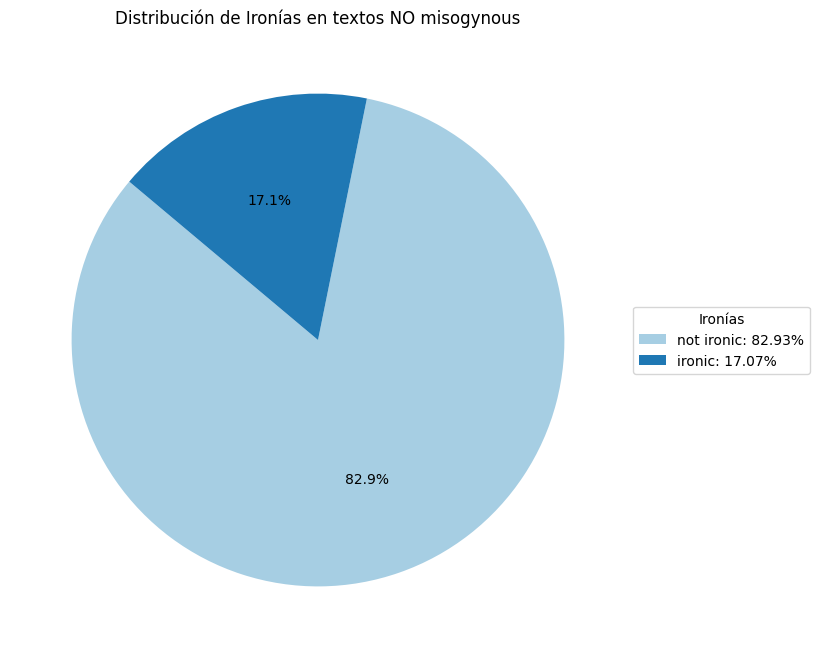

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_irony_percentages_not_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Ironías en textos NO misogynous")
legend_labels = [f"{irony}: {percentage:.2f}%" for irony, percentage in overall_irony_percentages_not_misogynous.items()]
ax.legend(wedges, legend_labels, title="Ironías", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [23]:
print("\nEjemplos de cada tipo de sentimiento en textos NO misogynous:")
for sent_type, example in examples_per_irony_not_misogynous.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos NO misogynous:
not ironic: ["Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3", '@Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.', 'Quiero pegarte pq estás bien imbécil y después darte un besito. 🙂', '@PoderFeminazi Eso es! Cojones!', 'Miss perra: Valentinaaa amo mucho tu icon y header son re lindos,te mereces todo con tus ídolos y te mereces tanto abrazar a camila & ariana *al igual que todos tus ídolos*tu cuenta en general es perfecta y una de mis favoritas, eres una personita muy especial para mi+', '@LeticiaDolera Y digo yo... si se pretende dar un mensaje puramente político, por qué no se lo escriben a un tío en la polla 😒😒', 'Editar, además de complicado, es lo que hace de algo que merezca la pena o no, porque puedes haber grabado la puta hostia de planos, que si no los 

-----------------------------------------------

### Comparación entre todos los tweets, tweets misogynous y no misogynous

-----------------------------------------------


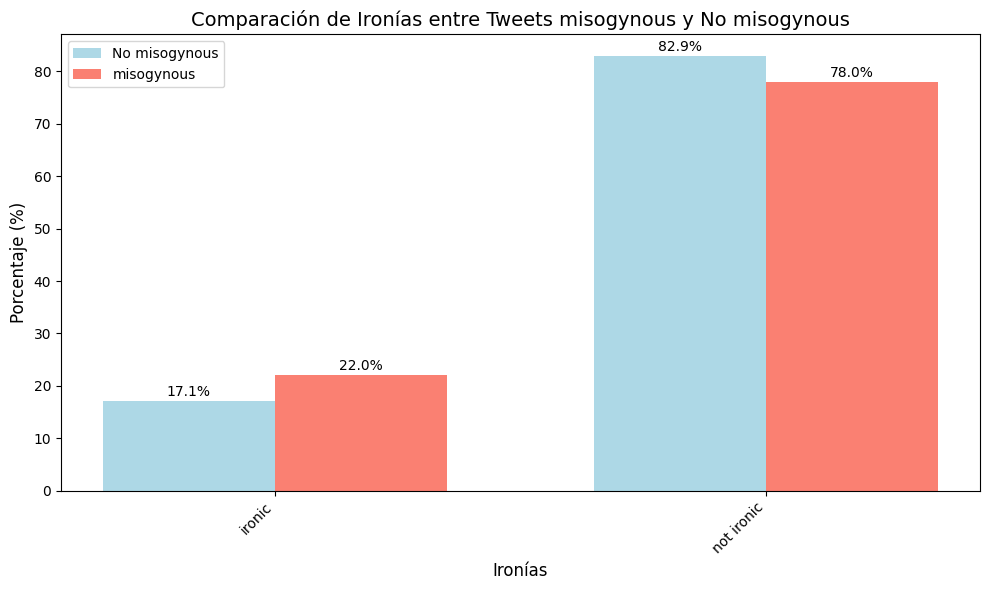

In [24]:
all_ironys = list(set(overall_irony_percentages_not_misogynous.keys()).union(set(overall_irony_percentages_misogynous.keys())))

not_misogynous_percentages = [overall_irony_percentages_not_misogynous.get(sent, 0) for sent in all_ironys]
misogynous_percentages = [overall_irony_percentages_misogynous.get(sent, 0) for sent in all_ironys]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_ironys))
bar1 = ax.bar(index - bar_width/2, not_misogynous_percentages, bar_width, label='No misogynous', color='lightblue')
bar2 = ax.bar(index + bar_width/2, misogynous_percentages, bar_width, label='misogynous', color='salmon')
for i, v in enumerate(not_misogynous_percentages):
  ax.text(index[i] - bar_width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10, color='black')
for i, v in enumerate(misogynous_percentages):
  ax.text(index[i] + bar_width/2, v + 1, f'{v:.1f}%', ha='center', fontsize=10, color='black')

ax.set_xlabel('Ironías', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_title('Comparación de Ironías entre Tweets misogynous y No misogynous', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(all_ironys, rotation=45, ha='right', fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()